# 0️⃣ ReviewOfWork (Main Notebook) - Imports

In [1]:
%config IPCompleter.use_jedi = False
# %xmode Verbose
# %xmode context
%pdb off
%load_ext autoreload
%autoreload 3
# !pip install viztracer
# %load_ext viztracer
# from viztracer import VizTracer
import sys
from pathlib import Path

# required to enable non-blocking interaction:
%gui qt5

import importlib
from copy import deepcopy
from numba import jit
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
# pd.options.mode.dtype_backend = 'pyarrow' # use new pyarrow backend instead of numpy
from attrs import define, field, fields, Factory, make_class
import tables as tb
from datetime import datetime, timedelta

# Pho's Formatting Preferences
import builtins

import IPython
from IPython.core.formatters import PlainTextFormatter
from IPython import get_ipython

from pyphocorehelpers.preferences_helpers import set_pho_preferences, set_pho_preferences_concise, set_pho_preferences_verbose
set_pho_preferences_concise()
# Jupyter-lab enable printing for any line on its own (instead of just the last one in the cell)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# BEGIN PPRINT CUSTOMIZATION ___________________________________________________________________________________________ #

## IPython pprint
from pyphocorehelpers.pprint import wide_pprint, wide_pprint_ipython, wide_pprint_jupyter, MAX_LINE_LENGTH
# Override default pprint
builtins.pprint = wide_pprint

from pho_jupyter_preview_widget.display_helpers import array_repr_with_graphical_preview
from pho_jupyter_preview_widget.ipython_helpers import PreviewWidgetMagics

ip = get_ipython()

# Register the magic
ip.register_magics(PreviewWidgetMagics)


# from pyphocorehelpers.ipython_helpers import MyMagics

# %config_ndarray_preview width=500

# Register the custom display function for NumPy arrays
# ip.display_formatter.formatters['text/html'].for_type(np.ndarray, lambda arr: array_preview_with_graphical_shape_repr_html(arr))
# ip = array_repr_with_graphical_shape(ip=ip)
ip = array_repr_with_graphical_preview(ip=ip)
# ip = dataframe_show_more_button(ip=ip)

text_formatter: PlainTextFormatter = ip.display_formatter.formatters['text/plain']
text_formatter.max_width = MAX_LINE_LENGTH
text_formatter.for_type(object, wide_pprint_jupyter)


# END PPRINT CUSTOMIZATION ___________________________________________________________________________________________ #

from pyphocorehelpers.print_helpers import get_now_time_str, get_now_day_str
from pyphocorehelpers.indexing_helpers import get_dict_subset

## Pho's Custom Libraries:
from pyphocorehelpers.Filesystem.path_helpers import find_first_extant_path, file_uri_from_path
from pyphocorehelpers.Filesystem.open_in_system_file_manager import reveal_in_system_file_manager
import pyphocorehelpers.programming_helpers as programming_helpers

# NeuroPy (Diba Lab Python Repo) Loading
# from neuropy import core
from typing import Dict, List, Tuple, Optional, Callable, Union, Any
from typing_extensions import TypeAlias
from nptyping import NDArray
import neuropy.utils.type_aliases as types

from neuropy.core.session.Formats.BaseDataSessionFormats import DataSessionFormatRegistryHolder
from neuropy.analyses.placefields import PlacefieldComputationParameters
from neuropy.core.epoch import NamedTimerange, Epoch
from neuropy.core.ratemap import Ratemap
from neuropy.core.session.Formats.BaseDataSessionFormats import DataSessionFormatRegistryHolder
from neuropy.core.session.Formats.Specific.KDibaOldDataSessionFormat import KDibaOldDataSessionFormatRegisteredClass
from neuropy.utils.matplotlib_helpers import matplotlib_file_only, matplotlib_configuration, matplotlib_configuration_update
from neuropy.core.neuron_identities import NeuronIdentityTable, neuronTypesList, neuronTypesEnum
from neuropy.utils.mixins.AttrsClassHelpers import AttrsBasedClassHelperMixin, serialized_field, serialized_attribute_field, non_serialized_field, custom_define
from neuropy.utils.mixins.HDF5_representable import HDF_DeserializationMixin, post_deserialize, HDF_SerializationMixin, HDFMixin, HDF_Converter

## For computation parameters:
from neuropy.analyses.placefields import PlacefieldComputationParameters
from neuropy.utils.dynamic_container import DynamicContainer
from neuropy.utils.result_context import IdentifyingContext
from neuropy.core.session.Formats.BaseDataSessionFormats import find_local_session_paths
from neuropy.core.neurons import NeuronType
from neuropy.core.user_annotations import UserAnnotationsManager
from neuropy.core.position import Position
from neuropy.core.session.dataSession import DataSession
from neuropy.analyses.time_dependent_placefields import PfND_TimeDependent, PlacefieldSnapshot
from neuropy.utils.debug_helpers import debug_print_placefield, debug_print_subsession_neuron_differences, debug_print_ratemap, debug_print_spike_counts, debug_plot_2d_binning, print_aligned_columns, parameter_sweeps, _plot_parameter_sweep, compare_placefields_info
from neuropy.utils.indexing_helpers import NumpyHelpers, union_of_arrays, intersection_of_arrays, find_desired_sort_indicies, paired_incremental_sorting
from pyphocorehelpers.print_helpers import print_object_memory_usage, print_dataframe_memory_usage, print_value_overview_only, DocumentationFilePrinter, print_keys_if_possible, generate_html_string, document_active_variables

## Pho Programming Helpers:
import inspect
from pyphocorehelpers.print_helpers import DocumentationFilePrinter, TypePrintMode, print_keys_if_possible, debug_dump_object_member_shapes, print_value_overview_only, document_active_variables
from pyphocorehelpers.programming_helpers import IPythonHelpers, PythonDictionaryDefinitionFormat, MemoryManagement, inspect_callable_arguments, get_arguments_as_optional_dict, GeneratedClassDefinitionType, CodeConversion
from pyphocorehelpers.notebook_helpers import NotebookCellExecutionLogger
from pyphocorehelpers.gui.Qt.TopLevelWindowHelper import TopLevelWindowHelper, print_widget_hierarchy
from pyphocorehelpers.indexing_helpers import reorder_columns, reorder_columns_relative, dict_to_full_array
from pyphocorehelpers.DataStructure.RenderPlots.MatplotLibRenderPlots import MatplotlibRenderPlots

doc_output_parent_folder: Path = Path('EXTERNAL/DEVELOPER_NOTES/DataStructureDocumentation').resolve() # ../.
print(f"doc_output_parent_folder: {doc_output_parent_folder}")
assert doc_output_parent_folder.exists()

_notebook_path:Path = Path(IPythonHelpers.try_find_notebook_filepath(IPython.extract_module_locals())).resolve() # Finds the path of THIS notebook
# _notebook_execution_logger: NotebookCellExecutionLogger = NotebookCellExecutionLogger(notebook_path=_notebook_path, enable_logging_to_file=False) # Builds a logger that records info about this notebook

# pyPhoPlaceCellAnalysis:
from pyphoplacecellanalysis.General.Pipeline.NeuropyPipeline import NeuropyPipeline # get_neuron_identities
from pyphoplacecellanalysis.General.Mixins.ExportHelpers import export_pyqtgraph_plot
from pyphoplacecellanalysis.General.Batch.NonInteractiveProcessing import batch_load_session, batch_extended_computations, batch_evaluate_required_computations, batch_extended_programmatic_figures
from pyphoplacecellanalysis.General.Pipeline.NeuropyPipeline import PipelineSavingScheme

import pyphoplacecellanalysis.External.pyqtgraph as pg

from pyphocorehelpers.exception_helpers import ExceptionPrintingContext, CapturedException
from pyphoplacecellanalysis.General.Batch.NonInteractiveProcessing import batch_perform_all_plots
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.LongShortTrackComputations import JonathanFiringRateAnalysisResult
from pyphoplacecellanalysis.General.Mixins.CrossComputationComparisonHelpers import _find_any_context_neurons
from pyphoplacecellanalysis.General.Batch.runBatch import BatchSessionCompletionHandler # for `post_compute_validate(...)`
from pyphoplacecellanalysis.Analysis.Decoder.reconstruction import BasePositionDecoder
from pyphoplacecellanalysis.SpecificResults.AcrossSessionResults import AcrossSessionsResults
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.SpikeAnalysis import SpikeRateTrends # for `_perform_long_short_instantaneous_spike_rate_groups_analysis`
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.LongShortTrackComputations import SingleBarResult, InstantaneousSpikeRateGroupsComputation, TruncationCheckingResults # for `BatchSessionCompletionHandler`, `AcrossSessionsAggregator`
from pyphoplacecellanalysis.General.Mixins.CrossComputationComparisonHelpers import SplitPartitionMembership
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import DirectionalPlacefieldGlobalComputationFunctions, DirectionalLapsResult, TrackTemplates, DecoderDecodedEpochsResult
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.RankOrderComputations import RankOrderGlobalComputationFunctions,  RankOrderComputationsContainer, RankOrderResult, RankOrderAnalyses
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import TrackTemplates
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.ComputationFunctionRegistryHolder import ComputationFunctionRegistryHolder, computation_precidence_specifying_function, global_function
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.SequenceBasedComputations import WCorrShuffle, SequenceBasedComputationsContainer
from neuropy.utils.mixins.binning_helpers import transition_matrix
from pyphoplacecellanalysis.Analysis.Decoder.transition_matrix import TransitionMatrixComputations
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import TrackTemplates, get_proper_global_spikes_df
from pyphocorehelpers.Filesystem.path_helpers import set_posix_windows

from pyphocorehelpers.assertion_helpers import Assert

# Plotting
# import pylustrator # customization of figures
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
_bak_rcParams = mpl.rcParams.copy()

matplotlib.use('Qt5Agg')
# %matplotlib inline
# %matplotlib auto

# _restore_previous_matplotlib_settings_callback = matplotlib_configuration_update(is_interactive=True, backend='Qt5Agg')
_restore_previous_matplotlib_settings_callback = matplotlib_configuration_update(is_interactive=True, backend='Qt5Agg')

# import pylustrator # call `pylustrator.start()` before creating your first figure in code.
from pyphoplacecellanalysis.Pho2D.matplotlib.visualize_heatmap import visualize_heatmap, visualize_heatmap_pyqtgraph # used in `plot_kourosh_activity_style_figure`
from pyphoplacecellanalysis.General.Pipeline.Stages.DisplayFunctions.SpikeRasters import plot_multiple_raster_plot, plot_raster_plot
from pyphoplacecellanalysis.General.Mixins.DataSeriesColorHelpers import UnitColoringMode, DataSeriesColorHelpers
from pyphoplacecellanalysis.General.Pipeline.Stages.DisplayFunctions.SpikeRasters import _build_default_tick, build_scatter_plot_kwargs
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.Mixins.Render2DScrollWindowPlot import Render2DScrollWindowPlotMixin, ScatterItemData
from pyphoplacecellanalysis.General.Batch.NonInteractiveProcessing import batch_extended_programmatic_figures, batch_programmatic_figures
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.SpikeAnalysis import SpikeRateTrends
from pyphoplacecellanalysis.General.Mixins.SpikesRenderingBaseMixin import SpikeEmphasisState
from pyphoplacecellanalysis.General.Model.SpecificComputationParameterTypes import ComputationKWargParameters
from pyphoplacecellanalysis.SpecificResults.PhoDiba2023Paper import PAPER_FIGURE_figure_1_add_replay_epoch_rasters, PAPER_FIGURE_figure_1_full, PAPER_FIGURE_figure_3, main_complete_figure_generations
# from pyphoplacecellanalysis.SpecificResults.fourthYearPresentation import *

# Jupyter Widget Interactive
import ipywidgets as widgets
from IPython.display import display, HTML
from pyphocorehelpers.Filesystem.open_in_system_file_manager import reveal_in_system_file_manager
from pyphoplacecellanalysis.GUI.IPyWidgets.pipeline_ipywidgets import interactive_pipeline_widget, interactive_pipeline_files
from pyphocorehelpers.gui.Jupyter.simple_widgets import fullwidth_path_widget, render_colors

from datetime import datetime, date, timedelta
from pyphocorehelpers.print_helpers import get_now_day_str, get_now_rounded_time_str

DAY_DATE_STR: str = date.today().strftime("%Y-%m-%d")
DAY_DATE_TO_USE = f'{DAY_DATE_STR}' # used for filenames throught the notebook
print(f'DAY_DATE_STR: {DAY_DATE_STR}, DAY_DATE_TO_USE: {DAY_DATE_TO_USE}')

NOW_DATETIME: str = get_now_rounded_time_str()
NOW_DATETIME_TO_USE = f'{NOW_DATETIME}' # used for filenames throught the notebook
print(f'NOW_DATETIME: {NOW_DATETIME}, NOW_DATETIME_TO_USE: {NOW_DATETIME_TO_USE}')

from pyphocorehelpers.gui.Jupyter.simple_widgets import build_global_data_root_parent_path_selection_widget
all_paths = [Path('/Volumes/SwapSSD/Data'), Path('/Users/pho/data'), Path(r'/media/halechr/MAX/Data'), Path(r'/home/halechr/FastData'), Path(r'W:\Data'), Path(r'/home/halechr/cloud/turbo/Data'), Path(r'/Volumes/MoverNew/data'), Path(r'/home/halechr/turbo/Data'), Path(r'/Users/pho/cloud/turbo/Data')] # Path('/Volumes/FedoraSSD/FastData'), 
global_data_root_parent_path = None
def on_user_update_path_selection(new_path: Path):
    global global_data_root_parent_path
    new_global_data_root_parent_path = new_path.resolve()
    global_data_root_parent_path = new_global_data_root_parent_path
    print(f'global_data_root_parent_path changed to {global_data_root_parent_path}')
    assert global_data_root_parent_path.exists(), f"global_data_root_parent_path: {global_data_root_parent_path} does not exist! Is the right computer's config commented out above?"
            
global_data_root_parent_path_widget = build_global_data_root_parent_path_selection_widget(all_paths, on_user_update_path_selection)
global_data_root_parent_path_widget

Automatic pdb calling has been turned OFF
doc_output_parent_folder: C:\Users\pho\repos\Spike3DWorkEnv\Spike3D\EXTERNAL\DEVELOPER_NOTES\DataStructureDocumentation
DAY_DATE_STR: 2024-11-12, DAY_DATE_TO_USE: 2024-11-12
NOW_DATETIME: 2024-11-12_0218AM, NOW_DATETIME_TO_USE: 2024-11-12_0218AM
global_data_root_parent_path changed to W:\Data


ToggleButtons(description='Data Root:', layout=Layout(width='auto'), options=(WindowsPath('W:/Data'),), style=ToggleButtonsStyle(button_width='max-content'), tooltip='global_data_root_parent_path', value=WindowsPath('W:/Data'))

In [ ]:
good_sessions = UserAnnotationsManager.get_hardcoded_good_sessions()
print('\n'.join([f"curr_context = {a_ctx.get_initialization_code_string()}" for a_ctx in good_sessions]))

In [ ]:
len(good_sessions)

In [ ]:
good_sessions[-1]

# 0️⃣ Load Pipeline

In [2]:
# ==================================================================================================================== #
# Load Data                                                                                                            #
# ==================================================================================================================== #

active_data_mode_name = 'kdiba'
local_session_root_parent_context = IdentifyingContext(format_name=active_data_mode_name) # , animal_name='', configuration_name='one', session_name=a_sess.session_name
local_session_root_parent_path = global_data_root_parent_path.joinpath('KDIBA')

# [*] - indicates bad or session with a problem
# 0, 1, 2, 3, 4, 5, 6, 7, [8], [9], 10, 11, [12], 13, 14, [15], [16], 17, 
# curr_context = IdentifyingContext(format_name='kdiba',animal='gor01',exper_name='one',session_name='2006-6-08_14-26-15')
curr_context = IdentifyingContext(format_name='kdiba',animal='gor01',exper_name='one',session_name='2006-6-09_1-22-43')
# curr_context = IdentifyingContext(format_name='kdiba',animal='gor01',exper_name='one',session_name='2006-6-12_15-55-31')
# curr_context = IdentifyingContext(format_name='kdiba',animal='gor01',exper_name='two',session_name='2006-6-07_16-40-19')
# curr_context = IdentifyingContext(format_name='kdiba',animal='gor01',exper_name='two',session_name='2006-6-12_16-53-46')
# curr_context = IdentifyingContext(format_name='kdiba',animal='vvp01',exper_name='one',session_name='2006-4-09_17-29-30')
# curr_context = IdentifyingContext(format_name='kdiba',animal='vvp01',exper_name='one',session_name='2006-4-10_12-25-50')
# curr_context = IdentifyingContext(format_name='kdiba',animal='vvp01',exper_name='two',session_name='2006-4-09_16-40-54')
# curr_context = IdentifyingContext(format_name='kdiba',animal='vvp01',exper_name='two',session_name='2006-4-10_12-58-3')
# curr_context = IdentifyingContext(format_name='kdiba',animal='pin01',exper_name='one',session_name='11-03_12-3-25')
# curr_context = IdentifyingContext(format_name='kdiba',animal='pin01',exper_name='one',session_name='fet11-01_12-58-54')


local_session_parent_path: Path = local_session_root_parent_path.joinpath(curr_context.animal, curr_context.exper_name) # 'gor01', 'one' - probably not needed anymore
basedir: Path = local_session_parent_path.joinpath(curr_context.session_name).resolve()
print(f'basedir: {str(basedir)}')

# Read if possible:
saving_mode = PipelineSavingScheme.SKIP_SAVING
force_reload = False

# 
# # Force write:
# saving_mode = PipelineSavingScheme.TEMP_THEN_OVERWRITE
# saving_mode = PipelineSavingScheme.OVERWRITE_IN_PLACE
# force_reload = True

## TODO: if loading is not possible, we need to change the `saving_mode` so that the new results are properly saved.


basedir: W:\Data\KDIBA\gor01\one\2006-6-09_1-22-43


In [3]:
extended_computations_include_includelist=['lap_direction_determination', 'pf_computation', 'firing_rate_trends', 'pfdt_computation',
    # 'pf_dt_sequential_surprise',
    # 'ratemap_peaks_prominence2d',
    'extended_stats',
    'long_short_decoding_analyses',
    'jonathan_firing_rate_analysis',
    'long_short_fr_indicies_analyses',
    'short_long_pf_overlap_analyses',
    'long_short_post_decoding',
    # 'long_short_rate_remapping',
    'long_short_inst_spike_rate_groups',
    'long_short_endcap_analysis',
    # 'spike_burst_detection',
    'split_to_directional_laps',
    'merged_directional_placefields',
    # 'rank_order_shuffle_analysis', # skip
    'directional_train_test_split',
    'directional_decoders_decode_continuous',
    'directional_decoders_evaluate_epochs',
    # 'directional_decoders_epoch_heuristic_scoring',
    # 'perform_wcorr_shuffle_analysis', # skip
    'trial_by_trial_metrics',
    'extended_pf_peak_information',
] # do only specified
force_recompute_override_computations_includelist = None
# force_recompute_override_computations_includelist = ['merged_directional_placefields']
# force_recompute_override_computations_includelist = ['split_to_directional_laps', 'merged_directional_placefields', 'rank_order_shuffle_analysis'] # , 'directional_decoders_decode_continuous'
# force_recompute_override_computations_includelist = ['directional_decoders_decode_continuous'] # 
# force_recompute_override_computations_includelist = ['long_short_inst_spike_rate_groups','firing_rate_trends','extended_stats','long_short_decoding_analyses','jonathan_firing_rate_analysis','long_short_fr_indicies_analyses','long_short_post_decoding',]
# force_recompute_override_computations_includelist = ['split_to_directional_laps', 'merged_directional_placefields', 'rank_order_shuffle_analysis', 'directional_decoders_decode_continuous'] # 

## 2024-06-25 - Load from saved custom

In [ ]:
# Loads custom pipeline pickles that were saved out via `custom_save_filepaths['pipeline_pkl'] = curr_active_pipeline.save_pipeline(saving_mode=PipelineSavingScheme.TEMP_THEN_OVERWRITE, active_pickle_filename=custom_save_filenames['pipeline_pkl'])`

## INPUTS: global_data_root_parent_path, active_data_mode_name, basedir, saving_mode, force_reload, custom_save_filenames
# custom_suffix: str = '_withNewKamranExportedReplays'

# custom_suffix: str = '_withNewComputedReplays'
custom_suffix: str = '_withNewComputedReplays-qclu_[1, 2]-frateThresh_5.0'


custom_save_filenames = {
    'pipeline_pkl':f'loadedSessPickle{custom_suffix}.pkl',
    'global_computation_pkl':f"global_computation_results{custom_suffix}.pkl",
    'pipeline_h5':f'pipeline{custom_suffix}.h5',
}
print(f'custom_save_filenames: {custom_save_filenames}')
custom_save_filepaths = {k:v for k, v in custom_save_filenames.items()}

# ==================================================================================================================== #
# PIPELINE LOADING                                                                                                     #
# ==================================================================================================================== #
# load the custom saved outputs
active_pickle_filename = custom_save_filenames['pipeline_pkl'] # 'loadedSessPickle_withParameters.pkl'
print(f'active_pickle_filename: "{active_pickle_filename}"')
# assert active_pickle_filename.exists()
active_session_h5_filename = custom_save_filenames['pipeline_h5'] # 'pipeline_withParameters.h5'
print(f'active_session_h5_filename: "{active_session_h5_filename}"')

# ==================================================================================================================== #
# Load Pipeline                                                                                                        #
# ==================================================================================================================== #
## DO NOT allow recompute if the file doesn't exist!!
# Computing loaded session pickle file results : "W:/Data/KDIBA/gor01/two/2006-6-07_16-40-19/loadedSessPickle_withNewComputedReplays.pkl"... done.
# Failure loading W:\Data\KDIBA\gor01\two\2006-6-07_16-40-19\loadedSessPickle_withNewComputedReplays.pkl.
proposed_load_pkl_path = basedir.joinpath(active_pickle_filename).resolve()

In [ ]:
## INPUTS: proposed_load_pkl_path
assert proposed_load_pkl_path.exists(), f"for a saved custom the file must exist!"

epoch_name_includelist=None
active_computation_functions_name_includelist=['lap_direction_determination', 'pf_computation','firing_rate_trends', 'position_decoding']
curr_active_pipeline: NeuropyPipeline = batch_load_session(global_data_root_parent_path, active_data_mode_name, basedir, epoch_name_includelist=epoch_name_includelist,
                                        computation_functions_name_includelist=active_computation_functions_name_includelist,
                                        saving_mode=saving_mode, force_reload=force_reload,
                                        skip_extended_batch_computations=True, debug_print=False, fail_on_exception=True, active_pickle_filename=proposed_load_pkl_path) # , active_pickle_filename = 'loadedSessPickle_withParameters.pkl'

## Post Compute Validate 2023-05-16:
was_updated = BatchSessionCompletionHandler.post_compute_validate(curr_active_pipeline) ## TODO: need to potentially re-save if was_updated. This will fail because constained versions not ran yet.
if was_updated:
    print(f'was_updated: {was_updated}')
    try:
        if saving_mode == PipelineSavingScheme.SKIP_SAVING:
            print(f'WARNING: PipelineSavingScheme.SKIP_SAVING but need to save post_compute_validate changes!!')
        else:
            curr_active_pipeline.save_pipeline(saving_mode=saving_mode)
    except BaseException as e:
        ## TODO: catch/log saving error and indicate that it isn't saved.
        exception_info = sys.exc_info()
        e = CapturedException(e, exception_info)
        print(f'ERROR RE-SAVING PIPELINE after update. error: {e}')

print(f'Pipeline loaded from custom pickle!!')
## OUTPUT: curr_active_pipeline


In [ ]:
# ==================================================================================================================== #
# Global computations loading:                                                                                            #
# ==================================================================================================================== #
# Loads saved global computations that were saved out via: `custom_save_filepaths['global_computation_pkl'] = curr_active_pipeline.save_global_computation_results(override_global_pickle_filename=custom_save_filenames['global_computation_pkl'])`
## INPUTS: custom_save_filenames
## INPUTS: curr_active_pipeline, override_global_computation_results_pickle_path, extended_computations_include_includelist

override_global_computation_results_pickle_path = None
# override_global_computation_results_pickle_path = custom_save_filenames['global_computation_pkl']
print(f'override_global_computation_results_pickle_path: "{override_global_computation_results_pickle_path}"')

# Pre-load ___________________________________________________________________________________________________________ #
force_recompute_global = force_reload
needs_computation_output_dict, valid_computed_results_output_list, remaining_include_function_names = batch_evaluate_required_computations(curr_active_pipeline, include_includelist=extended_computations_include_includelist, include_global_functions=True, fail_on_exception=False, progress_print=True,
                                                    force_recompute=force_recompute_global, force_recompute_override_computations_includelist=force_recompute_override_computations_includelist, debug_print=False)
print(f'Pre-load global computations: needs_computation_output_dict: {[k for k,v in needs_computation_output_dict.items() if (v is not None)]}')
# valid_computed_results_output_list

# Try Unpickling Global Computations to update pipeline ______________________________________________________________ #
if not force_reload: # not just force_reload, needs to recompute whenever the computation fails.
    try:
        # INPUTS: override_global_computation_results_pickle_path
        sucessfully_updated_keys, successfully_loaded_keys = curr_active_pipeline.load_pickled_global_computation_results(override_global_computation_results_pickle_path=override_global_computation_results_pickle_path,
                                                                                        allow_overwrite_existing=True, allow_overwrite_existing_allow_keys=extended_computations_include_includelist, ) # is new
        print(f'sucessfully_updated_keys: {sucessfully_updated_keys}\nsuccessfully_loaded_keys: {successfully_loaded_keys}')
    except FileNotFoundError as e:
        exception_info = sys.exc_info()
        e = CapturedException(e, exception_info)
        print(f'cannot load global results because pickle file does not exist! Maybe it has never been created? {e}')
    except BaseException as e:
        exception_info = sys.exc_info()
        e = CapturedException(e, exception_info)
        print(f'Unhandled exception: cannot load global results: {e}')
        raise

# Post-Load __________________________________________________________________________________________________________ #
force_recompute_global = force_reload
needs_computation_output_dict, valid_computed_results_output_list, remaining_include_function_names = batch_evaluate_required_computations(curr_active_pipeline, include_includelist=extended_computations_include_includelist, include_global_functions=True, fail_on_exception=False, progress_print=True,
                                                    force_recompute=force_recompute_global, force_recompute_override_computations_includelist=force_recompute_override_computations_includelist, debug_print=False)
print(f'Post-load global computations: needs_computation_output_dict: {[k for k,v in needs_computation_output_dict.items() if (v is not None)]}')

# Compute ____________________________________________________________________________________________________________ #
curr_active_pipeline.reload_default_computation_functions()
force_recompute_global = force_reload
# force_recompute_global = True
newly_computed_values = batch_extended_computations(curr_active_pipeline, include_includelist=extended_computations_include_includelist, include_global_functions=True, fail_on_exception=True, progress_print=True,
                                                    force_recompute=force_recompute_global, force_recompute_override_computations_includelist=force_recompute_override_computations_includelist, debug_print=False)
if (len(newly_computed_values) > 0):
    print(f'newly_computed_values: {newly_computed_values}.')
    if (saving_mode.value != 'skip_saving'):
        print(f'Saving global results...')
        try:
            # curr_active_pipeline.global_computation_results.persist_time = datetime.now()
            # Try to write out the global computation function results:
            curr_active_pipeline.save_global_computation_results()
        except Exception as e:
            exception_info = sys.exc_info()
            e = CapturedException(e, exception_info)
            print(f'\n\n!!WARNING!!: saving the global results threw the exception: {e}')
            print(f'\tthe global results are currently unsaved! proceed with caution and save as soon as you can!\n\n\n')
    else:
        print(f'\n\n!!WARNING!!: changes to global results have been made but they will not be saved since saving_mode.value == "skip_saving"')
        print(f'\tthe global results are currently unsaved! proceed with caution and save as soon as you can!\n\n\n')
else:
    print(f'no changes in global results.')

# Post-compute _______________________________________________________________________________________________________ #
# Post-hoc verification that the computations worked and that the validators reflect that. The list should be empty now.
needs_computation_output_dict, valid_computed_results_output_list, remaining_include_function_names = batch_evaluate_required_computations(curr_active_pipeline, include_includelist=extended_computations_include_includelist, include_global_functions=True, fail_on_exception=False, progress_print=True,
                                                    force_recompute=False, force_recompute_override_computations_includelist=[], debug_print=True)
print(f'Post-compute validation: needs_computation_output_dict: {[k for k,v in needs_computation_output_dict.items() if (v is not None)]}')


## 0️⃣ Normal Pipeline Load

In [4]:
# ==================================================================================================================== #
# Load Pipeline                                                                                                        #
# ==================================================================================================================== #
# with VizTracer(output_file=f"viztracer_{get_now_time_str()}-full_session_LOO_decoding_analysis.json", min_duration=200, tracer_entries=3000000, ignore_frozen=True) as tracer:
# epoch_name_includelist = ['maze']
epoch_name_includelist = None
active_computation_functions_name_includelist=['lap_direction_determination', 'pf_computation',
                                            #    'pfdt_computation',
                                                'firing_rate_trends',
                                                # 'pf_dt_sequential_surprise', 
                                            #    'ratemap_peaks_prominence2d',
                                                'position_decoding', 
                                                # 'position_decoding_two_step', 
                                            #    'long_short_decoding_analyses', 'jonathan_firing_rate_analysis', 'long_short_fr_indicies_analyses', 'short_long_pf_overlap_analyses', 'long_short_post_decoding', 'long_short_rate_remapping',
                                            #     'long_short_inst_spike_rate_groups',
                                            #     'long_short_endcap_analysis',
                                            # 'split_to_directional_laps',
]

curr_active_pipeline: NeuropyPipeline = batch_load_session(global_data_root_parent_path, active_data_mode_name, basedir, epoch_name_includelist=epoch_name_includelist,
                                        computation_functions_name_includelist=active_computation_functions_name_includelist,
                                        saving_mode=saving_mode, force_reload=force_reload,
                                        skip_extended_batch_computations=True, debug_print=False, fail_on_exception=False) # , active_pickle_filename = 'loadedSessPickle_withParameters.pkl'

## Post Compute Validate 2023-05-16:
was_updated = BatchSessionCompletionHandler.post_compute_validate(curr_active_pipeline) ## TODO: need to potentially re-save if was_updated. This will fail because constained versions not ran yet.
if was_updated:
    print(f'was_updated: {was_updated}')
    try:
        curr_active_pipeline.save_pipeline(saving_mode=saving_mode)
    except Exception as e:
        ## TODO: catch/log saving error and indicate that it isn't saved.
        exception_info = sys.exc_info()
        e = CapturedException(e, exception_info)
        print(f'ERROR RE-SAVING PIPELINE after update. error: {e}')

force_recompute_global = force_reload
needs_computation_output_dict, valid_computed_results_output_list, remaining_include_function_names = batch_evaluate_required_computations(curr_active_pipeline, include_includelist=extended_computations_include_includelist, include_global_functions=True, fail_on_exception=False, progress_print=True,
                                                    force_recompute=force_recompute_global, force_recompute_override_computations_includelist=force_recompute_override_computations_includelist, debug_print=False)
print(f'Pre-load global computations: needs_computation_output_dict: {[k for k,v in needs_computation_output_dict.items() if (v is not None)]}')
# valid_computed_results_output_list
if not force_reload: # not just force_reload, needs to recompute whenever the computation fails.
    try:
        # curr_active_pipeline.load_pickled_global_computation_results()
        with set_posix_windows():
            sucessfully_updated_keys, successfully_loaded_keys = curr_active_pipeline.load_pickled_global_computation_results(allow_overwrite_existing=True, allow_overwrite_existing_allow_keys=extended_computations_include_includelist) # is new
            
        print(f'sucessfully_updated_keys: {sucessfully_updated_keys}\nsuccessfully_loaded_keys: {successfully_loaded_keys}')
    except FileNotFoundError as e:
        exception_info = sys.exc_info()
        e = CapturedException(e, exception_info)
        print(f'cannot load global results because pickle file does not exist! Maybe it has never been created? {e}')
    except BaseException as e:
        exception_info = sys.exc_info()
        e = CapturedException(e, exception_info)
        print(f'Unhandled exception: cannot load global results: {e}')
        raise


Computing loaded session pickle file results : "W:/Data/KDIBA/gor01/one/2006-6-09_1-22-43/loadedSessPickle.pkl"... build_logger(full_logger_string="2024-11-12_02-11-52.Apogee.kdiba.gor01.one.2006-6-09_1-22-43", file_logging_dir: None):
done.
Loading pickled pipeline success: W:\Data\KDIBA\gor01\one\2006-6-09_1-22-43\loadedSessPickle.pkl.
properties already present in pickled version. No need to save.
pipeline load success!
using provided computation_functions_name_includelist: ['lap_direction_determination', 'pf_computation', 'firing_rate_trends', 'position_decoding']
	 TODO: this will prevent recomputation even when the excludelist/includelist or computation function definitions change. Rework so that this is smarter.
	 TODO: this will prevent recomputation even when the excludelist/includelist or computation function definitions change. Rework so that this is smarter.
	 TODO: this will prevent recomputation even when the excludelist/includelist or computation function definitions cha

	 TODO: this will prevent recomputation even when the excludelist/includelist or computation function definitions change. Rework so that this is smarter.
	 TODO: this will prevent recomputation even when the excludelist/includelist or computation function definitions change. Rework so that this is smarter.
	 TODO: this will prevent recomputation even when the excludelist/includelist or computation function definitions change. Rework so that this is smarter.
	 TODO: this will prevent recomputation even when the excludelist/includelist or computation function definitions change. Rework so that this is smarter.
	 TODO: this will prevent recomputation even when the excludelist/includelist or computation function definitions change. Rework so that this is smarter.
	 TODO: this will prevent recomputation even when the excludelist/includelist or computation function definitions change. Rework so that this is smarter.
	 TODO: this will prevent recomputation even when the excludelist/includelis

In [5]:
force_recompute_global = force_reload
needs_computation_output_dict, valid_computed_results_output_list, remaining_include_function_names = batch_evaluate_required_computations(curr_active_pipeline, include_includelist=extended_computations_include_includelist, include_global_functions=True, fail_on_exception=False, progress_print=True,
                                                    force_recompute=force_recompute_global, force_recompute_override_computations_includelist=force_recompute_override_computations_includelist, debug_print=False)
print(f'Post-load global computations: needs_computation_output_dict: {[k for k,v in needs_computation_output_dict.items() if (v is not None)]}')
curr_active_pipeline.reload_default_computation_functions()
force_recompute_global = force_reload
# force_recompute_global = True

included includelist is specified: ['lap_direction_determination', 'pf_computation', 'firing_rate_trends', 'pfdt_computation', 'extended_stats', 'long_short_decoding_analyses', 'jonathan_firing_rate_analysis', 'long_short_fr_indicies_analyses', 'short_long_pf_overlap_analyses', 'long_short_post_decoding', 'long_short_inst_spike_rate_groups', 'long_short_endcap_analysis', 'split_to_directional_laps', 'merged_directional_placefields', 'directional_train_test_split', 'directional_decoders_decode_continuous', 'directional_decoders_evaluate_epochs', 'trial_by_trial_metrics', 'extended_pf_peak_information'], so only performing these extended computations.
Running batch_evaluate_required_computations(...) with global_epoch_name: "maze_any"
done with all batch_evaluate_required_computations(...).
Post-load global computations: needs_computation_output_dict: ['extended_pf_peak_information']


In [6]:

newly_computed_values = batch_extended_computations(curr_active_pipeline, include_includelist=extended_computations_include_includelist, include_global_functions=True, fail_on_exception=True, progress_print=True,
                                                    force_recompute=force_recompute_global, force_recompute_override_computations_includelist=force_recompute_override_computations_includelist, debug_print=False)
if (len(newly_computed_values) > 0):
    print(f'newly_computed_values: {newly_computed_values}.')
    if (saving_mode.value != 'skip_saving'):
        print(f'Saving global results...')
        try:
            # curr_active_pipeline.global_computation_results.persist_time = datetime.now()
            # Try to write out the global computation function results:
            curr_active_pipeline.save_global_computation_results()
        except Exception as e:
            exception_info = sys.exc_info()
            e = CapturedException(e, exception_info)
            print(f'\n\n!!WARNING!!: saving the global results threw the exception: {e}')
            print(f'\tthe global results are currently unsaved! proceed with caution and save as soon as you can!\n\n\n')
    else:
        print(f'\n\n!!WARNING!!: changes to global results have been made but they will not be saved since saving_mode.value == "skip_saving"')
        print(f'\tthe global results are currently unsaved! proceed with caution and save as soon as you can!\n\n\n')
else:
    print(f'no changes in global results.')

# Post-hoc verification that the computations worked and that the validators reflect that. The list should be empty now.
needs_computation_output_dict, valid_computed_results_output_list, remaining_include_function_names = batch_evaluate_required_computations(curr_active_pipeline, include_includelist=extended_computations_include_includelist, include_global_functions=True, fail_on_exception=True, progress_print=True,
                                                    force_recompute=False, force_recompute_override_computations_includelist=[], debug_print=True)
print(f'Post-compute validation: needs_computation_output_dict: {[k for k,v in needs_computation_output_dict.items() if (v is not None)]}')

included includelist is specified: ['lap_direction_determination', 'pf_computation', 'firing_rate_trends', 'pfdt_computation', 'extended_stats', 'long_short_decoding_analyses', 'jonathan_firing_rate_analysis', 'long_short_fr_indicies_analyses', 'short_long_pf_overlap_analyses', 'long_short_post_decoding', 'long_short_inst_spike_rate_groups', 'long_short_endcap_analysis', 'split_to_directional_laps', 'merged_directional_placefields', 'directional_train_test_split', 'directional_decoders_decode_continuous', 'directional_decoders_evaluate_epochs', 'trial_by_trial_metrics', 'extended_pf_peak_information'], so only performing these extended computations.
Running batch_extended_computations(...) with global_epoch_name: "maze_any"
`extended_pf_peak_information` missing.
	 Recomputing `extended_pf_peak_information`...
for global computations: Performing run_specific_computations_single_context(..., computation_functions_name_includelist=['_add_extended_pf_peak_information'], ...)...
	run_speci

## 0️⃣ Shared Post-Pipeline load stuff

In [7]:
# BATCH_DATE_TO_USE: str = f'{DAY_DATE_TO_USE}_GL'
# BATCH_DATE_TO_USE: str = f'{DAY_DATE_TO_USE}_rMBP' # TODO: Change this as needed, templating isn't actually doing anything rn.
BATCH_DATE_TO_USE: str = f'{DAY_DATE_TO_USE}_Apogee'
# BATCH_DATE_TO_USE: str = f'{DAY_DATE_TO_USE}_Lab'
 
try:
    if custom_suffix is not None:
        BATCH_DATE_TO_USE = f'{BATCH_DATE_TO_USE}{custom_suffix}'
        print(f'Adding custom suffix: "{custom_suffix}" - BATCH_DATE_TO_USE: "{BATCH_DATE_TO_USE}"')
except NameError as err:
    custom_suffix = None
    print(f'NO CUSTOM SUFFIX.')

known_collected_output_paths = [Path(v).resolve() for v in ['/nfs/turbo/umms-kdiba/Data/Output/collected_outputs', '/home/halechr/FastData/collected_outputs/',
                                                           '/home/halechr/cloud/turbo/Data/Output/collected_outputs',
                                                           r'C:\Users\pho\repos\Spike3DWorkEnv\Spike3D\output\collected_outputs',
                                                           r"K:\scratch\collected_outputs",
                                                           '/Users/pho/data/collected_outputs',
                                                          'output/gen_scripts/']]
collected_outputs_path = find_first_extant_path(known_collected_output_paths)
assert collected_outputs_path.exists(), f"collected_outputs_path: {collected_outputs_path} does not exist! Is the right computer's config commented out above?"
# fullwidth_path_widget(scripts_output_path, file_name_label='Scripts Output Path:')
print(f'collected_outputs_path: {collected_outputs_path}')
# collected_outputs_path.mkdir(exist_ok=True)
# assert collected_outputs_path.exists()

## Build the output prefix from the session context:
active_context = curr_active_pipeline.get_session_context()
curr_session_name: str = curr_active_pipeline.session_name # '2006-6-08_14-26-15'
CURR_BATCH_OUTPUT_PREFIX: str = f"{BATCH_DATE_TO_USE}-{curr_session_name}"
print(f'CURR_BATCH_OUTPUT_PREFIX: "{CURR_BATCH_OUTPUT_PREFIX}"')

NO CUSTOM SUFFIX.
collected_outputs_path: K:\scratch\collected_outputs
CURR_BATCH_OUTPUT_PREFIX: "2024-11-12_Apogee-2006-6-09_1-22-43"


## Specific Recomputations

In [ ]:
any_most_recent_computation_time, each_epoch_latest_computation_time, each_epoch_each_result_computation_completion_times, (global_computations_latest_computation_time, global_computation_completion_times) = curr_active_pipeline.get_computation_times(debug_print=False)
# each_epoch_latest_computation_time
each_epoch_each_result_computation_completion_times

In [ ]:
# reload_exported_kdiba_session_position_info_mat_completion_function
from pyphoplacecellanalysis.General.Batch.BatchJobCompletion.UserCompletionHelpers.batch_user_completion_helpers import reload_exported_kdiba_session_position_info_mat_completion_function

# Results can be extracted from batch output by 

# Extracts the callback results 'determine_session_t_delta_completion_function':
# extracted_callback_fn_results = {a_sess_ctxt:a_result.across_session_results.get('determine_session_t_delta_completion_function', {}) for a_sess_ctxt, a_result in global_batch_run.session_batch_outputs.items() if a_result is not None}

from neuropy.core.epoch import Epoch, ensure_dataframe
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import compute_diba_quiescent_style_replay_events, overwrite_replay_epochs_and_recompute, try_load_neuroscope_EVT_file_epochs, replace_replay_epochs, _get_custom_suffix_for_replay_filename, finalize_output_shuffled_wcorr
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import get_proper_global_spikes_df

from pyphoplacecellanalysis.General.Batch.BatchJobCompletion.UserCompletionHelpers.batch_user_completion_helpers import SimpleBatchComputationDummy

a_dummy = SimpleBatchComputationDummy(BATCH_DATE_TO_USE, collected_outputs_path, True)
a_dummy.should_suppress_errors = False

## Settings:

# SimpleBatchComputationDummy = make_class('SimpleBatchComputationDummy', attrs=['BATCH_DATE_TO_USE', 'collected_outputs_path'])
# a_dummy = SimpleBatchComputationDummy(BATCH_DATE_TO_USE, collected_outputs_path)

_temp_batch_results_extended_dict = {}
## Combine the output of `reload_exported_kdiba_session_position_info_mat_completion_function` into two dataframes for the laps, one per-epoch and one per-time-bin
_temp_batch_results_extended_dict = _temp_batch_results_extended_dict | reload_exported_kdiba_session_position_info_mat_completion_function(a_dummy, None,
                                                curr_session_context=curr_active_pipeline.get_session_context(), curr_session_basedir=curr_active_pipeline.sess.basepath.resolve(), curr_active_pipeline=curr_active_pipeline,
                                                across_session_results_extended_dict=_temp_batch_results_extended_dict,
                                                # save_hdf=save_hdf, return_full_decoding_results=return_full_decoding_results,
                                                # desired_shared_decoding_time_bin_sizes=desired_shared_decoding_time_bin_sizes,
                                                )




In [ ]:
curr_active_pipeline.reload_default_computation_functions()

In [ ]:
curr_active_pipeline.filtered_sessions

In [ ]:
curr_active_pipeline.global_computation_results.computation_config.instantaneous_time_bin_size_seconds = 0.002

In [ ]:
force_recompute_global

In [ ]:
force_recompute_global = False

In [ ]:
extended_computations_include_includelist=['lap_direction_determination', 'pf_computation', 'firing_rate_trends', 'pfdt_computation',
    # 'pf_dt_sequential_surprise',
    #  'ratemap_peaks_prominence2d',
    'extended_stats',
    'long_short_decoding_analyses',
    'jonathan_firing_rate_analysis',
    'long_short_fr_indicies_analyses',
    'short_long_pf_overlap_analyses',
    'long_short_post_decoding',
    # 'long_short_rate_remapping',
    'long_short_inst_spike_rate_groups',
    'long_short_endcap_analysis',
    # 'spike_burst_detection',
    'split_to_directional_laps',
    'merged_directional_placefields',
    # 'rank_order_shuffle_analysis',
    # 'directional_decoders_decode_continuous',
    # 'directional_decoders_evaluate_epochs',
    # 'directional_decoders_epoch_heuristic_scoring',
] # do only specified

# ['split_to_directional_laps', 'merged_directional_placefields', 'rank_order_shuffle_analysis', 'directional_decoders_decode_continuous']

# force_recompute_override_computations_includelist = [
#     'directional_decoders_evaluate_epochs', 'directional_decoders_epoch_heuristic_scoring',
#     'split_to_directional_laps', 'lap_direction_determination', 'DirectionalLaps',
#     'merged_directional_placefields',
#     'directional_decoders_decode_continuous',
# ]
force_recompute_override_computations_includelist = None

newly_computed_values = batch_extended_computations(curr_active_pipeline, include_includelist=extended_computations_include_includelist, include_global_functions=True, fail_on_exception=False, progress_print=True,
                                                    force_recompute=force_recompute_global, force_recompute_override_computations_includelist=force_recompute_override_computations_includelist, debug_print=False)
newly_computed_values



In [ ]:

# extended_computations_include_includelist=['ratemap_peaks_prominence2d', 'rank_order_shuffle_analysis', 'directional_decoders_decode_continuous', 'directional_decoders_evaluate_epochs', 'directional_decoders_epoch_heuristic_scoring',] # do only specified
extended_computations_include_includelist=['rank_order_shuffle_analysis', 'directional_decoders_decode_continuous', 'directional_decoders_evaluate_epochs',] # do only specified
needs_computation_output_dict, valid_computed_results_output_list, remaining_include_function_names = batch_evaluate_required_computations(curr_active_pipeline, include_includelist=extended_computations_include_includelist, include_global_functions=True, fail_on_exception=False, progress_print=True,
                                                    force_recompute=force_recompute_global, force_recompute_override_computations_includelist=force_recompute_override_computations_includelist, debug_print=False)
print(f'Post-load global computations: needs_computation_output_dict: {[k for k,v in needs_computation_output_dict.items() if (v is not None)]}')

In [ ]:
# Post-hoc verification that the computations worked and that the validators reflect that. The list should be empty now.
newly_computed_values = batch_extended_computations(curr_active_pipeline, include_includelist=extended_computations_include_includelist, include_global_functions=True, fail_on_exception=False, progress_print=True,
                                                    force_recompute=force_recompute_global, force_recompute_override_computations_includelist=force_recompute_override_computations_includelist, debug_print=False)


needs_computation_output_dict, valid_computed_results_output_list, remaining_include_function_names = batch_evaluate_required_computations(curr_active_pipeline, include_includelist=extended_computations_include_includelist, include_global_functions=True, fail_on_exception=False, progress_print=True,
                                                    force_recompute=force_recompute_global, force_recompute_override_computations_includelist=force_recompute_override_computations_includelist, debug_print=False)
print(f'Post-load global computations: needs_computation_output_dict: {[k for k,v in needs_computation_output_dict.items() if (v is not None)]}')

In [ ]:
## Next wave of computations
extended_computations_include_includelist=['ratemap_peaks_prominence2d', 'directional_decoders_epoch_heuristic_scoring',] # do only specified
needs_computation_output_dict, valid_computed_results_output_list, remaining_include_function_names = batch_evaluate_required_computations(curr_active_pipeline, include_includelist=extended_computations_include_includelist, include_global_functions=True, fail_on_exception=False, progress_print=True,
                                                    force_recompute=force_recompute_global, force_recompute_override_computations_includelist=force_recompute_override_computations_includelist, debug_print=False)
print(f'Post-load global computations: needs_computation_output_dict: {[k for k,v in needs_computation_output_dict.items() if (v is not None)]}')
# Post-hoc verification that the computations worked and that the validators reflect that. The list should be empty now.
newly_computed_values = batch_extended_computations(curr_active_pipeline, include_includelist=extended_computations_include_includelist, include_global_functions=True, fail_on_exception=False, progress_print=True,
                                                    force_recompute=force_recompute_global, force_recompute_override_computations_includelist=force_recompute_override_computations_includelist, debug_print=False)

needs_computation_output_dict, valid_computed_results_output_list, remaining_include_function_names = batch_evaluate_required_computations(curr_active_pipeline, include_includelist=extended_computations_include_includelist, include_global_functions=True, fail_on_exception=False, progress_print=True,
                                                    force_recompute=force_recompute_global, force_recompute_override_computations_includelist=force_recompute_override_computations_includelist, debug_print=False)
print(f'Post-load global computations: needs_computation_output_dict: {[k for k,v in needs_computation_output_dict.items() if (v is not None)]}')


In [ ]:
# 'rank_order_shuffle_analysis',
## Next wave of computations
extended_computations_include_includelist=['rank_order_shuffle_analysis'] # do only specified
needs_computation_output_dict, valid_computed_results_output_list, remaining_include_function_names = batch_evaluate_required_computations(curr_active_pipeline, include_includelist=extended_computations_include_includelist, include_global_functions=True, fail_on_exception=True, progress_print=True,
                                                    force_recompute=force_recompute_global, force_recompute_override_computations_includelist=force_recompute_override_computations_includelist, debug_print=False)
print(f'Post-load global computations: needs_computation_output_dict: {[k for k,v in needs_computation_output_dict.items() if (v is not None)]}')


In [ ]:
# # Post-hoc verification that the computations worked and that the validators reflect that. The list should be empty now.
# newly_computed_values = batch_extended_computations(curr_active_pipeline, include_includelist=extended_computations_include_includelist, include_global_functions=True, fail_on_exception=True, progress_print=True,
#                                                     force_recompute=force_recompute_global, force_recompute_override_computations_includelist=force_recompute_override_computations_includelist, debug_print=False)
curr_active_pipeline.reload_default_computation_functions()


curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['rank_order_shuffle_analysis','_add_extended_pf_peak_information',
 '_build_trial_by_trial_activity_metrics',
 '_decode_and_evaluate_epochs_using_directional_decoders',
 '_decode_continuous_using_directional_decoders',
 '_decoded_epochs_heuristic_scoring',
 '_split_train_test_laps_data',
 'perform_wcorr_shuffle_analysis'], computation_kwargs_list=[{'num_shuffles': 100, 'skip_laps': False, 'minimum_inclusion_fr_Hz':2.0, 'included_qclu_values':[1,2,4,5,6,7]}], enabled_filter_names=None, fail_on_exception=True, debug_print=False)


force_recompute_override_computation_kwargs_dict = {'rank_order_shuffle_analysis': {'num_shuffles': 100, 'skip_laps': False, 'minimum_inclusion_fr_Hz':2.0, 'included_qclu_values':[1,2,4,5,6,7]},
 
}

force_recompute_override_computations_includelist = list(force_recompute_override_computation_kwargs_dict.keys())



In [ ]:
curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['rank_order_shuffle_analysis'], computation_kwargs_list=[{'num_shuffles': 5, 'skip_laps': False, 'minimum_inclusion_fr_Hz':2.0, 'included_qclu_values':[1,2,4,5,6,7]}], 
                                                  enabled_filter_names=None, fail_on_exception=True, debug_print=False)

In [ ]:
curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['directional_decoders_decode_continuous'], computation_kwargs_list=[{'time_bin_size': 0.025}], 
                                                  enabled_filter_names=None, fail_on_exception=True, debug_print=False)


In [ ]:
# curr_active_pipeline.global_computation_results.accumulated_errors
curr_active_pipeline.global_computation_results.computation_config

In [ ]:

needs_computation_output_dict, valid_computed_results_output_list, remaining_include_function_names = batch_evaluate_required_computations(curr_active_pipeline, include_includelist=extended_computations_include_includelist, include_global_functions=True, fail_on_exception=False, progress_print=True,
                                                    force_recompute=force_recompute_global, force_recompute_override_computations_includelist=force_recompute_override_computations_includelist, debug_print=False)
print(f'Post-load global computations: needs_computation_output_dict: {[k for k,v in needs_computation_output_dict.items() if (v is not None)]}')


In [ ]:
# curr_active_pipeline.reload_default_computation_functions()
# force_recompute_override_computations_includelist = ['_decode_continuous_using_directional_decoders']
# curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['_decode_continuous_using_directional_decoders'], force_recompute_override_computations_includelist=force_recompute_override_computations_includelist,
# 												   enabled_filter_names=None, fail_on_exception=True, debug_print=False)
# curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['_decode_continuous_using_directional_decoders'], computation_kwargs_list=[{'time_bin_size': 0.025}], enabled_filter_names=None, fail_on_exception=True, debug_print=False)
# curr_active_pipeline.perform_specific_computation(extended_computations_include_includelist=['_decode_continuous_using_directional_decoders'], computation_kwargs_list=[{'time_bin_size': 0.02}], enabled_filter_names=None, fail_on_exception=True, debug_print=False)
# curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['merged_directional_placefields', 'directional_decoders_decode_continuous'], computation_kwargs_list=[{'laps_decoding_time_bin_size': 0.20}, {'time_bin_size': 0.20}], enabled_filter_names=None, fail_on_exception=True, debug_print=False)

curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['merged_directional_placefields'], computation_kwargs_list=[{'laps_decoding_time_bin_size': 0.025}], enabled_filter_names=None, fail_on_exception=True, debug_print=False)

# 2024-04-20 - HACK -- FIXME: Invert the 'is_LR_dir' column since it is clearly reversed. No clue why.
# fails due to some types thing?
# 	err: Length of values (82) does not match length of index (80)


In [ ]:
curr_active_pipeline.reload_default_computation_functions()

In [ ]:
# minimum ~10ms
curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['merged_directional_placefields'], computation_kwargs_list=[{'ripple_decoding_time_bin_size': 0.002, 'laps_decoding_time_bin_size': 0.002}], enabled_filter_names=None, fail_on_exception=True, debug_print=True)



In [ ]:
# minimum ~10ms

# curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['directional_decoders_evaluate_epochs'], computation_kwargs_list=[{'should_skip_radon_transform': True}], enabled_filter_names=None, fail_on_exception=True, debug_print=True)
# ## produces: 'DirectionalDecodersEpochsEvaluations'
# curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['directional_decoders_epoch_heuristic_scoring'], enabled_filter_names=None, fail_on_exception=True, debug_print=False) # OK FOR PICKLE

curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['merged_directional_placefields', 'directional_decoders_decode_continuous', 'directional_decoders_evaluate_epochs', 'directional_decoders_epoch_heuristic_scoring'],
                                                   computation_kwargs_list=[{'ripple_decoding_time_bin_size': 0.025, 'laps_decoding_time_bin_size': 0.025}, {'time_bin_size': 0.025}, {'should_skip_radon_transform': False}, {}], enabled_filter_names=None, fail_on_exception=True, debug_print=False)

In [ ]:
# MemoryError: Unable to allocate 9.74 GiB for an array with shape (57, 22940809) and data type float64

In [ ]:
curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['ratemap_peaks_prominence2d'], enabled_filter_names=None, fail_on_exception=True, debug_print=False)

In [ ]:
curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['lap_direction_determination'], enabled_filter_names=None, fail_on_exception=True, debug_print=False)

In [ ]:
curr_active_pipeline.reload_default_computation_functions()
curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['_perform_long_short_firing_rate_analyses'], enabled_filter_names=None, fail_on_exception=True, debug_print=False)

In [ ]:
curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['EloyAnalysis'], enabled_filter_names=None, fail_on_exception=True, debug_print=False)

In [ ]:
curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['directional_train_test_split'], enabled_filter_names=None, fail_on_exception=True, debug_print=False)

In [ ]:
curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['trial_by_trial_metrics'], enabled_filter_names=None, fail_on_exception=True, debug_print=False)

In [ ]:
curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['perform_wcorr_shuffle_analysis'], computation_kwargs_list=[{'num_shuffles': 350}], enabled_filter_names=None, fail_on_exception=True, debug_print=False)

In [ ]:
curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['merged_directional_placefields', 'directional_decoders_decode_continuous', 'directional_decoders_evaluate_epochs', 'directional_decoders_epoch_heuristic_scoring'], computation_kwargs_list=[{'laps_decoding_time_bin_size': 0.025}, {'time_bin_size': 0.025}, {'should_skip_radon_transform': True}, {}], enabled_filter_names=None, fail_on_exception=True, debug_print=False)

In [ ]:
curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['merged_directional_placefields', 'directional_decoders_decode_continuous', 'directional_decoders_evaluate_epochs',], computation_kwargs_list=[{'laps_decoding_time_bin_size': 0.002}, {'time_bin_size': 0.002}, {'should_skip_radon_transform': True},], enabled_filter_names=None, fail_on_exception=True, debug_print=False)

In [ ]:
['split_to_directional_laps', 'merged_directional_placefields', 'rank_order_shuffle_analysis', 'directional_decoders_decode_continuous']

In [ ]:
curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=[
    'merged_directional_placefields', 
    'long_short_decoding_analyses', #'pipeline_complete_compute_long_short_fr_indicies',
    'jonathan_firing_rate_analysis',
    'long_short_fr_indicies_analyses',
    'short_long_pf_overlap_analyses',
    'long_short_post_decoding',
    'long_short_rate_remapping',
    'long_short_inst_spike_rate_groups',
    'long_short_endcap_analysis',
    ], enabled_filter_names=None, fail_on_exception=False, debug_print=False) # , computation_kwargs_list=[{'should_skip_radon_transform': False}]

In [ ]:
curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=[
    # 'long_short_decoding_analyses', #'pipeline_complete_compute_long_short_fr_indicies',
    'jonathan_firing_rate_analysis',
    # 'long_short_fr_indicies_analyses',
    'short_long_pf_overlap_analyses',
    'long_short_post_decoding',
    'long_short_inst_spike_rate_groups',
    'long_short_endcap_analysis',
    ], enabled_filter_names=None, fail_on_exception=False, debug_print=False)

In [ ]:
if 'TrainTestSplit' in curr_active_pipeline.global_computation_results.computed_data:
    directional_train_test_split_result: TrainTestSplitResult = curr_active_pipeline.global_computation_results.computed_data.get('TrainTestSplit', None)
    training_data_portion: float = directional_train_test_split_result.training_data_portion
    test_data_portion: float = directional_train_test_split_result.test_data_portion
    test_epochs_dict: Dict[str, pd.DataFrame] = directional_train_test_split_result.test_epochs_dict
    train_epochs_dict: Dict[str, pd.DataFrame] = directional_train_test_split_result.train_epochs_dict
    train_lap_specific_pf1D_Decoder_dict: Dict[str, BasePositionDecoder] = directional_train_test_split_result.train_lap_specific_pf1D_Decoder_dict
    


In [ ]:
'trial_by_trial_metrics'



In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.Loading import saveData

# directional_decoders_epochs_decode_result
# save_path = Path("/Users/pho/data/KDIBA/gor01/one/2006-6-09_1-22-43/output/2024-04-25_CustomDecodingResults.pkl").resolve()
# save_path = curr_active_pipeline.get_output_path().joinpath("2024-04-28_CustomDecodingResults.pkl").resolve()
save_path = curr_active_pipeline.get_output_path().joinpath(f"{DAY_DATE_TO_USE}_CustomDecodingResults.pkl").resolve()

xbin = deepcopy(long_pf2D.xbin)
xbin_centers = deepcopy(long_pf2D.xbin_centers)
ybin = deepcopy(long_pf2D.ybin)
ybin_centers = deepcopy(long_pf2D.ybin_centers)

print(xbin_centers)
save_dict = {
'directional_decoders_epochs_decode_result': directional_decoders_epochs_decode_result.__getstate__(),
'xbin': xbin, 'xbin_centers': xbin_centers}

saveData(save_path, save_dict)
print(f'save_path: {save_path}')

In [ ]:
# 💾 Export CSVs: 
## INPUTS: directional_decoders_epochs_decode_result,

extracted_merged_scores_df = directional_decoders_epochs_decode_result.build_complete_all_scores_merged_df()
# extracted_merged_scores_df

print(f'\tAll scores df CSV exporting...')

## Export CSVs:
t_start, t_delta, t_end = curr_active_pipeline.find_LongShortDelta_times()
export_df_dict = {'ripple_all_scores_merged_df': extracted_merged_scores_df}
_csv_export_paths = directional_decoders_epochs_decode_result.perform_export_dfs_dict_to_csvs(extracted_dfs_dict=export_df_dict, parent_output_path=collected_outputs_path.resolve(), active_context=active_context, session_name=curr_session_name, curr_session_t_delta=t_delta,
                                                                            #   user_annotation_selections={'ripple': any_good_selected_epoch_times},
                                                                            #   valid_epochs_selections={'ripple': filtered_valid_epoch_times},
                                                                            )

print(f'\t\tsuccessfully exported ripple_all_scores_merged_df to {collected_outputs_path}!')
_output_csv_paths_info_str: str = '\n'.join([f'{a_name}: "{file_uri_from_path(a_path)}"' for a_name, a_path in _csv_export_paths.items()])
print(f'\t\t\tCSV Paths: {_output_csv_paths_info_str}\n')

In [ ]:
t_delta

In [ ]:

# extracted_merged_scores_df.to_csv('test_(ripple_all_scores_merged_df).csv')

In [ ]:
decoder_ripple_radon_transform_df_dict
decoder_ripple_radon_transform_extras_dict

In [ ]:
decoder_ripple_radon_transform_df_dict
decoder_ripple_radon_transform_extras_dict

In [ ]:
# filtered_laps_simple_pf_pearson_merged_df
# filtered_ripple_simple_pf_pearson_merged_df
# decoder_ripple_weighted_corr_df_dict
ripple_weighted_corr_merged_df['ripple_start_t']


In [ ]:
wcorr_column_names = ['wcorr_long_LR', 'wcorr_long_RL', 'wcorr_short_LR', 'wcorr_short_RL']
filtered_ripple_simple_pf_pearson_merged_df.label = filtered_ripple_simple_pf_pearson_merged_df.label.astype('int64')
ripple_weighted_corr_merged_df['label'] = ripple_weighted_corr_merged_df['ripple_idx'].astype('int64')

filtered_ripple_simple_pf_pearson_merged_df.join(ripple_weighted_corr_merged_df[wcorr_column_names], on='start') # , on='label'
# filtered_ripple_simple_pf_pearson_merged_df.merge

In [ ]:
ripple_weighted_corr_merged_df

In [ ]:
print(list(ripple_weighted_corr_merged_df.columns))

In [ ]:
a_decoded_filter_epochs_decoder_result_dict: Dict[str, DecodedFilterEpochsResult] = deepcopy(decoder_ripple_filter_epochs_decoder_result_dict)
a_decoded_filter_epochs_decoder_result_dict

In [ ]:
# paginated_multi_decoder_decoded_epochs_window.save_selections()

a_decoded_filter_epochs_decoder_result_dict.epochs.find_data_indicies_from_epoch_times([380.75])

## 💾 Continue Saving/Exporting stuff

In [ ]:
curr_active_pipeline.save_global_computation_results() # newly_computed_values: [('pfdt_computation', 'maze_any')]

In [ ]:
split_save_folder, split_save_paths, split_save_output_types, failed_keys = curr_active_pipeline.save_split_global_computation_results(debug_print=True,
                                                                                                                                    #    include_includelist=['long_short_inst_spike_rate_groups'],
                                                                                                                                       ) # encountered issue with pickling `long_short_post_decoding`:

In [ ]:
curr_active_pipeline.export_pipeline_to_h5() # NotImplementedError: a_field_attr: Attribute(name='LxC_aclus', default=None, validator=None, repr=True, eq=True, eq_key=None, order=True, order_key=None, hash=None, init=False, metadata=mappingproxy({'tags': ['dataset'], 'serialization': {'hdf': True}, 'custom_serialization_fn': None, 'hdf_metadata': {'track_eXclusive_cells': 'LxC'}}), type=<class 'numpy.ndarray'>, converter=None, kw_only=False, inherited=False, on_setattr=None, alias='LxC_aclus') could not be serialized and _ALLOW_GLOBAL_NESTED_EXPANSION is not allowed.


In [ ]:
curr_active_pipeline.clear_display_outputs()
curr_active_pipeline.clear_registered_output_files()

In [ ]:
curr_active_pipeline.save_pipeline(saving_mode=PipelineSavingScheme.TEMP_THEN_OVERWRITE) ## #TODO 2024-02-16 14:25: - [ ] PicklingError: Can't pickle <function make_set_closure_cell.<locals>.set_closure_cell at 0x7fd35e66b700>: it's not found as attr._compat.make_set_closure_cell.<locals>.set_closure_cell
# curr_active_pipeline.save_pipeline(saving_mode=PipelineSavingScheme.OVERWRITE_IN_PLACE)

# Exception: Can't pickle <enum 'PipelineSavingScheme'>: it's not the same object as pyphoplacecellanalysis.General.Pipeline.NeuropyPipeline.PipelineSavingScheme

#### Get computation times/info:

In [ ]:
any_most_recent_computation_time, each_epoch_latest_computation_time, each_epoch_each_result_computation_completion_times, (global_computations_latest_computation_time, global_computation_completion_times) = curr_active_pipeline.get_computation_times(debug_print=False)
# each_epoch_latest_computation_time
# each_epoch_each_result_computation_completion_times
# global_computation_completion_times

# curr_active_pipeline.get_merged_computation_function_validators()
# Get the names of the global and non-global computations:
all_validators_dict = curr_active_pipeline.get_merged_computation_function_validators()
global_only_validators_dict = {k:v for k, v in all_validators_dict.items() if v.is_global}
non_global_only_validators_dict = {k:v for k, v in all_validators_dict.items() if (not v.is_global)}
non_global_comp_names: List[str] = [v.short_name for k, v in non_global_only_validators_dict.items() if (not v.short_name.startswith('_DEP'))] # ['firing_rate_trends', 'spike_burst_detection', 'pf_dt_sequential_surprise', 'extended_stats', 'placefield_overlap', 'ratemap_peaks_prominence2d', 'velocity_vs_pf_simplified_count_density', 'EloyAnalysis', '_perform_specific_epochs_decoding', 'recursive_latent_pf_decoding', 'position_decoding_two_step', 'position_decoding', 'lap_direction_determination', 'pfdt_computation', 'pf_computation']
global_comp_names: List[str] = [v.short_name for k, v in global_only_validators_dict.items() if (not v.short_name.startswith('_DEP'))] # ['long_short_endcap_analysis', 'long_short_inst_spike_rate_groups', 'long_short_post_decoding', 'jonathan_firing_rate_analysis', 'long_short_fr_indicies_analyses', 'short_long_pf_overlap_analyses', 'long_short_decoding_analyses', 'PBE_stats', 'rank_order_shuffle_analysis', 'directional_decoders_epoch_heuristic_scoring', 'directional_decoders_evaluate_epochs', 'directional_decoders_decode_continuous', 'merged_directional_placefields', 'split_to_directional_laps']

# mappings between the long computation function names and their short names:
non_global_comp_names_map: Dict[str, str] = {v.computation_fn_name:v.short_name for k, v in non_global_only_validators_dict.items() if (not v.short_name.startswith('_DEP'))}
global_comp_names_map: Dict[str, str] = {v.computation_fn_name:v.short_name for k, v in global_only_validators_dict.items() if (not v.short_name.startswith('_DEP'))} # '_perform_long_short_endcap_analysis': 'long_short_endcap_analysis', '_perform_long_short_instantaneous_spike_rate_groups_analysis': 'long_short_inst_spike_rate_groups', ...}

# convert long function names to short-names:
each_epoch_each_result_computation_completion_times = {an_epoch:{non_global_comp_names_map.get(k, k):v for k,v in a_results_dict.items()} for an_epoch, a_results_dict in each_epoch_each_result_computation_completion_times.items()}
global_computation_completion_times = {global_comp_names_map.get(k, k):v for k,v in global_computation_completion_times.items()}

each_epoch_each_result_computation_completion_times
global_computation_completion_times

In [ ]:
from pyphoplacecellanalysis.General.Batch.NonInteractiveProcessing import batch_evaluate_required_computations

# force_recompute_global = force_reload
force_recompute_global = True
active_probe_includelist = extended_computations_include_includelist
# active_probe_includelist = ['lap_direction_determination']
needs_computation_output_dict, valid_computed_results_output_list, remaining_include_function_names = batch_evaluate_required_computations(curr_active_pipeline, include_includelist=active_probe_includelist, include_global_functions=True, fail_on_exception=False, progress_print=True,
                                                    force_recompute=force_recompute_global, force_recompute_override_computations_includelist=force_recompute_override_computations_includelist, debug_print=False)
needs_computation_output_dict
# valid_computed_results_output_list
# remaining_include_function_names

In [ ]:
['merged_directional_placefields', ]

['long_short_decoding_analyses', 'long_short_fr_indicies_analyses', 'jonathan_firing_rate_analysis', 'extended_stats']

In [ ]:
replay_estimation_parameters = curr_active_pipeline.sess.config.preprocessing_parameters.epoch_estimation_parameters.replays
assert replay_estimation_parameters is not None
replay_estimation_parameters

In [ ]:

recompute_earlier_than_date = datetime(2024, 4, 1, 0, 0, 0)
recompute_earlier_than_date

each_epoch_needing_recompute = [an_epoch for an_epoch, last_computed_datetime in each_epoch_latest_computation_time.items() if (last_computed_datetime < recompute_earlier_than_date)]
each_epoch_needing_recompute
each_epoch_each_result_needing_recompute = {an_epoch:{a_computation_name:last_computed_datetime for a_computation_name, last_computed_datetime in last_computed_datetimes_dict.items() if (last_computed_datetime < recompute_earlier_than_date)} for an_epoch, last_computed_datetimes_dict in each_epoch_each_result_computation_completion_times.items()}
each_epoch_each_result_needing_recompute

In [ ]:
curr_active_pipeline.global_computation_results.computation_times
curr_active_pipeline.global_computation_results
# curr_active_pipeline.try_load_split_pickled_global_computation_results

global_computation_times = deepcopy(curr_active_pipeline.global_computation_results.computation_times.to_dict()) # DynamicParameters({'perform_rank_order_shuffle_analysis': datetime.datetime(2024, 4, 3, 5, 41, 31, 287680), '_decode_continuous_using_directional_decoders': datetime.datetime(2024, 4, 3, 5, 12, 7, 337326), '_perform_long_short_decoding_analyses': datetime.datetime(2024, 4, 3, 5, 43, 10, 361685), '_perform_long_short_pf_overlap_analyses': datetime.datetime(2024, 4, 3, 5, 43, 10, 489296), '_perform_long_short_firing_rate_analyses': datetime.datetime(2024, 4, 3, 5, 45, 3, 73472), '_perform_jonathan_replay_firing_rate_analyses': datetime.datetime(2024, 4, 3, 5, 45, 5, 168790), '_perform_long_short_post_decoding_analysis': datetime.datetime(2024, 2, 16, 18, 13, 4, 734621), '_perform_long_short_endcap_analysis': datetime.datetime(2024, 4, 3, 5, 45, 24, 274261), '_decode_and_evaluate_epochs_using_directional_decoders': datetime.datetime(2024, 4, 3, 5, 14, 37, 935482), '_perform_long_short_instantaneous_spike_rate_groups_analysis': datetime.datetime(2024, 4, 3, 5, 45, 24, 131955), '_split_to_directional_laps': datetime.datetime(2024, 4, 3, 5, 11, 22, 627789), '_build_merged_directional_placefields': datetime.datetime(2024, 4, 3, 5, 11, 28, 376078)})
global_computation_times

# 0️⃣ Pho Interactive Pipeline Jupyter Widget

In [ ]:
import ipywidgets as widgets
from IPython.display import display
from pyphocorehelpers.Filesystem.open_in_system_file_manager import reveal_in_system_file_manager
from pyphoplacecellanalysis.GUI.IPyWidgets.pipeline_ipywidgets import interactive_pipeline_widget, interactive_pipeline_files

_pipeline_jupyter_widget = interactive_pipeline_widget(curr_active_pipeline=curr_active_pipeline)
# display(_pipeline_jupyter_widget)
_pipeline_jupyter_widget

# 1️⃣ End Run

In [8]:
# (long_one_step_decoder_1D, short_one_step_decoder_1D), (long_one_step_decoder_2D, short_one_step_decoder_2D) = compute_short_long_constrained_decoders(curr_active_pipeline, recalculate_anyway=True)
long_epoch_name, short_epoch_name, global_epoch_name = curr_active_pipeline.find_LongShortGlobal_epoch_names()
long_epoch_context, short_epoch_context, global_epoch_context = [curr_active_pipeline.filtered_contexts[a_name] for a_name in (long_epoch_name, short_epoch_name, global_epoch_name)]
long_epoch_obj, short_epoch_obj = [Epoch(curr_active_pipeline.sess.epochs.to_dataframe().epochs.label_slice(an_epoch_name.removesuffix('_any'))) for an_epoch_name in [long_epoch_name, short_epoch_name]] #TODO 2023-11-10 20:41: - [ ] Issue with getting actual Epochs from sess.epochs for directional laps: emerges because long_epoch_name: 'maze1_any' and the actual epoch label in curr_active_pipeline.sess.epochs is 'maze1' without the '_any' part.
long_session, short_session, global_session = [curr_active_pipeline.filtered_sessions[an_epoch_name] for an_epoch_name in [long_epoch_name, short_epoch_name, global_epoch_name]]
long_results, short_results, global_results = [curr_active_pipeline.computation_results[an_epoch_name].computed_data for an_epoch_name in [long_epoch_name, short_epoch_name, global_epoch_name]]
long_computation_config, short_computation_config, global_computation_config = [curr_active_pipeline.computation_results[an_epoch_name].computation_config for an_epoch_name in [long_epoch_name, short_epoch_name, global_epoch_name]]
long_pf1D, short_pf1D, global_pf1D = long_results.pf1D, short_results.pf1D, global_results.pf1D
long_pf2D, short_pf2D, global_pf2D = long_results.pf2D, short_results.pf2D, global_results.pf2D

assert short_epoch_obj.n_epochs > 0, f'long_epoch_obj: {long_epoch_obj}, short_epoch_obj: {short_epoch_obj}'
assert long_epoch_obj.n_epochs > 0, f'long_epoch_obj: {long_epoch_obj}, short_epoch_obj: {short_epoch_obj}'

t_start, t_delta, t_end = curr_active_pipeline.find_LongShortDelta_times()
t_start, t_delta, t_end

(0.0, 1029.316608761903, 1737.1968310000375)

In [9]:
# directional_merged_decoders_result = deepcopy(directional_decoders_epochs_decode_result)
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import DirectionalPseudo2DDecodersResult

spikes_df = deepcopy(curr_active_pipeline.sess.spikes_df)

global_computation_results = curr_active_pipeline.global_computation_results

rank_order_results = curr_active_pipeline.global_computation_results.computed_data.get('RankOrder', None) # : "RankOrderComputationsContainer"
if rank_order_results is not None:
    minimum_inclusion_fr_Hz: float = rank_order_results.minimum_inclusion_fr_Hz
    included_qclu_values: List[int] = rank_order_results.included_qclu_values
else:        
    ## get from parameters:
    minimum_inclusion_fr_Hz: float = curr_active_pipeline.global_computation_results.computation_config.rank_order_shuffle_analysis.minimum_inclusion_fr_Hz
    included_qclu_values: List[int] = curr_active_pipeline.global_computation_results.computation_config.rank_order_shuffle_analysis.included_qclu_values


directional_laps_results: DirectionalLapsResult = global_computation_results.computed_data['DirectionalLaps']
track_templates: TrackTemplates = directional_laps_results.get_templates(minimum_inclusion_fr_Hz=minimum_inclusion_fr_Hz) # non-shared-only -- !! Is minimum_inclusion_fr_Hz=None the issue/difference?
# print(f'minimum_inclusion_fr_Hz: {minimum_inclusion_fr_Hz}')
# print(f'included_qclu_values: {included_qclu_values}')

# DirectionalMergedDecoders: Get the result after computation:
directional_merged_decoders_result: DirectionalPseudo2DDecodersResult = global_computation_results.computed_data['DirectionalMergedDecoders']
ripple_decoding_time_bin_size: float = directional_merged_decoders_result.ripple_decoding_time_bin_size
laps_decoding_time_bin_size: float = directional_merged_decoders_result.laps_decoding_time_bin_size
# pos_bin_size = _recover_position_bin_size(track_templates.get_decoders()[0]) # 3.793023081021702
# print(f'laps_decoding_time_bin_size: {laps_decoding_time_bin_size}, ripple_decoding_time_bin_size: {ripple_decoding_time_bin_size}, pos_bin_size: {pos_bin_size}')
# pos_bin_size: float = directional_decoders_epochs_decode_result.pos_bin_size

## Simple Pearson Correlation
assert spikes_df is not None
(laps_simple_pf_pearson_merged_df, ripple_simple_pf_pearson_merged_df), corr_column_names = directional_merged_decoders_result.compute_simple_spike_time_v_pf_peak_x_by_epoch(track_templates=track_templates, spikes_df=deepcopy(spikes_df))
## OUTPUTS: (laps_simple_pf_pearson_merged_df, ripple_simple_pf_pearson_merged_df), corr_column_names
## Computes the highest-valued decoder for this score:
best_decoder_index_col_name: str = 'best_decoder_index'
laps_simple_pf_pearson_merged_df[best_decoder_index_col_name] = laps_simple_pf_pearson_merged_df[corr_column_names].abs().apply(lambda row: np.argmax(row.values), axis=1)
ripple_simple_pf_pearson_merged_df[best_decoder_index_col_name] = ripple_simple_pf_pearson_merged_df[corr_column_names].abs().apply(lambda row: np.argmax(row.values), axis=1)


In [ ]:
directional_merged_decoders_result

In [10]:
from pyphoplacecellanalysis.Analysis.Decoder.reconstruction import DecodedFilterEpochsResult, SingleEpochDecodedResult
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import DecoderDecodedEpochsResult

directional_decoders_epochs_decode_result: DecoderDecodedEpochsResult = curr_active_pipeline.global_computation_results.computed_data['DirectionalDecodersEpochsEvaluations']
directional_decoders_epochs_decode_result.add_all_extra_epoch_columns(curr_active_pipeline, track_templates=track_templates, required_min_percentage_of_active_cells=0.33333333, debug_print=False)

pos_bin_size: float = directional_decoders_epochs_decode_result.pos_bin_size
ripple_decoding_time_bin_size: float = directional_decoders_epochs_decode_result.ripple_decoding_time_bin_size
laps_decoding_time_bin_size: float = directional_decoders_epochs_decode_result.laps_decoding_time_bin_size
decoder_laps_filter_epochs_decoder_result_dict: Dict[str, DecodedFilterEpochsResult] = directional_decoders_epochs_decode_result.decoder_laps_filter_epochs_decoder_result_dict
decoder_ripple_filter_epochs_decoder_result_dict: Dict[str, DecodedFilterEpochsResult] = directional_decoders_epochs_decode_result.decoder_ripple_filter_epochs_decoder_result_dict

print(f'pos_bin_size: {pos_bin_size}')
print(f'ripple_decoding_time_bin_size: {ripple_decoding_time_bin_size}')
print(f'laps_decoding_time_bin_size: {laps_decoding_time_bin_size}')

# Radon Transforms:
decoder_laps_radon_transform_df_dict = directional_decoders_epochs_decode_result.decoder_laps_radon_transform_df_dict
decoder_ripple_radon_transform_df_dict = directional_decoders_epochs_decode_result.decoder_ripple_radon_transform_df_dict
decoder_laps_radon_transform_extras_dict = directional_decoders_epochs_decode_result.decoder_laps_radon_transform_extras_dict
decoder_ripple_radon_transform_extras_dict = directional_decoders_epochs_decode_result.decoder_ripple_radon_transform_extras_dict

# Weighted correlations:
laps_weighted_corr_merged_df: pd.DataFrame = directional_decoders_epochs_decode_result.laps_weighted_corr_merged_df
ripple_weighted_corr_merged_df: pd.DataFrame = directional_decoders_epochs_decode_result.ripple_weighted_corr_merged_df
decoder_laps_weighted_corr_df_dict: Dict[str, pd.DataFrame] = directional_decoders_epochs_decode_result.decoder_laps_weighted_corr_df_dict
decoder_ripple_weighted_corr_df_dict: Dict[str, pd.DataFrame] = directional_decoders_epochs_decode_result.decoder_ripple_weighted_corr_df_dict

# Pearson's correlations:
laps_simple_pf_pearson_merged_df: pd.DataFrame = directional_decoders_epochs_decode_result.laps_simple_pf_pearson_merged_df
ripple_simple_pf_pearson_merged_df: pd.DataFrame = directional_decoders_epochs_decode_result.ripple_simple_pf_pearson_merged_df

# laps_simple_pf_pearson_merged_df
# ripple_simple_pf_pearson_merged_df

## Drop rows where all are missing
corr_column_names = ['long_LR_pf_peak_x_pearsonr', 'long_RL_pf_peak_x_pearsonr', 'short_LR_pf_peak_x_pearsonr', 'short_RL_pf_peak_x_pearsonr']
# ripple_simple_pf_pearson_merged_df.dropna(subset=corr_column_names, axis='index', how='all') # 350/412 rows
filtered_laps_simple_pf_pearson_merged_df: pd.DataFrame = laps_simple_pf_pearson_merged_df.dropna(subset=corr_column_names, axis='index', how='any') # 320/412 rows
filtered_ripple_simple_pf_pearson_merged_df: pd.DataFrame = ripple_simple_pf_pearson_merged_df.dropna(subset=corr_column_names, axis='index', how='any') # 320/412 rows

## Update the `decoder_ripple_filter_epochs_decoder_result_dict` with the included epochs:
# decoder_ripple_filter_epochs_decoder_result_dict: Dict[str, DecodedFilterEpochsResult] = {a_name:decoder_ripple_filter_epochs_decoder_result_dict[a_name].filtered_by_epochs(filtered_ripple_simple_pf_pearson_merged_df.index) for a_name, a_df in decoder_ripple_filter_epochs_decoder_result_dict.items()}
# decoder_laps_filter_epochs_decoder_result_dict: Dict[str, DecodedFilterEpochsResult] = {a_name:decoder_laps_filter_epochs_decoder_result_dict[a_name].filtered_by_epochs(filtered_laps_simple_pf_pearson_merged_df.index) for a_name, a_df in decoder_laps_filter_epochs_decoder_result_dict.items()}
# decoder_ripple_filter_epochs_decoder_result_dict: Dict[str, DecodedFilterEpochsResult] = {a_name:decoder_ripple_filter_epochs_decoder_result_dict[a_name].filtered_by_epoch_times(filtered_ripple_simple_pf_pearson_merged_df[['start', 'stop']].to_numpy()) for a_name, a_df in decoder_ripple_filter_epochs_decoder_result_dict.items()}
# decoder_laps_filter_epochs_decoder_result_dict: Dict[str, DecodedFilterEpochsResult] = {a_name:decoder_laps_filter_epochs_decoder_result_dict[a_name].filtered_by_epoch_times(filtered_laps_simple_pf_pearson_merged_df[['start', 'stop']].to_numpy()) for a_name, a_df in decoder_laps_filter_epochs_decoder_result_dict.items()}
# decoder_ripple_filter_epochs_decoder_result_dict: Dict[str, DecodedFilterEpochsResult] = {a_name:decoder_ripple_filter_epochs_decoder_result_dict[a_name].filtered_by_epoch_times(filtered_ripple_simple_pf_pearson_merged_df['start'].to_numpy()) for a_name, a_df in decoder_ripple_filter_epochs_decoder_result_dict.items()}
# decoder_laps_filter_epochs_decoder_result_dict: Dict[str, DecodedFilterEpochsResult] = {a_name:decoder_laps_filter_epochs_decoder_result_dict[a_name].filtered_by_epoch_times(filtered_laps_simple_pf_pearson_merged_df['start'].to_numpy()) for a_name, a_df in decoder_laps_filter_epochs_decoder_result_dict.items()}


len(active_epochs_df): 412
min_num_unique_aclu_inclusions: 18
pos_bin_size: 3.8054171165052444
ripple_decoding_time_bin_size: 0.025
laps_decoding_time_bin_size: 0.25


In [11]:
## INPUTS: collected_outputs_path, directional_decoders_epochs_decode_result

active_context = curr_active_pipeline.get_session_context()
## add the additional contexts:
# active_context = active_context.adding_context_if_missing(custom_replay_name='TESTNEW', time_bin_size=directional_decoders_epochs_decode_result.ripple_decoding_time_bin_size)
# additional_session_context = None
# try:
# 	if custom_suffix is not None:
# 		additional_session_context = IdentifyingContext(custom_suffix=custom_suffix)
# 		print(f'Using custom suffix: "{custom_suffix}" - additional_session_context: "{additional_session_context}"')
# except NameError as err:
# 	additional_session_context = None
# 	print(f'NO CUSTOM SUFFIX.')    
    

## Export CSVs:
t_start, t_delta, t_end = curr_active_pipeline.find_LongShortDelta_times()
_output_csv_paths = directional_decoders_epochs_decode_result.export_csvs(parent_output_path=collected_outputs_path, active_context=active_context, session_name=curr_session_name, curr_session_t_delta=t_delta,
                                                                            # user_annotation_selections={'ripple': any_good_selected_epoch_times},
                                                                            # valid_epochs_selections={'ripple': filtered_valid_epoch_times},
                                                                            )


print(f'\t\tsuccessfully exported directional_decoders_epochs_decode_result to {collected_outputs_path}!')
_output_csv_paths_info_str: str = '\n'.join([f'{a_name}: "{file_uri_from_path(a_path)}"' for a_name, a_path in _output_csv_paths.items()])
# print(f'\t\t\tCSV Paths: {_output_csv_paths}\n')
print(f'\t\t\tCSV Paths: {_output_csv_paths_info_str}\n')




build_complete_all_scores_merged_df(...):
needs Marginalized Probability columns. adding.
build_complete_all_scores_merged_df(...): Encountered ERROR: 'travel_long_LR' while trying to add "a_score_col": travel, but trying to continue, so close!
		successfully exported directional_decoders_epochs_decode_result to K:\scratch\collected_outputs!
			CSV Paths: laps_weighted_corr_merged_df: "file:///K:/scratch/collected_outputs/2024-11-12_0220AM-kdiba_gor01_one_2006-6-09_1-22-43-%28laps_weighted_corr_merged_df%29_tbin-0.25.csv"
ripple_weighted_corr_merged_df: "file:///K:/scratch/collected_outputs/2024-11-12_0220AM-kdiba_gor01_one_2006-6-09_1-22-43-%28ripple_weighted_corr_merged_df%29_tbin-0.025.csv"
laps_simple_pf_pearson_merged_df: "file:///K:/scratch/collected_outputs/2024-11-12_0220AM-kdiba_gor01_one_2006-6-09_1-22-43-%28laps_simple_pf_pearson_merged_df%29_tbin-0.25.csv"
ripple_simple_pf_pearson_merged_df: "file:///K:/scratch/collected_outputs/2024-11-12_0220AM-kdiba_gor01_one_2006-6-09_1

In [12]:
# I have several python variables I want to print: t_start, t_delta, t_end
# I want to generate a print statement that explicitly lists the variable name prior to its value like `print(f't_start: {t_start}, t_delta: {t_delta}, t_end: {t_end}')`
# Currently I have to t_start, t_delta, t_end
curr_active_pipeline.get_session_context()

print(f'{curr_active_pipeline.session_name}:\tt_start: {t_start}, t_delta: {t_delta}, t_end: {t_end}')

Context(format_name= 'kdiba', animal= 'gor01', exper_name= 'one', session_name= '2006-6-09_1-22-43')

2006-6-09_1-22-43:	t_start: 0.0, t_delta: 1029.316608761903, t_end: 1737.1968310000375


In [13]:
## long_short_decoding_analyses:
from attrs import astuple
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.LongShortTrackComputations import LeaveOneOutDecodingAnalysis

curr_long_short_decoding_analyses: LeaveOneOutDecodingAnalysis = curr_active_pipeline.global_computation_results.computed_data['long_short_leave_one_out_decoding_analysis']
long_one_step_decoder_1D, short_one_step_decoder_1D, long_replays, short_replays, global_replays, long_shared_aclus_only_decoder, short_shared_aclus_only_decoder, shared_aclus, long_short_pf_neurons_diff, n_neurons, long_results_obj, short_results_obj, is_global = curr_long_short_decoding_analyses.long_decoder, curr_long_short_decoding_analyses.short_decoder, curr_long_short_decoding_analyses.long_replays, curr_long_short_decoding_analyses.short_replays, curr_long_short_decoding_analyses.global_replays, curr_long_short_decoding_analyses.long_shared_aclus_only_decoder, curr_long_short_decoding_analyses.short_shared_aclus_only_decoder, curr_long_short_decoding_analyses.shared_aclus, curr_long_short_decoding_analyses.long_short_pf_neurons_diff, curr_long_short_decoding_analyses.n_neurons, curr_long_short_decoding_analyses.long_results_obj, curr_long_short_decoding_analyses.short_results_obj, curr_long_short_decoding_analyses.is_global 
decoding_time_bin_size = long_one_step_decoder_1D.time_bin_size # 1.0/30.0 # 0.03333333333333333

## Get global `long_short_fr_indicies_analysis`:
long_short_fr_indicies_analysis_results = curr_active_pipeline.global_computation_results.computed_data['long_short_fr_indicies_analysis']
long_laps, long_replays, short_laps, short_replays, global_laps, global_replays = [long_short_fr_indicies_analysis_results[k] for k in ['long_laps', 'long_replays', 'short_laps', 'short_replays', 'global_laps', 'global_replays']]
long_short_fr_indicies_df = long_short_fr_indicies_analysis_results['long_short_fr_indicies_df']

## Get global 'long_short_post_decoding' results:
curr_long_short_post_decoding = curr_active_pipeline.global_computation_results.computed_data['long_short_post_decoding']
expected_v_observed_result, curr_long_short_rr = curr_long_short_post_decoding.expected_v_observed_result, curr_long_short_post_decoding.rate_remapping
rate_remapping_df, high_remapping_cells_only = curr_long_short_rr.rr_df, curr_long_short_rr.high_only_rr_df
Flat_epoch_time_bins_mean, Flat_decoder_time_bin_centers, num_neurons, num_timebins_in_epoch, num_total_flat_timebins, is_short_track_epoch, is_long_track_epoch, short_short_diff, long_long_diff = expected_v_observed_result.Flat_epoch_time_bins_mean, expected_v_observed_result.Flat_decoder_time_bin_centers, expected_v_observed_result.num_neurons, expected_v_observed_result.num_timebins_in_epoch, expected_v_observed_result.num_total_flat_timebins, expected_v_observed_result.is_short_track_epoch, expected_v_observed_result.is_long_track_epoch, expected_v_observed_result.short_short_diff, expected_v_observed_result.long_long_diff

jonathan_firing_rate_analysis_result: JonathanFiringRateAnalysisResult = curr_active_pipeline.global_computation_results.computed_data.jonathan_firing_rate_analysis
(epochs_df_L, epochs_df_S), (filter_epoch_spikes_df_L, filter_epoch_spikes_df_S), (good_example_epoch_indicies_L, good_example_epoch_indicies_S), (short_exclusive, long_exclusive, BOTH_subset, EITHER_subset, XOR_subset, NEITHER_subset), new_all_aclus_sort_indicies, assigning_epochs_obj = PAPER_FIGURE_figure_1_add_replay_epoch_rasters(curr_active_pipeline)
neuron_replay_stats_df, short_exclusive, long_exclusive, BOTH_subset, EITHER_subset, XOR_subset, NEITHER_subset = jonathan_firing_rate_analysis_result.get_cell_track_partitions(frs_index_inclusion_magnitude=0.05)

## Update long_exclusive/short_exclusive properties with `long_short_fr_indicies_df`
# long_exclusive.refine_exclusivity_by_inst_frs_index(long_short_fr_indicies_df, frs_index_inclusion_magnitude=0.5)
# short_exclusive.refine_exclusivity_by_inst_frs_index(long_short_fr_indicies_df, frs_index_inclusion_magnitude=0.5)


WARN: 2023-09-28 16:15: - [ ] fix the combination properties. Would work if we directly used the computed _is_L_only and _is_S_only above
WARN: 2023-09-28 16:15: - [ ] fix the combination properties. Would work if we directly used the computed _is_L_only and _is_S_only above


In [14]:
# Unpack all directional variables:
## {"even": "RL", "odd": "LR"}
long_LR_name, short_LR_name, global_LR_name, long_RL_name, short_RL_name, global_RL_name, long_any_name, short_any_name, global_any_name = ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']

# Most popular
# long_LR_name, short_LR_name, long_RL_name, short_RL_name, global_any_name

# Unpacking for `(long_LR_name, long_RL_name, short_LR_name, short_RL_name)`
(long_LR_context, long_RL_context, short_LR_context, short_RL_context) = [curr_active_pipeline.filtered_contexts[a_name] for a_name in (long_LR_name, long_RL_name, short_LR_name, short_RL_name)]
long_LR_epochs_obj, long_RL_epochs_obj, short_LR_epochs_obj, short_RL_epochs_obj, global_any_laps_epochs_obj = [curr_active_pipeline.computation_results[an_epoch_name].computation_config.pf_params.computation_epochs for an_epoch_name in (long_LR_name, long_RL_name, short_LR_name, short_RL_name, global_any_name)] # note has global also
(long_LR_session, long_RL_session, short_LR_session, short_RL_session) = [curr_active_pipeline.filtered_sessions[an_epoch_name] for an_epoch_name in (long_LR_name, long_RL_name, short_LR_name, short_RL_name)] # sessions are correct at least, seems like just the computation parameters are messed up
(long_LR_results, long_RL_results, short_LR_results, short_RL_results) = [curr_active_pipeline.computation_results[an_epoch_name].computed_data for an_epoch_name in (long_LR_name, long_RL_name, short_LR_name, short_RL_name)]
(long_LR_computation_config, long_RL_computation_config, short_LR_computation_config, short_RL_computation_config) = [curr_active_pipeline.computation_results[an_epoch_name].computation_config for an_epoch_name in (long_LR_name, long_RL_name, short_LR_name, short_RL_name)]
(long_LR_pf1D, long_RL_pf1D, short_LR_pf1D, short_RL_pf1D) = (long_LR_results.pf1D, long_RL_results.pf1D, short_LR_results.pf1D, short_RL_results.pf1D)
(long_LR_pf2D, long_RL_pf2D, short_LR_pf2D, short_RL_pf2D) = (long_LR_results.pf2D, long_RL_results.pf2D, short_LR_results.pf2D, short_RL_results.pf2D)
(long_LR_pf1D_Decoder, long_RL_pf1D_Decoder, short_LR_pf1D_Decoder, short_RL_pf1D_Decoder) = (long_LR_results.pf1D_Decoder, long_RL_results.pf1D_Decoder, short_LR_results.pf1D_Decoder, short_RL_results.pf1D_Decoder)


In [15]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import DirectionalPseudo2DDecodersResult, DirectionalLapsResult, DirectionalDecodersContinuouslyDecodedResult

directional_laps_results: DirectionalLapsResult = curr_active_pipeline.global_computation_results.computed_data['DirectionalLaps']
directional_merged_decoders_result: DirectionalPseudo2DDecodersResult = curr_active_pipeline.global_computation_results.computed_data['DirectionalMergedDecoders']   
rank_order_results: RankOrderComputationsContainer = curr_active_pipeline.global_computation_results.computed_data.get('RankOrder', None)
if rank_order_results is not None:
    minimum_inclusion_fr_Hz: float = rank_order_results.minimum_inclusion_fr_Hz
    included_qclu_values: List[int] = rank_order_results.included_qclu_values
else:        
    ## get from parameters:
    minimum_inclusion_fr_Hz: float = curr_active_pipeline.global_computation_results.computation_config.rank_order_shuffle_analysis.minimum_inclusion_fr_Hz
    included_qclu_values: List[int] = curr_active_pipeline.global_computation_results.computation_config.rank_order_shuffle_analysis.included_qclu_values


In [ ]:
directional_merged_decoders_result.laps_time_bin_marginals_df
directional_merged_decoders_result.all_directional_laps_filter_epochs_decoder_result

In [ ]:
directional_laps_results

In [ ]:
directional_merged_decoders_result.all_directional_laps_filter_epochs_decoder_result ## here is a single result, but not a dict

In [ ]:
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import _perform_build_individual_time_bin_decoded_posteriors_df

## From `directional_merged_decoders_result`
# transfer_column_names_list: List[str] = ['maze_id', 'lap_dir', 'lap_id']
transfer_column_names_list: List[str] = []
filtered_laps_time_bin_marginals_df = _perform_build_individual_time_bin_decoded_posteriors_df(curr_active_pipeline, track_templates=track_templates, all_directional_laps_filter_epochs_decoder_result=directional_merged_decoders_result.all_directional_laps_filter_epochs_decoder_result, transfer_column_names_list=transfer_column_names_list)
filtered_laps_time_bin_marginals_df['lap_id'] = filtered_laps_time_bin_marginals_df['parent_epoch_label'].astype(int) + 1
filtered_laps_time_bin_marginals_df

In [ ]:
# directional_merged_decoders_result.all_directional_laps_filter_epochs_decoder_result

# directional_merged_decoders_result.all_directional_decoder_dict
directional_merged_decoders_result.all_directional_laps_filter_epochs_decoder_result

In [ ]:
from pyphoplacecellanalysis.Pho2D.stacked_epoch_slices import PhoPaginatedMultiDecoderDecodedEpochsWindow, DecodedEpochSlicesPaginatedFigureController, EpochSelectionsObject, ClickActionCallbacks
from pyphoplacecellanalysis.GUI.Qt.Widgets.ThinButtonBar.ThinButtonBarWidget import ThinButtonBarWidget
from pyphoplacecellanalysis.GUI.Qt.Widgets.PaginationCtrl.PaginationControlWidget import PaginationControlWidget, PaginationControlWidgetState
from neuropy.core.user_annotations import UserAnnotationsManager
from pyphoplacecellanalysis.Resources import GuiResources, ActionIcons, silx_resources_rc
## INPUTS filtered_decoder_filter_epochs_decoder_result_dict
# decoder_decoded_epochs_result_dict: generic

app, paginated_multi_decoder_decoded_epochs_window, pagination_controller_dict = PhoPaginatedMultiDecoderDecodedEpochsWindow.init_from_track_templates(curr_active_pipeline, track_templates,
                                                                                                # decoder_decoded_epochs_result_dict=decoder_ripple_filter_epochs_decoder_result_dict, epochs_name='ripple',
                                                                                                # decoder_decoded_epochs_result_dict=filtered_decoder_filter_epochs_decoder_result_dict, epochs_name='ripple',
                                                                                                # decoder_decoded_epochs_result_dict=filtered_ripple_simple_pf_pearson_merged_df, epochs_name='ripple',
                                                                                                decoder_decoded_epochs_result_dict=long_like_during_post_delta_only_filtered_decoder_filter_epochs_decoder_result_dict, epochs_name='ripple', title='Long-like post-Delta Ripples Only', ## RIPPLE
                                                                                                # decoder_decoded_epochs_result_dict=decoder_laps_filter_epochs_decoder_result_dict, epochs_name='laps', ## LAPS
                                                                                                included_epoch_indicies=None, debug_print=False,
                                                                                                params_kwargs={'enable_per_epoch_action_buttons': False,
                                                                                                    'skip_plotting_most_likely_positions': True, 'skip_plotting_measured_positions': True, 
                                                                                                    'enable_decoded_most_likely_position_curve': False, 'enable_radon_transform_info': False, 'enable_weighted_correlation_info': True,
                                                                                                    # 'enable_radon_transform_info': False, 'enable_weighted_correlation_info': False,
                                                                                                    # 'disable_y_label': True,
                                                                                                    'isPaginatorControlWidgetBackedMode': True,
                                                                                                    'enable_update_window_title_on_page_change': False, 'build_internal_callbacks': True,
                                                                                                    # 'debug_print': True,
                                                                                                    'max_subplots_per_page': 10,
                                                                                                    'scrollable_figure': False,
                                                                                                    # 'scrollable_figure': True,
                                                                                                    # 'posterior_heatmap_imshow_kwargs': dict(vmin=0.0075),
                                                                                                    'use_AnchoredCustomText': False,
                                                                                                    'should_suppress_callback_exceptions': False,
                                                                                                    # 'build_fn': 'insets_view',
                                                                                                })

### attached raster viewer widget:
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.ContainerBased.RankOrderRastersDebugger import RankOrderRastersDebugger
from pyphoplacecellanalysis.General.Model.Configs.LongShortDisplayConfig import DisplayColorsEnum
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import get_proper_global_spikes_df
from pyphoplacecellanalysis.Pho2D.data_exporting import PosteriorExporting

## INPUTS: active_spikes_df
# active_spikes_df = get_proper_global_spikes_df(curr_active_pipeline, minimum_inclusion_fr_Hz=5)

# PosteriorExporting._perform_export_current_epoch_marginal_and_raster_images

# _out_ripple_rasters, update_attached_raster_viewer_epoch_callback = build_attached_raster_viewer_widget(paginated_multi_decoder_decoded_epochs_window=paginated_multi_decoder_decoded_epochs_window, track_templates=track_templates, active_spikes_df=active_spikes_df, filtered_ripple_simple_pf_pearson_merged_df=filtered_epochs_df) ## BEST
# _out_ripple_rasters, update_attached_raster_viewer_epoch_callback = build_attached_raster_viewer_widget(paginated_multi_decoder_decoded_epochs_window=paginated_multi_decoder_decoded_epochs_window, track_templates=track_templates, active_spikes_df=active_spikes_df, filtered_ripple_simple_pf_pearson_merged_df=filtered_ripple_simple_pf_pearson_merged_df) # original
# _out_ripple_rasters, update_attached_raster_viewer_epoch_callback = build_attached_raster_viewer_widget(paginated_multi_decoder_decoded_epochs_window=paginated_multi_decoder_decoded_epochs_window, track_templates=track_templates, active_spikes_df=active_spikes_df, filtered_ripple_simple_pf_pearson_merged_df=extracted_merged_scores_df)
_out_ripple_rasters, update_attached_raster_viewer_epoch_callback = paginated_multi_decoder_decoded_epochs_window.build_attached_raster_viewer_widget(track_templates=track_templates, active_spikes_df=active_spikes_df, filtered_epochs_df=long_like_during_post_delta_only_filter_epochs_df) # Long-like-during-post-delta


# all_directional_laps_filter_epochs_decoder_result_value
# laps_filter_epochs = ensure_dataframe(deepcopy(decoder_laps_filter_epochs_decoder_result_dict['long_LR'].filter_epochs)) 
# _out_ripple_rasters, update_attached_raster_viewer_epoch_callback = build_attached_raster_viewer_widget(paginated_multi_decoder_decoded_epochs_window=paginated_multi_decoder_decoded_epochs_window, track_templates=track_templates, active_spikes_df=laps_spikes_df, filtered_ripple_simple_pf_pearson_merged_df=filtered_laps_simple_pf_pearson_merged_df) ## LAPS

# _out_ripple_rasters: RankOrderRastersDebugger
### Add yellow-blue marginals to `paginated_multi_decoder_decoded_epochs_window`
from pyphoplacecellanalysis.General.Pipeline.Stages.DisplayFunctions.DecoderPredictionError import plot_decoded_epoch_slices
from pyphocorehelpers.gui.Qt.widget_positioning_helpers import WidgetPositioningHelpers, DesiredWidgetLocation, WidgetGeometryInfo

yellow_blue_trackID_marginals_plot_tuple = paginated_multi_decoder_decoded_epochs_window.build_attached_yellow_blue_track_identity_marginal_window(directional_merged_decoders_result, global_session, ripple_decoding_time_bin_size)


In [ ]:
# Compute the mean and max number of active aclus per time bin for each epoch (lap)
filtered_laps_time_bin_marginals_df.groupby(['lap_id']).agg(n_unique_aclus_mean=('n_unique_aclus', 'mean'), n_unique_aclus_max=('n_unique_aclus', 'max')).reset_index()
filtered_laps_time_bin_marginals_df.groupby(['maze_id']).agg(n_unique_aclus_mean=('n_unique_aclus', 'mean'), n_unique_aclus_max=('n_unique_aclus', 'max')).reset_index() ## per maze
filtered_laps_time_bin_marginals_df.groupby(['maze_id', 'lap_dir']).agg(n_unique_aclus_mean=('n_unique_aclus', 'mean'), n_unique_aclus_max=('n_unique_aclus', 'max')).reset_index() # per maze x lap_dir


In [16]:
from pyphoplacecellanalysis.General.Batch.BatchJobCompletion.BatchCompletionHandler import BatchSessionCompletionHandler

BatchSessionCompletionHandler.post_compute_validate(curr_active_pipeline=curr_active_pipeline)

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
were pipeline preprocessing parameters missing and updated?: False


False

In [17]:
list(directional_laps_results.directional_lap_specific_configs.keys()) # ['maze1_odd', 'maze1_even', 'maze2_odd', 'maze2_even']


['maze1_odd', 'maze1_even', 'maze2_odd', 'maze2_even']

In [18]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import DecoderDecodedEpochsResult
from neuropy.utils.indexing_helpers import NumpyHelpers

if ('DirectionalDecodersEpochsEvaluations' in curr_active_pipeline.global_computation_results.computed_data) and (curr_active_pipeline.global_computation_results.computed_data['DirectionalDecodersEpochsEvaluations'] is not None):
    directional_decoders_epochs_decode_result: DecoderDecodedEpochsResult = curr_active_pipeline.global_computation_results.computed_data['DirectionalDecodersEpochsEvaluations']
    directional_decoders_epochs_decode_result.add_all_extra_epoch_columns(curr_active_pipeline, track_templates=track_templates, required_min_percentage_of_active_cells=0.33333333, debug_print=False)

    ## UNPACK HERE via direct property access:
    pos_bin_size: float = directional_decoders_epochs_decode_result.pos_bin_size
    ripple_decoding_time_bin_size: float = directional_decoders_epochs_decode_result.ripple_decoding_time_bin_size
    laps_decoding_time_bin_size: float = directional_decoders_epochs_decode_result.laps_decoding_time_bin_size
    print(f'{pos_bin_size = }, {ripple_decoding_time_bin_size = }, {laps_decoding_time_bin_size = }') # pos_bin_size = 3.8054171165052444, ripple_decoding_time_bin_size = 0.025, laps_decoding_time_bin_size = 0.2
    decoder_laps_filter_epochs_decoder_result_dict = directional_decoders_epochs_decode_result.decoder_laps_filter_epochs_decoder_result_dict
    decoder_ripple_filter_epochs_decoder_result_dict = directional_decoders_epochs_decode_result.decoder_ripple_filter_epochs_decoder_result_dict
    decoder_laps_radon_transform_df_dict = directional_decoders_epochs_decode_result.decoder_laps_radon_transform_df_dict
    decoder_ripple_radon_transform_df_dict = directional_decoders_epochs_decode_result.decoder_ripple_radon_transform_df_dict

    # New items:
    decoder_laps_radon_transform_extras_dict = directional_decoders_epochs_decode_result.decoder_laps_radon_transform_extras_dict
    decoder_ripple_radon_transform_extras_dict = directional_decoders_epochs_decode_result.decoder_ripple_radon_transform_extras_dict

    # Weighted correlations:
    laps_weighted_corr_merged_df = directional_decoders_epochs_decode_result.laps_weighted_corr_merged_df
    ripple_weighted_corr_merged_df = directional_decoders_epochs_decode_result.ripple_weighted_corr_merged_df
    decoder_laps_weighted_corr_df_dict = directional_decoders_epochs_decode_result.decoder_laps_weighted_corr_df_dict
    decoder_ripple_weighted_corr_df_dict = directional_decoders_epochs_decode_result.decoder_ripple_weighted_corr_df_dict

    # Pearson's correlations:
    laps_simple_pf_pearson_merged_df = directional_decoders_epochs_decode_result.laps_simple_pf_pearson_merged_df
    ripple_simple_pf_pearson_merged_df = directional_decoders_epochs_decode_result.ripple_simple_pf_pearson_merged_df
    
    # for k, v in directional_decoders_epochs_decode_result.decoder_ripple_filter_epochs_decoder_result_dict.items():
    #     print(f'{k}: v.decoding_time_bin_size: {v.decoding_time_bin_size}')
    
    individual_result_ripple_time_bin_sizes = [v.decoding_time_bin_size for k, v in directional_decoders_epochs_decode_result.decoder_ripple_filter_epochs_decoder_result_dict.items()]
    if not np.allclose(ripple_decoding_time_bin_size, individual_result_ripple_time_bin_sizes):
        individual_result_ripple_time_bin_size = individual_result_ripple_time_bin_sizes[0] # get the first
        assert np.allclose(individual_result_ripple_time_bin_size, individual_result_ripple_time_bin_sizes), f"`individual_result_ripple_time_bin_size ({individual_result_ripple_time_bin_size}) does not equal the individual result time bin sizes: {individual_result_ripple_time_bin_sizes}`. This can occur when there are epochs smaller than the desired size ({ripple_decoding_time_bin_size}) for the result and epochs_filtering_mode=EpochFilteringMode.ConstrainDecodingTimeBinSizeToMinimum"
        print(f'WARN: overriding directional_decoders_epochs_decode_result.ripple_decoding_time_bin_size (original value: {directional_decoders_epochs_decode_result.ripple_decoding_time_bin_size}) with individual_result_ripple_time_bin_size: {individual_result_ripple_time_bin_size}')
        directional_decoders_epochs_decode_result.ripple_decoding_time_bin_size = individual_result_ripple_time_bin_size # override the time_bin_size with the actually used one
        ripple_decoding_time_bin_size: float = directional_decoders_epochs_decode_result.ripple_decoding_time_bin_size
        print(f'{pos_bin_size = }, {ripple_decoding_time_bin_size = }, {laps_decoding_time_bin_size = }') # pos_bin_size = 3.8054171165052444, ripple_decoding_time_bin_size = 0.025, laps_decoding_time_bin_size = 0.2
    else:
        # all are close, it's good
        pass

    # assert np.allclose(ripple_decoding_time_bin_size, individual_result_ripple_time_bin_sizes), f"`directional_decoders_epochs_decode_result.ripple_decoding_time_bin_size ({ripple_decoding_time_bin_size}) does not equal the individual result time bin sizes: {individual_result_ripple_time_bin_sizes}`. This can occur when there are epochs smaller than the desired size ({ripple_decoding_time_bin_size}) for the result and epochs_filtering_mode=EpochFilteringMode.ConstrainDecodingTimeBinSizeToMinimum"

len(active_epochs_df): 412
min_num_unique_aclu_inclusions: 18
pos_bin_size = 3.8054171165052444, ripple_decoding_time_bin_size = 0.025, laps_decoding_time_bin_size = 0.25
WARN: overriding directional_decoders_epochs_decode_result.ripple_decoding_time_bin_size (original value: 0.025) with individual_result_ripple_time_bin_size: 0.016
pos_bin_size = 3.8054171165052444, ripple_decoding_time_bin_size = 0.016, laps_decoding_time_bin_size = 0.25


In [19]:
decoder_laps_filter_epochs_decoder_result_dict['long_LR'].filter_epochs

          start         stop label  duration  lap_id  lap_dir     score   velocity     intercept      speed     wcorr  P_decoder  pearsonr
0      3.054774     4.723224     0  1.668450       1        1  0.318665   6.088667    263.833209   6.088667 -0.053230   0.227833  0.212939
1      6.356765     8.926857     1  2.570092       2        0  0.409887   1.691296    236.408123   1.691296 -0.131103   0.065295  0.237919
2     45.195989    50.869954     2  5.673965       3        1  0.299455  60.886674   3015.333150  60.886674 -0.813306   0.616874 -0.592649
3     65.785018    72.223040     3  6.438022       4        0  0.360642  -5.708126   -162.193380   5.708126  0.770223   0.025226  0.618741
4     84.303384    91.044238     4  6.740854       5        1  0.333396  41.659303   3813.774397  41.659303 -0.968565   0.948893 -0.805770
5    106.425978   112.964646     5  6.538668       6        0  0.395293  -6.697534   -507.210360   6.697534  0.652650   0.000192  0.649980
..          ...          ..

In [ ]:
directional_decoders_epochs_decode_result # DecoderDecodedEpochsResult


In [20]:
# active_config_name: str = 'maze_any'
active_config_name: str = global_epoch_name


In [ ]:
## INPUTS: curr_active_pipeline, active_config_name
active_peak_prominence_2d_results = curr_active_pipeline.computation_results[active_config_name].computed_data.get('RatemapPeaksAnalysis', {}).get('PeakProminence2D', None)
if active_peak_prominence_2d_results is None:
    curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['ratemap_peaks_prominence2d'], enabled_filter_names=None, fail_on_exception=False, debug_print=False)
    # curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['ratemap_peaks_prominence2d'], enabled_filter_names=[short_LR_name, short_RL_name, long_any_name, short_any_name], fail_on_exception=False, debug_print=False) # or at least
    active_peak_prominence_2d_results = curr_active_pipeline.computation_results[active_config_name].computed_data.get('RatemapPeaksAnalysis', {}).get('PeakProminence2D', None)
    assert active_peak_prominence_2d_results is not None, f"bad even after computation"

# active_peak_prominence_2d_results

In [21]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import DirectionalDecodersContinuouslyDecodedResult

if 'DirectionalDecodersDecoded' in curr_active_pipeline.global_computation_results.computed_data:
    directional_decoders_decode_result: DirectionalDecodersContinuouslyDecodedResult = curr_active_pipeline.global_computation_results.computed_data['DirectionalDecodersDecoded']
    all_directional_pf1D_Decoder_dict: Dict[str, BasePositionDecoder] = directional_decoders_decode_result.pf1D_Decoder_dict
    pseudo2D_decoder: BasePositionDecoder = directional_decoders_decode_result.pseudo2D_decoder
    spikes_df = directional_decoders_decode_result.spikes_df
    continuously_decoded_result_cache_dict = directional_decoders_decode_result.continuously_decoded_result_cache_dict
    previously_decoded_keys: List[float] = list(continuously_decoded_result_cache_dict.keys()) # [0.03333]
    print(F'previously_decoded time_bin_sizes: {previously_decoded_keys}')


previously_decoded time_bin_sizes: [0.025]


In [ ]:
all_directional_pf1D_Decoder_dict

In [22]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.SequenceBasedComputations import WCorrShuffle, SequenceBasedComputationsContainer

wcorr_shuffle_results: SequenceBasedComputationsContainer = curr_active_pipeline.global_computation_results.computed_data.get('SequenceBased', None)
if wcorr_shuffle_results is not None:    
    wcorr_ripple_shuffle: WCorrShuffle = wcorr_shuffle_results.wcorr_ripple_shuffle
    if wcorr_ripple_shuffle is not None:
        print(f'wcorr_ripple_shuffle.n_completed_shuffles: {wcorr_ripple_shuffle.n_completed_shuffles}')
    else:
        print(f'SequenceBased is computed but `wcorr_shuffle_results.wcorr_ripple_shuffle` is None.')        
else:
    print(f'SequenceBased is not computed.')

SequenceBased is not computed.


In [ ]:
curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['trial_by_trial_metrics'], enabled_filter_names=None, fail_on_exception=True, debug_print=False)
directional_trial_by_trial_activity_result = curr_active_pipeline.global_computation_results.computed_data.get('TrialByTrialActivity', None) ## try again to get the result
assert directional_trial_by_trial_activity_result is not None, f"directional_trial_by_trial_activity_result is None even after forcing recomputation!!"
print(f'\t done.')

In [23]:
from pyphoplacecellanalysis.Analysis.reliability import TrialByTrialActivity
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import TrialByTrialActivityResult

directional_trial_by_trial_activity_result: TrialByTrialActivityResult = curr_active_pipeline.global_computation_results.computed_data.get('TrialByTrialActivity', None)
if directional_trial_by_trial_activity_result is None:
    # if `KeyError: 'TrialByTrialActivity'` recompute
    print(f'TrialByTrialActivity is not computed, computing it...')
    curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['trial_by_trial_metrics'], enabled_filter_names=None, fail_on_exception=True, debug_print=False)
    directional_trial_by_trial_activity_result = curr_active_pipeline.global_computation_results.computed_data.get('TrialByTrialActivity', None) ## try again to get the result
    assert directional_trial_by_trial_activity_result is not None, f"directional_trial_by_trial_activity_result is None even after forcing recomputation!!"
    print(f'\t done.')

## unpack either way:
any_decoder_neuron_IDs = directional_trial_by_trial_activity_result.any_decoder_neuron_IDs
active_pf_dt: PfND_TimeDependent = directional_trial_by_trial_activity_result.active_pf_dt
directional_lap_epochs_dict: Dict[str, Epoch] = directional_trial_by_trial_activity_result.directional_lap_epochs_dict
directional_active_lap_pf_results_dicts: Dict[str, TrialByTrialActivity] = directional_trial_by_trial_activity_result.directional_active_lap_pf_results_dicts
stability_dict = {k:list(v.aclu_to_stability_score_dict.values()) for k,v in directional_active_lap_pf_results_dicts.items()}
stability_df: pd.DataFrame = pd.DataFrame({'aclu': any_decoder_neuron_IDs, **stability_dict})
## OUTPUTS: stability_df, stability_dict

## OUTPUTS: directional_trial_by_trial_activity_result, directional_active_lap_pf_results_dicts

In [24]:
wcorr_shuffle_results: SequenceBasedComputationsContainer = curr_active_pipeline.global_computation_results.computed_data.get('SequenceBased', None)
if wcorr_shuffle_results is not None:    
    wcorr_ripple_shuffle: WCorrShuffle = wcorr_shuffle_results.wcorr_ripple_shuffle
    if wcorr_ripple_shuffle is not None:  
        print(f'wcorr_ripple_shuffle.n_completed_shuffles: {wcorr_ripple_shuffle.n_completed_shuffles}')
    else:
        print(f'SequenceBased is computed but wcorr_ripple_shuffle is None.')
else:
    print(f'SequenceBased is not computed.')

SequenceBased is not computed.


In [25]:
from pyphoplacecellanalysis.Analysis.Decoder.reconstruction import DecodedFilterEpochsResult

most_recent_time_bin_size: float = directional_decoders_decode_result.most_recent_decoding_time_bin_size
# most_recent_time_bin_size
most_recent_continuously_decoded_dict = deepcopy(directional_decoders_decode_result.most_recent_continuously_decoded_dict)
# most_recent_continuously_decoded_dict

## Adds in the 'pseudo2D' decoder in:
time_bin_size: float = directional_decoders_decode_result.most_recent_decoding_time_bin_size
# time_bin_size: float = 0.01
print(f'time_bin_size: {time_bin_size}')
continuously_decoded_dict = continuously_decoded_result_cache_dict[time_bin_size]
pseudo2D_decoder_continuously_decoded_result = continuously_decoded_dict.get('pseudo2D', None)
if pseudo2D_decoder_continuously_decoded_result is None:
    # compute here...
    ## Currently used for both cases to decode:
    t_start, t_delta, t_end = curr_active_pipeline.find_LongShortDelta_times()
    single_global_epoch_df: pd.DataFrame = pd.DataFrame({'start': [t_start], 'stop': [t_end], 'label': [0]}) # Build an Epoch object containing a single epoch, corresponding to the global epoch for the entire session:
    single_global_epoch: Epoch = Epoch(single_global_epoch_df)
    spikes_df = directional_decoders_decode_result.spikes_df
    pseudo2D_decoder_continuously_decoded_result: DecodedFilterEpochsResult = pseudo2D_decoder.decode_specific_epochs(spikes_df=deepcopy(spikes_df), filter_epochs=single_global_epoch, decoding_time_bin_size=time_bin_size, debug_print=False)
    continuously_decoded_dict['pseudo2D'] = pseudo2D_decoder_continuously_decoded_result
    continuously_decoded_dict

time_bin_size: 0.025


In [26]:
# NEW 2023-11-22 method: Get the templates (which can be filtered by frate first) and the from those get the decoders):        
# track_templates: TrackTemplates = directional_laps_results.get_shared_aclus_only_templates(minimum_inclusion_fr_Hz=minimum_inclusion_fr_Hz) # shared-only
track_templates: TrackTemplates = directional_laps_results.get_templates(minimum_inclusion_fr_Hz=minimum_inclusion_fr_Hz) # non-shared-only
long_LR_decoder, long_RL_decoder, short_LR_decoder, short_RL_decoder = track_templates.get_decoders()

# Unpack all directional variables:
## {"even": "RL", "odd": "LR"}
long_LR_name, short_LR_name, global_LR_name, long_RL_name, short_RL_name, global_RL_name, long_any_name, short_any_name, global_any_name = ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
# Unpacking for `(long_LR_name, long_RL_name, short_LR_name, short_RL_name)`
(long_LR_context, long_RL_context, short_LR_context, short_RL_context) = [curr_active_pipeline.filtered_contexts[a_name] for a_name in (long_LR_name, long_RL_name, short_LR_name, short_RL_name)]
long_LR_epochs_obj, long_RL_epochs_obj, short_LR_epochs_obj, short_RL_epochs_obj, global_any_laps_epochs_obj = [curr_active_pipeline.computation_results[an_epoch_name].computation_config.pf_params.computation_epochs for an_epoch_name in (long_LR_name, long_RL_name, short_LR_name, short_RL_name, global_any_name)] # note has global also
(long_LR_session, long_RL_session, short_LR_session, short_RL_session) = [curr_active_pipeline.filtered_sessions[an_epoch_name] for an_epoch_name in (long_LR_name, long_RL_name, short_LR_name, short_RL_name)] # sessions are correct at least, seems like just the computation parameters are messed up
(long_LR_results, long_RL_results, short_LR_results, short_RL_results) = [curr_active_pipeline.computation_results[an_epoch_name].computed_data for an_epoch_name in (long_LR_name, long_RL_name, short_LR_name, short_RL_name)]
(long_LR_computation_config, long_RL_computation_config, short_LR_computation_config, short_RL_computation_config) = [curr_active_pipeline.computation_results[an_epoch_name].computation_config for an_epoch_name in (long_LR_name, long_RL_name, short_LR_name, short_RL_name)]
(long_LR_pf1D, long_RL_pf1D, short_LR_pf1D, short_RL_pf1D) = (long_LR_results.pf1D, long_RL_results.pf1D, short_LR_results.pf1D, short_RL_results.pf1D)
(long_LR_pf2D, long_RL_pf2D, short_LR_pf2D, short_RL_pf2D) = (long_LR_results.pf2D, long_RL_results.pf2D, short_LR_results.pf2D, short_RL_results.pf2D)
(long_LR_pf1D_Decoder, long_RL_pf1D_Decoder, short_LR_pf1D_Decoder, short_RL_pf1D_Decoder) = (long_LR_results.pf1D_Decoder, long_RL_results.pf1D_Decoder, short_LR_results.pf1D_Decoder, short_RL_results.pf1D_Decoder)

if rank_order_results is not None:
    # `LongShortStatsItem` form (2024-01-02):
    # LR_results_real_values = np.array([(a_result_item.long_stats_z_scorer.real_value, a_result_item.short_stats_z_scorer.real_value) for epoch_id, a_result_item in rank_order_results.LR_ripple.ranked_aclus_stats_dict.items()])
    # RL_results_real_values = np.array([(a_result_item.long_stats_z_scorer.real_value, a_result_item.short_stats_z_scorer.real_value) for epoch_id, a_result_item in rank_order_results.RL_ripple.ranked_aclus_stats_dict.items()])
    LR_results_long_short_z_diffs = np.array([a_result_item.long_short_z_diff for epoch_id, a_result_item in rank_order_results.LR_ripple.ranked_aclus_stats_dict.items()])
    RL_results_long_short_z_diff = np.array([a_result_item.long_short_z_diff for epoch_id, a_result_item in rank_order_results.RL_ripple.ranked_aclus_stats_dict.items()])


In [27]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import TrainTestSplitResult

if 'TrainTestSplit' in curr_active_pipeline.global_computation_results.computed_data:
    directional_train_test_split_result: TrainTestSplitResult = curr_active_pipeline.global_computation_results.computed_data.get('TrainTestSplit', None)
    training_data_portion: float = directional_train_test_split_result.training_data_portion
    test_data_portion: float = directional_train_test_split_result.test_data_portion
    test_epochs_dict: Dict[str, pd.DataFrame] = directional_train_test_split_result.test_epochs_dict
    train_epochs_dict: Dict[str, pd.DataFrame] = directional_train_test_split_result.train_epochs_dict
    train_lap_specific_pf1D_Decoder_dict: Dict[str, BasePositionDecoder] = directional_train_test_split_result.train_lap_specific_pf1D_Decoder_dict
    
long_LR_name, short_LR_name, global_LR_name, long_RL_name, short_RL_name, global_RL_name, long_any_name, short_any_name, global_any_name = ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_LR_epochs_obj, long_RL_epochs_obj, short_LR_epochs_obj, short_RL_epochs_obj = [curr_active_pipeline.computation_results[an_epoch_name].computation_config.pf_params.computation_epochs for an_epoch_name in (long_LR_name, long_RL_name, short_LR_name, short_RL_name)] # note has global also
long_LR_name, long_RL_name, short_LR_name, short_RL_name = track_templates.get_decoder_names()

In [28]:
if 'burst_detection' in curr_active_pipeline.computation_results[global_epoch_name].computed_data:
    active_burst_intervals = curr_active_pipeline.computation_results[global_epoch_name].computed_data['burst_detection']['burst_intervals']
# active_burst_intervals

In [29]:
active_extended_stats = global_results.get('extended_stats', None)

In [30]:
# Time-dependent
long_pf1D_dt, short_pf1D_dt, global_pf1D_dt = long_results.pf1D_dt, short_results.pf1D_dt, global_results.pf1D_dt
long_pf2D_dt, short_pf2D_dt, global_pf2D_dt = long_results.pf2D_dt, short_results.pf2D_dt, global_results.pf2D_dt
global_pf1D_dt: PfND_TimeDependent = global_results.pf1D_dt
global_pf2D_dt: PfND_TimeDependent = global_results.pf2D_dt

In [31]:
## long_short_endcap_analysis: checks for cells localized to the endcaps that have their placefields truncated after shortening the track
truncation_checking_result: TruncationCheckingResults = curr_active_pipeline.global_computation_results.computed_data.long_short_endcap
disappearing_endcap_aclus = truncation_checking_result.disappearing_endcap_aclus
# disappearing_endcap_aclus
trivially_remapping_endcap_aclus = truncation_checking_result.minor_remapping_endcap_aclus
# trivially_remapping_endcap_aclus
significant_distant_remapping_endcap_aclus = truncation_checking_result.significant_distant_remapping_endcap_aclus
# significant_distant_remapping_endcap_aclus
appearing_aclus = jonathan_firing_rate_analysis_result.neuron_replay_stats_df[jonathan_firing_rate_analysis_result.neuron_replay_stats_df['track_membership'] == SplitPartitionMembership.RIGHT_ONLY].index
appearing_aclus

Int64Index([16, 55, 62, 69, 100], dtype='int64')

# 1️⃣ POST-Compute:

In [32]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import DirectionalPlacefieldGlobalDisplayFunctions
from pyphoplacecellanalysis.General.Pipeline.Stages.DisplayFunctions.SpikeRasters import plot_multi_sort_raster_browser
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.ContainerBased.RankOrderRastersDebugger import RankOrderRastersDebugger

from pyphoplacecellanalysis.General.Pipeline.Stages.DisplayFunctions.SpikeRasters import paired_separately_sort_neurons, paired_incremental_sort_neurons # _display_directional_template_debugger
from neuropy.utils.indexing_helpers import paired_incremental_sorting, union_of_arrays, intersection_of_arrays, find_desired_sort_indicies
from pyphoplacecellanalysis.GUI.Qt.Widgets.ScrollBarWithSpinBox.ScrollBarWithSpinBox import ScrollBarWithSpinBox

from neuropy.utils.mixins.HDF5_representable import HDF_SerializationMixin
from pyphoplacecellanalysis.General.Model.ComputationResults import ComputedResult
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import TrackTemplates
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.RankOrderComputations import RankOrderAnalyses, RankOrderResult, ShuffleHelper, Zscorer, LongShortStatsTuple, DirectionalRankOrderLikelihoods, DirectionalRankOrderResult, RankOrderComputationsContainer
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.RankOrderComputations import TimeColumnAliasesProtocol
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.RankOrderComputations import RankOrderComputationsContainer
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.RankOrderComputations import DirectionalRankOrderResult
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import DirectionalPseudo2DDecodersResult

## Display Testing
# from pyphoplacecellanalysis.External.pyqtgraph import QtGui
from pyphoplacecellanalysis.Pho2D.PyQtPlots.Extensions.pyqtgraph_helpers import pyqtplot_build_image_bounds_extent, pyqtplot_plot_image

spikes_df = curr_active_pipeline.sess.spikes_df
rank_order_results: RankOrderComputationsContainer = curr_active_pipeline.global_computation_results.computed_data.get('RankOrder', None)
if rank_order_results is not None:
    minimum_inclusion_fr_Hz: float = rank_order_results.minimum_inclusion_fr_Hz
    included_qclu_values: List[int] = rank_order_results.included_qclu_values
    ripple_result_tuple, laps_result_tuple = rank_order_results.ripple_most_likely_result_tuple, rank_order_results.laps_most_likely_result_tuple

else:        
    ## get from parameters:
    minimum_inclusion_fr_Hz: float = curr_active_pipeline.global_computation_results.computation_config.rank_order_shuffle_analysis.minimum_inclusion_fr_Hz
    included_qclu_values: List[int] = curr_active_pipeline.global_computation_results.computation_config.rank_order_shuffle_analysis.included_qclu_values

directional_laps_results: DirectionalLapsResult = curr_active_pipeline.global_computation_results.computed_data['DirectionalLaps']
track_templates: TrackTemplates = directional_laps_results.get_templates(minimum_inclusion_fr_Hz=minimum_inclusion_fr_Hz, included_qclu_values=included_qclu_values) # non-shared-only -- !! Is minimum_inclusion_fr_Hz=None the issue/difference?
print(f'minimum_inclusion_fr_Hz: {minimum_inclusion_fr_Hz}')
print(f'included_qclu_values: {included_qclu_values}')
# ripple_result_tuple

## Unpacks `rank_order_results`: 
# global_replays = Epoch(deepcopy(curr_active_pipeline.filtered_sessions[global_epoch_name].replay))
# global_replays = TimeColumnAliasesProtocol.renaming_synonym_columns_if_needed(deepcopy(curr_active_pipeline.filtered_sessions[global_epoch_name].replay))
# active_replay_epochs, active_epochs_df, active_selected_spikes_df = combine_rank_order_results(rank_order_results, global_replays, track_templates=track_templates)
# active_epochs_df

# ripple_result_tuple.directional_likelihoods_tuple.long_best_direction_indices
dir_index_to_direction_name_map: Dict[int, str] = {0:'LR', 1:"RL"}

if rank_order_results is not None:
    ## All three DataFrames are the same number of rows, each with one row corresponding to an Epoch:
    active_replay_epochs_df = deepcopy(rank_order_results.LR_ripple.epochs_df)
    # active_replay_epochs_df

    # Change column type to int8 for columns: 'long_best_direction_indices', 'short_best_direction_indices'
    # directional_likelihoods_df = pd.DataFrame.from_dict(ripple_result_tuple.directional_likelihoods_tuple._asdict()).astype({'long_best_direction_indices': 'int8', 'short_best_direction_indices': 'int8'})
    directional_likelihoods_df = ripple_result_tuple.directional_likelihoods_df
    # directional_likelihoods_df

    # 2023-12-15 - Newest method:
    # laps_combined_epoch_stats_df = rank_order_results.laps_combined_epoch_stats_df

    # ripple_combined_epoch_stats_df: pd.DataFrame  = rank_order_results.ripple_combined_epoch_stats_df
    # ripple_combined_epoch_stats_df


    # # Concatenate the three DataFrames along the columns axis:
    # # Assert that all DataFrames have the same number of rows:
    # assert len(active_replay_epochs_df) == len(directional_likelihoods_df) == len(ripple_combined_epoch_stats_df), "DataFrames have different numbers of rows."
    # # Assert that all DataFrames have at least one row:
    # assert len(active_replay_epochs_df) > 0, "active_replay_epochs_df is empty."
    # assert len(directional_likelihoods_df) > 0, "directional_likelihoods_df is empty."
    # assert len(ripple_combined_epoch_stats_df) > 0, "ripple_combined_epoch_stats_df is empty."
    # merged_complete_epoch_stats_df: pd.DataFrame = pd.concat([active_replay_epochs_df.reset_index(drop=True, inplace=False), directional_likelihoods_df.reset_index(drop=True, inplace=False), ripple_combined_epoch_stats_df.reset_index(drop=True, inplace=False)], axis=1)
    # merged_complete_epoch_stats_df = merged_complete_epoch_stats_df.set_index(active_replay_epochs_df.index, inplace=False)

    # merged_complete_epoch_stats_df: pd.DataFrame = rank_order_results.ripple_merged_complete_epoch_stats_df ## New method
    # merged_complete_epoch_stats_df.to_csv('output/2023-12-21_merged_complete_epoch_stats_df.csv')
    # merged_complete_epoch_stats_df

    laps_merged_complete_epoch_stats_df: pd.DataFrame = rank_order_results.laps_merged_complete_epoch_stats_df ## New method
    ripple_merged_complete_epoch_stats_df: pd.DataFrame = rank_order_results.ripple_merged_complete_epoch_stats_df ## New method



# DirectionalMergedDecoders: Get the result after computation:
directional_merged_decoders_result: DirectionalPseudo2DDecodersResult = curr_active_pipeline.global_computation_results.computed_data['DirectionalMergedDecoders']

all_directional_decoder_dict_value = directional_merged_decoders_result.all_directional_decoder_dict
all_directional_pf1D_Decoder_value = directional_merged_decoders_result.all_directional_pf1D_Decoder
# long_directional_pf1D_Decoder_value = directional_merged_decoders_result.long_directional_pf1D_Decoder
# long_directional_decoder_dict_value = directional_merged_decoders_result.long_directional_decoder_dict
# short_directional_pf1D_Decoder_value = directional_merged_decoders_result.short_directional_pf1D_Decoder
# short_directional_decoder_dict_value = directional_merged_decoders_result.short_directional_decoder_dict

all_directional_laps_filter_epochs_decoder_result_value = directional_merged_decoders_result.all_directional_laps_filter_epochs_decoder_result
all_directional_ripple_filter_epochs_decoder_result_value = directional_merged_decoders_result.all_directional_ripple_filter_epochs_decoder_result

laps_directional_marginals, laps_directional_all_epoch_bins_marginal, laps_most_likely_direction_from_decoder, laps_is_most_likely_direction_LR_dir  = directional_merged_decoders_result.laps_directional_marginals_tuple
laps_track_identity_marginals, laps_track_identity_all_epoch_bins_marginal, laps_most_likely_track_identity_from_decoder, laps_is_most_likely_track_identity_Long = directional_merged_decoders_result.laps_track_identity_marginals_tuple
ripple_directional_marginals, ripple_directional_all_epoch_bins_marginal, ripple_most_likely_direction_from_decoder, ripple_is_most_likely_direction_LR_dir  = directional_merged_decoders_result.ripple_directional_marginals_tuple
ripple_track_identity_marginals, ripple_track_identity_all_epoch_bins_marginal, ripple_most_likely_track_identity_from_decoder, ripple_is_most_likely_track_identity_Long = directional_merged_decoders_result.ripple_track_identity_marginals_tuple

ripple_decoding_time_bin_size: float = directional_merged_decoders_result.ripple_decoding_time_bin_size
laps_decoding_time_bin_size: float = directional_merged_decoders_result.laps_decoding_time_bin_size

print(f'laps_decoding_time_bin_size: {laps_decoding_time_bin_size}, ripple_decoding_time_bin_size: {ripple_decoding_time_bin_size}')

laps_all_epoch_bins_marginals_df = directional_merged_decoders_result.laps_all_epoch_bins_marginals_df
ripple_all_epoch_bins_marginals_df = directional_merged_decoders_result.ripple_all_epoch_bins_marginals_df


minimum_inclusion_fr_Hz: 5.0
included_qclu_values: [1, 2, 4, 6, 7, 9]
laps_decoding_time_bin_size: 0.25, ripple_decoding_time_bin_size: 0.025


In [33]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import filter_and_update_epochs_and_spikes
# from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import HeuristicReplayScoring
from neuropy.core.epoch import find_data_indicies_from_epoch_times
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import _perform_filter_replay_epochs

filtered_epochs_df, filtered_decoder_filter_epochs_decoder_result_dict, filtered_ripple_all_epoch_bins_marginals_df = _perform_filter_replay_epochs(curr_active_pipeline, global_epoch_name, track_templates, decoder_ripple_filter_epochs_decoder_result_dict, ripple_all_epoch_bins_marginals_df, ripple_decoding_time_bin_size=ripple_decoding_time_bin_size,
                                                                                                                            should_only_include_user_selected_epochs=False)
filtered_epochs_df
# filtered_ripple_all_epoch_bins_marginals_df

len(active_epochs_df): 412
min_num_unique_aclu_inclusions: 18
df_column_names: [['start', 'stop', 'label', 'duration', 'score', 'velocity', 'intercept', 'speed', 'wcorr', 'P_decoder', 'pearsonr', 'is_user_annotated_epoch', 'is_valid_epoch', 'session_name', 'delta_aligned_start_t', 'pre_post_delta_category', 'maze_id', 'travel', 'coverage', 'jump', 'sequential_correlation', 'monotonicity_score', 'laplacian_smoothness', 'longest_sequence_length', 'longest_sequence_length_ratio', 'direction_change_bin_ratio', 'congruent_dir_bins_ratio', 'total_congruent_direction_change', 'total_variation', 'integral_second_derivative', 'stddev_of_diff'], ['start', 'stop', 'label', 'duration', 'score', 'velocity', 'intercept', 'speed', 'wcorr', 'P_decoder', 'pearsonr', 'is_user_annotated_epoch', 'is_valid_epoch', 'session_name', 'delta_aligned_start_t', 'pre_post_delta_category', 'maze_id', 'travel', 'coverage', 'jump', 'sequential_correlation', 'monotonicity_score', 'laplacian_smoothness', 'longest_seque

,start,stop,label,duration,n_unique_aclus
0,93.027055,93.465245,4,0.438190,31
1,105.400143,105.562560,8,0.162417,26
2,113.213433,113.613960,9,0.400527,19
3,120.645089,120.861972,11,0.216883,26
4,125.060134,125.209802,14,0.149668,26
5,132.511389,132.791003,17,0.279613,33
...,...,...,...,...,...
130,1705.053099,1705.140866,405,0.087767,18
131,1707.712068,1707.918998,406,0.206930,24
132,1714.307771,1714.651681,409,0.343910,22


#### 2024-02-29 - 4pm - Filter the events for those meeting wcorr criteria:


In [ ]:
min_wcorr_threshold: float = 0.33
min_wcorr_diff_threshold: float = 0.2

is_included_large_wcorr_diff = np.any((filtered_ripple_all_epoch_bins_marginals_df[['wcorr_abs_diff']].abs() > min_wcorr_diff_threshold), axis=1)
# is_included_large_wcorr_diff
is_included_high_wcorr = np.any((filtered_ripple_all_epoch_bins_marginals_df[['long_best_wcorr', 'short_best_wcorr']].abs() > min_wcorr_threshold), axis=1)

df = filtered_ripple_all_epoch_bins_marginals_df[is_included_large_wcorr_diff]
# df = filtered_ripple_all_epoch_bins_marginals_df[is_included_high_wcorr]
df

# delta_aligned_start_t

significant_epochs_start_ts = np.squeeze(df['ripple_start_t'].to_numpy()) ## for filtering

filtered_decoder_filter_epochs_decoder_result_dict: Dict[str, DecodedFilterEpochsResult] = {a_name:a_result.filtered_by_epoch_times(significant_epochs_start_ts) for a_name, a_result in filtered_decoder_filter_epochs_decoder_result_dict.items()} # working filtered
# filtered_decoder_filter_epochs_decoder_result_dict
filtered_epochs_df = filtered_epochs_df.epochs.matching_epoch_times_slice(significant_epochs_start_ts)
# filtered_ripple_all_epoch_bins_marginals_df = filtered_ripple_all_epoch_bins_marginals_df.epochs.matching_epoch_times_slice(significant_epochs_start_ts)

### 2024-06-25 - Advanced Time-dependent decoding:

In [ ]:
## Directional Versions: 'long_LR':
from neuropy.core.epoch import subdivide_epochs, ensure_dataframe


## INPUTS: long_LR_epochs_obj, long_LR_results

a_pf1D_dt: PfND_TimeDependent = deepcopy(long_LR_results.pf1D_dt)
a_pf2D_dt: PfND_TimeDependent = deepcopy(long_LR_results.pf2D_dt)

# Example usage
df: pd.DataFrame = ensure_dataframe(deepcopy(long_LR_epochs_obj)) 
df['epoch_type'] = 'lap'
df['interval_type_id'] = 666

subdivide_bin_size = 0.200  # Specify the size of each sub-epoch in seconds
subdivided_df: pd.DataFrame = subdivide_epochs(df, subdivide_bin_size)
# print(subdivided_df)

## Evolve the ratemaps:
_a_pf1D_dt_snapshots = a_pf1D_dt.batch_snapshotting(subdivided_df, reset_at_start=True)
_a_pf2D_dt_snapshots = a_pf2D_dt.batch_snapshotting(subdivided_df, reset_at_start=True)
# a_pf2D_dt.plot_ratemaps_2D()

# / 🛑 End Run Section 🛑
-------

In [ ]:
## Find the time series of Long-likely events
# type(long_RL_results) # DynamicParameters
long_LR_pf1D_Decoder



In [ ]:
type(all_directional_decoder_dict_value)
list(all_directional_decoder_dict_value.keys()) # ['long_LR', 'long_RL', 'short_LR', 'short_RL']

In [ ]:
laps_all_epoch_bins_marginals_df
laps_most_likely_direction_from_decoder


In [ ]:
type(ripple_result_tuple) # pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.RankOrderComputations.DirectionalRankOrderResult


In [ ]:
assert isinstance(ripple_result_tuple, DirectionalRankOrderResult) 

ripple_result_tuple.plot_histograms(num='test')

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.RankOrderComputations import DirectionalRankOrderResult
from pyphocorehelpers.DataStructure.RenderPlots.MatplotLibRenderPlots import MatplotlibRenderPlots 

# @register_type_display(DirectionalRankOrderResult)
def plot_histograms(self: DirectionalRankOrderResult, **kwargs) -> "MatplotlibRenderPlots":
    """ 
    num='RipplesRankOrderZscore'
    """
    print(f'.plot_histograms(..., kwargs: {kwargs})')
    fig = plt.figure(layout="constrained", **kwargs)
    ax_dict = fig.subplot_mosaic(
        [
            ["long_short_best_z_score_diff", "long_short_best_z_score_diff"],
            ["long_best_z_scores", "short_best_z_scores"],
        ],
    )
    plots = (pd.DataFrame({'long_best_z_scores': self.long_best_dir_z_score_values}).hist(ax=ax_dict['long_best_z_scores'], bins=21, alpha=0.8),
        pd.DataFrame({'short_best_z_scores': self.short_best_dir_z_score_values}).hist(ax=ax_dict['short_best_z_scores'], bins=21, alpha=0.8),
        pd.DataFrame({'long_short_best_z_score_diff': self.long_short_best_dir_z_score_diff_values}).hist(ax=ax_dict['long_short_best_z_score_diff'], bins=21, alpha=0.8),
    )
    return MatplotlibRenderPlots(name='plot_histogram_figure', figures=[fig], axes=ax_dict)


# register_type_display(plot_histograms, DirectionalRankOrderResult)
## Call the newly added `plot_histograms` function on the `ripple_result_tuple` object which is of type `DirectionalRankOrderResult`:
assert isinstance(ripple_result_tuple, DirectionalRankOrderResult) 
ripple_result_tuple.plot_histograms(num='test')

In [ ]:
ripple_result_tuple.plot_histograms()

In [ ]:
# 💾 CSVs 
print(f'\t try saving to CSV...')
merged_complete_epoch_stats_df = rank_order_results.ripple_merged_complete_epoch_stats_df ## New method
merged_complete_epoch_stats_df
merged_complete_ripple_epoch_stats_df_output_path = curr_active_pipeline.get_output_path().joinpath(f'{DAY_DATE_TO_USE}_merged_complete_epoch_stats_df.csv').resolve()
merged_complete_epoch_stats_df.to_csv(merged_complete_ripple_epoch_stats_df_output_path)
print(f'\t saving to CSV: {merged_complete_ripple_epoch_stats_df_output_path} done.')

In [ ]:
print(f'\tdone. building global result.')
directional_laps_results: DirectionalLapsResult = curr_active_pipeline.global_computation_results.computed_data['DirectionalLaps']
selected_spikes_df = deepcopy(curr_active_pipeline.global_computation_results.computed_data['RankOrder'].LR_ripple.selected_spikes_df)
# active_epochs = global_computation_results.computed_data['RankOrder'].ripple_most_likely_result_tuple.active_epochs
active_epochs = deepcopy(curr_active_pipeline.global_computation_results.computed_data['RankOrder'].LR_ripple.epochs_df)
track_templates = directional_laps_results.get_templates(minimum_inclusion_fr_Hz=minimum_inclusion_fr_Hz)

ripple_combined_epoch_stats_df, ripple_new_output_tuple = RankOrderAnalyses.pandas_df_based_correlation_computations(selected_spikes_df=selected_spikes_df, active_epochs_df=active_epochs, track_templates=track_templates, num_shuffles=100)

In [ ]:
# new_output_tuple (output_active_epoch_computed_values, valid_stacked_arrays, real_stacked_arrays, n_valid_shuffles) = ripple_new_output_tuple
curr_active_pipeline.global_computation_results.computed_data['RankOrder'].ripple_combined_epoch_stats_df, curr_active_pipeline.global_computation_results.computed_data['RankOrder'].ripple_new_output_tuple = ripple_combined_epoch_stats_df, ripple_new_output_tuple
print(f'done!')

# Call perform_sweep_decoding_time_bin_sizes_marginals_dfs_completion_function

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import _subfn_compute_complete_df_metrics
from pyphoplacecellanalysis.General.Batch.BatchJobCompletion.UserCompletionHelpers.batch_user_completion_helpers import perform_sweep_decoding_time_bin_sizes_marginals_dfs_completion_function
from pyphoplacecellanalysis.General.Batch.BatchJobCompletion.UserCompletionHelpers.batch_user_completion_helpers import SimpleBatchComputationDummy

a_dummy = SimpleBatchComputationDummy(BATCH_DATE_TO_USE, collected_outputs_path, True)

## Settings:
return_full_decoding_results: bool = True
save_hdf: bool = False
save_csvs:bool = True
_across_session_results_extended_dict = {}

additional_session_context = None
try:
    if custom_suffix is not None:
        additional_session_context = IdentifyingContext(custom_suffix=custom_suffix)
        print(f'Using custom suffix: "{custom_suffix}" - additional_session_context: "{additional_session_context}"')
except NameError as err:
    additional_session_context = None
    print(f'NO CUSTOM SUFFIX.')    

# %pdb on
## Combine the output of `perform_sweep_decoding_time_bin_sizes_marginals_dfs_completion_function` into two dataframes for the laps, one per-epoch and one per-time-bin
# desired_shared_decoding_time_bin_sizes = np.linspace(start=0.030, stop=0.5, num=10)
# desired_shared_decoding_time_bin_sizes = np.linspace(start=0.005, stop=0.03, num=10)
# _across_session_results_extended_dict = _across_session_results_extended_dict | perform_sweep_decoding_time_bin_sizes_marginals_dfs_completion_function(a_dummy, None,
# 												curr_session_context=curr_active_pipeline.get_session_context(), curr_session_basedir=curr_active_pipeline.sess.basepath.resolve(), curr_active_pipeline=curr_active_pipeline,
# 												across_session_results_extended_dict=_across_session_results_extended_dict, save_hdf=save_hdf, return_full_decoding_results=return_full_decoding_results,
#                                                 desired_shared_decoding_time_bin_sizes=desired_shared_decoding_time_bin_sizes,
#                                                 )


# desired_laps_decoding_time_bin_size = [None] # doesn't work
# desired_laps_decoding_time_bin_size = [1.5] # large so it doesn't take long
# desired_ripple_decoding_time_bin_size = [0.010, 0.020]
# desired_ripple_decoding_time_bin_size = [0.010, 0.020, 0.025]

# desired_shared_decoding_time_bin_sizes = np.array([0.025, 0.030, 0.044, 0.050, 0.058, 0.072, 0.086, 0.100])
desired_shared_decoding_time_bin_sizes = np.array([0.025, 0.030, 0.044, 0.050, 0.058,])

# custom_all_param_sweep_options, param_sweep_option_n_values = parameter_sweeps(desired_laps_decoding_time_bin_size=desired_laps_decoding_time_bin_size,
#                                                                                 desired_ripple_decoding_time_bin_size=desired_ripple_decoding_time_bin_size,
#                                                                         use_single_time_bin_per_epoch=[False],
#                                                                         minimum_event_duration=[desired_ripple_decoding_time_bin_size[-1]])

# Shared time bin sizes
custom_all_param_sweep_options, param_sweep_option_n_values = parameter_sweeps(desired_shared_decoding_time_bin_size=desired_shared_decoding_time_bin_sizes, use_single_time_bin_per_epoch=[False], minimum_event_duration=[desired_shared_decoding_time_bin_sizes[-1]]) # with Ripples



_across_session_results_extended_dict = _across_session_results_extended_dict | perform_sweep_decoding_time_bin_sizes_marginals_dfs_completion_function(a_dummy, None,
                                                curr_session_context=curr_active_pipeline.get_session_context(), curr_session_basedir=curr_active_pipeline.sess.basepath.resolve(), curr_active_pipeline=curr_active_pipeline,
                                                across_session_results_extended_dict=_across_session_results_extended_dict, save_hdf=save_hdf, save_csvs=save_csvs, return_full_decoding_results=return_full_decoding_results,
                                                # desired_shared_decoding_time_bin_sizes = np.linspace(start=0.030, stop=0.5, num=4),
                                                custom_all_param_sweep_options=custom_all_param_sweep_options, # directly provide the parameter sweeps
                                                # additional_session_context=additional_session_context,
                                                additional_session_context=IdentifyingContext(custom_suffix=None)
                                                )


if return_full_decoding_results:
    # with `return_full_decoding_results == True`
    out_path, output_laps_decoding_accuracy_results_df, output_extracted_result_tuples, combined_multi_timebin_outputs_tuple, output_full_directional_merged_decoders_result, output_directional_decoders_epochs_decode_results_dict = _across_session_results_extended_dict['perform_sweep_decoding_time_bin_sizes_marginals_dfs_completion_function']
    # validate the result:
    {k:v.all_directional_laps_filter_epochs_decoder_result.decoding_time_bin_size for k,v in output_full_directional_merged_decoders_result.items()}
    # assert np.all([np.isclose(dict(k)['desired_shared_decoding_time_bin_size'], v.all_directional_laps_filter_epochs_decoder_result.decoding_time_bin_size) for k,v in output_full_directional_merged_decoders_result.items()]), f"the desired time_bin_size in the parameters should match the one used that will appear in the decoded result"

else:
    # with `return_full_decoding_results == False`
    out_path, output_laps_decoding_accuracy_results_df, output_extracted_result_tuples, combined_multi_timebin_outputs_tuple = _across_session_results_extended_dict['perform_sweep_decoding_time_bin_sizes_marginals_dfs_completion_function']
    output_full_directional_merged_decoders_result = None


(several_time_bin_sizes_laps_df, laps_out_path, several_time_bin_sizes_time_bin_laps_df, laps_time_bin_marginals_out_path), (several_time_bin_sizes_ripple_df, ripple_out_path, several_time_bin_sizes_time_bin_ripple_df, ripple_time_bin_marginals_out_path) = combined_multi_timebin_outputs_tuple

#  exported files: {'laps_out_path': WindowsPath('K:/scratch/collected_outputs/2024-09-27-kdiba_gor01_two_2006-6-07_16-40-19_None-(laps_marginals_df).csv'), 'laps_time_bin_marginals_out_path': WindowsPath('K:/scratch/collected_outputs/2024-09-27-kdiba_gor01_two_2006-6-07_16-40-19_None-(laps_time_bin_marginals_df).csv'), 'ripple_out_path': WindowsPath('K:/scratch/collected_outputs/2024-09-27-kdiba_gor01_two_2006-6-07_16-40-19_None-(ripple_marginals_df).csv'), 'ripple_time_bin_marginals_out_path': WindowsPath('K:/scratch/collected_outputs/2024-09-27-kdiba_gor01_two_2006-6-07_16-40-19_None-(ripple_time_bin_marginals_df).csv')}


# ✅ Call `compute_and_export_session_alternative_replay_wcorr_shuffles_completion_function`

In [ ]:
from neuropy.utils.result_context import DisplaySpecifyingIdentifyingContext, IdentifyingContext
# from pyphoplacecellanalysis.General.Pipeline.Stages.Computation import PipelineWithComputedPipelineStageMixin

complete_session_context, (session_context, additional_session_context) = curr_active_pipeline.get_complete_session_context()
session_context
additional_session_context
complete_session_context


session_context.get_description()
additional_session_context.get_description()
complete_session_context.get_description()

In [ ]:
additional_session_context.get_specific_purpose_description(specific_purpose='filename_formatting') # additional_session_context.get_specific_purpose_description(specific_purpose='filename_formatting')


In [ ]:
additional_session_context.to_dict()

In [ ]:
complete_session_context.to_dict()

In [ ]:
complete_session_context.get_specific_purpose_description(specific_purpose='filename_formatting') # '-_withNormalComputedReplays-frateThresh_5.0-qclu_[1, 2, 4, 6, 7, 9]'

In [ ]:
complete_session_context.get_description() # 'kdiba_gor01_two_2006-6-12_16-53-46__withNormalComputedReplays_qclu_[1, 2, 4, 6, 7, 9]_frateThresh_5.0'

In [ ]:
active_context = complete_session_context
active_context


In [ ]:

active_context.get_description()


In [ ]:
from pyphoplacecellanalysis.General.Batch.BatchJobCompletion.UserCompletionHelpers.batch_user_completion_helpers import compute_and_export_session_alternative_replay_wcorr_shuffles_completion_function
from pyphoplacecellanalysis.General.Batch.BatchJobCompletion.UserCompletionHelpers.batch_user_completion_helpers import SimpleBatchComputationDummy

curr_active_pipeline.reload_default_computation_functions()
a_dummy = SimpleBatchComputationDummy(BATCH_DATE_TO_USE, collected_outputs_path, True)

## Settings:
# return_full_decoding_results: bool = True
# save_hdf: bool = True
# save_csvs:bool = True

try:
    _across_session_results_extended_dict
except NameError as e:
    _across_session_results_extended_dict = {} # initialize

additional_session_context = None
try:
    if custom_suffix is not None:
        additional_session_context = IdentifyingContext(custom_suffix=custom_suffix)
        print(f'Using custom suffix: "{custom_suffix}" - additional_session_context: "{additional_session_context}"')
except NameError as err:
    additional_session_context = None
    print(f'NO CUSTOM SUFFIX.')    
    
rank_order_results = curr_active_pipeline.global_computation_results.computed_data.get('RankOrder', None)
if rank_order_results is not None:
    minimum_inclusion_fr_Hz: float = rank_order_results.minimum_inclusion_fr_Hz
    included_qclu_values: List[int] = rank_order_results.included_qclu_values
else:        
    ## get from parameters:
    minimum_inclusion_fr_Hz: float = curr_active_pipeline.global_computation_results.computation_config.rank_order_shuffle_analysis.minimum_inclusion_fr_Hz
    included_qclu_values: List[int] = curr_active_pipeline.global_computation_results.computation_config.rank_order_shuffle_analysis.included_qclu_values

_across_session_results_extended_dict = _across_session_results_extended_dict | compute_and_export_session_alternative_replay_wcorr_shuffles_completion_function(a_dummy, None,
                                                curr_session_context=curr_active_pipeline.get_session_context(), curr_session_basedir=curr_active_pipeline.sess.basepath.resolve(), curr_active_pipeline=curr_active_pipeline,
                                                across_session_results_extended_dict=_across_session_results_extended_dict, included_qclu_values=included_qclu_values, minimum_inclusion_fr_Hz=minimum_inclusion_fr_Hz,
                                                # # additional_session_context=additional_session_context,
                                                # additional_session_context=IdentifyingContext(custom_suffix=None)
                                                )


# ✅ Call `compute_and_export_session_trial_by_trial_performance_completion_function`

In [ ]:
from pyphoplacecellanalysis.Analysis.Decoder.reconstruction import DecodedFilterEpochsResult
from pyphoplacecellanalysis.General.Batch.BatchJobCompletion.UserCompletionHelpers.batch_user_completion_helpers import compute_and_export_session_trial_by_trial_performance_completion_function
from pyphoplacecellanalysis.General.Batch.BatchJobCompletion.UserCompletionHelpers.batch_user_completion_helpers import SimpleBatchComputationDummy

a_dummy = SimpleBatchComputationDummy(BATCH_DATE_TO_USE, collected_outputs_path, True)

## Settings:
return_full_decoding_results: bool = True
save_hdf: bool = True
save_csvs:bool = True
_across_session_results_extended_dict = {}

additional_session_context = None
try:
    if custom_suffix is not None:
        additional_session_context = IdentifyingContext(custom_suffix=custom_suffix)
        print(f'Using custom suffix: "{custom_suffix}" - additional_session_context: "{additional_session_context}"')
except NameError as err:
    additional_session_context = None
    print(f'NO CUSTOM SUFFIX.')    
    
active_laps_decoding_time_bin_size: float = 0.025

_across_session_results_extended_dict = _across_session_results_extended_dict | compute_and_export_session_trial_by_trial_performance_completion_function(a_dummy, None,
                                                curr_session_context=curr_active_pipeline.get_session_context(), curr_session_basedir=curr_active_pipeline.sess.basepath.resolve(), curr_active_pipeline=curr_active_pipeline,
                                                across_session_results_extended_dict=_across_session_results_extended_dict, active_laps_decoding_time_bin_size=active_laps_decoding_time_bin_size,
                                                # # additional_session_context=additional_session_context,
                                                # additional_session_context=IdentifyingContext(custom_suffix=None)
                                                )



In [ ]:
callback_outputs = _across_session_results_extended_dict['compute_and_export_session_trial_by_trial_performance_completion_function']
a_trial_by_trial_result: TrialByTrialActivityResult = callback_outputs['a_trial_by_trial_result']
subset_neuron_IDs_dict = callback_outputs['subset_neuron_IDs_dict']
subset_decode_results_dict = callback_outputs['subset_decode_results_dict']
subset_decode_results_track_id_correct_performance_dict = callback_outputs['subset_decode_results_track_id_correct_performance_dict']
directional_active_lap_pf_results_dicts: Dict[types.DecoderName, TrialByTrialActivity] = a_trial_by_trial_result.directional_active_lap_pf_results_dicts
_out_subset_decode_results_track_id_correct_performance_dict = callback_outputs['subset_decode_results_track_id_correct_performance_dict']
_out_subset_decode_results_dict = callback_outputs['subset_decode_results_dict']
(complete_decoded_context_correctness_tuple, laps_marginals_df, all_directional_pf1D_Decoder, all_test_epochs_df, all_directional_laps_filter_epochs_decoder_result, _out_separate_decoder_results)  = _out_subset_decode_results_dict['any_decoder'] ## get the result for all cells
filtered_laps_time_bin_marginals_df: pd.DataFrame = callback_outputs['subset_decode_results_time_bin_marginals_df_dict']['filtered_laps_time_bin_marginals_df']
# active_results: Dict[types.DecoderName, DecodedFilterEpochsResult] = deepcopy({k:v.decoder_result for k, v in _out_separate_decoder_results[0].items()})
active_results: Dict[types.DecoderName, DecodedFilterEpochsResult] = deepcopy({k:v for k, v in _out_separate_decoder_results[1].items()})
filtered_laps_time_bin_marginals_df

In [ ]:
### Display the `TrainTestSplitResult` in a `PhoPaginatedMultiDecoderDecodedEpochsWindow`
from neuropy.core.epoch import Epoch, ensure_dataframe
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import add_laps_groundtruth_information_to_dataframe
from pyphoplacecellanalysis.Pho2D.stacked_epoch_slices import PhoPaginatedMultiDecoderDecodedEpochsWindow

## INPUTS: train_decoded_results_dict
# decoder_laps_filter_epochs_decoder_result_dict['long_LR'].filter_epochs # looks like 'lap_dir' column is wrong

# active_results: Dict[types.DecoderName, DecodedFilterEpochsResult] = deepcopy(decoder_laps_filter_epochs_decoder_result_dict)
active_results: Dict[types.DecoderName, DecodedFilterEpochsResult] = deepcopy({k:v.decoder_result for k, v in _out_separate_decoder_results[0].items()})

laps_app, laps_paginated_multi_decoder_decoded_epochs_window, laps_pagination_controller_dict = PhoPaginatedMultiDecoderDecodedEpochsWindow.init_from_track_templates(curr_active_pipeline, track_templates,
                            decoder_decoded_epochs_result_dict=active_results, epochs_name='laps', included_epoch_indicies=None, 
    params_kwargs={'enable_per_epoch_action_buttons': False,
    'skip_plotting_most_likely_positions': False, 'skip_plotting_measured_positions': False, 
    # 'enable_decoded_most_likely_position_curve': False, 'enable_radon_transform_info': True, 'enable_weighted_correlation_info': False,
    'enable_decoded_most_likely_position_curve': True, 'enable_radon_transform_info': False, 'enable_weighted_correlation_info': False,
    # 'disable_y_label': True,
    # 'isPaginatorControlWidgetBackedMode': True,
    # 'enable_update_window_title_on_page_change': False, 'build_internal_callbacks': True,
    # 'debug_print': True,
    'max_subplots_per_page': 10,
    'scrollable_figure': True,
    # 'posterior_heatmap_imshow_kwargs': dict(vmin=0.0075),
    'use_AnchoredCustomText': False,
    })


In [ ]:
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import _perform_build_individual_time_bin_decoded_posteriors_df

transfer_column_names_list: List[str] = ['maze_id', 'lap_dir', 'lap_id']
filtered_laps_time_bin_marginals_df = _perform_build_individual_time_bin_decoded_posteriors_df(curr_active_pipeline, track_templates=track_templates, all_directional_laps_filter_epochs_decoder_result=all_directional_laps_filter_epochs_decoder_result, transfer_column_names_list=transfer_column_names_list)
filtered_laps_time_bin_marginals_df

In [ ]:
from pyphoplacecellanalysis.Analysis.Decoder.reconstruction import DecodedFilterEpochsResult
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import co_filter_epochs_and_spikes

## INPUTS: all_directional_laps_filter_epochs_decoder_result
transfer_column_names_list: List[str] = ['maze_id', 'lap_dir', 'lap_id']
TIME_OVERLAP_PREVENTION_EPSILON: float = 1e-12
(laps_directional_marginals_tuple, laps_track_identity_marginals_tuple, laps_non_marginalized_decoder_marginals_tuple), laps_marginals_df = all_directional_laps_filter_epochs_decoder_result.compute_marginals(epoch_idx_col_name='lap_idx', epoch_start_t_col_name='lap_start_t',
                                                                                                                                                    additional_transfer_column_names=['start','stop','label','duration','lap_id','lap_dir','maze_id','is_LR_dir'])
laps_directional_marginals, laps_directional_all_epoch_bins_marginal, laps_most_likely_direction_from_decoder, laps_is_most_likely_direction_LR_dir  = laps_directional_marginals_tuple
laps_track_identity_marginals, laps_track_identity_all_epoch_bins_marginal, laps_most_likely_track_identity_from_decoder, laps_is_most_likely_track_identity_Long = laps_track_identity_marginals_tuple
non_marginalized_decoder_marginals, non_marginalized_decoder_all_epoch_bins_marginal, most_likely_decoder_idxs, non_marginalized_decoder_all_epoch_bins_decoder_probs_df = laps_non_marginalized_decoder_marginals_tuple
laps_time_bin_marginals_df: pd.DataFrame = all_directional_laps_filter_epochs_decoder_result.build_per_time_bin_marginals_df(active_marginals_tuple=(laps_directional_marginals, laps_track_identity_marginals, non_marginalized_decoder_marginals),
                                                                                                                              columns_tuple=(['P_LR', 'P_RL'], ['P_Long', 'P_Short'], ['long_LR', 'long_RL', 'short_LR', 'short_RL']), transfer_column_names_list=transfer_column_names_list)
laps_time_bin_marginals_df['start'] = laps_time_bin_marginals_df['start'] + TIME_OVERLAP_PREVENTION_EPSILON ## ENSURE NON-OVERLAPPING

## INPUTS: laps_time_bin_marginals_df
# active_min_num_unique_aclu_inclusions_requirement: int = track_templates.min_num_unique_aclu_inclusions_requirement(curr_active_pipeline, required_min_percentage_of_active_cells=0.33333333333333)
active_min_num_unique_aclu_inclusions_requirement = None # must be none for individual `time_bin` periods
filtered_laps_time_bin_marginals_df, active_spikes_df = co_filter_epochs_and_spikes(active_spikes_df=get_proper_global_spikes_df(curr_active_pipeline, minimum_inclusion_fr_Hz=curr_active_pipeline.global_computation_config.rank_order_shuffle_analysis.minimum_inclusion_fr_Hz),
                                                                  active_epochs_df=laps_time_bin_marginals_df, included_aclus=track_templates.any_decoder_neuron_IDs, min_num_unique_aclu_inclusions=active_min_num_unique_aclu_inclusions_requirement,
                                                                epoch_id_key_name='lap_individual_time_bin_id', no_interval_fill_value=-1, add_unique_aclus_list_column=True, drop_non_epoch_spikes=True)
filtered_laps_time_bin_marginals_df

In [ ]:
# Compute the mean and max number of active aclus per time bin for each epoch (lap)
filtered_laps_time_bin_marginals_df.groupby(['lap_id']).agg(n_unique_aclus_mean=('n_unique_aclus', 'mean'), n_unique_aclus_max=('n_unique_aclus', 'max')).reset_index()
filtered_laps_time_bin_marginals_df.groupby(['maze_id']).agg(n_unique_aclus_mean=('n_unique_aclus', 'mean'), n_unique_aclus_max=('n_unique_aclus', 'max')).reset_index() ## per maze
filtered_laps_time_bin_marginals_df.groupby(['maze_id', 'lap_dir']).agg(n_unique_aclus_mean=('n_unique_aclus', 'mean'), n_unique_aclus_max=('n_unique_aclus', 'max')).reset_index() # per maze x lap_dir


In [ ]:
filtered_laps_time_bin_marginals_df

In [ ]:
# {frozenset({('desired_shared_decoding_time_bin_size', 0.025), ('minimum_event_duration', 0.05), ('use_single_time_bin_per_epoch', False)}): 0.025,
#  frozenset({('desired_shared_decoding_time_bin_size', 0.03), ('minimum_event_duration', 0.05), ('use_single_time_bin_per_epoch', False)}): 0.03,
#  frozenset({('desired_shared_decoding_time_bin_size', 0.044), ('minimum_event_duration', 0.05), ('use_single_time_bin_per_epoch', False)}): 0.044,
#  frozenset({('desired_shared_decoding_time_bin_size', 0.05), ('minimum_event_duration', 0.05), ('use_single_time_bin_per_epoch', False)}): 0.05}

In [ ]:
# a_trial_by_trial_result.directional_active_lap_pf_results_dicts
a_trial_by_trial_result.directional_lap_epochs_dict

In [ ]:
several_time_bin_sizes_ripple_df

ripple_out_path # 'K:/scratch/collected_outputs/2024-07-05-kdiba_gor01_two_2006-6-07_16-40-19__withNewKamranExportedReplays-(ripple_marginals_df).csv'
# 'K:/scratch/collected_outputs/2024-07-05-kdiba_gor01_two_2006-6-07_16-40-19__withNewComputedReplays-qclu_[1, 2]-frateThresh_5.0-(ripple_marginals_df).csv'
several_time_bin_sizes_time_bin_ripple_df

ripple_time_bin_marginals_out_path # 'K:/scratch/collected_outputs/2024-07-05-kdiba_gor01_two_2006-6-07_16-40-19__withNewKamranExportedReplays-(ripple_time_bin_marginals_df).csv'
# 'K:/scratch/collected_outputs/2024-07-05-kdiba_gor01_two_2006-6-07_16-40-19__withNewComputedReplays-qclu_[1, 2]-frateThresh_5.0-(ripple_time_bin_marginals_df).csv'


In [ ]:
v: DecoderDecodedEpochsResult = list(output_directional_decoders_epochs_decode_results_dict.values())[0]
v.add_all_extra_epoch_columns(curr_active_pipeline=curr_active_pipeline, track_templates=track_templates)
# _out = v.export_csvs(parent_output_path=collected_outputs_path, active_context=curr_active_pipeline.get_session_context(), session_name=curr_active_pipeline.session_name, curr_session_t_delta=t_delta)

# assert self.collected_outputs_path.exists()
# curr_session_name: str = curr_active_pipeline.session_name # '2006-6-08_14-26-15'
# CURR_BATCH_OUTPUT_PREFIX: str = f"{self.BATCH_DATE_TO_USE}-{curr_session_name}"
# print(f'CURR_BATCH_OUTPUT_PREFIX: {CURR_BATCH_OUTPUT_PREFIX}')

# from pyphoplacecellanalysis.General.Batch.NonInteractiveProcessing import batch_extended_computations
# curr_active_pipeline.reload_default_computation_functions()
# batch_extended_computations(curr_active_pipeline, include_includelist=['merged_directional_placefields'], include_global_functions=True, fail_on_exception=True, force_recompute=False)
# directional_merged_decoders_result = curr_active_pipeline.global_computation_results.computed_data['DirectionalMergedDecoders']

# active_context = curr_active_pipeline.get_session_context()
# _out = directional_merged_decoders_result.compute_and_export_marginals_df_csvs(parent_output_path=self.collected_outputs_path, active_context=active_context)
# print(f'successfully exported marginals_df_csvs to {self.collected_outputs_path}!')
# (laps_marginals_df, laps_out_path), (ripple_marginals_df, ripple_out_path) = _out
# (laps_marginals_df, laps_out_path, laps_time_bin_marginals_df, laps_time_bin_marginals_out_path), (ripple_marginals_df, ripple_out_path, ripple_time_bin_marginals_df, ripple_time_bin_marginals_out_path) = _out
# print(f'\tlaps_out_path: {laps_out_path}\n\tripple_out_path: {ripple_out_path}\n\tdone.')


In [ ]:
laps_time_bin_marginals_df

In [ ]:
_across_session_results_extended_dict['perform_sweep_decoding_time_bin_sizes_marginals_dfs_completion_function']

In [ ]:
## Take extra computations from `_decode_and_evaluate_epochs_using_directional_decoders` and integrate into the multi-time-bin results from `perform_sweep_decoding_time_bin_sizes_marginals_dfs_completion_function`
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import _compute_all_df_score_metrics

should_skip_radon_transform = True
## Recompute the epoch scores/metrics such as radon transform and wcorr:

a_sweep_tuple, a_pseudo_2D_result = list(output_full_directional_merged_decoders_result.items())[0]
a_decoder_laps_filter_epochs_decoder_result_dict = deepcopy(a_pseudo_2D_result.all_directional_laps_filter_epochs_decoder_result)
a_decoder_ripple_filter_epochs_decoder_result_dict = deepcopy(a_pseudo_2D_result.all_directional_ripple_filter_epochs_decoder_result)

(decoder_laps_filter_epochs_decoder_result_dict, decoder_ripple_filter_epochs_decoder_result_dict), merged_df_outputs_tuple, raw_dict_outputs_tuple = _compute_all_df_score_metrics(directional_merged_decoders_result, track_templates,
                                                                                                                                                                                    decoder_laps_filter_epochs_decoder_result_dict=a_decoder_laps_filter_epochs_decoder_result_dict, decoder_ripple_filter_epochs_decoder_result_dict=a_decoder_ripple_filter_epochs_decoder_result_dict,
                                                                                                                                                                                    spikes_df=deepcopy(curr_active_pipeline.sess.spikes_df),
                                                                                                                                                                                    should_skip_radon_transform=should_skip_radon_transform)
laps_radon_transform_merged_df, ripple_radon_transform_merged_df, laps_weighted_corr_merged_df, ripple_weighted_corr_merged_df, laps_simple_pf_pearson_merged_df, ripple_simple_pf_pearson_merged_df = merged_df_outputs_tuple
decoder_laps_radon_transform_df_dict, decoder_ripple_radon_transform_df_dict, decoder_laps_radon_transform_extras_dict, decoder_ripple_radon_transform_extras_dict, decoder_laps_weighted_corr_df_dict, decoder_ripple_weighted_corr_df_dict = raw_dict_outputs_tuple

In [ ]:
# `_perform_compute_custom_epoch_decoding`

a_sweep_tuple
# a_pseudo_2D_result.all_directional_laps_filter_epochs_decoder_result
# a_pseudo_2D_result
# a_pseudo_2D_result.short_directional_decoder_dict

In [ ]:
# print_keys_if_possible('several_time_bin_sizes_laps_df', several_time_bin_sizes_laps_df)
print_keys_if_possible('output_full_directional_merged_decoders_result', output_full_directional_merged_decoders_result, max_depth=3)

In [ ]:
# get_file_pat
collected_outputs_path

In [ ]:
output_laps_decoding_accuracy_results_df

In [ ]:
import seaborn as sns
# from neuropy.utils.matplotlib_helpers import pho_jointplot
from pyphoplacecellanalysis.Pho2D.statistics_plotting_helpers import pho_jointplot, plot_histograms
sns.set_theme(style="ticks")

# def pho_jointplot(*args, **kwargs):
# 	""" wraps sns.jointplot to allow adding titles/axis labels/etc."""
# 	title = kwargs.pop('title', None)
# 	_out = sns.jointplot(*args, **kwargs)
# 	if title is not None:
# 		plt.suptitle(title)
# 	return _out

common_kwargs = dict(ylim=(0,1), hue='time_bin_size') # , marginal_kws=dict(bins=25, fill=True)
# sns.jointplot(data=a_laps_all_epoch_bins_marginals_df, x='lap_start_t', y='P_Long', kind="scatter", color="#4CB391")
pho_jointplot(data=several_time_bin_sizes_laps_df, x='delta_aligned_start_t', y='P_Long', kind="scatter", **common_kwargs, title='Laps: per epoch') #color="#4CB391")
pho_jointplot(data=several_time_bin_sizes_ripple_df, x='delta_aligned_start_t', y='P_Long', kind="scatter", **common_kwargs, title='Ripple: per epoch')
pho_jointplot(data=several_time_bin_sizes_time_bin_ripple_df, x='delta_aligned_start_t', y='P_Long', kind="scatter", **common_kwargs, title='Ripple: per time bin')
pho_jointplot(data=several_time_bin_sizes_time_bin_laps_df, x='delta_aligned_start_t', y='P_Long', kind="scatter", **common_kwargs, title='Laps: per time bin')

In [ ]:
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import plot_histograms

# You can use it like this:
plot_histograms('Laps', 'One Session', several_time_bin_sizes_time_bin_laps_df, "several")
plot_histograms('Ripples', 'One Session', several_time_bin_sizes_time_bin_ripple_df, "several")

In [ ]:
several_time_bin_sizes_ripple_df

In [ ]:
# sns.displot(
#     several_time_bin_sizes_laps_df, x="P_Long", col="species", row="time_bin_size",
#     binwidth=3, height=3, facet_kws=dict(margin_titles=True),
# )

sns.displot(
    several_time_bin_sizes_laps_df, x='delta_aligned_start_t', y='P_Long', row="time_bin_size",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)


# 2023-09-07 - Track Graphics Testing

## 🟢🖼️🎨 2024-02-16 - NOW - Working Track Remapping Diagram Figure!!

In [ ]:
from pyphoplacecellanalysis.Pho2D.track_shape_drawing import plot_bidirectional_track_remapping_diagram, _plot_track_remapping_diagram

matplotlib_configuration_update(is_interactive=True, backend='Qt5Agg')
collector = plot_bidirectional_track_remapping_diagram(track_templates, grid_bin_bounds=long_pf2D.config.grid_bin_bounds, active_context=curr_active_pipeline.build_display_context_for_session(display_fn_name='plot_bidirectional_track_remapping_diagram'),
                                                        enable_adjust_overlapping_text=False, draw_point_aclu_labels=False, enable_interactivity=True, is_dark_mode=False)


In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import TrackTemplates

# track_templates.filtered_by_frate(minimum_inclusion_fr_Hz=10)

## INPUTS: override_active_neuron_IDs
subset_track_templates: TrackTemplates = track_templates.sliced_by_neuron_id(included_neuron_ids=override_active_neuron_IDs)
subset_track_templates

In [ ]:
subset_collector = plot_bidirectional_track_remapping_diagram(subset_track_templates, grid_bin_bounds=long_pf2D.config.grid_bin_bounds, active_context=curr_active_pipeline.build_display_context_for_session(display_fn_name='plot_bidirectional_track_remapping_diagram', subset=override_active_neuron_IDs),
                                                        enable_adjust_overlapping_text=False, draw_point_aclu_labels=False, enable_interactivity=False, is_dark_mode=False)


In [ ]:
collector = plot_bidirectional_track_remapping_diagram(track_templates, grid_bin_bounds=long_pf2D.config.grid_bin_bounds, active_context=curr_active_pipeline.build_display_context_for_session(display_fn_name='plot_bidirectional_track_remapping_diagram'),
                                                        enable_adjust_overlapping_text=False, draw_point_aclu_labels=False, enable_interactivity=False, is_dark_mode=False)

In [ ]:
curr_active_pipeline.prepare_for_display()
curr_active_pipeline.reload_default_display_functions()

curr_active_pipeline.display('_display_directional_track_remapping_diagram', save_figure=True, is_dark_mode=False)

In [ ]:
_directional_laps_overview_outputs = curr_active_pipeline.display('_display_directional_laps_overview', save_figure=True, is_dark_mode=False)

In [ ]:
track_templates.get_decoder_aclu_peak_maps()

In [ ]:
# drop_aclu_if_missing_long_or_short = True
drop_aclu_if_missing_long_or_short = False
# LR_only_decoder_aclu_MAX_peak_maps_df, RL_only_decoder_aclu_MAX_peak_maps_df = _get_directional_pf_peaks_dfs(track_templates, drop_aclu_if_missing_long_or_short=drop_aclu_if_missing_long_or_short)
# drop_aclu_if_missing_long_or_short =False
(LR_only_decoder_aclu_MAX_peak_maps_df, RL_only_decoder_aclu_MAX_peak_maps_df), AnyDir_decoder_aclu_MAX_peak_maps_df = track_templates.get_directional_pf_maximum_peaks_dfs(drop_aclu_if_missing_long_or_short=drop_aclu_if_missing_long_or_short)

In [ ]:
AnyDir_decoder_aclu_MAX_peak_maps_df.loc[73] #[68] ## short_LR        219.142498 is outside the bounds of the short track?!?!


In [ ]:
_by_ANY = AnyDir_decoder_aclu_MAX_peak_maps_df.sort_values(by=['long_LR', 'long_RL'], inplace=False)
long_peak_sorted_unit_colors_ndarray_map = dict(zip(_by_ANY.index.to_numpy(), list(_unit_colors_ndarray_map.values())))
long_peak_sorted_unit_colors_ndarray_map

# LR_only_decoder_aclu_MAX_peak_maps_df.index

In [ ]:
AnyDir_decoder_aclu_MAX_peak_maps_df

In [ ]:
sort_helper_neuron_id_to_sort_IDX_dicts[0]

In [ ]:
long_peak_sorted_unit_colors_ndarray_map_LR = dict(zip(sorted_neuron_IDs_lists[0], list(_unit_colors_ndarray_map.values())))
long_peak_sorted_unit_colors_ndarray_map_RL = dict(zip(sorted_neuron_IDs_lists[1], list(_unit_colors_ndarray_map.values())))
long_peak_sorted_unit_colors_ndarray_map_LR
long_peak_sorted_unit_colors_ndarray_map_RL

In [ ]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm

colormap = mcolors.ListedColormap(['white'])
normalize = mcolors.Normalize(vmin=active_aclus.min(), vmax=active_aclus.max())
scalar_map = cm.ScalarMappable(norm=normalize, cmap=colormap)

# Create a constant colormap with only white color

color = scalar_map.to_rgba(active_aclus)

color = [_unit_colors_ndarray_map[an_aclu] for an_aclu in active_aclus]


In [ ]:
curr_active_pipeline.clear_display_outputs()

In [ ]:
## INPUTS:
neuron_replay_stats_df

_active_LR_aclus = np.array(list(_output_by_aclu_dict_LR.keys()))
_active_LR_aclus

is_active_LR_aclus = np.isin(neuron_replay_stats_df.aclu, _active_LR_aclus)
_temp_neuron_replay_stats_df = neuron_replay_stats_df[is_active_LR_aclus]

is_active_LR_long_peak_either_cap_dict = _temp_neuron_replay_stats_df['is_long_peak_either_cap'].to_dict()
is_active_LR_long_peak_either_cap_dict


# either_cap_aclu = {k:v for k,v in is_active_LR_long_peak_either_cap_dict.items() if (v is True)}

active_LR_either_cap_aclus = np.array([k for k,v in is_active_LR_long_peak_either_cap_dict.items() if (v is True)])
active_LR_either_cap_aclus


In [ ]:
# Set Selected ACLUS manually:

## `FakePickEvent` is used to highlight specified aclus by emulating a selection event.
#  matplotlib.backend_bases.PickEvent
import attrs
FakePickEvent = attrs.make_class("FakePickEvent", {k:field() for k in ("ind", )})

included_aclus = [45, 24, 17, 64]

In [ ]:
## INPUTS: included_aclus, LR_only_decoder_aclu_MAX_peak_maps_df, RL_only_decoder_aclu_MAX_peak_maps_df, _outputs_tuple_LR, _outputs_tuple_RL
included_aclus = active_LR_either_cap_aclus
# LR:
LR_included_indicies = np.where(np.isin(LR_only_decoder_aclu_MAX_peak_maps_df.index, included_aclus))[0] # LR_included_indicies # [ 6,  9, 22, 36]
LR_fake_event: FakePickEvent = FakePickEvent(ind=np.array(LR_included_indicies))
_output_dict_LR, _output_by_aclu_dict_LR = _outputs_tuple_LR
scatter_select_function_LR = _output_dict_LR['scatter_select_function']
scatter_select_function_LR(LR_fake_event)

## RL:
RL_included_indicies = np.where(np.isin(RL_only_decoder_aclu_MAX_peak_maps_df.index, included_aclus))[0]
RL_fake_event: FakePickEvent = FakePickEvent(ind=np.array(RL_included_indicies))
_output_dict_RL, _output_by_aclu_dict_RL = _outputs_tuple_RL
scatter_select_function_RL = _output_dict_RL['scatter_select_function']
scatter_select_function_RL(RL_fake_event)

In [ ]:
curr_active_pipeline.sess.preprocessing_parameters

# 🎨 2024-02-06 - Other Plotting

In [ ]:
from pyphoplacecellanalysis.Pho2D.PyQtPlots.TimeSynchronizedPlotters.TimeSynchronizedPlacefieldsPlotter import TimeSynchronizedPlacefieldsPlotter

_restore_previous_matplotlib_settings_callback = matplotlib_configuration_update(is_interactive=True, backend='Qt5Agg')

#  Create a new `SpikeRaster2D` instance using `_display_spike_raster_pyqtplot_2D` and capture its outputs:
curr_active_pipeline.reload_default_display_functions()
curr_active_pipeline.prepare_for_display()

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.Display import DisplayFunctionItem
from pyphocorehelpers.gui.Qt.tree_helpers import find_tree_item_by_text
from pyphoplacecellanalysis.GUI.Qt.MainApplicationWindows.LauncherWidget.LauncherWidget import LauncherWidget

widget = LauncherWidget()
treeWidget = widget.mainTreeWidget # QTreeWidget
widget.build_for_pipeline(curr_active_pipeline=curr_active_pipeline)
widget.show()

In [ ]:
curr_active_pipeline.sess.epochs
# global_session.epochs
# long_session.epochs
# short_session.epochs
## find first lap
global_laps

# curr_active_pipeline.sess.position.to_dataframe()
long_session.position.to_dataframe()


In [ ]:

active_sess_config = deepcopy(curr_active_pipeline.active_sess_config)
# absolute_start_timestamp: float = active_sess_config.absolute_start_timestamp
loaded_track_limits = active_sess_config.loaded_track_limits # x_midpoint, 

(first_valid_pos_time, last_valid_pos_time) = _find_first_and_last_valid_position_times(pos_df, loaded_track_limits)
(first_valid_pos_time, last_valid_pos_time)


In [ ]:
(first_valid_pos_time, last_valid_pos_time) = curr_active_pipeline.find_first_and_last_valid_position_times()
first_valid_pos_time



In [ ]:
curr_active_pipeline.get_all_parameters()

In [ ]:
from neuropy.core.user_annotations import UserAnnotationsManager

curr_active_pipeline.get_session_context().get_initialization_code_string()

10.98

override_dict = UserAnnotationsManager.get_hardcoded_specific_session_override_dict().get(curr_active_pipeline.get_session_context(), {})
override_dict


In [ ]:
from neuropy.plotting.figure import pretty_plot
from pyphoplacecellanalysis.PhoPositionalData.plotting.placefield import plot_1d_placecell_validations
from pyphoplacecellanalysis.PhoPositionalData.plotting.placefield import plot_single_cell_1D_placecell_validation
from pyphoplacecellanalysis.PhoPositionalData.plotting.placefield import _subfn_plot_pf1D_placefield
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import test_plotRaw_v_time


_restore_previous_matplotlib_settings_callback = matplotlib_configuration_update(is_interactive=True, backend='Qt5Agg')


# global_session.config.plotting_config
active_config = deepcopy(curr_active_pipeline.active_configs[global_epoch_name])
active_pf1D = deepcopy(global_pf1D)

fig = plt.figure(figsize=(23, 9.7), clear=True, num='test_plotRaw_v_time')
# Need axes:
# Layout Subplots in Figure:
gs = fig.add_gridspec(1, 8)
gs.update(wspace=0, hspace=0.05) # set the spacing between axes. # `wspace=0`` is responsible for sticking the pf and the activity axes together with no spacing
ax_activity_v_time = fig.add_subplot(gs[0, :-1]) # all except the last element are the trajectory over time
ax_pf_tuning_curve = fig.add_subplot(gs[0, -1], sharey=ax_activity_v_time) # The last element is the tuning curve
# if should_include_labels:
    # ax_pf_tuning_curve.set_title('Normalized Placefield', fontsize='14')
ax_pf_tuning_curve.set_xticklabels([])
ax_pf_tuning_curve.set_yticklabels([])


cellind: int = 2

kwargs = {}
# jitter the curve_value for each spike based on the time it occured along the curve:
spikes_color_RGB = kwargs.get('spikes_color', (0, 0, 0))
spikes_alpha = kwargs.get('spikes_alpha', 0.8)
# print(f'spikes_color: {spikes_color_RGB}')
should_plot_bins_grid = kwargs.get('should_plot_bins_grid', False)

should_include_trajectory = kwargs.get('should_include_trajectory', True) # whether the plot should include 
should_include_labels = kwargs.get('should_include_labels', True) # whether the plot should include text labels, like the title, axes labels, etc
should_include_plotRaw_v_time_spikes = kwargs.get('should_include_spikes', True) # whether the plot should include plotRaw_v_time-spikes, should be set to False to plot completely with the new all spikes mode
use_filtered_positions: bool = kwargs.pop('use_filtered_positions', False)

# position_plot_kwargs = {'color': '#393939c8', 'linewidth': 1.0, 'zorder':5} | kwargs.get('position_plot_kwargs', {}) # passed into `active_epoch_placefields1D.plotRaw_v_time`
position_plot_kwargs = {'color': '#757575c8', 'linewidth': 1.0, 'zorder':5} | kwargs.get('position_plot_kwargs', {}) # passed into `active_epoch_placefields1D.plotRaw_v_time`


# _out = test_plotRaw_v_time(active_pf1D=active_pf1D, cellind=cellind)
# spike_plot_kwargs = {'linestyle':'none', 'markersize':5.0, 'marker': '.', 'markerfacecolor':spikes_color_RGB, 'markeredgecolor':spikes_color_RGB, 'zorder':10} ## OLDER
spike_plot_kwargs = {'zorder':10} ## OLDER


# active_pf1D.plotRaw_v_time(cellind, ax=ax_activity_v_time, spikes_alpha=spikes_alpha,
# 	position_plot_kwargs=position_plot_kwargs,
# 	spike_plot_kwargs=spike_plot_kwargs,
# 	should_include_labels=should_include_labels, should_include_trajectory=should_include_trajectory, should_include_spikes=should_include_plotRaw_v_time_spikes,
# 	use_filtered_positions=use_filtered_positions,
# ) # , spikes_color=spikes_color, spikes_alpha=spikes_alpha

_out = test_plotRaw_v_time(active_pf1D=active_pf1D, cellind=cellind, ax=ax_activity_v_time, spikes_alpha=spikes_alpha,
    position_plot_kwargs=position_plot_kwargs,
    spike_plot_kwargs=spike_plot_kwargs,
    should_include_labels=should_include_labels, should_include_trajectory=should_include_trajectory, should_include_spikes=should_include_plotRaw_v_time_spikes,
    use_filtered_positions=use_filtered_positions,
)

_out = _subfn_plot_pf1D_placefield(active_epoch_placefields1D=active_pf1D, placefield_cell_index=cellind,
                                ax_activity_v_time=ax_activity_v_time, ax_pf_tuning_curve=ax_pf_tuning_curve, pf_tuning_curve_ax_position='right')
_out

In [ ]:
# active_pf1D.run_spk_pos
active_pf1D.spk_pos
active_pf1D.run_spk_t

In [ ]:
active_pf1D.ratemap_spiketrains
active_pf1D.ratemap_spiketrains_pos

In [ ]:
_out = plot_1d_placecell_validations(active_pf1D, active_config.plotting_config, modifier_string='lap_only', should_save=False)
# _out = curr_active_pipeline.display('_display_1d_placefield_validations', 'maze_any')


In [ ]:
_out.ui.show()

In [ ]:

fig, axs = plot_single_cell_1D_placecell_validation(active_pf1D, 1)
fig

In [ ]:
# matplotlib_configuration_update(
_restore_previous_matplotlib_settings_callback = matplotlib_configuration_update(is_interactive=True, backend='Qt5Agg')


In [ ]:
# with matplotlib_interactivity(is_interactive=True):
_out.figures[0].show()


In [ ]:
qclu_included_aclus = curr_active_pipeline.determine_good_aclus_by_qclu(included_qclu_values=[1,2,4,9])
qclu_included_aclus

In [ ]:
# original_neuron_ids_list = [a_decoder.pf.ratemap.neuron_ids for a_decoder in (long_LR_decoder, long_RL_decoder, short_LR_decoder, short_RL_decoder)]
original_neuron_ids_list = [a_decoder.pf.ratemap.neuron_ids for a_decoder in track_templates.get_decoders_dict().values()]
original_neuron_ids_list

In [ ]:
decoder_names = track_templates.get_decoder_names() # ('long_LR', 'long_RL', 'short_LR', 'short_RL')
decoder_names = TrackTemplates.get_decoder_names() # ('long_LR', 'long_RL', 'short_LR', 'short_RL')

link = #00fff7
link_visited = #ffaaff

In [ ]:
track_templates.decoder_neuron_IDs_list

In [ ]:
debug_print = True
## INPUTS: included_qclu_values
included_qclu_values = [1, 2]

# modified_neuron_ids_dict = track_templates.determine_decoder_aclus_filtered_by_qclu(included_qclu_values=included_qclu_values)

# filtered_track_templates = track_templates.filtered_by_frate_and_qclu(minimum_inclusion_fr_Hz=None, included_qclu_values=None)
# filtered_track_templates = track_templates.filtered_by_frate_and_qclu(included_qclu_values=included_qclu_values)
filtered_track_templates = track_templates.filtered_by_frate_and_qclu(minimum_inclusion_fr_Hz=5.0, included_qclu_values=[1, 2])

# modified_neuron_ids_dict
filtered_track_templates.decoder_neuron_IDs_list


In [ ]:
final_included_aclus_dict = {}
# for a_decoder in track_templates.get_decoders_dict().values():
for a_decoder_name, a_decoder in track_templates.get_decoders_dict().items():
    # a_decoder.pf.spikes_df
    neuron_identities: pd.DataFrame = deepcopy(a_decoder.pf.filtered_spikes_df).spikes.extract_unique_neuron_identities()
    if debug_print:
        print(f"original {len(neuron_identities)}")
    filtered_neuron_identities: pd.DataFrame = neuron_identities[neuron_identities.neuron_type == NeuronType.PYRAMIDAL]
    if debug_print:
        print(f"post PYRAMIDAL filtering {len(filtered_neuron_identities)}")
    filtered_neuron_identities = filtered_neuron_identities[['aclu', 'shank', 'cluster', 'qclu']]
    filtered_neuron_identities = filtered_neuron_identities[np.isin(filtered_neuron_identities.qclu, included_qclu_values)] # drop [6, 7], which are said to have double fields - 80 remain
    if debug_print:
        print(f"post (qclu != [6, 7]) filtering {len(filtered_neuron_identities)}")
    # filtered_neuron_identities
    final_included_aclus = filtered_neuron_identities['aclu'].to_numpy()
    final_included_aclus_dict[a_decoder_name] = final_included_aclus.tolist()


final_included_aclus_dict

In [ ]:
qclu_included_aclus

In [ ]:
curr_active_pipeline.display_output_history_list
curr_active_pipeline.display_output_last_added_context
curr_active_pipeline.last_added_display_output

In [ ]:
track_templates.any_decoder_neuron_IDs
track_templates.decoder_neuron_IDs_list

In [ ]:
from pyphoplacecellanalysis.GUI.Qt.SpikeRasterWindows.Spike3DRasterWindowWidget import Spike3DRasterWindowWidget

# Gets the existing SpikeRasterWindow or creates a new one if one doesn't already exist:
spike_raster_window, (active_2d_plot, active_3d_plot, main_graphics_layout_widget, main_plot_widget, background_static_scroll_plot_widget) = Spike3DRasterWindowWidget.find_or_create_if_needed(curr_active_pipeline, force_create_new=True)
spike_raster_window

In [ ]:
add_renderables_menu = active_2d_plot.ui.menus.custom_context_menus.add_renderables[0].programmatic_actions_dict
menu_commands = ['AddTimeIntervals.PBEs', 'AddTimeIntervals.Ripples', 'AddTimeIntervals.Replays', 'AddTimeIntervals.Laps'] # , 'AddTimeIntervals.SessionEpochs'
for a_command in menu_commands:
    add_renderables_menu[a_command].trigger()

In [ ]:
add_renderables_menu = active_2d_plot.ui.menus.custom_context_menus.add_renderables[0].programmatic_actions_dict
menu_commands = ['AddTimeIntervals.PBEs', 'AddTimeIntervals.Ripples', 'AddTimeIntervals.Replays', 'AddTimeIntervals.Laps'] # , 'AddTimeIntervals.SessionEpochs'
for a_command in menu_commands:
    add_renderables_menu[a_command].trigger()


In [ ]:
print_keys_if_possible('active_2d_plot.ui.menus.custom_context_menus', active_2d_plot.ui.menus.custom_context_menus, max_depth=3)

In [ ]:
# curr_active_pipeline.get_session_context()

## Bad/Icky Bimodal Cells:
{IdentifyingContext(format_name= 'kdiba', animal= 'vvp01', exper_name= 'one', session_name= '2006-4-10_12-25-50'): [7, 36, 31, 4, 32, 27, 13, ],
 
}


In [ ]:
from pyphoplacecellanalysis.GUI.Qt.Menus.PhoMenuHelper import PhoMenuHelper

_menu_commands_dict = PhoMenuHelper.build_programmatic_menu_command_dict(active_2d_plot)
print_keys_if_possible('_menu_commands_dict', _menu_commands_dict, max_depth=3)

In [ ]:
add_renderables_menu    
menu_commands = ['AddMatplotlibPlot.DecodedPosition', 'AddTimeIntervals.Ripples', 'AddTimeIntervals.Replays', 'AddTimeIntervals.Laps'] # , 'AddTimeIntervals.SessionEpochs'
for a_command in menu_commands:
    add_renderables_menu[a_command].trigger()

# ['AddMatplotlibPlot'
#  'DecodedPosition'
 


In [ ]:
[f'AddTimeCurves.{k}' for k in add_renderables_menu['AddTimeCurves']] # ['AddTimeCurves.Position', 'AddTimeCurves.Velocity', 'AddTimeCurves.Random', 'AddTimeCurves.RelativeEntropySurprise', 'AddTimeCurves.Custom']
[f'AddMatplotlibPlot.{k}' for k in add_renderables_menu['AddMatplotlibPlot']] # ['AddMatplotlibPlot.DecodedPosition', 'AddMatplotlibPlot.Custom']
[f'Clear.{k}' for k in add_renderables_menu['Clear']] # ['Clear.all']

In [ ]:
curr_active_pipeline.reload_default_display_functions()
_out = curr_active_pipeline.display(display_function='_display_trial_to_trial_reliability', active_session_configuration_context=None)

In [ ]:
win = _out.root_render_widget
# Set column stretches to adjust column widths
# win.ci.setColumnStretch(0, 5)  # First column, stretch factor of 5
# win.ci.setColumnStretch(1, 5)  # Second column, stretch factor of 5
# win.ci.setColumnStretch(6, 1)  # Last column, stretch factor of 1 (smaller width)

max_col_idx: int = 5
# for i in np.arange(max_col_idx+1):
# 	win.ci.layout.setColumnPreferredWidth(i, 250) # larger
win.ci.layout.setColumnPreferredWidth(max_col_idx, 5)   # Last column width (smaller)
win.ci.layout.setColumnFixedWidth(max_col_idx, 5)
win.ci.layout.setColumnMaximumWidth(max_col_idx, 5)

In [ ]:
# Create a label item for the footer
footer = pg.LabelItem(justify='center')
footer.setText('Footer Text Here')

# Add the footer label below the plot
win.addItem(footer, row=2, col=0)

In [ ]:
print_keys_if_possible('add_renderables_menu', add_renderables_menu, max_depth=2)

In [ ]:
spike_raster_window.build_epoch_intervals_visual_configs_widget()

In [ ]:
## Downsample the preview background scroller for more fluid scrolling? Or is that not the problem?


In [ ]:
## Disconnect the connection to see if that's what lagging out the scrolling


In [ ]:
spike_raster_window.connection_man.active_connections


In [ ]:
active_2d_plot.rate_limited_signal_scrolled_proxy

In [ ]:
active_2d_plot.enable_debug_print = True

In [ ]:
## Add the legends:
legends_dict = active_2d_plot.build_or_update_all_epoch_interval_rect_legends()

In [ ]:
## Remove the legends
active_2d_plot.remove_all_epoch_interval_rect_legends()

In [ ]:
from pyphoplacecellanalysis.PhoPositionalData.plotting.mixins.epochs_plotting_mixins import EpochDisplayConfig, _get_default_epoch_configs
from pyphoplacecellanalysis.GUI.Qt.Widgets.EpochRenderConfigWidget.EpochRenderConfigWidget import EpochRenderConfigWidget, EpochRenderConfigsListWidget

## Build right-sidebar epoch interval configs widget:
spike_raster_window.build_epoch_intervals_visual_configs_widget()


In [ ]:
""" `Plotted Rects` -> `configs widget`""" 
active_2d_plot.build_or_update_epoch_render_configs_widget()

In [ ]:
## Update plots from configs:
#     configs widget -> `Plotted Rects` 
active_2d_plot.update_epochs_from_configs_widget()

In [ ]:
an_epochs_display_list_widget = active_2d_plot.ui['epochs_render_configs_widget']
_out_configs = deepcopy(an_epochs_display_list_widget.configs_from_states())
_out_configs

# {'diba_evt_file': EpochDisplayConfig(brush_color='#008000', brush_opacity=0.7843137254901961, desired_height_ratio=1.0, height=10.0, isVisible=True, name='diba_evt_file', pen_color='#008000', pen_opacity=0.6078431372549019, y_location=-52.0),
#  'initial_loaded': EpochDisplayConfig(brush_color='#ffffff', brush_opacity=0.7843137254901961, desired_height_ratio=1.0, height=10.0, isVisible=True, name='initial_loaded', pen_color='#ffffff', pen_opacity=0.6078431372549019, y_location=-42.0),
#  'PBEs': EpochDisplayConfig(brush_color='#aa55ff', brush_opacity=0.7843137254901961, desired_height_ratio=1.0, height=10.0, isVisible=True, name='PBEs', pen_color='#aaaaff', pen_opacity=0.6078431372549019, y_location=-32.0),
#  'Ripples': EpochDisplayConfig(brush_color='#0000ff', brush_opacity=0.7843137254901961, desired_height_ratio=1.0, height=10.0, isVisible=True, name='Ripples', pen_color='#0000ff', pen_opacity=0.6078431372549019, y_location=-22.0),
#  'Laps': EpochDisplayConfig(brush_color='#ff0000', brush_opacity=0.7843137254901961, desired_height_ratio=1.0, height=10.0, isVisible=True, name='Laps', pen_color='#ff0000', pen_opacity=0.6078431372549019, y_location=-12.0),
#  'normal_computed': EpochDisplayConfig(brush_color='#800080', brush_opacity=0.7843137254901961, desired_height_ratio=1.0, height=10.0, isVisible=True, name='normal_computed', pen_color='#800080', pen_opacity=0.6078431372549019, y_location=-62.0),
#  'diba_quiescent_method_replay_epochs': EpochDisplayConfig(brush_color='#ffa500', brush_opacity=0.7843137254901961, desired_height_ratio=1.0, height=10.0, isVisible=True, name='diba_quiescent_method_replay_epochs', pen_color='#ffa500', pen_opacity=0.6078431372549019, y_location=-72.0)}


In [ ]:
update_dict = {k:v.to_dict() for k, v in _out_configs.items()}
update_dict

In [ ]:
def _on_update_rendered_intervals(active_2d_plot):
    print(f'_on_update_rendered_intervals(...)')
    _legends_dict = active_2d_plot.build_or_update_all_epoch_interval_rect_legends()
    epoch_display_configs = active_2d_plot.extract_interval_display_config_lists()
    an_epochs_display_list_widget = active_2d_plot.ui.get('epochs_render_configs_widget', None)
    if an_epochs_display_list_widget is None:
        # create a new one:    
        an_epochs_display_list_widget:EpochRenderConfigsListWidget = EpochRenderConfigsListWidget(epoch_display_configs, parent=a_layout_widget)
        active_2d_plot.ui.epochs_render_configs_widget = an_epochs_display_list_widget
    else:
        an_epochs_display_list_widget.update_from_configs(configs=epoch_display_configs)

_a_connection = active_2d_plot.sigRenderedIntervalsListChanged.connect(_on_update_rendered_intervals)

In [ ]:
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.SpikeRasterWidgets.Spike2DRaster import EpochRenderingMixin

# @function_attributes(short_name=None, tags=['epoch_intervals', 'layout', 'update', 'IMPORTANT'], input_requires=[], output_provides=[], uses=[], used_by=[], creation_date='2024-07-03 05:21', related_items=[])
def rebuild_epoch_interval_layouts_given_normalized_heights(active_2d_plot, desired_epoch_render_stack_height:float=70.0):
    """ Re-builds the stacked epoch layout to prevent them from overlapping and to normalize their height
    
    desired_epoch_render_stack_height: total height for all of the epochs
    
    """
    from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.SpikeRasterWidgets.Spike2DRaster import EpochRenderingMixin
    active_epochs_formatting_dict = active_2d_plot.extract_interval_display_config_lists() ## gets existing formatting dict

    # extracts only the height, considers only the first config if the entry is a list:
    # original_epoch_display_config_heights = {k:v[0].to_dict()['height'] for k, v in active_epochs_formatting_dict.items()} # {'Replays': 1.9, 'Laps': 0.9, 'diba_evt_file': 10.0, 'initial_loaded': 10.0, 'diba_quiescent_method_replay_epochs': 10.0, 'Ripples': 0.9, 'normal_computed': 10.0}
    # original_epoch_display_config_heights ## original heights
    required_vertical_offsets, required_interval_heights = EpochRenderingMixin.build_stacked_epoch_layout((len(active_epochs_formatting_dict) * [1.0]), epoch_render_stack_height=desired_epoch_render_stack_height, interval_stack_location='below') # ratio of heights to each interval
    stacked_epoch_layout_dict = {interval_key:dict(y_location=y_location, height=height) for interval_key, y_location, height in zip(list(active_epochs_formatting_dict.keys()), required_vertical_offsets, required_interval_heights)} # Build a stacked_epoch_layout_dict to update the display
    # stacked_epoch_layout_dict # {'LapsAll': {'y_location': -3.6363636363636367, 'height': 3.6363636363636367}, 'LapsTrain': {'y_location': -21.818181818181817, 'height': 18.18181818181818}, 'LapsTest': {'y_location': -40.0, 'height': 18.18181818181818}}
    # stacked_epoch_layout_dict

    # replaces 'y_location', 'position' for each dict:
    update_dict = {k:(v[0].to_dict()|stacked_epoch_layout_dict[k]) for k, v in active_epochs_formatting_dict.items()} # builds a proper update dict from the `active_epochs_formatting_dict` and the new position and height adjustments
    # update_dict
    active_2d_plot.update_rendered_intervals_visualization_properties(update_dict=update_dict)

rebuild_epoch_interval_layouts_given_normalized_heights(active_2d_plot, desired_epoch_render_stack_height=60.0)

In [ ]:
# epoch_display_configs = {k:get_dict_subset(v[0].to_dict(), ['height', 'y_location']) for k, v in active_2d_plot.extract_interval_display_config_lists().items()}
# epoch_display_configs

## Re-build the stacked epochs to prevent them from overlapping:

from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.SpikeRasterWidgets.Spike2DRaster import EpochRenderingMixin


active_epochs_formatting_dict = active_2d_plot.extract_interval_display_config_lists()

epoch_display_config_heights = {k:v[0].to_dict()['height'] for k, v in active_epochs_formatting_dict.items()} # {'Replays': 1.9, 'Laps': 0.9, 'diba_evt_file': 10.0, 'initial_loaded': 10.0, 'diba_quiescent_method_replay_epochs': 10.0, 'Ripples': 0.9, 'normal_computed': 10.0}
epoch_display_config_heights
required_vertical_offsets, required_interval_heights = EpochRenderingMixin.build_stacked_epoch_layout((len(active_epochs_formatting_dict) * [1.0]), epoch_render_stack_height=70.0, interval_stack_location='below') # ratio of heights to each interval
stacked_epoch_layout_dict = {interval_key:dict(y_location=y_location, height=height) for interval_key, y_location, height in zip(list(active_epochs_formatting_dict.keys()), required_vertical_offsets, required_interval_heights)} # Build a stacked_epoch_layout_dict to update the display
# stacked_epoch_layout_dict # {'LapsAll': {'y_location': -3.6363636363636367, 'height': 3.6363636363636367}, 'LapsTrain': {'y_location': -21.818181818181817, 'height': 18.18181818181818}, 'LapsTest': {'y_location': -40.0, 'height': 18.18181818181818}}
# stacked_epoch_layout_dict

# replaces 'y_location', 'position' for each dict:
update_dict = {k:(v[0].to_dict()|stacked_epoch_layout_dict[k]) for k, v in active_epochs_formatting_dict.items()}
update_dict


active_2d_plot.update_rendered_intervals_visualization_properties(update_dict=update_dict)


In [ ]:
## Extract/Save all active epochs:
active_epochs_formatting_dict: Dict[str, List[EpochDisplayConfig]] = deepcopy(active_2d_plot.extract_interval_display_config_lists())
active_epochs_formatting_dict

# an_epochs_display_list_widget.configs_from_states()


an_epochs_display_list_widget = active_2d_plot.ui.get('epochs_render_configs_widget', None)
if an_epochs_display_list_widget is None:
    raise NotImplementedError
    # create a new one:    
    an_epochs_display_list_widget:EpochRenderConfigsListWidget = EpochRenderConfigsListWidget(active_epochs_formatting_dict, parent=a_layout_widget)
    active_2d_plot.ui.epochs_render_configs_widget = an_epochs_display_list_widget
else:
    an_epochs_display_list_widget.update_from_configs(configs=active_epochs_formatting_dict)



In [ ]:
active_epochs_confgs_dict: Dict[str, EpochDisplayConfig] = deepcopy(an_epochs_display_list_widget.configs_from_states())
active_epochs_confgs_dict



In [ ]:
saveData('SpikeRaster2D_saved_Epochs.pkl', active_epochs_confgs_dict)




In [ ]:
active_epochs_formatting_dict['Replays'][0].brush_QColor

In [ ]:
## Restore/Load all active epochs:
# update_dict = {k:(v[0].to_dict()|stacked_epoch_layout_dict[k]) for k, v in active_epochs_formatting_dict.items()}

update_dict = {k:v.to_dict() for k, v in active_epochs_confgs_dict.items()} ## from active_epochs_confgs_dict
update_dict

## Updates intervals themselves
active_2d_plot.update_rendered_intervals_visualization_properties(update_dict=update_dict)

## updates configs:
# active_2d_plot.

In [ ]:
_out_all_rendered_intervals_dict = active_2d_plot.get_all_rendered_intervals_dict()


In [ ]:
active_epochs_interval_datasources_dict: Dict[str, IntervalsDatasource] = active_2d_plot.interval_datasources
active_epochs_interval_datasources_dict

In [ ]:
out_dict = {}
rendered_epoch_names = active_2d_plot.interval_datasource_names
print(f'rendered_epoch_names: {rendered_epoch_names}')
for a_name in rendered_epoch_names:
    a_render_container = active_2d_plot.rendered_epochs[a_name]
    out_dict[a_name] = a_render_container

out_dict

In [ ]:
main_plot_widget.setVisible(False) ## top plot disappeared

In [ ]:
main_plot_widget.setVisible(True)

In [ ]:
## Find Connections
active_2d_plot.setVisible(True)

In [ ]:
# active_2d_plot.get_all_rendered_intervals_dict()
active_2d_plot.interval_datasources
# active_2d_plot.interval_rendering_plots
active_2d_plot.interval_datasource_names

In [ ]:
active_2d_plot.setVisible(False)

In [ ]:
spike_raster_window.isVisible()

In [ ]:
from neuropy.core.epoch import ensure_Epoch, Epoch, ensure_dataframe
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.Mixins.RenderTimeEpochs.Specific2DRenderTimeEpochs import General2DRenderTimeEpochs, inline_mkColor
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.SpikeRasterWidgets.Spike2DRaster import Spike2DRaster
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.Mixins.RenderTimeEpochs.EpochRenderingMixin import EpochRenderingMixin, RenderedEpochsItemsContainer
from pyphoplacecellanalysis.General.Model.Datasources.IntervalDatasource import IntervalsDatasource
from neuropy.utils.mixins.time_slicing import TimeColumnAliasesProtocol

## Add various replay epochs as interval rects:

## INPUTS: replay_epoch_variations

# replay_epoch_variations


## Use the three dataframes as separate Epoch series:
custom_replay_dfs_dict = {k:ensure_dataframe(deepcopy(v)) for k, v in replay_epoch_variations.items()}
custom_replay_keys = list(custom_replay_dfs_dict.keys()) # 
print(f'{custom_replay_keys}') # ['initial_loaded', 'normal_computed', 'diba_evt_file', 'diba_quiescent_method_replay_epochs']


_color_rotation_order = ['white', 'purple', 'green', 'orange', 'pink', 'red']

custom_replay_epochs_formatting_dict = {
    'initial_loaded':dict(pen_color=inline_mkColor('white', 0.8), brush_color=inline_mkColor('white', 0.5)),
    'normal_computed':dict(pen_color=inline_mkColor('purple', 0.8), brush_color=inline_mkColor('purple', 0.5)),
    'diba_evt_file':dict(pen_color=inline_mkColor('green', 0.8), brush_color=inline_mkColor('green', 0.5)),
    'diba_quiescent_method_replay_epochs':dict(pen_color=inline_mkColor('orange', 0.8), brush_color=inline_mkColor('orange', 0.5)),
}

# required_vertical_offsets, required_interval_heights = EpochRenderingMixin.build_stacked_epoch_layout((len(custom_replay_dfs_dict) * [1.0]), epoch_render_stack_height=40.0, interval_stack_location='below') # ratio of heights to each interval
# stacked_epoch_layout_dict = {interval_key:dict(y_location=y_location, height=height) for interval_key, y_location, height in zip(list(custom_replay_epochs_formatting_dict.keys()), required_vertical_offsets, required_interval_heights)} # Build a stacked_epoch_layout_dict to update the display
stacked_epoch_layout_dict = {interval_key:dict(y_location=y_location, height=height) for interval_key, y_location, height in zip(list(custom_replay_epochs_formatting_dict.keys()), *EpochRenderingMixin.build_stacked_epoch_layout((len(custom_replay_dfs_dict) * [1.0]), epoch_render_stack_height=40.0, interval_stack_location='below'))} # Build a stacked_epoch_layout_dict to update the display
# replaces 'y_location', 'position' for each dict:
custom_replay_epochs_formatting_dict = {k:(v|stacked_epoch_layout_dict[k]) for k, v in custom_replay_epochs_formatting_dict.items()}
# custom_replay_epochs_formatting_dict

# OUTPUTS: train_test_split_laps_dfs_dict, custom_replay_epochs_formatting_dict
## INPUTS: train_test_split_laps_dfs_dict
custom_replay_dfs_dict = {k:TimeColumnAliasesProtocol.renaming_synonym_columns_if_needed(df=v, required_columns_synonym_dict=IntervalsDatasource._time_column_name_synonyms) for k, v in custom_replay_dfs_dict.items()}

## Build interval datasources for them:
custom_replay_dfs_datasources_dict = {k:General2DRenderTimeEpochs.build_render_time_epochs_datasource(v) for k, v in custom_replay_dfs_dict.items()}
## INPUTS: active_2d_plot, train_test_split_laps_epochs_formatting_dict, train_test_split_laps_dfs_datasources_dict
assert len(custom_replay_epochs_formatting_dict) == len(custom_replay_dfs_datasources_dict)
for k, an_interval_ds in custom_replay_dfs_datasources_dict.items():
    an_interval_ds.update_visualization_properties(lambda active_df, **kwargs: General2DRenderTimeEpochs._update_df_visualization_columns(active_df, **(custom_replay_epochs_formatting_dict[k] | kwargs)))


## Full output: train_test_split_laps_dfs_datasources_dict


# actually add the epochs:
for k, an_interval_ds in custom_replay_dfs_datasources_dict.items():
    active_2d_plot.add_rendered_intervals(an_interval_ds, name=f'{k}', debug_print=False) # adds the interval


In [ ]:
active_2d_plot.params.enable_time_interval_legend_in_right_margin = False


In [ ]:
## They can later be updated via:
active_2d_plot.update_rendered_intervals_visualization_properties(custom_replay_epochs_formatting_dict)


In [ ]:
# new_replay_epochs.to_file('new_replays.csv')
new_replay_epochs_df

In [ ]:
rank_order_results.minimum_inclusion_fr_Hz

In [ ]:
track_templates.long_LR_decoder.neuron_IDs

In [ ]:
# Create a new `SpikeRaster2D` instance using `_display_spike_raster_pyqtplot_2D` and capture its outputs:
active_2d_plot, active_3d_plot, spike_raster_window = curr_active_pipeline.plot._display_spike_rasters_pyqtplot_2D()

In [ ]:
# Gets the existing SpikeRasterWindow or creates a new one if one doesn't already exist:
from pyphocorehelpers.gui.Qt.TopLevelWindowHelper import TopLevelWindowHelper
import pyphoplacecellanalysis.External.pyqtgraph as pg # Used to get the app for TopLevelWindowHelper.top_level_windows
## For searching with `TopLevelWindowHelper.all_widgets(...)`:
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.SpikeRasterWidgets.Spike2DRaster import Spike2DRaster
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.SpikeRasterWidgets.Spike3DRaster import Spike3DRaster
from pyphoplacecellanalysis.GUI.Qt.SpikeRasterWindows.Spike3DRasterWindowWidget import Spike3DRasterWindowWidget

found_spike_raster_windows = TopLevelWindowHelper.all_widgets(pg.mkQApp(), searchType=Spike3DRasterWindowWidget)

if len(found_spike_raster_windows) < 1:
    # no existing spike_raster_windows. Make a new one
    print(f'no existing SpikeRasterWindow. Creating a new one.')
    # Create a new `SpikeRaster2D` instance using `_display_spike_raster_pyqtplot_2D` and capture its outputs:
    active_2d_plot, active_3d_plot, spike_raster_window = curr_active_pipeline.plot._display_spike_rasters_pyqtplot_2D()

else:
    print(f'found {len(found_spike_raster_windows)} existing Spike3DRasterWindowWidget windows using TopLevelWindowHelper.all_widgets(...). Will use the most recent.')
    # assert len(found_spike_raster_windows) == 1, f"found {len(found_spike_raster_windows)} Spike3DRasterWindowWidget windows using TopLevelWindowHelper.all_widgets(...) but require exactly one."
    # Get the most recent existing one and reuse that:
    spike_raster_window = found_spike_raster_windows[0]


# Extras:
active_2d_plot = spike_raster_window.spike_raster_plt_2d # <pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.SpikeRasterWidgets.Spike2DRaster.Spike2DRaster at 0x196c7244280>
active_3d_plot = spike_raster_window.spike_raster_plt_3d # <pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.SpikeRasterWidgets.Spike2DRaster.Spike2DRaster at 0x196c7244280>
main_graphics_layout_widget = active_2d_plot.ui.main_graphics_layout_widget # GraphicsLayoutWidget
main_plot_widget = active_2d_plot.plots.main_plot_widget # PlotItem
background_static_scroll_plot_widget = active_2d_plot.plots.background_static_scroll_window_plot # PlotItem

In [ ]:
_display_items = widget.get_display_function_items()
_display_items

In [ ]:
a_fcn_name = '_display_batch_pho_jonathan_replay_firing_rate_comparison'
a_fn_handle = widget._perform_get_display_function_code(a_fcn_name=a_fcn_name)
assert a_fn_handle is not None
# args = []
# kwargs = {}
a_disp_fn_item = widget.get_display_function_item(a_fn_name=a_fcn_name)
assert a_disp_fn_item is not None, f"a_disp_fn_item is None! for a_fn_name='{a_fcn_name}'"

a_disp_fn_item.is_global



In [ ]:
_out = curr_active_pipeline.display(display_function=a_fcn_name, active_session_configuration_context=None)

In [ ]:
long_short_display_config_manager = None

In [ ]:
from pyphoplacecellanalysis.General.Model.Configs.LongShortDisplayConfig import LongShortDisplayConfigManager, long_short_display_config_manager
from pyphocorehelpers.gui.Qt.color_helpers import ColorFormatConverter, debug_print_color, build_adjusted_color
from pyphocorehelpers.gui.Jupyter.simple_widgets import render_colors
from pyphoplacecellanalysis.General.Model.Configs.LongShortDisplayConfig import apply_LR_to_RL_adjustment

long_epoch_config = long_short_display_config_manager.long_epoch_config.as_pyqtgraph_kwargs()
short_epoch_config = long_short_display_config_manager.short_epoch_config.as_pyqtgraph_kwargs()

color_dict = {'long_LR': long_epoch_config['brush'].color(), 'long_RL': apply_LR_to_RL_adjustment(long_epoch_config['brush'].color()),
  'short_LR': short_epoch_config['brush'].color(), 'short_RL': apply_LR_to_RL_adjustment(short_epoch_config['brush'].color())}

render_colors(color_dict)


ColorFormatConverter.qColor_to_hexstring(curr_color) # '#0099ff42'


# long_epoch_config['brush'].color()


In [ ]:

# Define the list of colors you want to display
# color_list = ['red', 'blue', 'green', '#FFA500', '#800080']
# color_list = _plot_backup_colors.neuron_colors_hex

# RL_adjustment_kwargs = dict(hue_shift=0.0, saturation_scale=0.35, value_scale=1.0)
RL_adjustment_kwargs = dict(hue_shift=0.18, saturation_scale=1.0, value_scale=1.0)
color_dict = {'long_LR': long_epoch_config['brush'].color(), 'long_RL': build_adjusted_color(long_epoch_config['brush'].color(), **RL_adjustment_kwargs),
  'short_LR': short_epoch_config['brush'].color(), 'short_RL': build_adjusted_color(short_epoch_config['brush'].color(), **RL_adjustment_kwargs)}



# color_dict = {'long_LR': long_epoch_config['brush'].color(), 'long_RL': apply_LR_to_RL_adjustment(long_epoch_config['brush'].color()),
#   'short_LR': short_epoch_config['brush'].color(), 'short_RL': apply_LR_to_RL_adjustment(short_epoch_config['brush'].color())}




color_list = [curr_color, curr_color_copy]

render_colors(color_list)
render_colors(color_dict)

In [ ]:
# TrackTemplates.get_decoder_names()

base_color_names_dict = dict(zip(TrackTemplates.get_decoder_names(), ['red', 'purple', 'green', 'orange'])) # {'long_LR': 'red', 'long_RL': 'purple', 'short_LR': 'green', 'short_RL': 'orange'}

additional_cmaps = {name: pg.ColorMap(np.array([0.0, 1.0]), np.array([pg.mkColor(color).getRgb()[:3] + (0,), pg.mkColor(color).getRgb()[:3] + (255,)], dtype=np.ubyte)) for name, color in base_color_names_dict.items()}



In [ ]:
colormap = pg.ColorMap(np.array([0.0, 1.0]), np.array([[255, 0, 0, 0], [255, 0, 0, 255]], dtype=np.ubyte))


In [ ]:
from pyphoplacecellanalysis.General.Batch.NonInteractiveProcessing import BatchPhoJonathanFiguresHelper

active_out_figures_dict = BatchPhoJonathanFiguresHelper.run(curr_active_pipeline, neuron_replay_stats_df, n_max_page_rows=10, disable_top_row=True, write_png=False, write_vector_format=False)


In [ ]:
_out.figures

In [ ]:
_display_spike_rasters_pyqtplot_3D_with_2D_controls

In [ ]:
print(list(_display_items.keys()))


In [ ]:
from pyphocorehelpers.DataStructure.RenderPlots.MatplotLibRenderPlots import FigureCollector
from pyphoplacecellanalysis.SpecificResults.fourthYearPresentation import fig_remapping_cells

collector: FigureCollector = fig_remapping_cells(curr_active_pipeline)


In [ ]:

if not isinstance(curr_active_pipeline.global_computation_results.computed_data.jonathan_firing_rate_analysis, JonathanFiringRateAnalysisResult):
    jonathan_firing_rate_analysis_result = JonathanFiringRateAnalysisResult(**curr_active_pipeline.global_computation_results.computed_data.jonathan_firing_rate_analysis.to_dict())
else:
    jonathan_firing_rate_analysis_result = curr_active_pipeline.global_computation_results.computed_data.jonathan_firing_rate_analysis

neuron_replay_stats_df = jonathan_firing_rate_analysis_result.neuron_replay_stats_df.copy()
neuron_replay_stats_df


In [ ]:
_sorted_neuron_stats_df = neuron_replay_stats_df.sort_values(by=sortby, ascending=[True, True, True], inplace=False).copy() # also did test_df = neuron_replay_stats_df.sort_values(by=['long_pf_peak_x'], inplace=False, ascending=True).copy()
_sorted_neuron_stats_df = _sorted_neuron_stats_df[np.isin(_sorted_neuron_stats_df.index, curr_any_context_neurons)] # clip to only those neurons included in `curr_any_context_neurons`
_sorted_aclus = _sorted_neuron_stats_df.index.to_numpy()
_sorted_neuron_IDXs = _sorted_neuron_stats_df.neuron_IDX.to_numpy()
if debug_print:
    print(f'_sorted_aclus: {_sorted_aclus}')
    print(f'_sorted_neuron_IDXs: {_sorted_neuron_IDXs}')

## Use this sort for the 'curr_any_context_neurons' sort order:
new_all_aclus_sort_indicies, desired_sort_arr = find_desired_sort_indicies(curr_any_context_neurons, _sorted_aclus)


In [ ]:
# _directional_laps_overview = curr_active_pipeline.plot._display_directional_laps_overview(curr_active_pipeline.computation_results, a)
# _directional_laps_overview = curr_active_pipeline.display('_display_directional_laps_overview')
# _directional_laps_overview = curr_active_pipeline.display('_display_grid_bin_bounds_validation')
_directional_laps_overview = curr_active_pipeline.display('_display_long_short_pf1D_comparison')

_directional_laps_overview


### 🟢🔝🖼️🎨 2024-06-06 - Works to render the contour curve at a fixed promenence (the shape of the placefield's cap/crest) for each placefield:

In [ ]:
from pyphoplacecellanalysis.Pho3D.PyVista.peak_prominences import render_all_neuron_peak_prominence_2d_results_on_pyvista_plotter

display_output = {}
active_config_name = long_LR_name
print(f'active_config_name: {active_config_name}')
active_peak_prominence_2d_results = curr_active_pipeline.computation_results[active_config_name].computed_data.get('RatemapPeaksAnalysis', {}).get('PeakProminence2D', None)
pActiveTuningCurvesPlotter = None

t_start, t_delta, t_end = curr_active_pipeline.find_LongShortDelta_times()
active_config_modifiying_kwargs = {
    'plotting_config': {'should_use_linear_track_geometry': True, 
                        't_start': t_start, 't_delta': t_delta, 't_end': t_end,
                        }
}
display_output = display_output | curr_active_pipeline.display('_display_3d_interactive_tuning_curves_plotter', active_config_name, extant_plotter=display_output.get('pActiveTuningCurvesPlotter', None),
                                                panel_controls_mode='Qt', should_nan_non_visited_elements=False, zScalingFactor=2000.0, active_config_modifiying_kwargs=active_config_modifiying_kwargs,
                                                params_kwargs=dict(should_use_linear_track_geometry=True, **{'t_start': t_start, 't_delta': t_delta, 't_end': t_end}),
                                            ) # Works now!
ipcDataExplorer = display_output['ipcDataExplorer']
display_output['pActiveTuningCurvesPlotter'] = display_output.pop('plotter') # rename the key from the generic "plotter" to "pActiveSpikesBehaviorPlotter" to avoid collisions with others
pActiveTuningCurvesPlotter = display_output['pActiveTuningCurvesPlotter']
root_dockAreaWindow, placefieldControlsContainerWidget, pf_widgets = display_output['pane'] # for Qt mode

active_peak_prominence_2d_results = curr_active_pipeline.computation_results[active_config_name].computed_data.get('RatemapPeaksAnalysis', {}).get('PeakProminence2D', None)
render_all_neuron_peak_prominence_2d_results_on_pyvista_plotter(ipcDataExplorer, active_peak_prominence_2d_results)


### 2024-06-06 - Works to disable/hide all elements except the contour curves:

In [ ]:
all_placefield_surfaces_are_hidden: bool = True
all_placefield_points_are_hidden: bool = True

disabled_peak_subactors_names_list = ['boxes', 'text', 'peak_points']
# disabled_peak_subactors_names_list = ['text', 'peak_points']
for active_neuron_id, a_plot_dict in ipcDataExplorer.plots['tuningCurvePlotActors'].items():
    if a_plot_dict is not None:
        # a_plot_dict.peaks
        print(f'active_neuron_id: {active_neuron_id}, a_plot_dict.keys(): {list(a_plot_dict.keys())}')
        # ['main', 'points', 'peaks']
        if a_plot_dict.main is not None:
            if all_placefield_surfaces_are_hidden:
                a_plot_dict.main.SetVisibility(False)
                # pass
            
        if a_plot_dict.points is not None:
            if all_placefield_points_are_hidden:
                a_plot_dict.points.SetVisibility(False)
                # pass

        if a_plot_dict.peaks is not None:
            print(f'active_neuron_id: {active_neuron_id}, a_plot_dict.peaks: {list(a_plot_dict.peaks.keys())}')
            for a_subactor_name in disabled_peak_subactors_names_list:
                a_subactor = a_plot_dict.peaks.get(a_subactor_name, None)
                if a_subactor is not None:
                    a_subactor.SetVisibility(False)
            # if all_placefield_surfaces_are_hidden:
            #     a_plot_dict.main.SetVisibility(False) # Change the visibility to match the current tuning_curve_visibility_state

# Once done, render
ipcDataExplorer.p.render()


### 2024-06-05 - Offset the long and short track to match the `_plot_track_remapping_diagram` 2D remapping figure

[/c:/Users/pho/repos/Spike3DWorkEnv/pyPhoPlaceCellAnalysis/src/pyphoplacecellanalysis/Pho2D/track_shape_drawing.py:1236](vscode://file/c:/Users/pho/repos/Spike3DWorkEnv/pyPhoPlaceCellAnalysis/src/pyphoplacecellanalysis/Pho2D/track_shape_drawing.py:1236)
```python
# From `Pho2D.track_shape_drawing.a_dir_decoder_aclu_MAX_peak_maps_df`
_plot_track_remapping_diagram
```

In [ ]:

track_half_offset: float = 25.0

# Long:
actor = ipcDataExplorer.long_maze_bg
# Get the current position
current_position = actor.GetPosition()
# Translate by 5.0 units in the y-direction
# new_position = (current_position[0], current_position[1] + 5.0, current_position[2])
new_position = (current_position[0], track_half_offset, current_position[2])
# Set the new position
actor.SetPosition(new_position)

## Short
actor = ipcDataExplorer.short_maze_bg
# Get the current position
current_position = actor.GetPosition()
# Translate by 5.0 units in the y-direction
# new_position = (current_position[0], current_position[1] + 5.0, current_position[2])
new_position = (current_position[0], -track_half_offset, current_position[2])
# Set the new position
actor.SetPosition(new_position)

In [ ]:
curr_active_pipeline.reload_default_display_functions()
_out_graphics_dict = curr_active_pipeline.display('_display_two_step_decoder_prediction_error_2D', 'maze_any') # 'maze_any'

update_fn = _out_graphics_dict.plot_data['draw_update_fn']
num_frames = _out_graphics_dict.plot_data['num_frames']

print(f'num_frames: {num_frames}')


In [ ]:
import matplotlib.animation as animation


all_save_paths = {}

ani = animation.FuncAnimation(_out_graphics_dict.figures[0], update_fn, frames=num_frames, blit=False, repeat=False, interval=20, save_count=50)

# ani.to_html5_video()

# # To save the animation using Pillow as a gif
# _temp_gif_save_path = Path('scatter.gif').resolve()
# writer = animation.PillowWriter(fps=15, metadata=dict(artist='Pho Hale'), bitrate=1800)
# ani.save(_temp_gif_save_path, writer=writer)


In [ ]:
ani.pause()

In [ ]:

plt.show()

# # Save the animation to a BytesIO buffer
# buf = io.BytesIO()
# ani.save(buf, codec='gif', writer='imagemagick', fps=10)
# buf.seek(0)

# # Display the GIF
# display(Image(data=buf.getvalue(), format='gif'))
# Display the GIF
# assert _temp_gif_save_path.exists()
# Image(_temp_gif_save_path)


# for i in np.arange(num_frames):
#     update_fn(i) ## Adjust the slider, using its callbacks as well to update the displayed epoch.
    
#     # _out_rank_order_event_raster_debugger.on_update_epoch_IDX(an_epoch_idx=i)
#     active_epoch_label = self.active_epoch_label

#     save_paths = []

#     for a_decoder, a_plot in self.root_plots_dict.items():
#         curr_filename_prefix = f'Epoch{active_epoch_label}_{a_decoder}'
#         # a_plot.setYRange(-0.5, float(self.max_n_neurons))
#         out_path = export_path.joinpath(f'{curr_filename_prefix}_plot.png').resolve()
#         export_pyqtgraph_plot(a_plot, savepath=out_path, background=pg.mkColor(0, 0, 0, 0))
#         save_paths.append(out_path)

#     all_save_paths[active_epoch_label] = save_paths


In [ ]:
plt.close()

In [ ]:
'_display_long_short_laps', '_display_long_short_pf1D_comparison', 

In [ ]:
'_display_two_step_decoder_prediction_error_2D'


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import Image, display
import io
from pyphocorehelpers.plotting.media_output_helpers import fig_to_clipboard


# Generate the frames for the animation
fig, ax = plt.subplots()
x = np.linspace(0, 2*np.pi, 100)
line, = ax.plot(x, np.sin(x))

def update(frame):
    line.set_ydata(np.sin(x + frame / 10.0))
    return line,

frames = len(x) - 1
ani = animation.FuncAnimation(fig, update, frames=frames, blit=True, repeat=True, interval=50)

# To save the animation using Pillow as a gif
_temp_gif_save_path = Path('scatter.gif').resolve()
writer = animation.PillowWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save(_temp_gif_save_path, writer=writer)

plt.show()

# # Save the animation to a BytesIO buffer
# buf = io.BytesIO()
# ani.save(buf, codec='gif', writer='imagemagick', fps=10)
# buf.seek(0)

# # Display the GIF
# display(Image(data=buf.getvalue(), format='gif'))
# Display the GIF
assert _temp_gif_save_path.exists()
Image(_temp_gif_save_path)


# fig_to_clipboard(fig, format='gif')


In [ ]:
%matplotlib qt
active_identifying_session_ctx = curr_active_pipeline.sess.get_context() # 'bapun_RatN_Day4_2019-10-15_11-30-06'

graphics_output_dict = curr_active_pipeline.display('_display_long_short_laps')
graphics_output_dict

In [ ]:
fig, axs, plot_data = graphics_output_dict['fig'], graphics_output_dict['axs'], graphics_output_dict['plot_data']

In [ ]:
_display_grid_bin_bounds_validation

In [ ]:
curr_active_pipeline.plot._display_long_short_laps()


In [ ]:
# Create a new `SpikeRaster2D` instance using `_display_spike_raster_pyqtplot_2D` and capture its outputs:
# active_2d_plot, active_3d_plot, spike_raster_window = curr_active_pipeline.plot._display_spike_rasters_pyqtplot_2D()

_out_graphics_dict = curr_active_pipeline.display('_display_spike_rasters_pyqtplot_2D', 'maze_any') # 'maze_any'
assert isinstance(_out_graphics_dict, dict)
active_2d_plot, active_3d_plot, spike_raster_window = _out_graphics_dict['spike_raster_plt_2d'], _out_graphics_dict['spike_raster_plt_3d'], _out_graphics_dict['spike_raster_window']

In [ ]:
add_renderables_menu = active_2d_plot.ui.menus.custom_context_menus.add_renderables[0].programmatic_actions_dict
menu_commands = ['AddTimeIntervals.PBEs', 'AddTimeIntervals.Ripples', 'AddTimeIntervals.Replays', 'AddTimeIntervals.Laps', 'AddTimeIntervals.SessionEpochs']
for a_command in menu_commands:
    add_renderables_menu[a_command].trigger()

In [ ]:
print(list(add_renderables_menu.keys()))


In [ ]:
print_keys_if_possible('add_renderables_menu', add_renderables_menu)

In [ ]:
# 3d_interactive_tuning_curves_plotter
t_start, t_delta, t_end = curr_active_pipeline.find_LongShortDelta_times()
active_config_modifiying_kwargs = {
    'plotting_config': {'should_use_linear_track_geometry': True, 
                        't_start': t_start, 't_delta': t_delta, 't_end': t_end,
                        }
}
_out_graphics_dict = curr_active_pipeline.display('_display_3d_interactive_tuning_curves_plotter', active_session_configuration_context=global_epoch_context,
                                            active_config_modifiying_kwargs=active_config_modifiying_kwargs,
                                            params_kwargs=dict(should_use_linear_track_geometry=True, **{'t_start': t_start, 't_delta': t_delta, 't_end': t_end}),
                                           )
ipcDataExplorer = _out_graphics_dict['ipcDataExplorer'] # InteractivePlaceCellTuningCurvesDataExplorer 
p = _out_graphics_dict['plotter']
pane = _out_graphics_dict['pane']

In [ ]:
curr_active_pipeline.prepare_for_display()
_out = curr_active_pipeline.display(display_function='_display_3d_interactive_spike_and_behavior_browser', active_session_configuration_context=global_epoch_context) # , computation_kwargs_list=[{'laps_decoding_time_bin_size': 0.025}]
ipspikesDataExplorer = _out['ipspikesDataExplorer']
p = _out['plotter']

In [ ]:
iplapsDataExplorer

In [ ]:
curr_active_pipeline.prepare_for_display()

an_image_file_path = Path('an_image.png').resolve()
_out = curr_active_pipeline.display(display_function='_display_3d_image_plotter', active_session_configuration_context=global_epoch_context, image_file=an_image_file_path)


In [ ]:
for a_name, a_config in curr_active_pipeline.active_configs.items():
    print(f'a_config.plotting_config.should_use_linear_track_geometry: {a_config.plotting_config.should_use_linear_track_geometry}')
    a_config.plotting_config.should_use_linear_track_geometry = True



In [ ]:
from pyphoplacecellanalysis.External.pyqtgraph_extensions.PlotWidget.CustomPlotWidget import CustomPlotWidget
from pyphoplacecellanalysis.External.pyqtgraph_extensions.graphicsItems.SelectableTextItem import SelectableTextItem
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.ContainerBased.TemplateDebugger import TemplateDebugger
from pyphoplacecellanalysis.Pho2D.matplotlib.visualize_heatmap import visualize_heatmap

_out: TemplateDebugger = TemplateDebugger.init_templates_debugger(track_templates) # , included_any_context_neuron_ids


In [ ]:
_out.get_selected_aclus(return_only_selected_aclus=True) # 'long_LR': [45, 24, 18, 35, 32], 'long_RL': [], 'short_LR': [], 'short_RL': []}


In [ ]:
a_win, an_img_item = _out.pf1D_heatmaps['long_LR']
# an_img_item.sceneBoundingRect()
# a_win.getViewBox()
# an_img_item.getViewBox()
# a_win.setObjectName()
a_win.objectName()
an_img_item.objectName()

In [ ]:
active_pfs_ymin_ymax_tuple_list_dict = _out.plots_data.active_pfs_ymin_ymax_tuple_list_dict
active_pfs_ymin_ymax_tuple_list_dict['long_LR']
active_pfs_ymin_ymax_tuple_list_dict['long_RL']

In [ ]:
_out_data.sorted_neuron_IDs_lists

In [ ]:
from pyphoplacecellanalysis.External.pyqtgraph.GraphicsScene.mouseEvents import MouseClickEvent

# clicked plot 0x7bf9b6060040, event: <MouseClickEvent (176,249) button=1>
# self.on_mouse_click(...)
# 	event: <MouseClickEvent (176,249) button=1>
def custom_on_mouse_clicked(self, custom_plot_widget, event):
    
    debug_print: bool = False
    if debug_print:
        print(f'custom_on_mouse_clicked(event: {event})')
    # if not isinstance(event, MouseClickEvent):
    if not hasattr(event, 'scenePos'):
        if debug_print:
            print(f'not MouseClickEvent. skipping.')
        return
    else:    
        pos = event.scenePos() # 'QMouseEvent' object has no attribute 'scenePos'

        if debug_print:
            print(f'\tscenePos: {pos}')
            print(f'\tscreenPos: {event.screenPos()}')
            print(f'\tpos: {event.pos()}')
            
        item_data = custom_plot_widget.item_data
        if debug_print:
            print(f'\titem_data: {item_data}')
        found_decoder_idx = item_data.get('decoder_idx', None)
        found_decoder_name = item_data.get('decoder_name', None)
        
        ## find the clicked decoder
        # found_decoder_idx = None
        # found_decoder_name = None
        # for a_decoder_idx, (a_decoder_name, (a_win, an_img_item)) in enumerate(self.pf1D_heatmaps.items()):
        #     if ((found_decoder_idx is None) and (found_decoder_name is None)):
        #         if an_img_item.sceneBoundingRect().contains(pos):
        #             ## found correct decoder here:
        #             found_decoder_idx = a_decoder_idx
        #             found_decoder_name = a_decoder_name
                    
        if ((found_decoder_idx is None) and (found_decoder_name is None)):
            print(f'WARNING: could not find correct decoder name/idx')
        else:
            if debug_print:
                print(f'found valid decoder: found_decoder_name: "{found_decoder_name}", found_decoder_idx" {found_decoder_idx}')
            a_win, an_img_item = self.pf1D_heatmaps[found_decoder_name]
            mouse_point = a_win.getViewBox().mapSceneToView(pos)
            if debug_print:
                print(f"Clicked at: x={mouse_point.x()}, y={mouse_point.y()}")
            found_y_point: float = mouse_point.y()
            ## round down
            found_y_idx: int = int(found_y_point)
            if debug_print:
                print(f'found_y_idx: {found_y_idx}')
            found_aclu: int = self.plots_data.sorted_neuron_IDs_lists[found_decoder_idx][found_y_idx]
            print(f'found_aclu: {found_aclu}')
            prev_selected_aclus = self.get_any_decoder_selected_aclus().tolist()
            # prev_selected_aclus
            prev_selected_aclus.append(found_aclu)
            self.set_selected_aclus_for_all_decoders(any_selected_aclus=prev_selected_aclus)

    # a_win, an_img_item = self.pf1D_heatmaps['long_LR']
    # plot = an_img_item
    # if plot.sceneBoundingRect().contains(pos):
    #     # mouse_point = plot.vb.mapSceneToView(pos)
    #     mouse_point = a_win.getViewBox().mapSceneToView(pos)
    #     if debug_print:
    #         print(f"Clicked at: x={mouse_point.x()}, y={mouse_point.y()}")
    #     found_y_point: float = mouse_point.y()
    #     ## round down
    #     found_y_idx: int = int(found_y_point)
    #     print(f'found_y_idx: {found_y_idx}')
    #     found_aclu: int = self.plots_data.sorted_neuron_IDs_lists[0][found_y_idx]
    #     print(f'found_aclu: {found_aclu}')

_out.params.on_mouse_clicked_callback_fn_dict = {
'custom_on_mouse_clicked': custom_on_mouse_clicked,
}

In [ ]:
active_pfs_img_extents = _out.plots_data.active_pfs_img_extents_dict[a_decoder_name] # [37.0773897438341, 0, 213.87855429166422, 25.0] # these extents are  (x, y, w, h)
x, y, w, h = active_pfs_img_extents
h

In [ ]:
_out.get_any_decoder_selected_aclus()

In [ ]:
prev_selected_aclus = _out.get_any_decoder_selected_aclus().tolist()
prev_selected_aclus
prev_selected_aclus.append(found_aclu)
_out.set_selected_aclus_for_all_decoders(any_selected_aclus=[18, 24, 31, 32, 35, 45])

In [ ]:
synchronize_selected_aclus_across_decoders: bool = _out.params.setdefault('synchronize_selected_aclus_across_decoders', True)
synchronize_selected_aclus_across_decoders

curr_selected_aclus_dict = _out.get_selected_aclus(return_only_selected_aclus=True) # 'long_LR': [45, 24, 18, 35, 32], 'long_RL': [], 'short_LR': [], 'short_RL': []}
if synchronize_selected_aclus_across_decoders:
    any_decoder_selectioned_aclus = union_of_arrays(*list(curr_selected_aclus_dict.values()))
    any_decoder_selectioned_aclus
    # for a_decoder_name, a_decoder_selections in curr_selected_aclus_dict.items():
    #     # select missing selections
    #     curr_missing_selections = any_decoder_selectioned_aclus[np.isin(any_decoder_selectioned_aclus, a_decoder_selections)]
    #     curr_missing_selections
        
    # for a_decoder_name, a_text_items_dict in _out.ui.text_items_dict.items():
    #     for aclu in any_decoder_selectioned_aclus:
    #         a_text_item = a_text_items_dict.get(aclu, None)
    #         if a_text_item is not None:
    #             # set the selection
    #             # a_text_item.is_selected = True
    #             a_text_item.perform_update_selected(new_is_selected=True)



In [ ]:
active_pfs_img_extents = _out.plots_data.active_pfs_img_extents_dict[a_decoder_name] # [37.0773897438341, 0, 213.87855429166422, 25.0] # these extents are  (x, y, w, h)
x, y, w, h = active_pfs_img_extents
h

In [ ]:
aclu = 7
a_decoder_name = 'long_LR'
text: SelectableTextItem = _out.ui.text_items_dict[a_decoder_name][aclu]
active_pfs_img_extents = _out.plots_data.active_pfs_img_extents_dict[a_decoder_name] # [37.0773897438341, 0, 213.87855429166422, 25.0] # these extents are  (x, y, w, h)
x, y, w, h = active_pfs_img_extents
rect = text.boundingRect()
rect
# # text.getViewBox().boundingRect()
# text.getBoundingParents()
# text.anchor
# text

# # Get the bounding rectangle of the text
# br = text.textItem.boundingRect()
# br
# # Calculate the position adjustment based on the anchor
# anchor_x = -br.left() - br.width() * text.anchor[0]
# anchor_y = -br.top() - br.height() * text.anchor[1]

# anchor_x
# anchor_y

# # text.rect_item.setRect(text.boundingRect())
# transformed_rect = text.mapRectToParent(text.boundingRect())
# transformed_rect
rect.setWidth(text.parentWidget().width())
rect.setHeight(h)

# test_rect = QRectF(-10.104885544514367, -0.3724311354808627, 9.104885544514367, 1.3724311354808627)
rect
# text.rect_item.setRect(transformed_rect)
text.rect_item.setRect(rect)

In [ ]:
from PyQt5.QtCore import QRectF

# test_rect = QRectF(-10.104885544514367, -0.3724311354808627, 9.104885544514367, 1.3724311354808627)
# test_rect = QRectF(-14.0, 0.0, 14.0, 21.0) # looks good
# test_rect = text.boundingRect()
rect = text.boundingRect()
# parent_test_rect = text.parentWidget().boundingRect()
if text.parentWidget() is not None:
    parent_width = text.parentWidget().width()
    if parent_width > rect.width():
        rect.setWidth(parent_width)
        
rect


In [ ]:
# test_rect = QRectF(0.0, 0.0, 14.0, 21.0) # misaligned
# test_rect

# test_rect.setWidth(100.0)
test_rect.setWidth(text.parentWidget().width())
test_rect


In [ ]:
text.rect_item.setRect(rect)


In [ ]:
text.rect_item

In [ ]:
_out.update_cell_emphasis(solo_emphasized_aclus=[7, 40, 5])

In [ ]:
_out._build_internal_callback_functions()

In [ ]:
connections = _out.ui.setdefault('connections', {})
connections

In [ ]:
def _test_on_mouse_clicked(event):
    print(f'_test_on_mouse_clicked(...)')
    print(f'\tevent: {event}')
    print('\tend.')

def _test_on_mouse_moved(pos):
    print(f'_test_on_mouse_moved(pos: {pos})')
    

_out.params.on_mouse_clicked_callback_fn_dict = {'_test_on_mouse_clicked': _test_on_mouse_clicked}
_out.params.on_mouse_moved_callback_fn_dict = {'_test_on_mouse_moved': _test_on_mouse_moved}

In [ ]:
_out.params.on_mouse_clicked_callback_fn_dict

In [ ]:
def _test_on_mouse_clicked(event):
    print(f'_test_on_mouse_clicked(...)')
    print(f'\tevent: {event}')
    print('\tend.')

def _test_on_mouse_moved(pos):
    print(f'_test_on_mouse_moved(pos: {pos})')
    

# _connections = {}
for a_decoder_name, (curr_win, curr_img) in _out.pf1D_heatmaps.items():
    print(f'a_decoder_name: {a_decoder_name}')
    print(f'\t curr_win: {curr_win}')
    print(f'\t curr_img: {curr_img}')
    curr_win.sigMouseClicked.connect(_out.on_mouse_click)
    view_box: pg.ViewBox = curr_win.getViewBox()
    print(f'\t view_box: {view_box}')
    a_scene: pg.GraphicsScene = view_box.scene()
    print(f'\t a_scene: {a_scene}')
    a_scene.setClickRadius(4.0)
    # _connections[a_decoder_name] = view_box.scene().sigMouseClicked.connect(_test_on_mouse_clicked)
    # _connections[a_decoder_name] = a_scene.sigMouseClicked.connect(_test_on_mouse_clicked)
    # _connections[a_decoder_name] = 
    # a_scene.sigMouseClicked.connect(_test_on_mouse_clicked)
    # view_box.scene().sigMouseMoved.connect(_test_on_mouse_moved)
    print(f'\t "{a_decoder_name}" connections done.')
    
    # view_box.scene().sigSceneMousePress.connect(_test_on_SceneMousePress)
    # view_box.scene().sigMousePressed.connect(lambda event: print(f'Mouse pressed at: {event.scenePos()}'))

print(f'all connections done.')
# a_scene.setClickRadius(4.0)
# a_scene.sigMouseClicked
# a_scene.sigMouseMoved
# a_scene.sigMouseHover

# GraphicsView:
# sigSceneMouseMoved
# sigMouseReleased

# PlotWidget(GraphicsView)
# sigRangeChanged = QtCore.Signal(object, object)
# sigTransformChanged = QtCore.Signal(object)



In [ ]:
for k, v in _connections.items():
    v.disconnect()

In [ ]:
# _out_ui.order_location_lines_dict[a_decoder_name][aclu] # Dict[types.DecoderName, Dict[types.aclu, pg.TextItem]]

_out.pf1D_heatmaps

# Dict[types.DecoderName, Tuple[pg.PlotWidget, pg.ImageItem]]


In [ ]:
from pyphoplacecellanalysis.General.Batch.NonInteractiveProcessing import batch_perform_all_plots


_out = batch_perform_all_plots(curr_active_pipeline=curr_active_pipeline, enable_neptune=True)


In [ ]:
# Sample 2D matrix
from pyphoplacecellanalysis.Pho2D.track_shape_drawing import pv

matrix = np.random.rand(10, 10)

# Coordinates
x, y = np.meshgrid(np.arange(matrix.shape[1]), np.arange(matrix.shape[0]))
z = matrix.flatten()

# Colors based on recency of updates (for example purposes, random values)
colors = np.random.rand(matrix.size)

# Create the plotter
plotter = pv.Plotter()

# Add points (dots)
points = np.column_stack((x.flatten(), y.flatten(), z))
point_cloud = pv.PolyData(points)
point_cloud['colors'] = colors
plotter.add_mesh(point_cloud, render_points_as_spheres=True, point_size=10, scalars='colors', cmap='viridis')

# Add stems
for i in range(len(z)):
    line = pv.Line([x.flatten()[i], y.flatten()[i], 0], [x.flatten()[i], y.flatten()[i], z[i]])
    plotter.add_mesh(line, color='black')

# Show plot
plotter.show()

In [ ]:
curr_active_pipeline.plot.display_function_items

# '_display_directional_template_debugger'


In [ ]:
curr_active_pipeline.reload_default_display_functions()

In [ ]:
curr_active_pipeline.prepare_for_display()
directional_laps_overview = curr_active_pipeline.display(display_function='_display_directional_laps_overview')

In [ ]:
_pic_placefields = curr_active_pipeline.display('_display_1d_placefields', long_LR_context)


In [ ]:
_pic_placefields_short_LR = curr_active_pipeline.display('_display_1d_placefields', short_LR_context)



In [ ]:
curr_active_pipeline.registered_display_function_docs_dict

In [ ]:
curr_active_pipeline.registered_display_function_docs_dict

# 🖼️🎨 2024-02-28 - WE gotta see the replays on the 3D track. Or the 2D track.
2024-04-28 - This is working in both 3D and 2D!

In [ ]:
## INPUTS: directional_laps_results, global_replays, decoder_ripple_filter_epochs_decoder_result_dict

# global_pf1D
# long_replays
# direction_max_indices = ripple_all_epoch_bins_marginals_df[['P_Long', 'P_Short']].values.argmax(axis=1)
# track_identity_max_indices = ripple_all_epoch_bins_marginals_df[['P_Long', 'P_Short']].values.argmax(axis=1)

## How do I get the replays?
# long_replay_df: pd.DataFrame = long_replays.to_dataframe() ## These work.
# global_replay_df: pd.DataFrame = global_replays.to_dataframe() ## These work.
# global_replay_df

In [ ]:
## 1D version:
## INPUTS: directional_laps_results, decoder_ripple_filter_epochs_decoder_result_dict
xbin = deepcopy(directional_laps_results.get_decoders()[0].xbin)
xbin_centers = deepcopy(directional_laps_results.get_decoders()[0].xbin_centers)
ybin_centers = None
ybin = None

a_decoded_filter_epochs_decoder_result_dict: Dict[str, DecodedFilterEpochsResult] = deepcopy(decoder_laps_filter_epochs_decoder_result_dict)
# a_decoded_filter_epochs_decoder_result_dict: Dict[str, DecodedFilterEpochsResult] = deepcopy(decoder_ripple_filter_epochs_decoder_result_dict)
# a_decoded_filter_epochs_decoder_result_dict

## 1D:
a_result: DecodedFilterEpochsResult = a_decoded_filter_epochs_decoder_result_dict['long_LR'] # 1D

## OUTPUTS: a_decoded_filter_epochs_decoder_result_dict, xbin_centers, ybin_centers

In [ ]:
## 2D version:
from neuropy.analyses.placefields import PfND
from pyphoplacecellanalysis.Analysis.Decoder.reconstruction import BayesianPlacemapPositionDecoder
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import _compute_lap_and_ripple_epochs_decoding_for_decoder

## INPUTS: long_results, short_results
# long_one_step_decoder_2D

long_one_step_decoder_2D, short_one_step_decoder_2D  = [results_data.get('pf2D_Decoder', None) for results_data in (long_results, short_results)]
one_step_decoder_dict_2D: Dict[str, BayesianPlacemapPositionDecoder] = dict(zip(('long', 'short'), (long_one_step_decoder_2D, short_one_step_decoder_2D)))
long_pf2D = long_results.pf2D
# short_pf2D = short_results.pf2D

xbin = deepcopy(long_pf2D.xbin)
xbin_centers = deepcopy(long_pf2D.xbin_centers)
ybin = deepcopy(long_pf2D.ybin)
ybin_centers = deepcopy(long_pf2D.ybin_centers)

## OUTPUTS: one_step_decoder_dict_2D, xbin_centers, ybin_centers

## INPUTS: one_step_decoder_dict_2D

# DirectionalMergedDecoders: Get the result after computation:
directional_merged_decoders_result: DirectionalPseudo2DDecodersResult = curr_active_pipeline.global_computation_results.computed_data['DirectionalMergedDecoders']
ripple_decoding_time_bin_size: float = directional_merged_decoders_result.ripple_decoding_time_bin_size
laps_decoding_time_bin_size: float = directional_merged_decoders_result.laps_decoding_time_bin_size
pos_bin_size: Tuple[float, float] = list(one_step_decoder_dict_2D.values())[0].pos_bin_size

print(f'laps_decoding_time_bin_size: {laps_decoding_time_bin_size}, ripple_decoding_time_bin_size: {ripple_decoding_time_bin_size}, pos_bin_size: {pos_bin_size}')

## Decode epochs for the two decoders ('long', 'short'):
LS_decoder_laps_filter_epochs_decoder_result_dict: Dict[str, DecodedFilterEpochsResult] = {}
LS_decoder_ripple_filter_epochs_decoder_result_dict: Dict[str, DecodedFilterEpochsResult] = {}

for a_name, a_decoder in one_step_decoder_dict_2D.items():
    LS_decoder_laps_filter_epochs_decoder_result_dict[a_name], LS_decoder_ripple_filter_epochs_decoder_result_dict[a_name] = _compute_lap_and_ripple_epochs_decoding_for_decoder(a_decoder, curr_active_pipeline, desired_laps_decoding_time_bin_size=laps_decoding_time_bin_size, desired_ripple_decoding_time_bin_size=ripple_decoding_time_bin_size)

# LS_decoder_ripple_filter_epochs_decoder_result_dict


In [ ]:
## 2D:
# Choose the ripple epochs to plot:
a_decoded_filter_epochs_decoder_result_dict: Dict[str, DecodedFilterEpochsResult] = deepcopy(LS_decoder_ripple_filter_epochs_decoder_result_dict)
a_result: DecodedFilterEpochsResult = a_decoded_filter_epochs_decoder_result_dict['long'] # 2D
# Choose the laps epochs to plot:
# a_decoded_filter_epochs_decoder_result_dict: Dict[str, DecodedFilterEpochsResult] = deepcopy(LS_decoder_laps_filter_epochs_decoder_result_dict)
# a_decoded_filter_epochs_decoder_result_dict


# a_result: DecodedFilterEpochsResult = LS_decoder_laps_filter_epochs_decoder_result_dict['long'] # 2D

In [ ]:
directional_merged_decoders_result.perform_compute_marginals()
directional_merged_decoders_result.laps_time_bin_marginals_df

In [ ]:
from pyphoplacecellanalysis.PhoPositionalData.plotting.mixins.decoder_plotting_mixins import DecodedTrajectoryMatplotlibPlotter

## INPUTS: a_result: DecodedFilterEpochsResult, an_epoch_idx: int = 18
# e.g. `a_result: DecodedFilterEpochsResult = a_decoded_filter_epochs_decoder_result_dict['long_LR']`

# a_result: DecodedFilterEpochsResult = a_decoded_filter_epochs_decoder_result_dict['long_LR'] # 1D

## Convert to plottable posteriors
# an_epoch_idx: int = 0

# valid_aclus = deepcopy(decoder_aclu_peak_location_df_merged.aclu.unique())
num_filter_epochs: int = a_result.num_filter_epochs
a_decoded_traj_plotter = DecodedTrajectoryMatplotlibPlotter(a_result=a_result, xbin=xbin, xbin_centers=xbin_centers, ybin=ybin, ybin_centers=ybin_centers)
fig, axs, laps_pages = a_decoded_traj_plotter.plot_decoded_trajectories_2d(global_session, curr_num_subplots=8, active_page_index=0, plot_actual_lap_lines=False, use_theoretical_tracks_instead=True)

integer_slider = a_decoded_traj_plotter.plot_epoch_with_slider_widget(an_epoch_idx=6)
integer_slider

In [ ]:
type(laps_pages)

In [ ]:
heatmaps[0].remove()

# an_ax.remove(heatmaps[0])

In [ ]:
an_ax = axs[0][0]

In [ ]:


# plotActors, data_dict = plot_3d_stem_points(pCustom, active_epoch_placefields2D.ratemap.xbin, active_epoch_placefields2D.ratemap.ybin, active_epoch_placefields2D.ratemap.occupancy)

In [ ]:
update_plot(value=2)

## add to 3D plotter:

In [ ]:
from pyphoplacecellanalysis.GUI.PyVista.InteractivePlotter.InteractiveCustomDataExplorer import InteractiveCustomDataExplorer
from pyphoplacecellanalysis.PhoPositionalData.plotting.mixins.decoder_plotting_mixins import DecodedTrajectoryPyVistaPlotter
from pyphoplacecellanalysis.Pho3D.PyVista.graphs import plot_3d_stem_points, plot_3d_binned_bars

curr_active_pipeline.prepare_for_display()
t_start, t_delta, t_end = curr_active_pipeline.find_LongShortDelta_times()
_out = curr_active_pipeline.display(display_function='_display_3d_interactive_custom_data_explorer', active_session_configuration_context=global_epoch_context,
                                    params_kwargs=dict(should_use_linear_track_geometry=True, **{'t_start': t_start, 't_delta': t_delta, 't_end': t_end}),
                                    )
iplapsDataExplorer: InteractiveCustomDataExplorer = _out['iplapsDataExplorer']
pActiveInteractiveLapsPlotter = _out['plotter']


In [ ]:

## INPUTS: a_result, xbin_centers, ybin_centers, iplapsDataExplorer
# a_decoded_trajectory_pyvista_plotter: DecodedTrajectoryPyVistaPlotter = DecodedTrajectoryPyVistaPlotter(a_result=a_result, xbin=xbin, xbin_centers=xbin_centers, ybin=ybin, ybin_centers=ybin_centers, p=iplapsDataExplorer.p)
# a_decoded_trajectory_pyvista_plotter.build_ui()
# a_decoded_trajectory_pyvista_plotter: DecodedTrajectoryPyVistaPlotter = iplapsDataExplorer.add_decoded_posterior_bars(a_result=a_result, xbin=xbin, xbin_centers=xbin_centers, ybin=ybin, ybin_centers=ybin_centers, enable_plot_all_time_bins_in_epoch_mode=True)

a_decoded_trajectory_pyvista_plotter: DecodedTrajectoryPyVistaPlotter = iplapsDataExplorer.add_decoded_posterior_bars(a_result=a_result, xbin=xbin, xbin_centers=xbin_centers, ybin=ybin, ybin_centers=ybin_centers, enable_plot_all_time_bins_in_epoch_mode=False, active_plot_fn=plot_3d_stem_points)

In [ ]:
a_decoded_trajectory_pyvista_plotter: DecodedTrajectoryPyVistaPlotter = iplapsDataExplorer.add_decoded_posterior_bars(a_result=a_result, xbin=xbin, xbin_centers=xbin_centers, ybin=ybin, ybin_centers=ybin_centers, enable_plot_all_time_bins_in_epoch_mode=False, active_plot_fn=None)

In [ ]:
iplapsDataExplorer.clear_all_added_decoded_posterior_plots()

In [ ]:
a_decoded_trajectory_pyvista_plotter.data_dict

In [ ]:
update_plot_fn = a_decoded_trajectory_pyvista_plotter.data_dict['plot_3d_binned_bars[55.63197815967686]']['update_plot_fn']
# update_plot_fn(1)

In [ ]:
# a_posterior_p_x_given_n, n_epoch_timebins = a_decoded_trajectory_pyvista_plotter._perform_get_curr_posterior(a_result=a_result, an_epoch_idx=a_decoded_trajectory_pyvista_plotter.curr_epoch_idx, time_bin_index=np.arange(a_decoded_trajectory_pyvista_plotter.curr_n_time_bins))
# np.shape(a_posterior_p_x_given_n)


a_posterior_p_x_given_n, n_epoch_timebins = a_decoded_trajectory_pyvista_plotter.get_curr_posterior(an_epoch_idx=a_decoded_trajectory_pyvista_plotter.curr_epoch_idx, time_bin_index=np.arange(a_decoded_trajectory_pyvista_plotter.curr_n_time_bins))
np.shape(a_posterior_p_x_given_n)

n_epoch_timebins

In [ ]:
v = a_decoded_trajectory_pyvista_plotter.plotActors['plot_3d_binned_bars[49.11980797704307]']
# v['main'].remove()

a_decoded_trajectory_pyvista_plotter.p.remove_actor(v['main'])

In [ ]:
from pyphoplacecellanalysis.Pho3D.PyVista.graphs import clear_3d_binned_bars_plots

clear_3d_binned_bars_plots(p=a_decoded_trajectory_pyvista_plotter.p, plotActors=a_decoded_trajectory_pyvista_plotter.plotActors)


In [ ]:
a_decoded_trajectory_pyvista_plotter.plotActors_CenterLabels

In [ ]:
a_decoded_trajectory_pyvista_plotter.perform_update_plot_epoch_time_bin_range(value=None) # select all

In [ ]:
a_decoded_trajectory_pyvista_plotter.perform_clear_existing_decoded_trajectory_plots()
iplapsDataExplorer.p.update()
iplapsDataExplorer.p.render()

In [ ]:
time_bin_index = np.arange(a_decoded_trajectory_pyvista_plotter.curr_n_time_bins)
type(time_bin_index)

In [ ]:
a_decoded_trajectory_pyvista_plotter.slider_epoch.RemoveAllObservers()
a_decoded_trajectory_pyvista_plotter.slider_epoch.Off()
# a_decoded_trajectory_pyvista_plotter.slider_epoch.FastDelete()
a_decoded_trajectory_pyvista_plotter.slider_epoch = None

a_decoded_trajectory_pyvista_plotter.slider_epoch_time_bin.RemoveAllObservers()
a_decoded_trajectory_pyvista_plotter.slider_epoch_time_bin.Off()
# a_decoded_trajectory_pyvista_plotter.slider_epoch_time_bin.FastDelete()
a_decoded_trajectory_pyvista_plotter.slider_epoch_time_bin = None
iplapsDataExplorer.p.clear_slider_widgets()
iplapsDataExplorer.p.update()
iplapsDataExplorer.p.render()

In [ ]:
from pyphoplacecellanalysis.PhoPositionalData.plotting.mixins.decoder_plotting_mixins import DecoderRenderingPyVistaMixin

(plotActors, data_dict), (plotActors_CenterLabels, data_dict_CenterLabels) = DecoderRenderingPyVistaMixin.perform_plot_posterior_bars(iplapsDataExplorer.p, xbin=xbin, ybin=ybin, xbin_centers=xbin_centers, ybin_centers=ybin_centers,
                                               posterior_p_x_given_n=a_posterior_p_x_given_n)


# Other Misc Plotting Stuff

In [ ]:
curr_active_pipeline.plot._display_directional_template_debugger()

In [ ]:
_out = curr_active_pipeline.display('_display_directional_template_debugger')


### Enable emphasizing/demphasizing aclus for TemplateDebugger

In [ ]:
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.ContainerBased.TemplateDebugger import TemplateDebugger

template_debugger: TemplateDebugger = _out['obj']

# a_decoder_idx = 0
# a_decoder_name = 'long_LR'


# template_debugger.params.solo_emphasized_aclus = None # remove custom emphasis/demphasis
# template_debugger.params.solo_emphasized_aclus = [31, 26, 14, 29, 11]


# plots_data = template_debugger.plots_data
# template_debugger.plots_data.unsorted_included_any_context_neuron_ids


# out_colors_heatmap_image_matrix_dicts = plots_data['out_colors_heatmap_image_matrix_dicts'][a_decoder_name]
# sort_helper_neuron_id_to_neuron_colors_dict = plots_data['sort_helper_neuron_id_to_neuron_colors_dicts'][a_decoder_idx] # Only one for all decoders, which is good actually
# sorted_neuron_IDs_list = plots_data['sorted_neuron_IDs_lists'][a_decoder_idx] # Only one for all decoders, which is good actually

# out_data['out_colors_heatmap_image_matrix_dicts'][a_decoder_name]
#  'sort_helper_neuron_id_to_sort_IDX_dicts'
# 'sort_helper_neuron_id_to_neuron_colors_dicts'
# 'sorted_neuron_IDs_lists'
# sort_helper_neuron_id_to_neuron_colors_dict

template_debugger.update_cell_emphasis(solo_emphasized_aclus=[31, 26, 14, 29, 11])

In [ ]:
template_debugger.update_cell_emphasis(solo_emphasized_aclus=None)

In [ ]:
template_debugger.params

In [ ]:
template_debugger.params.included_any_context_neuron_ids

In [ ]:
# adjusted_sort_helper_neuron_id_to_neuron_colors_dict = deepcopy(sort_helper_neuron_id_to_neuron_colors_dict) # a list of four dicts in it for some reason??
# adjusted_sort_helper_neuron_id_to_neuron_colors_dict

template_debugger.params.solo_emphasized_aclus = [31, 26, 14, 29, 11]
# demphasized_aclus = ## build from the non-solo_emphasized_aclus
# len(adjusted_sort_helper_neuron_id_to_neuron_colors_dicts)

adjusted_sort_helper_neuron_id_to_neuron_colors_dict = {}
for aclu, a_color in sort_helper_neuron_id_to_neuron_colors_dict.items():
    if aclu in template_debugger.params.solo_emphasized_aclus:
        # original color:
        adjusted_sort_helper_neuron_id_to_neuron_colors_dict[aclu] = deepcopy(a_color)
    else:
        # desaturate the color:
        desaturated_color = build_adjusted_color(deepcopy(a_color), saturation_scale=0.02, value_scale=0.1)
        adjusted_sort_helper_neuron_id_to_neuron_colors_dict[aclu] = desaturated_color
        

        

### Resume display stuff

In [ ]:
from flexitext import flexitext
from neuropy.utils.matplotlib_helpers import FormattedFigureText, FigureMargins ## flexitext version

curr_active_pipeline.reload_default_display_functions()
_out = curr_active_pipeline.display('_display_directional_track_template_pf1Ds')


In [ ]:
# _restore_previous_matplotlib_settings_callback = matplotlib_configuration_update(is_interactive=True, backend='Qt5Agg')
_restore_previous_matplotlib_settings_callback = matplotlib_configuration_update(is_interactive=True, backend='Qt5Agg')


In [ ]:
_out = curr_active_pipeline.display('_display_two_step_decoder_prediction_error_2D', global_epoch_context, variable_name='p_x_given_n')


In [ ]:
_out = curr_active_pipeline.display('_display_plot_most_likely_position_comparisons', global_epoch_context) # , variable_name='p_x_given_n'


In [ ]:
_out = curr_active_pipeline.display('_display_directional_laps_overview')


In [ ]:
_out = curr_active_pipeline.display('_display_directional_laps_overview')


In [ ]:
'_display_directional_laps_overview'

In [ ]:
# '_display_directional_merged_pfs'
_out = curr_active_pipeline.display('_display_directional_merged_pfs', plot_all_directions=False, plot_long_directional=True, )

In [ ]:
'_display_1d_placefield_occupancy'
'_display_placemaps_pyqtplot_2D'
 '_display_2d_placefield_occupancy'

In [ ]:
_out = curr_active_pipeline.display('_display_2d_placefield_occupancy', global_any_name)

In [ ]:
_out = curr_active_pipeline.display('_display_grid_bin_bounds_validation')



In [ ]:

_out = curr_active_pipeline.display('_display_running_and_replay_speeds_over_time')


In [ ]:
from neuropy.utils.matplotlib_helpers import add_rectangular_selector, add_range_selector


# epoch_name = global_any_name
epoch_name = short_epoch_name
computation_result = curr_active_pipeline.computation_results[epoch_name]
grid_bin_bounds = computation_result.computation_config['pf_params'].grid_bin_bounds
epoch_context = curr_active_pipeline.filtered_contexts[epoch_name]
            
fig, ax = computation_result.computed_data.pf2D.plot_occupancy(identifier_details_list=[epoch_name], active_context=epoch_context) 

# rect_selector, set_extents, reset_extents = add_rectangular_selector(fig, ax, initial_selection=grid_bin_bounds) # (24.82, 257.88), (125.52, 149.19)

In [ ]:
from pyphoplacecellanalysis.Pho2D.track_shape_drawing import add_vertical_track_bounds_lines

grid_bin_bounds = deepcopy(long_pf2D.config.grid_bin_bounds)
long_track_line_collection, short_track_line_collection = add_vertical_track_bounds_lines(grid_bin_bounds=grid_bin_bounds, ax=ax)

In [ ]:
from neuropy.utils.mixins.peak_location_representing import compute_placefield_center_of_mass_positions


epoch_name = global_any_name
computation_result = curr_active_pipeline.computation_results[epoch_name]
grid_bin_bounds = deepcopy(computation_result.computation_config['pf_params'].grid_bin_bounds)
epoch_context = curr_active_pipeline.filtered_contexts[epoch_name]


In [ ]:
grid_bin_bounds = deepcopy(long_pf2D.config.grid_bin_bounds)
long_pf2D.xbin
long_pf2D.ybin

In [ ]:
occupancy = deepcopy(long_pf2D.occupancy) # occupancy.shape # (60, 15)
xbin = deepcopy(long_pf2D.xbin)
ybin = deepcopy(long_pf2D.ybin)


In [ ]:
from scipy import ndimage # used for `compute_placefield_center_of_masses`
from neuropy.utils.mixins.peak_location_representing import compute_occupancy_center_of_mass_positions


In [ ]:
occupancy_x_center_dict = {k:compute_occupancy_center_of_mass_positions(v.pf.occupancy, xbin=v.pf.xbin, ybin=v.pf.ybin).item() for k, v in track_templates.get_decoders_dict().items()}
occupancy_x_center_dict # {'long_LR': 162.99271603199625, 'long_RL': 112.79866056603696, 'short_LR': 138.45611791646, 'short_RL': 130.78889937230684}

occupancy_mask_x_center_dict = {k:compute_occupancy_center_of_mass_positions(v.pf.visited_occupancy_mask, xbin=v.pf.xbin, ybin=v.pf.ybin).item() for k, v in track_templates.get_decoders_dict().items()}
occupancy_mask_x_center_dict # {'long_LR': 135.66781520875904, 'long_RL': 130.0042755113645, 'short_LR': 133.77996864296085, 'short_RL': 143.21920147195175}


# {k:compute_occupancy_center_of_mass_positions(v.pf.occupancy, xbin=v.pf.xbin, ybin=v.pf.ybin).item() for k, v in track_templates.get_decoders_dict().items()}


In [ ]:
occupancy = deepcopy(long_pf2D.occupancy) # occupancy.shape # (60, 15)
xbin = deepcopy(long_pf2D.xbin)
ybin = deepcopy(long_pf2D.ybin)

# masked_nonzero_occupancy = deepcopy(long_pf2D.nan_never_visited_occupancy)

masked_nonzero_occupancy = deepcopy(long_pf2D.visited_occupancy_mask)

# occupancy_CoM_positions = compute_occupancy_center_of_mass_positions(occupancy, xbin=long_pf2D.xbin, ybin=long_pf2D.ybin)
occupancy_CoM_positions = compute_occupancy_center_of_mass_positions(masked_nonzero_occupancy, xbin=long_pf2D.xbin, ybin=long_pf2D.ybin) # array([127.704, 145.63])
occupancy_CoM_positions


In [ ]:
long_pf2D.nan_never_visited_occupancy



In [ ]:
curr_active_pipeline.registered_display_function_docs_dict# '_display_grid_bin_bounds_validation'

In [ ]:
## Extracting on 2024-02-06 to display the LR/RL directions instead of the All/Long/Short pfs:
def _display_directional_merged_pfs(owning_pipeline_reference, global_computation_results, computation_results, active_configs, include_includelist=None, save_figure=True, included_any_context_neuron_ids=None,
                                    plot_all_directions=True, plot_long_directional=False, plot_short_directional=False, **kwargs):
    """ Plots the merged pseduo-2D pfs/ratemaps. Plots: All-Directions, Long-Directional, Short-Directional in seperate windows. 
    
    History: this is the Post 2022-10-22 display_all_pf_2D_pyqtgraph_binned_image_rendering-based method:
    """
    from pyphoplacecellanalysis.Pho2D.PyQtPlots.plot_placefields import pyqtplot_plot_image_array, display_all_pf_2D_pyqtgraph_binned_image_rendering
    from pyphoplacecellanalysis.GUI.PyQtPlot.BinnedImageRenderingWindow import BasicBinnedImageRenderingWindow 
    from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import LayoutScrollability

    defer_render = kwargs.pop('defer_render', False)
    directional_merged_decoders_result: DirectionalPseudo2DDecodersResult = global_computation_results.computed_data['DirectionalMergedDecoders']
    active_merged_pf_plots_data_dict = {} #empty dict
    
    if plot_all_directions:
        active_merged_pf_plots_data_dict[owning_pipeline_reference.build_display_context_for_session(track_config='All-Directions', display_fn_name='display_all_pf_2D_pyqtgraph_binned_image_rendering')] = directional_merged_decoders_result.all_directional_pf1D_Decoder.pf # all-directions
    if plot_long_directional:
        active_merged_pf_plots_data_dict[owning_pipeline_reference.build_display_context_for_session(track_config='Long-Directional', display_fn_name='display_all_pf_2D_pyqtgraph_binned_image_rendering')] = directional_merged_decoders_result.long_directional_pf1D_Decoder.pf # Long-only
    if plot_short_directional:
        active_merged_pf_plots_data_dict[owning_pipeline_reference.build_display_context_for_session(track_config='Short-Directional', display_fn_name='display_all_pf_2D_pyqtgraph_binned_image_rendering')] = directional_merged_decoders_result.short_directional_pf1D_Decoder.pf # Short-only

    out_plots_dict = {}
    
    for active_context, active_pf_2D in active_merged_pf_plots_data_dict.items():
        # figure_format_config = {} # empty dict for config
        figure_format_config = {'scrollability_mode': LayoutScrollability.NON_SCROLLABLE} # kwargs # kwargs as default figure_format_config
        out_all_pf_2D_pyqtgraph_binned_image_fig: BasicBinnedImageRenderingWindow  = display_all_pf_2D_pyqtgraph_binned_image_rendering(active_pf_2D, figure_format_config) # output is BasicBinnedImageRenderingWindow
    
        # Set the window title from the context
        out_all_pf_2D_pyqtgraph_binned_image_fig.setWindowTitle(f'{active_context.get_description()}')
        out_plots_dict[active_context] = out_all_pf_2D_pyqtgraph_binned_image_fig

        # Tries to update the display of the item:
        names_list = [v for v in list(out_all_pf_2D_pyqtgraph_binned_image_fig.plots.keys()) if v not in ('name', 'context')]
        for a_name in names_list:
            # Adjust the size of the text for the item by passing formatted text
            a_plot: pg.PlotItem = out_all_pf_2D_pyqtgraph_binned_image_fig.plots[a_name].mainPlotItem # PlotItem 
            # no clue why 2 is a good value for this...
            a_plot.titleLabel.setMaximumHeight(2)
            a_plot.layout.setRowFixedHeight(0, 2)
            

        if not defer_render:
            out_all_pf_2D_pyqtgraph_binned_image_fig.show()

    return out_plots_dict


_display_directional_merged_pfs(curr_active_pipeline, curr_active_pipeline.global_computation_results, computation_results, active_configs, include_includelist=None, save_figure=True, included_any_context_neuron_ids=None,
                                    plot_all_directions=True, plot_long_directional=False, plot_short_directional=False)


In [ ]:
curr_active_pipeline.reload_default_display_functions()
# _out = curr_active_pipeline.display('_display_directional_merged_pfs', plot_all_directions=True, plot_long_directional=False, plot_short_directional=False)
_out = curr_active_pipeline.display('_display_directional_merged_pf_decoded_epochs') # scrollable_figure=True


In [ ]:
_out = curr_active_pipeline.display('_display_directional_merged_pf_decoded_epochs_marginals') # scrollable_figure=True



# 🖼️🎨 2024-02-08 - `PhoPaginatedMultiDecoderDecodedEpochsWindow` - Plot Ripple Metrics like Radon Transforms, WCorr, Simple Pearson, etc.

In [ ]:
from neuropy.core.epoch import ensure_dataframe
from pyphoplacecellanalysis.Pho2D.stacked_epoch_slices import PhoPaginatedMultiDecoderDecodedEpochsWindow
from pyphoplacecellanalysis.General.Pipeline.Stages.DisplayFunctions.DecoderPredictionError import RadonTransformPlotDataProvider
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import filter_and_update_epochs_and_spikes
from pyphoplacecellanalysis.Analysis.Decoder.heuristic_replay_scoring import HeuristicReplayScoring

## INPUTS: directional_decoders_epochs_decode_result, filtered_epochs_df
decoder_ripple_filter_epochs_decoder_result_dict: Dict[types.DecoderName, DecodedFilterEpochsResult] = deepcopy(directional_decoders_epochs_decode_result.decoder_ripple_filter_epochs_decoder_result_dict)
unfiltered_epochs_df = deepcopy(decoder_ripple_filter_epochs_decoder_result_dict['long_LR'].filter_epochs)
filtered_decoder_filter_epochs_decoder_result_dict: Dict[types.DecoderName, DecodedFilterEpochsResult] = {a_name:a_result.filtered_by_epoch_times(filtered_epochs_df[['start', 'stop']].to_numpy()) for a_name, a_result in decoder_ripple_filter_epochs_decoder_result_dict.items()} # working filtered

ripple_decoding_time_bin_size: float = directional_decoders_epochs_decode_result.ripple_decoding_time_bin_size
pos_bin_size: float = directional_decoders_epochs_decode_result.pos_bin_size
print(f'{pos_bin_size = }, {ripple_decoding_time_bin_size = }')

#  ripple_decoding_time_bin_size = 0.025 
# 0.025

## OUTPUTS: unfiltered_epochs_df, decoder_ripple_filter_epochs_decoder_result_dict
## OUTPUTS: filtered_epochs_df, filtered_decoder_filter_epochs_decoder_result_dict

In [ ]:
## INPUTS: directional_decoders_epochs_decode_result, decoder_ripple_filter_epochs_decoder_result_dict
## UPDATES: filtered_decoder_filter_epochs_decoder_result_dict

# 2024-03-04 - Filter out the epochs based on the criteria:
filtered_epochs_df, active_spikes_df = filter_and_update_epochs_and_spikes(curr_active_pipeline, global_epoch_name, track_templates, epoch_id_key_name='ripple_epoch_id', no_interval_fill_value=-1)

## filter the epochs by something and only show those:
# INPUTS: filtered_epochs_df
# filtered_ripple_simple_pf_pearson_merged_df = filtered_ripple_simple_pf_pearson_merged_df.epochs.matching_epoch_times_slice(active_epochs_df[['start', 'stop']].to_numpy())
decoder_ripple_filter_epochs_decoder_result_dict = directional_decoders_epochs_decode_result.decoder_ripple_filter_epochs_decoder_result_dict

## Update the `decoder_ripple_filter_epochs_decoder_result_dict` with the included epochs:
filtered_decoder_filter_epochs_decoder_result_dict: Dict[str, DecodedFilterEpochsResult] = {a_name:a_result.filtered_by_epoch_times(filtered_epochs_df[['start', 'stop']].to_numpy()) for a_name, a_result in decoder_ripple_filter_epochs_decoder_result_dict.items()} # working filtered
# print(f"any_good_selected_epoch_times.shape: {any_good_selected_epoch_times.shape}") # (142, 2)

pre_cols = {a_name:set(a_result.filter_epochs.columns) for a_name, a_result in filtered_decoder_filter_epochs_decoder_result_dict.items()}

# 🟪 2024-02-29 - `compute_pho_heuristic_replay_scores`
filtered_decoder_filter_epochs_decoder_result_dict, _out_new_scores = HeuristicReplayScoring.compute_all_heuristic_scores(track_templates=track_templates, a_decoded_filter_epochs_decoder_result_dict=filtered_decoder_filter_epochs_decoder_result_dict)
## 2024-03-08 - Also constrain the user-selected ones (just to try it):
decoder_user_selected_epoch_times_dict, any_good_selected_epoch_times = DecoderDecodedEpochsResult.load_user_selected_epoch_times(curr_active_pipeline, track_templates=track_templates)
# ## Constrain again now by the user selections
# filtered_decoder_filter_epochs_decoder_result_dict: Dict[str, DecodedFilterEpochsResult] = {a_name:a_result.filtered_by_epoch_times(any_good_selected_epoch_times) for a_name, a_result in filtered_decoder_filter_epochs_decoder_result_dict.items()}
# filtered_decoder_filter_epochs_decoder_result_dict

## Instead, add in the 'is_user_annotated_epoch' column instead of filtering
## INPUTS: any_good_selected_epoch_times
num_user_selected_times: int = len(any_good_selected_epoch_times)
print(f'num_user_selected_times: {num_user_selected_times}')
any_good_selected_epoch_indicies = None
print(f'adding user annotation column!')

directional_decoders_epochs_decode_result.add_all_extra_epoch_columns(curr_active_pipeline, track_templates=track_templates, required_min_percentage_of_active_cells=0.33333333, debug_print=False)


## OUT: filtered_decoder_filter_epochs_decoder_result_dict

# ## specifically long_LR
# filter_epochs: pd.DataFrame = deepcopy(ensure_dataframe(filtered_decoder_filter_epochs_decoder_result_dict['long_LR'].filter_epochs))

## OUTPUTS: filtered_epochs_df
# filtered_epochs_df


In [ ]:
# a_decoder_decoded_epochs_result.filter_epochs
a_decoder_decoded_epochs_result: DecodedFilterEpochsResult = decoder_ripple_filter_epochs_decoder_result_dict['long_LR']
num_filter_epochs: int = a_decoder_decoded_epochs_result.num_filter_epochs
active_epoch_idx: int = 6 #28
active_captured_single_epoch_result: SingleEpochDecodedResult = a_decoder_decoded_epochs_result.get_result_for_epoch(active_epoch_idx=active_epoch_idx)
most_likely_position_indicies = deepcopy(active_captured_single_epoch_result.most_likely_position_indicies)
most_likely_position_indicies = np.squeeze(most_likely_position_indicies)
t_bin_centers = deepcopy(active_captured_single_epoch_result.time_bin_container.centers)
t_bin_indicies = np.arange(len(np.squeeze(most_likely_position_indicies)))
# most_likely_position_indicies
p_x_given_n = deepcopy(active_captured_single_epoch_result.marginal_x.p_x_given_n)
# p_x_given_n_image = active_captured_single_epoch_result.get_posterior_as_image(skip_img_normalization=False, export_grayscale=True)
# p_x_given_n_image = img_data_to_greyscale(p_x_given_n)
# active_captured_single_epoch_result.epoch_info_tuple # EpochTuple(Index=28, start=971.8437469999772, stop=983.9541530000279, label='28', duration=12.110406000050716, lap_id=29, lap_dir=1, score=0.36769430044232587, velocity=1.6140523749028528, intercept=1805.019565924132, speed=1.6140523749028528, wcorr=-0.9152062701244238, P_decoder=0.6562437078530542, pearsonr=-0.7228173157676305, travel=0.0324318935144031, coverage=0.19298245614035087, jump=0.0005841121495327102, sequential_correlation=16228.563177472019, monotonicity_score=16228.563177472019, laplacian_smoothness=16228.563177472019, longest_sequence_length=22, longest_sequence_length_ratio=0.4583333333333333, direction_change_bin_ratio=0.19148936170212766, congruent_dir_bins_ratio=0.574468085106383, total_congruent_direction_change=257.92556950947574, total_variation=326.1999849678664, integral_second_derivative=7423.7044320722935, stddev_of_diff=8.368982188902695)
p_x_given_n
# p_x_given_n_image

### 2024-05-09 - get the most-likely decoder for each epoch using the sequenceless probabilities and used this to selected the appopriate column for each of the heuristic measures.
Modifies `extracted_merged_scores_df`, adding "*_BEST" columns for each specified heuristic score column


In [ ]:
## INPUTS: directional_decoders_epochs_decode_result

extracted_merged_scores_df: pd.DataFrame =  directional_decoders_epochs_decode_result.build_complete_all_scores_merged_df()
ripple_weighted_corr_merged_df = deepcopy(directional_decoders_epochs_decode_result.ripple_weighted_corr_merged_df)

## Need 'best_decoder_index':... actually 'most_likely_decoder_index'
# best_decoder_index = deepcopy(directional_merged_decoders_result.all_directional_ripple_filter_epochs_decoder_result.filter_epochs['best_decoder_index']) # hope this is correct and not just like the best wcorr or something
best_decoder_index = deepcopy(directional_decoders_epochs_decode_result.ripple_weighted_corr_merged_df['most_likely_decoder_index'])

new_heuristic_checking_columns = ['total_variation', 'integral_second_derivative', 'stddev_of_diff', 'score'] # , 'integral_second_derivative', 'stddev_of_diff', 'score'
# best_decoder_names = [['long_LR', 'long_RL', 'short_LR', 'short_RL'][an_idx] for an_idx in best_decoder_index]
## Example: extracted_merged_scores_df[['total_variation_long_LR', 'total_variation_long_RL', 'total_variation_short_LR', 'total_variation_short_RL']]
for a_score_col in new_heuristic_checking_columns:
    curr_score_col_decoder_col_names = [f"{a_score_col}_{a_decoder_name}" for a_decoder_name in ['long_LR', 'long_RL', 'short_LR', 'short_RL']]
    # print(f'curr_score_col_decoder_col_names: {curr_score_col_decoder_col_names}')
    # extracted_merged_scores_df
    _final_out = [extracted_merged_scores_df[curr_score_col_decoder_col_names].to_numpy()[epoch_idx, a_decoder_idx] for epoch_idx, a_decoder_idx in zip(np.arange(np.shape(extracted_merged_scores_df)[0]), best_decoder_index.to_numpy())]
    extracted_merged_scores_df[f"{a_score_col}_BEST"] = _final_out # extracted_merged_scores_df[curr_score_col_decoder_col_names].to_numpy()[best_decoder_index]

extracted_merged_scores_df

### Filter 1: Only very long-like replays post-delta

In [ ]:
# ## All Separate: 
# # INPUTS: filtered_decoder_filter_epochs_decoder_result_dict: Dict[decoder_name, DecodedFilterEpochsResult]
# directional_decoders_epochs_decode_result
# ## INPUTS: curr_active_pipeline, directional_decoders_epochs_decode_result
# directional_decoders_epochs_decode_result
# directional_decoders_epochs_decode_result.ripple_weighted_corr_merged_df
# directional_decoders_epochs_decode_result.ripple_simple_pf_pearson_merged_df

from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import co_filter_epochs_and_spikes

# INPUTS: directional_decoders_epochs_decode_result: DecoderDecodedEpochsResult
# P_Long_threshold: float = 0.0
# P_Long_threshold: float = 0.5
P_Long_threshold: float = 0.80

session_name: str = curr_active_pipeline.session_name
t_start, t_delta, t_end = curr_active_pipeline.find_LongShortDelta_times()
directional_decoders_epochs_decode_result.ripple_weighted_corr_merged_df = DecoderDecodedEpochsResult.add_session_df_columns(directional_decoders_epochs_decode_result.ripple_weighted_corr_merged_df, session_name=session_name, time_bin_size=None, t_start=t_start, curr_session_t_delta=t_delta, t_end=t_end, time_col='ripple_start_t')
directional_decoders_epochs_decode_result.ripple_simple_pf_pearson_merged_df = DecoderDecodedEpochsResult.add_session_df_columns(directional_decoders_epochs_decode_result.ripple_simple_pf_pearson_merged_df, session_name=session_name, time_bin_size=None, t_start=t_start, curr_session_t_delta=t_delta, t_end=t_end, time_col='ripple_start_t')
    
ripple_weighted_corr_merged_df = directional_decoders_epochs_decode_result.ripple_weighted_corr_merged_df
ripple_simple_pf_pearson_merged_df = directional_decoders_epochs_decode_result.ripple_simple_pf_pearson_merged_df

## UPDATES: directional_decoders_epochs_decode_result
## OUTPUTS: ripple_simple_pf_pearson_merged_df, ripple_weighted_corr_merged_df
## Specificy only the long-like replays occuring post-delta are of interest
# df_is_included_criteria = lambda df: np.logical_and((df['P_Long'] > P_Long_threshold), (df['pre_post_delta_category'] == 'post-delta'))
# df_is_included_criteria = lambda df: np.logical_and((df['P_Long'] > P_Long_threshold), (df['pre_post_delta_category'] == 'pre-delta'))
# df_is_included_criteria = lambda df: np.logical_and((df['P_Short'] > P_Long_threshold), (df['pre_post_delta_category'] == 'pre-delta'))
df_is_included_criteria = lambda df: np.logical_and((df['P_Short'] > P_Long_threshold), (df['pre_post_delta_category'] == 'post-delta'))
included_ripple_start_times = ripple_simple_pf_pearson_merged_df[df_is_included_criteria(ripple_simple_pf_pearson_merged_df)]['ripple_start_t'].values
# included_ripple_start_times

## INPUTS: included_ripple_start_times
# 1D_search (only for start times):
long_like_during_post_delta_only_filtered_decoder_filter_epochs_decoder_result_dict: Dict[str, DecodedFilterEpochsResult] = {a_name:a_result.filtered_by_epoch_times(included_ripple_start_times) for a_name, a_result in filtered_decoder_filter_epochs_decoder_result_dict.items()} # working filtered
# long_like_during_post_delta_only_filtered_decoder_filter_epochs_decoder_result_dict
long_like_during_post_delta_only_filter_epochs_df = deepcopy(long_like_during_post_delta_only_filtered_decoder_filter_epochs_decoder_result_dict['long_LR'].filter_epochs)
long_like_during_post_delta_only_filter_epochs_df

# 2024-03-04 - Filter out the epochs based on the criteria:

active_spikes_df = get_proper_global_spikes_df(curr_active_pipeline, minimum_inclusion_fr_Hz=5)
active_min_num_unique_aclu_inclusions_requirement: int = track_templates.min_num_unique_aclu_inclusions_requirement(curr_active_pipeline, required_min_percentage_of_active_cells=0.333333333)
long_like_during_post_delta_only_filter_epochs_df, active_spikes_df = co_filter_epochs_and_spikes(active_spikes_df=active_spikes_df, active_epochs_df=long_like_during_post_delta_only_filter_epochs_df, included_aclus=track_templates.any_decoder_neuron_IDs, min_num_unique_aclu_inclusions=active_min_num_unique_aclu_inclusions_requirement, epoch_id_key_name='ripple_epoch_id', no_interval_fill_value=-1, add_unique_aclus_list_column=True, drop_non_epoch_spikes=True)
filtered_epochs_ripple_simple_pf_pearson_merged_df, active_spikes_df = co_filter_epochs_and_spikes(active_spikes_df=active_spikes_df, active_epochs_df=ripple_simple_pf_pearson_merged_df, included_aclus=track_templates.any_decoder_neuron_IDs, min_num_unique_aclu_inclusions=active_min_num_unique_aclu_inclusions_requirement, epoch_id_key_name='ripple_epoch_id', no_interval_fill_value=-1, add_unique_aclus_list_column=True, drop_non_epoch_spikes=True)
filtered_epochs_ripple_simple_pf_pearson_merged_df

## OUTPUTS: long_like_during_post_delta_only_filtered_decoder_filter_epochs_decoder_result_dict, long_like_during_post_delta_only_filter_epochs_df, filtered_epochs_ripple_simple_pf_pearson_merged_df

### Filter 2: Find events that have a good sequence score and one or more extreme-probabability bins (NOT FINISHED)

In [ ]:
# ## All Separate: 
# # INPUTS: filtered_decoder_filter_epochs_decoder_result_dict: Dict[decoder_name, DecodedFilterEpochsResult]
# directional_decoders_epochs_decode_result
# ## INPUTS: curr_active_pipeline, directional_decoders_epochs_decode_result
# directional_decoders_epochs_decode_result
# directional_decoders_epochs_decode_result.ripple_weighted_corr_merged_df
# directional_decoders_epochs_decode_result.ripple_simple_pf_pearson_merged_df

from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import co_filter_epochs_and_spikes

# INPUTS: directional_decoders_epochs_decode_result: DecoderDecodedEpochsResult
n_long_extreme_bins_threshold: int = 2
extreme_probabability_threshold: float = 0.9


session_name: str = curr_active_pipeline.session_name
t_start, t_delta, t_end = curr_active_pipeline.find_LongShortDelta_times()
directional_decoders_epochs_decode_result.ripple_weighted_corr_merged_df = DecoderDecodedEpochsResult.add_session_df_columns(directional_decoders_epochs_decode_result.ripple_weighted_corr_merged_df, session_name=session_name, time_bin_size=None, t_start=t_start, curr_session_t_delta=t_delta, t_end=t_end, time_col='ripple_start_t')
directional_decoders_epochs_decode_result.ripple_simple_pf_pearson_merged_df = DecoderDecodedEpochsResult.add_session_df_columns(directional_decoders_epochs_decode_result.ripple_simple_pf_pearson_merged_df, session_name=session_name, time_bin_size=None, t_start=t_start, curr_session_t_delta=t_delta, t_end=t_end, time_col='ripple_start_t')
    
ripple_weighted_corr_merged_df = directional_decoders_epochs_decode_result.ripple_weighted_corr_merged_df
ripple_simple_pf_pearson_merged_df = directional_decoders_epochs_decode_result.ripple_simple_pf_pearson_merged_df

## have to get the marginals from the merged_decoder
## INPUTS: ripple_simple_pf_pearson_merged_df


## ripple_simple_pf_pearson_merged_df: epochs to include in the filtering
all_directional_ripple_filter_epochs_decoder_result: DecodedFilterEpochsResult = deepcopy(directional_merged_decoders_result.all_directional_ripple_filter_epochs_decoder_result).filtered_by_epoch_times(ripple_simple_pf_pearson_merged_df['ripple_start_t'].values) # DecodedFilterEpochsResult
active_decoder = directional_merged_decoders_result.all_directional_pf1D_Decoder
trackID_marginals: List[NDArray] = [x.p_x_given_n for x in DirectionalPseudo2DDecodersResult.build_custom_marginal_over_long_short(all_directional_ripple_filter_epochs_decoder_result)] # these work if I want all of them

# n_long_extreme_bins, n_short_extreme_bins = np.sum(trackID_marginals[0] > extreme_probabability_threshold, axis=1)
trackID_marginals_num_extreme_bins: List[NDArray] = np.vstack([np.sum(x > extreme_probabability_threshold, axis=1).T for x in trackID_marginals]) # np.shape(data): (n_epoch_indicies, 2)
# trackID_marginals_num_extreme_bins

num_time_bins_per_epoch = [np.shape(x)[1] for x in trackID_marginals]
ripple_simple_pf_pearson_merged_df['n_total_bins'] = num_time_bins_per_epoch
ripple_simple_pf_pearson_merged_df['n_long_extreme_bins'] = np.squeeze(trackID_marginals_num_extreme_bins[:,0])
ripple_simple_pf_pearson_merged_df['n_short_extreme_bins'] = np.squeeze(trackID_marginals_num_extreme_bins[:,1])

ripple_simple_pf_pearson_merged_df
## OUTPUTS: good_epochs_df, all_directional_ripple_filter_epochs_decoder_result

## UPDATES: directional_decoders_epochs_decode_result
## OUTPUTS: ripple_simple_pf_pearson_merged_df, ripple_weighted_corr_merged_df
## Specificy only the long-like replays occuring post-delta are of interest
df_is_included_criteria = lambda df: np.logical_and((df['n_long_extreme_bins'] > n_long_extreme_bins_threshold), (df['pre_post_delta_category'] == 'post-delta'))
included_ripple_start_times = ripple_simple_pf_pearson_merged_df[df_is_included_criteria(ripple_simple_pf_pearson_merged_df)]['ripple_start_t'].values
# included_ripple_start_times

## INPUTS: included_ripple_start_times
# 1D_search (only for start times):
long_extreme_bins_during_post_delta_only_filtered_decoder_filter_epochs_decoder_result_dict: Dict[str, DecodedFilterEpochsResult] = {a_name:a_result.filtered_by_epoch_times(included_ripple_start_times) for a_name, a_result in filtered_decoder_filter_epochs_decoder_result_dict.items()} # working filtered
# long_like_during_post_delta_only_filtered_decoder_filter_epochs_decoder_result_dict
long_extreme_bins_during_post_delta_only_filter_epochs_df = deepcopy(long_like_during_post_delta_only_filtered_decoder_filter_epochs_decoder_result_dict['long_LR'].filter_epochs)
long_extreme_bins_during_post_delta_only_filter_epochs_df

# 2024-03-04 - Filter out the epochs based on the criteria:

active_spikes_df = get_proper_global_spikes_df(curr_active_pipeline, minimum_inclusion_fr_Hz=5)
active_min_num_unique_aclu_inclusions_requirement: int = track_templates.min_num_unique_aclu_inclusions_requirement(curr_active_pipeline, required_min_percentage_of_active_cells=0.333333333)
long_like_during_post_delta_only_filter_epochs_df, active_spikes_df = co_filter_epochs_and_spikes(active_spikes_df=active_spikes_df, active_epochs_df=long_like_during_post_delta_only_filter_epochs_df, included_aclus=track_templates.any_decoder_neuron_IDs, min_num_unique_aclu_inclusions=active_min_num_unique_aclu_inclusions_requirement, epoch_id_key_name='ripple_epoch_id', no_interval_fill_value=-1, add_unique_aclus_list_column=True, drop_non_epoch_spikes=True)
filtered_epochs_ripple_simple_pf_pearson_merged_df, active_spikes_df = co_filter_epochs_and_spikes(active_spikes_df=active_spikes_df, active_epochs_df=ripple_simple_pf_pearson_merged_df, included_aclus=track_templates.any_decoder_neuron_IDs, min_num_unique_aclu_inclusions=active_min_num_unique_aclu_inclusions_requirement, epoch_id_key_name='ripple_epoch_id', no_interval_fill_value=-1, add_unique_aclus_list_column=True, drop_non_epoch_spikes=True)
filtered_epochs_ripple_simple_pf_pearson_merged_df

## OUTPUTS: long_extreme_bins_during_post_delta_only_filtered_decoder_filter_epochs_decoder_result_dict, long_extreme_bins_during_post_delta_only_filter_epochs_df, filtered_epochs_ripple_simple_pf_pearson_merged_df

### 2024-10-24 - Get all time bins with extreme values for both long/short to compare them

In [ ]:
## INPUTS: all_directional_ripple_filter_epochs_decoder_result, active_decoder, trackID_marginals, extreme_probabability_threshold

def find_extreme_filtered_time_bin_posteriors(extreme_probabability_threshold_condition: Callable):
    """ captures: all_directional_ripple_filter_epochs_decoder_result, trackID_marginals """
    # n_long_extreme_bins, n_short_extreme_bins = np.sum(trackID_marginals[0] > extreme_probabability_threshold, axis=1)
    # trackID_marginals_flattened_extreme_time_bin_indicies: List[NDArray] = [np.where(extreme_probabability_threshold_condition(x))[0] for x in trackID_marginals] # np.shape(trackID_marginals): (n_epoch_indicies, 2)
    P_Long_trackID_marginals = [x[0, :] for x, nbins in zip(trackID_marginals, all_directional_ripple_filter_epochs_decoder_result.nbins)]
    
    # trackID_marginals_flattened_extreme_time_bin_indicies: List[NDArray] = [(extreme_probabability_threshold_condition(x)) for x in P_Long_trackID_marginals]
    trackID_marginals_flattened_extreme_time_bin_indicies: List[NDArray] = [np.where(extreme_probabability_threshold_condition(x)) for x in P_Long_trackID_marginals]
    
    # trackID_marginals_flattened_extreme_time_bin_indicies: List[NDArray] = [(np.squeeze(extreme_probabability_threshold_condition(x))) for x in P_Long_trackID_marginals]
    # [len(a_time_bin_edges) == len(included_time_bin_idxs) for included_time_bin_idxs, a_time_bin_edges in zip(trackID_marginals_flattened_extreme_time_bin_indicies, all_directional_ripple_filter_epochs_decoder_result.time_bin_edges)]
    # [(np.shape(a_time_bin_edges), np.shape(included_time_bin_idxs)) for included_time_bin_idxs, a_time_bin_edges in zip(trackID_marginals_flattened_extreme_time_bin_indicies, all_directional_ripple_filter_epochs_decoder_result.time_bin_edges)]
    trackID_marginals_flattened_extreme_time_bin_starts: List[NDArray] = None
    # trackID_marginals_flattened_extreme_time_bin_starts: List[NDArray] = [np.atleast_1d(np.squeeze(np.array(a_time_bin_edges)[included_time_bin_idxs])).tolist() for included_time_bin_idxs, a_time_bin_edges in zip(trackID_marginals_flattened_extreme_time_bin_indicies, all_directional_ripple_filter_epochs_decoder_result.time_bin_edges)]
    trackID_marginals_flattened_extreme_time_bin_p_x_given_ns: List[NDArray] = [np.squeeze(a_p_x_given_n[:, included_time_bin_idxs]) for included_time_bin_idxs, a_p_x_given_n in zip(trackID_marginals_flattened_extreme_time_bin_indicies, all_directional_ripple_filter_epochs_decoder_result.p_x_given_n_list)]  # np.shape(data): (57, 4, 1), (n_epoch_indicies, 2)

    # trackID_marginals_flattened_extreme_time_bin_p_x_given_ns: List[NDArray] = [np.squeeze(a_p_x_given_n.p_x_given_n[:, included_time_bin_idxs]) for included_time_bin_idxs, a_p_x_given_n in zip(trackID_marginals_flattened_extreme_time_bin_indicies, all_directional_ripple_filter_epochs_decoder_result.marginal_x_list)]
    
    return trackID_marginals_flattened_extreme_time_bin_indicies, trackID_marginals_flattened_extreme_time_bin_starts, trackID_marginals_flattened_extreme_time_bin_p_x_given_ns



# INPUTS: extreme_probabability_threshold: float
# short_extreme_prob_thresh: float = extreme_probabability_threshold # 0.8
# long_extreme_prob_thresh: float = 1.0 - short_extreme_prob_thresh # 0.2
short_extreme_prob_thresh_condition = lambda x: (x > extreme_probabability_threshold) # x > 0.8
long_extreme_prob_thresh_condition = lambda x: (x < (1.0 - extreme_probabability_threshold))  # x < 0.2

short_extreme_time_bins_tuple = find_extreme_filtered_time_bin_posteriors(extreme_probabability_threshold_condition=short_extreme_prob_thresh_condition)
long_extreme_time_bins_tuple = find_extreme_filtered_time_bin_posteriors(extreme_probabability_threshold_condition=long_extreme_prob_thresh_condition)

## Unpack
short_trackID_marginals_flattened_extreme_time_bin_indicies, short_trackID_marginals_flattened_extreme_time_bin_starts, short_trackID_marginals_flattened_extreme_time_bin_p_x_given_ns = short_extreme_time_bins_tuple
long_trackID_marginals_flattened_extreme_time_bin_indicies, long_trackID_marginals_flattened_extreme_time_bin_starts, long_trackID_marginals_flattened_extreme_time_bin_p_x_given_ns = long_extreme_time_bins_tuple

## Plot to compare them, mnaybe just truncate them all out flat or take an average or sum event?

# [np.shape(a_p_x_given_n) for included_time_bin_idxs, a_p_x_given_n in zip(short_trackID_marginals_flattened_extreme_time_bin_indicies, all_directional_ripple_filter_epochs_decoder_result.p_x_given_n_list)]

[np.shape(a_p_x_given_n.p_x_given_n[:, included_time_bin_idxs]) for included_time_bin_idxs, a_p_x_given_n in zip(short_trackID_marginals_flattened_extreme_time_bin_indicies, all_directional_ripple_filter_epochs_decoder_result.marginal_x_list)] #  (n_pos_bins, n_epoch_t_bins),

    # trackID_marginals_flattened_extreme_time_bin_p_x_given_ns: List[NDArray] = [np.squeeze(a_p_x_given_n.p_x_given_n[:, included_time_bin_idxs]) for included_time_bin_idxs, a_p_x_given_n in zip(trackID_marginals_flattened_extreme_time_bin_indicies, all_directional_ripple_filter_epochs_decoder_result.marginal_x_list)]


# short_trackID_marginals_flattened_extreme_time_bin_p_x_given_ns[2] # (9, 57)
# short_trackID_marginals_flattened_extreme_time_bin_p_x_given_ns[1]
# np.nanmean(np.vstack(short_trackID_marginals_flattened_extreme_time_bin_p_x_given_ns), axis=1)

# [np.atleast_1d(x).shape for x in trackID_marginals_flattened_extreme_time_bin_p_x_given_ns if np.size(x) > 0]

# trackID_marginals_num_extreme_bins
# trackID_marginals_flattened_extreme_time_bin_indicies[0]
# n_timebins, flat_time_bin_containers, timebins_p_x_given_n = all_directional_ripple_filter_epochs_decoder_result.flatten()


### Plot `PhoPaginatedMultiDecoderDecodedEpochsWindow`

In [ ]:
from pyphoplacecellanalysis.Pho2D.stacked_epoch_slices import PhoPaginatedMultiDecoderDecodedEpochsWindow, DecodedEpochSlicesPaginatedFigureController, EpochSelectionsObject, ClickActionCallbacks
from pyphoplacecellanalysis.GUI.Qt.Widgets.ThinButtonBar.ThinButtonBarWidget import ThinButtonBarWidget
from pyphoplacecellanalysis.GUI.Qt.Widgets.PaginationCtrl.PaginationControlWidget import PaginationControlWidget, PaginationControlWidgetState
from neuropy.core.user_annotations import UserAnnotationsManager
from pyphoplacecellanalysis.Resources import GuiResources, ActionIcons, silx_resources_rc
## INPUTS filtered_decoder_filter_epochs_decoder_result_dict
# decoder_decoded_epochs_result_dict: generic

app, paginated_multi_decoder_decoded_epochs_window, pagination_controller_dict = PhoPaginatedMultiDecoderDecodedEpochsWindow.init_from_track_templates(curr_active_pipeline, track_templates,
                                                                                                # decoder_decoded_epochs_result_dict=decoder_ripple_filter_epochs_decoder_result_dict, epochs_name='ripple',
                                                                                                # decoder_decoded_epochs_result_dict=filtered_decoder_filter_epochs_decoder_result_dict, epochs_name='ripple',
                                                                                                # decoder_decoded_epochs_result_dict=filtered_ripple_simple_pf_pearson_merged_df, epochs_name='ripple',
                                                                                                decoder_decoded_epochs_result_dict=long_like_during_post_delta_only_filtered_decoder_filter_epochs_decoder_result_dict, epochs_name='ripple', title='Long-like post-Delta Ripples Only', ## RIPPLE
                                                                                                # decoder_decoded_epochs_result_dict=decoder_laps_filter_epochs_decoder_result_dict, epochs_name='laps', ## LAPS
                                                                                                included_epoch_indicies=None, debug_print=False,
                                                                                                params_kwargs={'enable_per_epoch_action_buttons': False,
                                                                                                    'skip_plotting_most_likely_positions': True, 'skip_plotting_measured_positions': True, 
                                                                                                    'enable_decoded_most_likely_position_curve': False, 'enable_radon_transform_info': False, 'enable_weighted_correlation_info': True,
                                                                                                    # 'enable_radon_transform_info': False, 'enable_weighted_correlation_info': False,
                                                                                                    # 'disable_y_label': True,
                                                                                                    'isPaginatorControlWidgetBackedMode': True,
                                                                                                    'enable_update_window_title_on_page_change': False, 'build_internal_callbacks': True,
                                                                                                    # 'debug_print': True,
                                                                                                    'max_subplots_per_page': 10,
                                                                                                    'scrollable_figure': False,
                                                                                                    # 'scrollable_figure': True,
                                                                                                    # 'posterior_heatmap_imshow_kwargs': dict(vmin=0.0075),
                                                                                                    'use_AnchoredCustomText': False,
                                                                                                    'should_suppress_callback_exceptions': False,
                                                                                                    # 'build_fn': 'insets_view',
                                                                                                })


In [ ]:
active_filter_epochs_df = deepcopy(decoder_laps_filter_epochs_decoder_result_dict['long_LR'].filter_epochs)
active_filter_epochs_df

### attached raster viewer widget:

In [ ]:
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.ContainerBased.RankOrderRastersDebugger import RankOrderRastersDebugger
from pyphoplacecellanalysis.General.Model.Configs.LongShortDisplayConfig import DisplayColorsEnum
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import get_proper_global_spikes_df
from pyphoplacecellanalysis.Pho2D.data_exporting import PosteriorExporting
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import co_filter_epochs_and_spikes

## INPUTS: active_spikes_df
known_epochs_type: str = 'laps'
# known_epochs_type: str = 'ripple'

active_spikes_df = get_proper_global_spikes_df(curr_active_pipeline)

# PosteriorExporting._perform_export_current_epoch_marginal_and_raster_images
active_filter_epochs_df = deepcopy(decoder_laps_filter_epochs_decoder_result_dict['long_LR'].filter_epochs)
co_filter_epochs_and_spikes_kwargs = {'ripple': dict(epoch_id_key_name='ripple_epoch_id'),
     'laps': dict(epoch_id_key_name='lap_id')
}

# filtered_laps_simple_pf_pearson_merged_df
active_min_num_unique_aclu_inclusions_requirement: int = track_templates.min_num_unique_aclu_inclusions_requirement(curr_active_pipeline, required_min_percentage_of_active_cells=0.333333333)
active_filter_epochs_df, active_spikes_df = co_filter_epochs_and_spikes(active_spikes_df=active_spikes_df, active_epochs_df=active_filter_epochs_df, included_aclus=track_templates.any_decoder_neuron_IDs, min_num_unique_aclu_inclusions=active_min_num_unique_aclu_inclusions_requirement, **co_filter_epochs_and_spikes_kwargs[known_epochs_type], no_interval_fill_value=-1, add_unique_aclus_list_column=True, drop_non_epoch_spikes=True)


# _out_ripple_rasters, update_attached_raster_viewer_epoch_callback = build_attached_raster_viewer_widget(paginated_multi_decoder_decoded_epochs_window=paginated_multi_decoder_decoded_epochs_window, track_templates=track_templates, active_spikes_df=active_spikes_df, filtered_ripple_simple_pf_pearson_merged_df=filtered_epochs_df) ## BEST
# _out_ripple_rasters, update_attached_raster_viewer_epoch_callback = build_attached_raster_viewer_widget(paginated_multi_decoder_decoded_epochs_window=paginated_multi_decoder_decoded_epochs_window, track_templates=track_templates, active_spikes_df=active_spikes_df, filtered_ripple_simple_pf_pearson_merged_df=filtered_ripple_simple_pf_pearson_merged_df) # original
# _out_ripple_rasters, update_attached_raster_viewer_epoch_callback = build_attached_raster_viewer_widget(paginated_multi_decoder_decoded_epochs_window=paginated_multi_decoder_decoded_epochs_window, track_templates=track_templates, active_spikes_df=active_spikes_df, filtered_ripple_simple_pf_pearson_merged_df=extracted_merged_scores_df)

_out_ripple_rasters, update_attached_raster_viewer_epoch_callback = paginated_multi_decoder_decoded_epochs_window.build_attached_raster_viewer_widget(track_templates=track_templates, active_spikes_df=active_spikes_df, filtered_epochs_df=active_filter_epochs_df) # 
# _out_ripple_rasters, update_attached_raster_viewer_epoch_callback = paginated_multi_decoder_decoded_epochs_window.build_attached_raster_viewer_widget(track_templates=track_templates, active_spikes_df=active_spikes_df, filtered_epochs_df=long_like_during_post_delta_only_filter_epochs_df) # Long-like-during-post-delta


# all_directional_laps_filter_epochs_decoder_result_value
# laps_filter_epochs = ensure_dataframe(deepcopy(decoder_laps_filter_epochs_decoder_result_dict['long_LR'].filter_epochs)) 
# _out_ripple_rasters, update_attached_raster_viewer_epoch_callback = build_attached_raster_viewer_widget(paginated_multi_decoder_decoded_epochs_window=paginated_multi_decoder_decoded_epochs_window, track_templates=track_templates, active_spikes_df=laps_spikes_df, filtered_ripple_simple_pf_pearson_merged_df=filtered_laps_simple_pf_pearson_merged_df) ## LAPS

# _out_ripple_rasters: RankOrderRastersDebugger

### Add yellow-blue marginals to `paginated_multi_decoder_decoded_epochs_window`

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.DisplayFunctions.DecoderPredictionError import plot_decoded_epoch_slices
from pyphocorehelpers.gui.Qt.widget_positioning_helpers import WidgetPositioningHelpers, DesiredWidgetLocation, WidgetGeometryInfo

## INPUTS: known_epochs_type: str = 'laps'
build_attached_yellow_blue_track_identity_marginal_window_kwargs = {'ripple': dict(decoding_time_bin_size=directional_decoders_epochs_decode_result.ripple_decoding_time_bin_size),
     'laps': dict(decoding_time_bin_size=directional_decoders_epochs_decode_result.laps_decoding_time_bin_size)
}
yellow_blue_trackID_marginals_plot_tuple = paginated_multi_decoder_decoded_epochs_window.build_attached_yellow_blue_track_identity_marginal_window(directional_merged_decoders_result, global_session, **build_attached_yellow_blue_track_identity_marginal_window_kwargs[known_epochs_type])


# 🖼️🎨`PhoPaginatedMultiDecoderDecodedEpochsWindow.plot_full_paginated_decoded_epochs_window(..)` combined windows 

In [54]:
from neuropy.core.epoch import ensure_dataframe
from pyphoplacecellanalysis.Pho2D.stacked_epoch_slices import PhoPaginatedMultiDecoderDecodedEpochsWindow
from pyphoplacecellanalysis.General.Pipeline.Stages.DisplayFunctions.DecoderPredictionError import RadonTransformPlotDataProvider
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import filter_and_update_epochs_and_spikes
from pyphoplacecellanalysis.Analysis.Decoder.heuristic_replay_scoring import HeuristicReplayScoring

## INPUTS: directional_decoders_epochs_decode_result, filtered_epochs_df
decoder_ripple_filter_epochs_decoder_result_dict: Dict[types.DecoderName, DecodedFilterEpochsResult] = deepcopy(directional_decoders_epochs_decode_result.decoder_ripple_filter_epochs_decoder_result_dict)
unfiltered_epochs_df = deepcopy(decoder_ripple_filter_epochs_decoder_result_dict['long_LR'].filter_epochs)
filtered_decoder_filter_epochs_decoder_result_dict: Dict[types.DecoderName, DecodedFilterEpochsResult] = {a_name:a_result.filtered_by_epoch_times(filtered_epochs_df[['start', 'stop']].to_numpy()) for a_name, a_result in decoder_ripple_filter_epochs_decoder_result_dict.items()} # working filtered

ripple_decoding_time_bin_size: float = directional_decoders_epochs_decode_result.ripple_decoding_time_bin_size
pos_bin_size: float = directional_decoders_epochs_decode_result.pos_bin_size
print(f'{pos_bin_size = }, {ripple_decoding_time_bin_size = }')

## OUTPUTS: unfiltered_epochs_df, decoder_ripple_filter_epochs_decoder_result_dict
## OUTPUTS: filtered_epochs_df, filtered_decoder_filter_epochs_decoder_result_dict

pos_bin_size = 3.8054171165052444, ripple_decoding_time_bin_size = 0.016


In [55]:
from pyphoplacecellanalysis.Pho2D.stacked_epoch_slices import PhoPaginatedMultiDecoderDecodedEpochsWindow, DecodedEpochSlicesPaginatedFigureController, EpochSelectionsObject, ClickActionCallbacks
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import co_filter_epochs_and_spikes
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import get_proper_global_spikes_df
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.ContainerBased.TemplateDebugger import TemplateDebugger

# PosteriorExporting._perform_export_current_epoch_marginal_and_raster_images
# active_filter_epochs_df = deepcopy(decoder_laps_filter_epochs_decoder_result_dict['long_LR'].filter_epochs)
# co_filter_epochs_and_spikes_kwargs = {'ripple': dict(epoch_id_key_name='ripple_epoch_id'),
#     'laps': dict(epoch_id_key_name='lap_id')
# }


# # Laps _______________________________________________________________________________________________________________ #
# known_epochs_type: str = 'laps'
# active_decoder_decoded_epochs_result_dict: Dict[types.DecoderName, DecodedFilterEpochsResult] = deepcopy(decoder_laps_filter_epochs_decoder_result_dict)
# active_filter_epochs_df = deepcopy(decoder_laps_filter_epochs_decoder_result_dict['long_LR'].filter_epochs)
# title='Laps'

# Filtered Ripples _______________________________________________________________________________________________________________ #
known_epochs_type: str = 'ripple'
active_decoder_decoded_epochs_result_dict: Dict[types.DecoderName, DecodedFilterEpochsResult] = deepcopy(filtered_decoder_filter_epochs_decoder_result_dict)
active_filter_epochs_df = deepcopy(filtered_decoder_filter_epochs_decoder_result_dict['long_LR'].filter_epochs)
title='Filtered Ripple'

# # Non-filtered Ripples _______________________________________________________________________________________________ #
# known_epochs_type: str = 'ripple'
# active_decoder_decoded_epochs_result_dict: Dict[types.DecoderName, DecodedFilterEpochsResult] = deepcopy(decoder_ripple_filter_epochs_decoder_result_dict)
# active_filter_epochs_df = deepcopy(decoder_ripple_filter_epochs_decoder_result_dict['long_LR'].filter_epochs)
# title='Ripple'


# ==================================================================================================================== #
# BEGIN FCN BODY                                                                                                       #
# ==================================================================================================================== #
## INPUTS filtered_decoder_filter_epochs_decoder_result_dict
# decoder_decoded_epochs_result_dict: generic

# active_decoder_decoded_epochs_result_dict: Dict[types.DecoderName, DecodedFilterEpochsResult] = deepcopy(long_like_during_post_delta_only_filtered_decoder_filter_epochs_decoder_result_dict)
# active_filter_epochs_df: pd.DataFrame = 
# epochs_name='ripple'
# title='Long-like post-Delta Ripples Only'

active_spikes_df = get_proper_global_spikes_df(curr_active_pipeline)
directional_decoders_epochs_decode_result: DecoderDecodedEpochsResult = curr_active_pipeline.global_computation_results.computed_data['DirectionalDecodersEpochsEvaluations'] ## GENERAL
(app, paginated_multi_decoder_decoded_epochs_window, pagination_controller_dict), ripple_rasters_plot_tuple, yellow_blue_trackID_marginals_plot_tuple = PhoPaginatedMultiDecoderDecodedEpochsWindow.plot_full_paginated_decoded_epochs_window(curr_active_pipeline=curr_active_pipeline, track_templates=track_templates, active_spikes_df=active_spikes_df,
                                                                                                                                                                                                   active_decoder_decoded_epochs_result_dict=deepcopy(active_decoder_decoded_epochs_result_dict),
                                                                                                                                                                                                   directional_decoders_epochs_decode_result=deepcopy(directional_decoders_epochs_decode_result),
                                                                                                                                                                                                   active_filter_epochs_df=active_filter_epochs_df, known_epochs_type=known_epochs_type, title=title,
                                                                                                                                                                                                   )
attached_yellow_blue_marginals_viewer_widget: DecodedEpochSlicesPaginatedFigureController = paginated_multi_decoder_decoded_epochs_window.attached_yellow_blue_marginals_viewer_widget
attached_ripple_rasters_widget: RankOrderRastersDebugger = paginated_multi_decoder_decoded_epochs_window.attached_ripple_rasters_widget
attached_directional_template_pfs_debugger: TemplateDebugger = paginated_multi_decoder_decoded_epochs_window.attached_directional_template_pfs_debugger


min_num_unique_aclu_inclusions: 18
target_height: 330.0,   desired_final_height = 330
target_height: 330.0,   desired_final_height = 330
target_height: 330.0,   desired_final_height = 330
target_height: 330.0,   desired_final_height = 330
PhoDockAreaContainingWindow.GlobalConnectionManagerAccessingMixin_on_setup()
PhoDockAreaContainingWindow.try_register_any_control_widgets()
	flat_widgets_list contains 0 items
WARN: no text box yet. err: 'ThinButtonBarWidget' object has no attribute 'ui'
self.ui.buttons_dict.keys(): ['Refresh', 'Clipboard', 'Copy Selections', 'Printer', 'Brush', 'Pencil', 'Eraser']
is_spacer_visible: False
WARN: no text box yet. err: 'ThinButtonBarWidget' object has no attribute 'ui'
self.ui.buttons_dict.keys(): ['Refresh', 'Clipboard', 'Copy Selections', 'Printer', 'Brush', 'Pencil', 'Eraser']
is_spacer_visible: False
WARN: no text box yet. err: 'ThinButtonBarWidget' object has no attribute 'ui'
self.ui.buttons_dict.keys(): ['Refresh', 'Clipboard', 'Copy Selections',

PhoDockAreaContainingWindow.closeEvent(event: <PyQt5.QtGui.QCloseEvent object at 0x0000017849DB2940>)
PhoDockAreaContainingWindow.GlobalConnectionManagerAccessingMixin_on_destroy()
	flat_widgets_list contains 4 items
Found a group with the identifier long_LR containing 1 items. Removing all...
on_dock_closed(closing_dock: <Dock long_LR (300, 200)>)
	 closing_dock_identifier: long_LR
	 found by simple title identifier and removed!
Uncaught Exception in slot


Traceback (most recent call last):
  File "C:\Users\pho\repos\Spike3DWorkEnv\pyPhoCoreHelpers\src\pyphocorehelpers\gui\Qt\ExceptionPrintingSlot.py", line 41, in wrapper
    func(*args)
  File "C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\GUI\PyQtPlot\DockingWidgets\DynamicDockDisplayAreaContent.py", line 271, in DynamicDockDisplayAreaContentMixin_on_destroy
    self.clear_all_display_docks()
  File "C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\GUI\PyQtPlot\DockingWidgets\DynamicDockDisplayAreaContent.py", line 477, in clear_all_display_docks
    for group_identifier, extant_group_items in self.dynamic_display_dict.items():
RuntimeError: OrderedDict mutated during iteration


PhoDockAreaContainingWindow.closeEvent(event: <PyQt5.QtGui.QCloseEvent object at 0x00000178A0C83CA0>)
PhoDockAreaContainingWindow.GlobalConnectionManagerAccessingMixin_on_destroy()
	flat_widgets_list contains 7 items
Found a group with the identifier long_LR containing 1 items. Removing all...
on_dock_closed(closing_dock: <Dock long_LR (430, 780)>)
	 closing_dock_identifier: long_LR
	 found by simple title identifier and removed!
Uncaught Exception in slot


Traceback (most recent call last):
  File "C:\Users\pho\repos\Spike3DWorkEnv\pyPhoCoreHelpers\src\pyphocorehelpers\gui\Qt\ExceptionPrintingSlot.py", line 41, in wrapper
    func(*args)
  File "C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\GUI\PyQtPlot\DockingWidgets\DynamicDockDisplayAreaContent.py", line 271, in DynamicDockDisplayAreaContentMixin_on_destroy
    self.clear_all_display_docks()
  File "C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\GUI\PyQtPlot\DockingWidgets\DynamicDockDisplayAreaContent.py", line 477, in clear_all_display_docks
    for group_identifier, extant_group_items in self.dynamic_display_dict.items():
RuntimeError: OrderedDict mutated during iteration


In [ ]:
# attached_yellow_blue_marginals_viewer_widget.epoch_slices
# attached_directional_template_pfs_debugger.plots_data.epoch_slices
# attached_ripple_rasters_widget.plots_data.epoch_slices

actual_epoch_slices = deepcopy(paginated_multi_decoder_decoded_epochs_window.get_children_props('plots_data.epoch_slices')['long_LR'])
# actual_epoch_slices

found_epoch_data_indicies = attached_yellow_blue_marginals_viewer_widget.find_data_indicies_from_epoch_times(epoch_times=actual_epoch_slices)
found_epoch_data_indicies

attached_yellow_blue_marginals_viewer_widget.


    # # plots_data passthroughs: ___________________________________________________________________________________________ #
    # @property
    # def epoch_slices(self) -> NDArray:
    #     return self.plots_data.epoch_slices

    # @property
    # def filter_epochs_decoder_result(self) -> DecodedFilterEpochsResult:
    #     return self.plots_data.filter_epochs_decoder_result

    # # UI properties ______________________________________________________________________________________________________ #
    # @property
    # def thin_button_bar_widget(self) -> ThinButtonBarWidget: 
    #     return self.ui.mw.ui.thin_button_bar_widget
    
    # @property
    # def paginator_controller_widget(self) -> PaginationControlWidget:
    #     return self.ui.mw.ui.paginator_controller_widget

    # @property
    # def paginator(self) -> Paginator:
    #     return self.plots_data.paginator

In [ ]:

# paginated_multi_decoder_decoded_epochs_window.ui.highlighted_epoch_time_bin_idx['active_time_bin_spikes_df']
from typing import Set

## INPUTS: track_templates, paginated_multi_decoder_decoded_epochs_window, attached_yellow_blue_marginals_viewer_widget
highlighted_epoch_time_bin_idx_dict = paginated_multi_decoder_decoded_epochs_window.ui.highlighted_epoch_time_bin_idx
highlighted_epoch_time_bin_idx_dict

included_page_data_indicies, (curr_page_active_filter_epochs, curr_page_epoch_labels, curr_page_time_bin_containers, curr_page_posterior_containers) = attached_yellow_blue_marginals_viewer_widget.plots_data.paginator.get_page_data(page_idx=attached_yellow_blue_marginals_viewer_widget.current_page_idx)
abs_data_index: int = included_page_data_indicies[0] + paginated_multi_decoder_decoded_epochs_window.ui.highlighted_epoch_time_bin_idx['clicked_data_index']
print(f'abs_data_index: {abs_data_index}')
found_time_bin_idx = highlighted_epoch_time_bin_idx_dict.get('found_time_bin_idx', None) # ['active_time_bin_spikes_df']
active_time_bin_unique_active_aclus = highlighted_epoch_time_bin_idx_dict.get('active_time_bin_unique_active_aclus', None)
active_time_bin_spikes_df: Optional[pd.DataFrame] = highlighted_epoch_time_bin_idx_dict.get('active_time_bin_spikes_df', None)


decoder_peak_aclus_dict = track_templates.get_decoder_aclu_peak_map_dict()
decoder_aclus_set_dict: Dict[types.DecoderName, Set] = {k:set(list(v.keys())) for k, v in track_templates.get_decoder_aclu_peak_map_dict().items()}
decoder_aclus_set_dict
active_decoder_aclus_dict = {}
active_full_posterior = None
if found_time_bin_idx is not None:
    print(f'found_time_bin_idx: {found_time_bin_idx}')
    active_full_posterior = attached_yellow_blue_marginals_viewer_widget.plots_data['filter_epochs_decoder_result'].p_x_given_n_list[abs_data_index] # absolute, not relative
    # np.shape(active_full_posterior) # (57, 4, 26) - (n_pos, 4, n_epoch_t_bins
    active_curr_time_bin_posterior = np.squeeze(active_full_posterior[:, :, found_time_bin_idx])
    print(f'active_time_bin_unique_active_aclus: {active_time_bin_unique_active_aclus.tolist()}') # [10, 11, 37, 49, 52]
    
    ## get the active aclus in each decoder
    for a_decoder_name, an_aclu_set in decoder_aclus_set_dict.items():
        ## try to find each aclu in each decoder's peak dict
        active_decoder_aclus_dict[a_decoder_name] = an_aclu_set.intersection(active_time_bin_unique_active_aclus)
        # active_decoder_aclus_dict[a_decoder_name]
        
# paginated_multi_decoder_decoded_epochs_window.pagination_controllers['long_LR'].plots_data.highlighted_epoch_time_bin_idx = None
active_decoder_aclus_dict # {'long_LR': {10, 37, 52}, 'long_RL': {10, 11, 37, 49, 52}, 'short_LR': {10, 37, 52}, 'short_RL': {10, 11, 37, 49, 52}}



## OUTPUTS: active_decoder_aclus_dict

In [ ]:
## INPUTS: active_time_bin_spikes_df, active_decoder_aclus_dict
attached_directional_template_pfs_debugger: TemplateDebugger = paginated_multi_decoder_decoded_epochs_window.attached_directional_template_pfs_debugger

## Get number of spikes in the current interval
active_time_bin_spike_counts_dict = deepcopy(active_time_bin_spikes_df).groupby(['aclu']).agg(t_seconds_count=('t_seconds', 'count')).reset_index().set_index('aclu')['t_seconds_count'].to_dict() #.to_dict(orient='index') # {10: 1, 11: 1, 37: 7, 49: 4, 52: 1}
active_time_bin_spike_counts_dict

# for a_decoder_name, an_aclus_list in active_decoder_aclus_dict.items():

a_decoder_name = 'long_LR'
an_aclus_list = active_decoder_aclus_dict[a_decoder_name]
an_aclus_list

# ## compute number of spikes for each active cell
# for aclu in an_aclus_list:
#     aclu_num_spikes: int = int(active_time_bin_spike_counts_dict[aclu])
#     print(f'aclu: {aclu}, n_spikes: {aclu_num_spikes}')
    
    # active_time_bin_spikes_df
    # Performed 1 aggregation grouped on column: 'aclu'
    
# attached_yellow_blue_marginals_viewer_widget.plots_data


In [ ]:
an_aclus_list

In [ ]:
## INPUTS: an_aclus_list
long_LR_decoder: BasePositionDecoder = attached_directional_template_pfs_debugger.plots_data['track_templates'].long_LR_decoder # .decoders_dict
long_LR_decoder_pf1D: PfND = long_LR_decoder.pf

# long_LR_decoder.P_x # (n_pos_bins, 1)
# long_LR_decoder.F # (n_pos_bins, n_aclus)

# np.isin(long_LR_decoder.neuron_IDs

# np.isin(copy_pf._filtered_spikes_df.aclu, ids)
active_decoder_all_neuron_ids = deepcopy(long_LR_decoder.neuron_IDs).tolist()
print(len(active_decoder_all_neuron_ids))
active_neuron_IDXs = np.array([active_decoder_all_neuron_ids.index(aclu) for aclu in an_aclus_list])
active_neuron_IDXs


_product_terms = []
_sum_terms = []

P_x = np.squeeze(deepcopy(long_LR_decoder.P_x)) # (n_pos_bins, 1)
for aclu, neuron_IDX in zip(an_aclus_list, active_neuron_IDXs):
    a_f_i = np.squeeze(long_LR_decoder.F[:, neuron_IDX]) # (n_pos_bins, )
    a_num_spikes: int = int(active_time_bin_spike_counts_dict[aclu])
    assert a_num_spikes > 0, f"aclu: {aclu} has zero spikes??!?!"
    
    print(f'aclu: {aclu}, neuron_IDX: {neuron_IDX}, a_num_spikes: {a_num_spikes}, a_f_i: {a_f_i}')
    _product_terms.append(pow(a_f_i, a_num_spikes))
    
# long_LR_decoder.get_by_id(ids=an_aclus_list)

## TODO: Ideally I'd like to see:
# 1. each of the product terms:
# 2. P_x
# 3. The normalization terms (sum term)
_product = np.product(_product_terms, axis=0) # (n_pos_bins, )
_product

_product = np.product([P_x, _product], axis=0) # (n_pos_bins, )
_product

In [ ]:
active_time_bin_spikes_df

In [ ]:
from pyphoplacecellanalysis.GUI.Napari.napari_helpers import napari_from_layers_dict

# custom_layers_dict = {'posterior': dict(blending='translucent', colormap='viridis', name=f'posterior', img_data=active_full_posterior)} # .transpose(1, 0, 2)
custom_layers_dict = {'posterior': dict(blending='translucent', colormap='viridis', name=f'active_curr_time_bin_posterior', img_data=active_curr_time_bin_posterior)} # .transpose(1, 0, 2)
directional_viewer, directional_image_layer_dict = napari_from_layers_dict(layers_dict=custom_layers_dict, title='P_x_given_X for selected epoch time bin') # , axis_labels=('aclu', 'lap', 'xbin')
# active_full_posterior
# curr_page_posterior_containers[0]['p_x_given_n'] ## these are already marginalized yeah?


In [ ]:

# custom_layers_dict = {'posterior': dict(blending='translucent', colormap='viridis', name=f'posterior', img_data=active_full_posterior)} # .transpose(1, 0, 2)
custom_layers_dict = {'posterior': dict(blending='translucent', colormap='viridis', name=f'active_curr_time_bin_posterior', img_data=active_curr_time_bin_posterior)} # .transpose(1, 0, 2)
directional_viewer, directional_image_layer_dict = napari_from_layers_dict(layers_dict=custom_layers_dict, title='P_x_given_X for selected epoch time bin') # , axis_labels=('aclu', 'lap', 'xbin')
# active_full_posterior
# curr_page_posterior_containers[0]['p_x_given_n'] ## these are already marginalized yeah?


In [ ]:
paginated_multi_decoder_decoded_epochs_window.pagination_controllers['long_LR'].plots_data.highlighted_epoch_time_bin_idx

In [ ]:
list(pagination_controller_dict['long_LR'].plots_data.keys()) #.highlighted_epoch_time_bin_idx # ['active_time_bin_spikes_df']


In [ ]:
pagination_controller_dict['short_RL'].plots_data.highlighted_epoch_time_bin_idx

In [ ]:
# paginated_multi_decoder_decoded_epochs_window.get_children_props('params.on_secondary_click_item_callbacks') 
# attached_directional_template_pfs_debugger.update_cell_emphasis(solo_emphasized_aclus=[29, 4, 25])
attached_directional_template_pfs_debugger
# attached_directional_template_pfs_debugger

## >> Get the time bin within the clicked epoch

In [ ]:
# a_pagination_controller.plots_data.all_attributes

a_pagination_controller.paginator.current_page_idx

# 'paginator'

In [ ]:
from neuropy.core.epoch import find_data_indicies_from_epoch_times

# clicked_epoch_start_stop_time

## Get the time bin within the clicked epoch
def get_click_time_epoch_time_bin_callback(self, event, clicked_ax, clicked_data_index, clicked_epoch_is_selected, clicked_epoch_start_stop_time):
    """ called to copy the clicked epoch's start/end time to the clipboard
    
    captures: attached_ripple_rasters_widget, attached_directional_template_pfs_debugger
    """
    from matplotlib.backend_bases import MouseButton, MouseEvent, LocationEvent, PickEvent
    
    from pyphocorehelpers.programming_helpers import copy_to_clipboard
    print(f'get_click_time_epoch_time_bin_callback(clicked_data_index: {clicked_data_index}, clicked_epoch_is_selected: {clicked_epoch_is_selected}, clicked_epoch_start_stop_time: {clicked_epoch_start_stop_time})')
    print(f'\tevent: {event}\n\ttype(event): {type(event)}\n') # event: button_press_event: xy=(245, 359) xydata=(65.00700367785453, 156.55817377538108) button=3 dblclick=False inaxes=Axes(0.0296913,0.314173;0.944584x0.0753216)
    # type(event): <class 'matplotlib.backend_bases.MouseEvent'>
    if clicked_epoch_start_stop_time is not None:
        if len(clicked_epoch_start_stop_time) == 2:
            start_t, end_t = clicked_epoch_start_stop_time
            print(f'clicked widget at {clicked_ax}. [{start_t}, {end_t}]')
            code_string: str = f"[{start_t}, {end_t}]"
            found_time_bin_idx = None
            event_dict = {} 
            if isinstance(event, MouseEvent):
                # matplotlib mouse event
                if event.inaxes:                   
                    event_dict = {               
                        'data_x':event.xdata,
                        'data_y':event.ydata,
                        'pixel_x':event.x,
                        'pixel_y':event.y,
                    }
                    clicked_t_seconds: float = float(event.xdata)
                    # print(f'clicked_t_seconds: {clicked_t_seconds}')
                    ## find nearest time within the epoch
                    clicked_epoch_start_stop_time = self.plots_data.epoch_slices[clicked_data_index]
                    # print(f'clicked_epoch_start_stop_time: {clicked_epoch_start_stop_time}')
                    included_page_data_indicies, (curr_page_active_filter_epochs, curr_page_epoch_labels, curr_page_time_bin_containers, curr_page_posterior_containers) = self.plots_data.paginator.get_page_data(page_idx=self.current_page_idx)
                    # print(f'\tincluded_page_data_indicies: {included_page_data_indicies}')
                    within_page_idx: int = clicked_data_index-included_page_data_indicies[0]
                    # print(f'\twithin_page_idx: {within_page_idx}')
                    # curr_slice_idx: int = included_page_data_indicies[within_page_idx]
                    # curr_epoch_slice = curr_page_active_filter_epochs[within_page_idx]
                    curr_time_bin_container = curr_page_time_bin_containers[within_page_idx]
                    # curr_posterior_container = curr_page_posterior_containers[within_page_idx]
                    # curr_time_bins = curr_time_bin_container.centers
                    time_bin_edges = curr_time_bin_container.edges
                    # print(f'\ttime_bin_edges: {time_bin_edges}')
                    time_bin_start_ts = time_bin_edges[:-1]
                    time_bin_stop_ts = time_bin_edges[1:]
                    epoch_time_bins_slices_df = pd.DataFrame({'start': time_bin_start_ts, 'stop': time_bin_stop_ts})
                    # display(epoch_time_bins_slices_df)
                    # found_time_bin_idx = find_data_indicies_from_epoch_times(epoch_time_bins_slices_df, epoch_times=np.array([clicked_t_seconds]), atol=0.0001, not_found_action='skip_index', debug_print=True)
                    # print(f'\tfound_time_bin_idx: {found_time_bin_idx}')
                    # found_time_bin_idx = None
                    for i, (t_start, t_end) in enumerate(zip(time_bin_start_ts, time_bin_stop_ts)):
                        if ((clicked_t_seconds >= t_start) and (clicked_t_seconds < t_end)) and (found_time_bin_idx is None):
                            ## found
                            found_time_bin_idx = i
                            print(f'found_time_bin_idx: {found_time_bin_idx}')
                            # break
                    if found_time_bin_idx is not None:
                        print(f'found_time_bin_idx: {found_time_bin_idx} for clicked time: {clicked_t_seconds}')
                        found_time_bin_start_t = time_bin_start_ts[found_time_bin_idx]
                        found_time_bin_stop_t = time_bin_stop_ts[found_time_bin_idx]
                        attached_ripple_rasters_widget.clear_highlighting_indicator_regions() ## only allow a single selection
                        attached_ripple_rasters_widget.add_highlighting_indicator_regions(t_start=found_time_bin_start_t, t_stop=found_time_bin_stop_t, identifier=f"TestTimeBinSelection[{clicked_data_index}, {found_time_bin_idx}]")
                        active_time_bin_spikes_df: pd.DataFrame = deepcopy(attached_ripple_rasters_widget.get_active_epoch_spikes_df().spikes.time_sliced(found_time_bin_start_t, found_time_bin_stop_t)) ## active spikes
                        active_time_bin_unique_active_aclus = np.unique(active_time_bin_spikes_df['aclu'].to_numpy()) ## active time-bin aclus
                        print(f'active_time_bin_unique_active_aclus: {active_time_bin_unique_active_aclus}')
                        attached_directional_template_pfs_debugger.update_cell_emphasis(active_time_bin_unique_active_aclus.tolist()) ## update the emphasis to the clicked bin only
                        
                    else:
                        print(f'could not find time bin for clicked time: {clicked_t_seconds}')

                else:
                    print('event out of axes!')
                    
            else:
                event_dict = {               
                    'scenePos':event.scenePos(),
                    'screenPos':event.screenPos(),
                    'pos':event.pos(),
                    'lastPos':event.lastPos(),
                }
            code_string = f'idx {clicked_data_index}\n'

            # render the `event_dict`
            for k, v in event_dict.items():
                code_string += f'\n\t{k}: {v}'

            # print(code_string)
            self.thin_button_bar_widget.label_message = f" {found_time_bin_idx} {code_string}"
            print(f'done.')
            

## Add the callback
# paginated_multi_decoder_decoded_epochs_window.
for a_name, a_pagination_controller in paginated_multi_decoder_decoded_epochs_window.pagination_controllers.items():
    # a_pagination_controller.params.debug_print = True
    if not a_pagination_controller.params.has_attr('on_middle_click_item_callbacks'):
        a_pagination_controller.params['on_middle_click_item_callbacks'] = {}
    a_pagination_controller.params.on_middle_click_item_callbacks['get_click_time_epoch_time_bin_callback'] = get_click_time_epoch_time_bin_callback


In [ ]:
attached_ripple_rasters_widget.clear_highlighting_indicator_regions()

# attached_ripple_rasters_widget.plots.epoch_indicator_regions = {}

In [ ]:
attached_yellow_blue_marginals_viewer_widget.go_to_page(3) # IndexError: index 20 is out of bounds for axis 0 with size 10
# self.plots_data.epoch_slices
# elf.plots_data.epoch_labels are all wrong

# DecodedEpochSlicesPaginatedFigureController.on_jump_to_page(page_idx: 2): YellowBlueMarginalEpochSlices
# 	included_page_data_indicies: [20 21 22 23 24 25 26 27 28 29]
# i : 0, curr_posterior.shape: (2, 16)
# a_slice_idx: 20
# WARNING: exceeded data indicies (probably on last page). (for page_idx: 2, i: 0, curr_ax: Axes(0.00643828,0.886859;0.987123x0.092637)).
# 	IndexError: index 20 is out of bounds for axis 0 with size 10
# i : 1, curr_posterior.shape: (2, 18)


In [ ]:
paginated_multi_decoder_decoded_epochs_window.contents

In [ ]:
from pyphocorehelpers.assertion_helpers import Assert


Assert.path_exists(doc_output_parent_folder)
# decoder_laps_filter_epochs_decoder_result_dict
long_like_during_post_delta_only_filtered_decoder_filter_epochs_decoder_result_dict


In [ ]:
doc_printer = DocumentationFilePrinter(doc_output_parent_folder=doc_output_parent_folder, doc_name='DecodedFilterEpochsResult')
doc_printer.save_documentation('DecodedFilterEpochsResult', decoder_laps_filter_epochs_decoder_result_dict['long_LR'], non_expanded_item_keys=['_reverse_cellID_index_map'])


# directional_decoders_epochs_decode_result.build_complete_all_scores_merged_df()

### Add overlay data, etc

In [ ]:
# list(pagination_controller_dict['short_RL'].plots_data.keys()) # list(pagination_controller_dict['short_RL'].plots_data.keys())
# {'name': str,
#  'epoch_slices': numpy.ndarray,
#  'global_pos_df': pandas.core.frame.DataFrame,
#  'filter_epochs_decoder_result': pyphoplacecellanalysis.Analysis.Decoder.reconstruction.DecodedFilterEpochsResult,
#  'active_marginal_fn': function,
#  'paginator': pyphocorehelpers.indexing_helpers.Paginator}

# {k:type(v) for k, v in pagination_controller_dict['short_RL'].plots_data.items()}
# paginated_multi_decoder_decoded_epochs_window.get_children_props(prop_path='plots_data.epoch_slices')

paginated_multi_decoder_decoded_epochs_window.get_children_props(prop_path='params.active_identifying_figure_ctx.epochs')
# paginated_multi_decoder_decoded_epochs_window.get_children_props(prop_path='plots')

# 'fig'
# 'axs'


In [ ]:
paginated_multi_decoder_decoded_epochs_window.pagination_controllers['long_LR'].params.active_identifying_figure_ctx.epochs

In [ ]:
list(pagination_controller_dict['short_RL'].params.keys())

In [ ]:
paginated_multi_decoder_decoded_epochs_window.ui.attached_ripple_rasters_widget = None

In [ ]:
print_keys_if_possible('paginated_multi_decoder_decoded_epochs_window.ui', paginated_multi_decoder_decoded_epochs_window.ui, max_depth=3)

In [ ]:
paginated_multi_decoder_decoded_epochs_window.add_data_overlays(decoder_laps_filter_epochs_decoder_result_dict, filtered_decoder_filter_epochs_decoder_result_dict)



In [ ]:

paginated_multi_decoder_decoded_epochs_window.add_data_overlays(None, long_like_during_post_delta_only_filtered_decoder_filter_epochs_decoder_result_dict)



In [ ]:
paginated_multi_decoder_decoded_epochs_window.remove_data_overlays()

In [ ]:
_tmp_out_selections = paginated_multi_decoder_decoded_epochs_window.restore_selections_from_user_annotations()

In [ ]:
_tmp_out_selections = paginated_multi_decoder_decoded_epochs_window.restore_selections_from_user_annotations(source='diba_evt_file')

## Export Last-Clicked Epoch Raster and Posteriors (array_as_image export)

In [ ]:
from pyphoplacecellanalysis.Pho2D.data_exporting import PosteriorExporting
from pyphoplacecellanalysis.Pho2D.stacked_epoch_slices import PhoPaginatedMultiDecoderDecodedEpochsWindow

## Export Marginal Pseudo2D posteriors and rasters for middle-clicked epochs:
# root_export_path = Path(r"E:\Dropbox (Personal)\Active\Kamran Diba Lab\Pho-Kamran-Meetings\2024-05-01 - Pseudo2D Again\array_as_image").resolve() # Apogee
# root_export_path = Path('/media/halechr/MAX/cloud/University of Michigan Dropbox/Pho Hale/Pho Diba Paper 2023/array_as_image').resolve() # Lab
root_export_path = Path(r"E:\Dropbox (Personal)\Active\Kamran Diba Lab\Pho-Kamran-Meetings\2024-09-25 - Time bin considerations\array_as_image").resolve() # Apogee
# root_export_path: Path = Path(r"/media/halechr/MAX/cloud/University of Michigan Dropbox/Pho Hale/Pho Diba Paper 2023/array_as_image/long_like_during_post_delta_only").resolve() # Lab
root_export_path.mkdir(exist_ok=True)

epoch_specific_folder, (out_image_save_tuple_dict, _out_rasters_save_paths, merged_img_save_path) = paginated_multi_decoder_decoded_epochs_window.export_current_epoch_marginal_and_raster_images(directional_merged_decoders_result=directional_merged_decoders_result,
                                                                                                                                                                                                   active_context=curr_context, root_export_path = root_export_path,
)

file_uri_from_path(epoch_specific_folder)
fullwidth_path_widget(a_path=epoch_specific_folder, file_name_label="epoch_specific_folder:")

## Automatically Export on every middle click - 2024-09-26

In [ ]:
## Enable programmatically updating the rasters viewer to the clicked epoch index when middle clicking on a posterior.
# @function_attributes(short_name=None, tags=['callback'], input_requires=[], output_provides=[], uses=[], used_by=[], creation_date='2024-04-29 17:16', related_items=[])
def export_current_epoch_marginal_posterior_and_raster_images_clicked_epoch_callback(self, event, clicked_ax, clicked_data_index, clicked_epoch_is_selected, clicked_epoch_start_stop_time):
    """ called when the user middle-clicks an epoch 
    
    captures: _out_ripple_rasters, directional_merged_decoders_result, (decoder_ripple_filter_epochs_decoder_result_dict, decoder_laps_filter_epochs_decoder_result_dict), curr_context
    """
    print(f'export_current_epoch_marginal_posterior_and_raster_images_clicked_epoch_callback(clicked_data_index: {clicked_data_index}, clicked_epoch_is_selected: {clicked_epoch_is_selected}, clicked_epoch_start_stop_time: {clicked_epoch_start_stop_time})')
    # if clicked_epoch_start_stop_time is None:
    #     return # do nothing
    # if len(clicked_epoch_start_stop_time) == 2:
    #     return # do nothing
    
    ## Export Marginal Pseudo2D posteriors and rasters for middle-clicked epochs:
    # root_export_path = Path(r"E:\Dropbox (Personal)\Active\Kamran Diba Lab\Pho-Kamran-Meetings\2024-05-01 - Pseudo2D Again\array_as_image").resolve() # Apogee
    # root_export_path = Path('/media/halechr/MAX/cloud/University of Michigan Dropbox/Pho Hale/Pho Diba Paper 2023/array_as_image').resolve() # Lab
    root_export_path = Path(r"E:\Dropbox (Personal)\Active\Kamran Diba Lab\Pho-Kamran-Meetings\2024-09-25 - Time bin considerations\array_as_image").resolve() # Apogee
    # root_export_path: Path = Path(r"/media/halechr/MAX/cloud/University of Michigan Dropbox/Pho Hale/Pho Diba Paper 2023/array_as_image").resolve() # Lab

    epoch_specific_folder, (out_image_save_tuple_dict, _out_rasters_save_paths, merged_img_save_path) = PosteriorExporting._perform_export_current_epoch_marginal_and_raster_images(_out_ripple_rasters=_out_ripple_rasters, directional_merged_decoders_result=directional_merged_decoders_result, 
        # filtered_decoder_filter_epochs_decoder_result_dict=decoder_ripple_filter_epochs_decoder_result_dict, epoch_id_identifier_str='ripple',
        filtered_decoder_filter_epochs_decoder_result_dict=decoder_laps_filter_epochs_decoder_result_dict, epoch_id_identifier_str='lap',
        active_session_context=curr_context, 
        root_export_path = root_export_path,
    )
    print(file_uri_from_path(epoch_specific_folder))
    

# _bak_update_attached_raster_viewer_epoch_callback = update_attached_raster_viewer_epoch_callback

# def _combined_clicked_epoch_callback(self, event, clicked_ax, clicked_data_index, clicked_epoch_is_selected, clicked_epoch_start_stop_time):
#     """ Simply wraps `update_attached_raster_viewer_epoch_callback` and `export_current_epoch_marginal_posterior_and_raster_images_clicked_epoch_callback`
#     captures: _bak_update_attached_raster_viewer_epoch_callback, export_current_epoch_marginal_posterior_and_raster_images_clicked_epoch_callback
#     """
#     _bak_update_attached_raster_viewer_epoch_callback(self, event, clicked_ax, clicked_data_index, clicked_epoch_is_selected, clicked_epoch_start_stop_time)
#     export_current_epoch_marginal_posterior_and_raster_images_clicked_epoch_callback(self, event, clicked_ax, clicked_data_index, clicked_epoch_is_selected, clicked_epoch_start_stop_time)
    

## Modifies `update_attached_raster_viewer_epoch_callback` to perform the above stuff after its normal call

for a_name, a_pagination_controller in paginated_multi_decoder_decoded_epochs_window.pagination_controllers.items():
    # a_pagination_controller.params.debug_print = True
    if not a_pagination_controller.params.has_attr('on_middle_click_item_callbacks'):
        a_pagination_controller.params['on_middle_click_item_callbacks'] = {}
    # a_pagination_controller.params.on_middle_click_item_callbacks['update_attached_raster_viewer_epoch_callback'] = _combined_clicked_epoch_callback
    a_pagination_controller.params.on_middle_click_item_callbacks['export_current_epoch_marginal_posterior_and_raster_images_clicked_epoch_callback'] = export_current_epoch_marginal_posterior_and_raster_images_clicked_epoch_callback



## Test aligning time bin grid between rasters and posteriors

In [ ]:
from pyphoplacecellanalysis.Pho2D.stacked_epoch_slices import _extract_matplotlib_ax_xticks, _apply_xticks_to_pyqtgraph_plotitem

# _out_ripple_rasters.active_epoch_tuple
for a_decoder_name, a_render_plots_container in _out_ripple_rasters.plots['all_separate_plots'].items():
    # a_render_plots_container['grid']
    plot_item = a_render_plots_container['root_plot']
    # Access the x-axis
    x_axis = plot_item.getAxis('bottom')
    # Define custom ticks at desired x-values
    # Each tick is a tuple of (position, label)
    custom_ticks = [(pos, str(pos)) for pos in x_grid_positions]
    # Set the custom ticks
    # The setTicks method accepts a list of tick lists, one for each tick level
    x_axis.setTicks([custom_ticks])
    # Enable the grid and ensure it aligns with ticks
    plot_item.showGrid(x=True, y=True, alpha=0.5)

    # 'long_RL': RenderPlots({...})
    # ['root_plot']
    # 'grid', 'scatter_plot'

In [ ]:

tick_positions, tick_label_texts = _extract_matplotlib_ax_xticks(ax)
# Create a list of tuples for ticks: (position, label)
custom_ticks = list(zip(tick_positions, tick_label_texts))

_apply_xticks_to_pyqtgraph_plotitem(plot_item, custom_ticks=custom_ticks)

In [ ]:
for k, v in paginated_multi_decoder_decoded_epochs_window.pagination_controllers.items():
    # v.params.enable_radon_transform_info = False
    # v.params.enable_weighted_correlation_info = False
    # v._subfn_clear_selectability_rects()
    # v.try_get_clicked_epoch
    # v.current_page_idx
    
    included_page_data_indicies, (curr_page_active_filter_epochs, curr_page_epoch_labels, curr_page_time_bin_containers, curr_page_posterior_containers) = v.plots_data.paginator.get_page_data(page_idx=v.current_page_idx)
    a_binning_container = deepcopy(curr_page_time_bin_containers[0]) # BinningContainer 
    curr_epoch_bin_edges: NDArray = deepcopy(a_binning_container.edges)
    # curr_epoch_bin_edges
    
    ## Get the plot to modify on the raster_plot_widget
    a_render_plots_container = _out_ripple_rasters.plots['all_separate_plots'][k] # RenderPlots
    plot_item = a_render_plots_container['root_plot']
    
    # Define custom ticks at desired x-values
    # Each tick is a tuple of (position, label)
    # custom_ticks = [(pos, str(pos)) for pos in curr_epoch_bin_edges]
    custom_ticks = [(pos, '') for pos in curr_epoch_bin_edges]
    
    _apply_xticks_to_pyqtgraph_plotitem(plot_item=plot_item, custom_ticks=custom_ticks)
    
    
    # v.plots_data['epoch_slices'] #.dynamically_added_attributes
    # epoch_durations = np.squeeze(np.diff(v.plots_data.epoch_slices, axis=1))
    # global_max_epoch_duration: float = np.max(epoch_durations)
    # global_max_epoch_duration
    # v.plots
    
# paginated_multi_decoder_decoded_epochs_window.draw()


In [ ]:
# Access the x-axis
x_axis = plot_item.getAxis('bottom')

# Define custom ticks at desired x-values
# Each tick is a tuple of (position, label)
custom_ticks = [(pos, str(pos)) for pos in x_grid_positions]

# Set the custom ticks
# The setTicks method accepts a list of tick lists, one for each tick level
x_axis.setTicks([custom_ticks])

# Enable the grid and ensure it aligns with ticks
plot_item.showGrid(x=True, y=True, alpha=0.5)



In [ ]:
from neuropy.utils.mixins.binning_helpers import BinningContainer


for k, v in filtered_decoder_filter_epochs_decoder_result_dict.items():
    # v: DecodedFilterEpochsResult
    a_binning_container: BinningContainer = v.time_bin_containers[0]
    a_binning_container.center_info.step
    # v.params.enable_radon_transform_info = False
    # v.params.enable_weighted_correlation_info = False
    # v._subfn_clear_selectability_rects()
    # v.try_get_clicked_epoch
    # v.current_page_idx
    # v.plots
    


In [ ]:
mw.size() # PyQt5.QtCore.QSize(576, 1847)


In [ ]:

curr_active_pipeline.display('_display_directional_merged_pf_decoded_epochs', render_track_identity_marginal_ripples=True)


In [ ]:
# pseudo2D_decoder #: BasePositionDecoder


# pseudo2D_decoder.P_x

### Resume misc `paginated_multi_decoder_decoded_epochs_window` manipulations

In [ ]:
paginated_multi_decoder_decoded_epochs_window.plotData

### Exploring adding buttons to button bar

In [ ]:
from types import MethodType
from attrs import asdict, astuple
from pyphocorehelpers.gui.Qt.ExceptionPrintingSlot import pyqtExceptionPrintingSlot
from pyphoplacecellanalysis.GUI.Qt.Widgets.ThinButtonBar.ThinButtonBarWidget import build_programmatic_buttons, ProgrammaticButtonConfig

global_thin_button_bar_widget: ThinButtonBarWidget = paginated_multi_decoder_decoded_epochs_window.global_thin_button_bar_widget

## INPUT: global_thin_button_bar_widget
button_config_list = [
#  dict(icon_path=':/png/gui/icons/document-open.png', name="OpenFile"),
#  dict(icon_path=':/png/gui/icons/document-save.png', name="SaveFile"),
#  dict(icon_path=':/png/gui/icons/crosshair.png', name="Crosshairs"),
#  dict(icon_path=':/png/gui/icons/crop.png', name="Crop"),
#  dict(icon_path=':/png/gui/icons/selected.png', name="Selections"),
#  dict(icon_path=':/png/gui/icons/view-raw.png', name="CopyAsArray"),
 dict(icon_path=':/png/gui/icons/view-refresh.png', name="Refresh", callback=(lambda self, *args, **kwargs: paginated_multi_decoder_decoded_epochs_window.refresh_current_page())), ## captures: paginated_multi_decoder_decoded_epochs_window
 dict(icon_path=':/png/gui/icons/nxdata-create.png', name="AddDataOverlays", callback=(lambda self, *args, **kwargs: paginated_multi_decoder_decoded_epochs_window.add_data_overlays(decoder_laps_filter_epochs_decoder_result_dict, filtered_decoder_filter_epochs_decoder_result_dict))), ## captures: paginated_multi_decoder_decoded_epochs_window, decoder_laps_filter_epochs_decoder_result_dict, filtered_decoder_filter_epochs_decoder_result_dict
 dict(icon_path=':/png/gui/icons/mask-clear-all.png', name="RemoveDataOverlays", callback=(lambda self, *args, **kwargs: paginated_multi_decoder_decoded_epochs_window.remove_data_overlays())), ## captures: paginated_multi_decoder_decoded_epochs_window
 dict(icon_path=':/png/gui/icons/document-print.png', name="PrintUserAnnotations", callback=(lambda self, *args, **kwargs: paginated_multi_decoder_decoded_epochs_window.print_user_annotations())), ## captures: paginated_multi_decoder_decoded_epochs_window
 dict(icon_path=':/png/gui/icons/image-select-erase.png', name="LoadUserAnnotations", callback=(lambda self, *args, **kwargs: paginated_multi_decoder_decoded_epochs_window.restore_selections_from_user_annotations())), ## captures: paginated_multi_decoder_decoded_epochs_window
   
]
button_config_dict = {v['name']:v for v in button_config_list}

new_buttons_config_dict, new_buttons_dict = build_programmatic_buttons(global_thin_button_bar_widget, button_config_dict=button_config_dict, clear_all_existing=True)

# _tmp_out_selections = paginated_multi_decoder_decoded_epochs_window.restore_selections_from_user_annotations()
# global_thin_button_bar_widget.horizontalLayout_ButtonContainer

In [ ]:
paginated_multi_decoder_decoded_epochs_window.global_thin_button_bar_widget

# paginated_multi_decoder_decoded_epochs_window.pagination_controllers

In [ ]:
# global_paginator_controller_widget.
global_thin_button_bar_widget.horizontalLayout.removeWidget(global_paginator_controller_widget)
global_paginator_controller_widget.setParent(None)
global_paginator_controller_widget.deleteLater()
global_paginator_controller_widget 

In [ ]:
from pyphoplacecellanalysis.GUI.Qt.Mixins.ComboBoxMixins import build_combo_box

new_combo_box = build_combo_box(label='Format', options=['Numpy','Png', 'Svg'])

global_thin_button_bar_widget.horizontalLayout.addWidget(new_combo_box) # add the pagination control widget




In [ ]:
global_thin_button_bar_widget.label_message = "\n\t".join(np.arange(80).astype(str))


In [ ]:
txtLineEdit = global_thin_button_bar_widget.ui.txtLineEdit # PyQt5.QtWidgets.QLineEdit
txtLineEdit.toolTip()
txtLineEdit.text()

In [ ]:
from PyQt5.QtCore import Qt

line_edit = txtLineEdit
full_text: str = "\n".join(np.arange(80).astype(str))
txtLineEdit.setToolTip(full_text)

fm = line_edit.fontMetrics()
available_width = int(round(line_edit.width() * 0.8))  - 2  # Subtracting a small margin
elided_text = fm.elidedText(full_text, Qt.ElideRight, available_width)
line_edit.setText(elided_text)
print(f'fm: {fm}')
print(f'available_width: {available_width}')
print(f'elided_text: {elided_text}')

In [ ]:
txtLineEdit.size()

In [ ]:
global_thin_button_bar_widget.clear_all_buttons()

In [ ]:
new_buttons_dict[ 'RemoveDataOverlays'].click()

In [ ]:
paginated_multi_decoder_decoded_epochs_window.restore_selections_from_user_annotations()


In [ ]:
a_btn.pressed.disconnect()
a_btn.disconnect()

In [ ]:
getattr(global_thin_button_bar_widget, a_fn_name)(global_thin_button_bar_widget)

In [ ]:
a_dummy_btn_config.on_click_fn()
a_dummy_btn_config.fn_name

In [ ]:
global_thin_button_bar_widget.clear_all_buttons()


In [ ]:
self.perform_update_titles_from_context(page_idx=page_idx, included_page_data_indicies=included_page_data_indicies)
update_titles(self, window_title: str, suptitle: str = None)


def update_titles(self, window_title: str, suptitle: str = None):
    """ sets the suptitle and window title for the figure """
    if suptitle is None:
        suptitle = window_title # same as window title
    # Set the window title:
    self.ui.mw.setWindowTitle(window_title)
    self.ui.mw.fig.suptitle(suptitle, wrap=True) # set the plot suptitle
    self.ui.mw.draw()

### Custom click callbacks

In [ ]:
from pyphoplacecellanalysis.Pho2D.stacked_epoch_slices import ClickActionCallbacks

is_enabled = True
for a_name, a_pagination_controller in paginated_multi_decoder_decoded_epochs_window.pagination_controllers.items():
    # a_pagination_controller.params.debug_print = True    
    print(f"a_pagination_controller.params['on_middle_click_item_callbacks']: {a_pagination_controller.params['on_middle_click_item_callbacks']}")
    print(f"a_pagination_controller.params['on_secondary_click_item_callbacks']: {a_pagination_controller.params.get('on_secondary_click_item_callbacks', {})}")
    a_pagination_controller.params.should_suppress_callback_exceptions = False
    
    if not a_pagination_controller.params.has_attr('on_middle_click_item_callbacks'):
        a_pagination_controller.params['on_middle_click_item_callbacks'] = {}
        
    if not a_pagination_controller.params.has_attr('on_secondary_click_item_callbacks'):
        a_pagination_controller.params['on_secondary_click_item_callbacks'] = {}
        
    a_pagination_controller.params['on_secondary_click_item_callbacks'] = {}
    
    if is_enabled:
        # a_pagination_controller.params.on_middle_click_item_callbacks['copy_click_time_to_clipboard_callback'] = ClickActionCallbacks.copy_click_time_to_clipboard_callback
        # a_pagination_controller.params.on_secondary_click_item_callbacks['copy_click_time_to_clipboard_callback'] = ClickActionCallbacks.copy_click_time_to_clipboard_callback
        a_pagination_controller.params.on_secondary_click_item_callbacks['copy_axis_image_to_clipboard_callback'] = ClickActionCallbacks.copy_axis_image_to_clipboard_callback
        
    else:
        # a_pagination_controller.params.on_middle_click_item_callbacks.pop('copy_click_time_to_clipboard_callback', None)
        # a_pagination_controller.params.on_secondary_click_item_callbacks.pop('copy_click_time_to_clipboard_callback', None)
        a_pagination_controller.params.on_secondary_click_item_callbacks.pop('copy_axis_image_to_clipboard_callback', None)
        
    # a_pagination_controller.params.on_secondary_click_item_callbacks.pop('copy_epoch_times_to_clipboard_callback', None)

        


# paginated_multi_decoder_decoded_epochs_window.params.on_middle_click_item_callbacks['copy_axis_image_to_clipboard_callback'] = ClickActionCallbacks.copy_axis_image_to_clipboard_callback

In [ ]:
## printing the callback values don't seem to work until after `paginated_multi_decoder_decoded_epochs_window.add_data_overlays(...)` is called.
# paginated_multi_decoder_decoded_epochs_window.enable_middle_click_selected_epoch_times_to_clipboard(is_enabled=False)
paginated_multi_decoder_decoded_epochs_window.enable_middle_click_selected_epoch_times_to_clipboard(is_enabled=True)

# clicked_epoch = np.array([132.51138943410479, 132.79100273095537])

# clicked_epoch = np.array([149.95935746072792, 150.25439218967222])

In [ ]:
clicked_epoch_start_stop_time = [488.296 488.484]
start_t = 488.29642327222973
found_IDX = 24

# ripple_idx=80, ripple_start_t=488.29642327222973


In [ ]:
@function_attributes(short_name=None, tags=['callback'], input_requires=[], output_provides=[], uses=[], used_by=[], creation_date='2024-04-29 17:16', related_items=[])
def an_alt_clicked_epoch_callback(self, event, clicked_ax, clicked_data_index, clicked_epoch_is_selected, clicked_epoch_start_stop_time):
    """ called when the user middle-clicks an epoch 
    
    captures: _out_ripple_rasters
    """
    print(f'an_alt_clicked_epoch_callback(clicked_data_index: {clicked_data_index}, clicked_epoch_is_selected: {clicked_epoch_is_selected}, clicked_epoch_start_stop_time: {clicked_epoch_start_stop_time})')
    if clicked_epoch_start_stop_time is not None:
        if len(clicked_epoch_start_stop_time) == 2:
            start_t, end_t = clicked_epoch_start_stop_time
            print(f'start_t: {start_t}')
            _out_ripple_rasters.programmatically_update_epoch_IDX_from_epoch_start_time(start_t)

In [ ]:
## Enable programmatically updating the rasters viewer to the clicked epoch index when middle clicking on a posterior.
@function_attributes(short_name=None, tags=['callback'], input_requires=[], output_provides=[], uses=[], used_by=[], creation_date='2024-04-29 17:16', related_items=[])
def an_alt_clicked_epoch_callback(self, event, clicked_ax, clicked_data_index, clicked_epoch_is_selected, clicked_epoch_start_stop_time):
    """ called when the user middle-clicks an epoch 
    
    captures: _out_ripple_rasters
    """
    print(f'an_alt_clicked_epoch_callback(clicked_data_index: {clicked_data_index}, clicked_epoch_is_selected: {clicked_epoch_is_selected}, clicked_epoch_start_stop_time: {clicked_epoch_start_stop_time})')
    if clicked_epoch_start_stop_time is not None:
        if len(clicked_epoch_start_stop_time) == 2:
            start_t, end_t = clicked_epoch_start_stop_time
            print(f'start_t: {start_t}')
            _out_ripple_rasters.programmatically_update_epoch_IDX_from_epoch_start_time(start_t)


for a_name, a_pagination_controller in paginated_multi_decoder_decoded_epochs_window.pagination_controllers.items():
    # a_pagination_controller.params.debug_print = True
    if not a_pagination_controller.params.has_attr('on_middle_click_item_callbacks'):
        a_pagination_controller.params['on_middle_click_item_callbacks'] = {}    
    a_pagination_controller.params.on_middle_click_item_callbacks['an_alt_clicked_epoch_callback'] = an_alt_clicked_epoch_callback



In [ ]:
from pyphoplacecellanalysis.GUI.Qt.Widgets.ThinButtonBar.ThinButtonBarWidget import ThinButtonBarWidget

a_name = 'long_RL'
a_pagination_controller = paginated_multi_decoder_decoded_epochs_window.pagination_controllers[a_name]
a_controlled_widget = a_pagination_controller.ui.mw # MatplotlibTimeSynchronizedWidget

thin_button_bar_widget: ThinButtonBarWidget = a_controlled_widget.ui.thin_button_bar_widget
# thin_button_bar_widget.label_message = "<controlled>"
# thin_button_bar_widget.txtLineEdit
# thin_button_bar_widget.ui.txtLineEdit.setText('test')
# thin_button_bar_widget.ui.txtLineEdit.text

# thin_button_bar_widget.parent().update()
# a_controlled_widget.update()
# print_keys_if_possible('a_pagination_controller.ui', a_pagination_controller.ui, max_depth=2)
# thin_button_bar_widget.label_message


In [ ]:
## INPUTS: a_pagination_controller
a_decoder_decoded_epochs_result: DecodedFilterEpochsResult = a_pagination_controller.plots_data.filter_epochs_decoder_result

active_epoch_data_idx: int = 28
print(f'active_epoch_data_idx: {active_epoch_data_idx}')
active_captured_single_epoch_result: SingleEpochDecodedResult = a_decoder_decoded_epochs_result.get_result_for_epoch(active_epoch_idx=active_epoch_data_idx)
active_captured_single_epoch_result

## Outputs: active_captured_single_epoch_result

# filter_epochs_decoder_result.filter_epochs
# filter_epochs_decoder_result.p_x_given_n_list[

In [ ]:
included_page_data_indicies, (curr_page_active_filter_epochs, curr_page_epoch_labels, curr_page_time_bin_containers, curr_page_posterior_containers) = a_pagination_controller.plots_data.paginator.get_page_data(page_idx=a_pagination_controller.current_page_idx)

# for i, curr_ax in enumerate(self.plots.axs):
    
curr_page_rel_idx: int = 0
curr_slice_idx: int = included_page_data_indicies[curr_page_rel_idx]
curr_epoch_slice = curr_page_active_filter_epochs[curr_page_rel_idx]
curr_time_bin_container = curr_page_time_bin_containers[curr_page_rel_idx]
curr_posterior_container = curr_page_posterior_containers[curr_page_rel_idx]
curr_time_bins = curr_time_bin_container.centers
curr_posterior = curr_posterior_container.p_x_given_n
curr_most_likely_positions = curr_posterior_container.most_likely_positions_1D

curr_posterior

In [ ]:
a_pagination_controller.get_total_pages()


In [ ]:
for i, (a_name, a_pagination_controller) in enumerate(paginated_multi_decoder_decoded_epochs_window.pagination_controllers.items()):
    print(f'i: {i}, a_name: {a_name}')

In [ ]:
paginated_multi_decoder_decoded_epochs_window.any_good_selected_epoch_times

In [ ]:
paginated_multi_decoder_decoded_epochs_window.show_message("test message", durationMs=8000)

In [ ]:
paginated_multi_decoder_decoded_epochs_window.remove_data_overlays()

In [ ]:
filtered_decoder_filter_epochs_decoder_result_dict['long_LR'].filter_epochs


In [ ]:
## Get radon transform data:
a_pagination_controller = pagination_controller_dict['long_LR']
radon_transform_data = a_pagination_controller.plots_data['radon_transform_data']
radon_transform_data

In [ ]:
paginated_multi_decoder_decoded_epochs_window.restore_selections_from_user_annotations()


In [ ]:
# active_selections_dict = paginated_multi_decoder_decoded_epochs_window.save_selections()
# paginated_multi_decoder_decoded_epochs_window.ui.print = print
_annotations = paginated_multi_decoder_decoded_epochs_window.print_user_annotations()
_annotations



In [ ]:
pagination_controller_dict['long_LR'].params.xbin

In [ ]:
paginated_multi_decoder_decoded_epochs_window.remove_data_overlays()

In [ ]:
paginated_multi_decoder_decoded_epochs_window.add_data_overlays(decoder_laps_filter_epochs_decoder_result_dict, filtered_decoder_filter_epochs_decoder_result_dict)

In [ ]:
paginated_multi_decoder_decoded_epochs_window.params.xbin

In [ ]:
# Show crosshair at cursor position
plt.connect('motion_notify_event', lambda event: plt.gcf().gca().format_coord(event.xdata, event.ydata))

In [ ]:
paginated_multi_decoder_decoded_epochs_window.add_data_overlays(decoder_laps_filter_epochs_decoder_result_dict, filtered_decoder_filter_epochs_decoder_result_dict)

In [ ]:

print_keys_if_possible('paginated_multi_decoder_decoded_epochs_window', paginated_multi_decoder_decoded_epochs_window.ui, max_depth=2)

In [ ]:
from pyphocorehelpers.gui.Qt.widgets.toast_notification_widget import ToastWidget, ToastShowingWidgetMixin
# paginated_multi_decoder_decoded_epochs_window.ui._contents.windows

for a_name, a_window in paginated_multi_decoder_decoded_epochs_window.ui._contents.windows.items():
    message = 'This is a toast message!'
    a_window.toast.show_message(message)


In [ ]:
clicked_epoch = np.array([1316.0564141790383, 1316.2703788694926])

### Attached raster viewer widget

In [ ]:
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.ContainerBased.RankOrderRastersDebugger import RankOrderRastersDebugger
from pyphoplacecellanalysis.Pho2D.stacked_epoch_slices import build_attached_raster_viewer_widget

_out_ripple_rasters, update_attached_raster_viewer_epoch_callback = build_attached_raster_viewer_widget(paginated_multi_decoder_decoded_epochs_window=paginated_multi_decoder_decoded_epochs_window, track_templates=track_templates, active_spikes_df=active_spikes_df, filtered_ripple_simple_pf_pearson_merged_df=filtered_ripple_simple_pf_pearson_merged_df)


In [ ]:
paginated_multi_decoder_decoded_epochs_window.export_decoder_pagination_controller_figure_page

In [ ]:
# type(_out_ripple_rasters) # RankOrderRastersDebugger
# root_plots_dict: Dict[str, pg.PlotItem] = _out_ripple_rasters.root_plots_dict
# root_plots_dict

rasters_output_path = Path(r"C:\Users\pho\repos\Spike3DWorkEnv\Spike3D\EXTERNAL\PhoDibaPaper2024Book\FIGURES").resolve()
assert rasters_output_path.exists()
example_replay_output_folder = rasters_output_path.joinpath('example_replay_2').resolve()
example_replay_output_folder.mkdir(parents=False, exist_ok=True)
_out_ripple_rasters.save_figure(export_path=example_replay_output_folder)



In [ ]:
paginated_multi_decoder_decoded_epochs_window.log

In [ ]:
win = _out_ripple_rasters.ui.root_dockAreaWindow
# win.setWindowTitle(f'Debug Directional Template Rasters <Controlled by DecodedEpochSlices window>')
win

In [ ]:
_out_ripple_rasters.setWindowTitle(f'Debug Directional Template Rasters <Controlled by DecodedEpochSlices window>')

In [ ]:
# Attempting to set identical low and high xlims makes transformation singular; automatically expanding. Is this what is causing the white posteriors?


In [ ]:
paginated_multi_decoder_decoded_epochs_window.draw()

In [ ]:
# paginated_multi_decoder_decoded_epochs_window.pagination_controllers['long_LR'].params.posterior_heatmap_imshow_kwargs = dict(vmin=0.0)


In [ ]:

# paginated_multi_decoder_decoded_epochs_window.update_params(posterior_heatmap_imshow_kwargs = dict(vmin=0.0))

paginated_multi_decoder_decoded_epochs_window.update_params(enable_per_epoch_action_buttons=True)
paginated_multi_decoder_decoded_epochs_window.refresh_current_page()


In [ ]:
paginated_multi_decoder_decoded_epochs_window.get_children_props('params')
# paginated_multi_decoder_decoded_epochs_window.get_children_props('plots')
# paginated_multi_decoder_decoded_epochs_window.get_children_props('plots.fig')
paginated_multi_decoder_decoded_epochs_window.get_children_props('plots.fig')
# paginated_multi_decoder_decoded_epochs_window.get_children_props('params.posterior_heatmap_imshow_kwargs')

In [ ]:
# paginated_multi_decoder_decoded_epochs_window# AttributeError: 'PhoPaginatedMultiDecoderDecodedEpochsWindow' object has no attribute 'params'

paginated_multi_decoder_decoded_epochs_window.pagination_controllers['long_LR'].params.should_suppress_callback_exceptions = False 

In [ ]:
paginated_multi_decoder_decoded_epochs_window.jump_to_page(3)

In [ ]:
paginated_multi_decoder_decoded_epochs_window.draw()

In [ ]:
paginated_multi_decoder_decoded_epochs_window.debug_print = True

In [ ]:
for k, v in paginated_multi_decoder_decoded_epochs_window.pagination_controllers.items():
    # v.params.enable_radon_transform_info = False
    # v.params.enable_weighted_correlation_info = False
    v._subfn_clear_selectability_rects()
    
# paginated_multi_decoder_decoded_epochs_window.draw()

In [ ]:
for a_name, a_ctrlr in paginated_multi_decoder_decoded_epochs_window.pagination_controllers.items():
    a_ctrlr.perform_update_selections(defer_render=False)


In [ ]:
paginated_multi_decoder_decoded_epochs_window.draw()

In [ ]:

# with Ctx(format_name='kdiba',animal='gor01',exper_name='two',session_name='2006-6-08_21-16-25',display_fn_name='DecodedEpochSlices',epochs='ripple',user_annotation='selections') as ctx:
# 	user_annotations[ctx + Ctx(decoder='long_LR')] = [[785.7379401021171, 785.9232737672282]]
# 	user_annotations[ctx + Ctx(decoder='long_RL')] = [[427.4610240198672, 427.55720829055645]]
# 	user_annotations[ctx + Ctx(decoder='short_LR')] = [[833.3391086903866, 833.4508065531263]]
# 	user_annotations[ctx + Ctx(decoder='short_RL')] = [[491.7975491596153, 492.17844624456484], [940.0164351915009, 940.2191870877286]]

# with Ctx(format_name='kdiba',animal='gor01',exper_name='two',session_name='2006-6-08_21-16-25',display_fn_name='DecodedEpochSlices',epochs='ripple',user_annotation='selections') as ctx:
# 	user_annotations[ctx + Ctx(decoder='long_LR')] = [array([785.738, 785.923])]
# 	user_annotations[ctx + Ctx(decoder='long_RL')] = [array([427.461, 427.557])]
# 	user_annotations[ctx + Ctx(decoder='short_LR')] = [array([833.339, 833.451])]
# 	user_annotations[ctx + Ctx(decoder='short_RL')] = [array([491.798, 492.178]), array([940.016, 940.219])]

# with Ctx(format_name='kdiba',animal='gor01',exper_name='two',session_name='2006-6-08_21-16-25',display_fn_name='DecodedEpochSlices',epochs='ripple',user_annotation='selections') as ctx:
# 	user_annotations[ctx + Ctx(decoder='long_LR')] = [[785.7379401021171, 785.9232737672282]]
# 	user_annotations[ctx + Ctx(decoder='long_RL')] = [[427.4610240198672, 427.55720829055645]]
# 	user_annotations[ctx + Ctx(decoder='short_LR')] = [[833.3391086903866, 833.4508065531263]]
# 	user_annotations[ctx + Ctx(decoder='short_RL')] = [[491.7975491596153, 492.17844624456484], [940.0164351915009, 940.2191870877286]]

# with Ctx(format_name='kdiba',animal='pin01',exper_name='one',session_name='11-02_19-28-0',display_fn_name='DecodedEpochSlices',epochs='ripple',user_annotation='selections') as ctx:
# 	user_annotations[ctx + Ctx(decoder='long_LR')] = [[208.356, 208.523], [693.842, 693.975], [954.574, 954.679]]
# 	user_annotations[ctx + Ctx(decoder='long_RL')] = [[224.037, 224.312]]
# 	user_annotations[ctx + Ctx(decoder='short_LR')] = [[145.776, 146.022], [198.220, 198.582], [220.041, 220.259], [511.570, 511.874], [865.238, 865.373]]
# 	user_annotations[ctx + Ctx(decoder='short_RL')] = [[191.817, 192.100], [323.147, 323.297]]



In [ ]:
with VizTracer(output_file=f"viztracer_{get_now_time_str()}-paginated_multi_decoder_decoded_epochs_window_page.json", min_duration=200, tracer_entries=3000000, ignore_frozen=True) as tracer:
    paginated_multi_decoder_decoded_epochs_window.jump_to_page(2)

In [ ]:
paginated_multi_decoder_decoded_epochs_window.jump_to_page(1)

In [ ]:
decoder_ripple_filter_epochs_decoder_result_dict['long_LR'].filter_epochs

In [ ]:
track_templates.get_decoder_names()

In [ ]:
for k, v in paginated_multi_decoder_decoded_epochs_window.pagination_controllers.items():
    # v.params.enable_radon_transform_info = False
    # v.params.enable_weighted_correlation_info = False
    v.params.enable_radon_transform_info = True
    v.params.enable_weighted_correlation_info = True
    v.params.debug_enabled = True

paginated_multi_decoder_decoded_epochs_window.draw()

In [ ]:
for k, v in paginated_multi_decoder_decoded_epochs_window.pagination_controllers.items():
    print(f'decoder[{k}]:')
    v.params.name
    # v.params.on_render_page_callbacks
    # v.params.enable_radon_transform_info
    len(v.plots_data.radon_transform_data)


In [ ]:
paginated_multi_decoder_decoded_epochs_window.debug_print = True

In [ ]:
paginated_multi_decoder_decoded_epochs_window.debug_print = True

In [ ]:
paginated_multi_decoder_decoded_epochs_window.add_data_overlays(decoder_laps_filter_epochs_decoder_result_dict, decoder_ripple_filter_epochs_decoder_result_dict)
paginated_multi_decoder_decoded_epochs_window.draw()

In [ ]:
paginated_multi_decoder_decoded_epochs_window.refresh_current_page()

In [ ]:
def _sub_subfn_wrapped_in_brackets(s: str, bracket_strings = ("[", "]")) -> str:
        return bracket_strings[0] + s + bracket_strings[1]
    
def _sub_subfn_format_nested_list(arr, precision:int=3, num_sep=", ", array_sep=', ') -> str:
    """
    Converts a nested list of floats into a single string,
    with each float formatted to the specified precision.
    
    arr = np.array([[491.798, 492.178], [940.016, 940.219]])
    _sub_subfn_format_nested_list(arr)

    >> '[[491.798, 492.178], [940.016, 940.219]]'

    arr = np.array([[785.738, 785.923]])
    _sub_subfn_format_nested_list(arr)
    >> '[[785.738, 785.923]]'
    """
    return _sub_subfn_wrapped_in_brackets(array_sep.join([_sub_subfn_wrapped_in_brackets(num_sep.join([f"{num:.{precision}f}" for num in row])) for row in arr]))
    
# arr = np.array([[491.798, 492.178], [940.016, 940.219]])
arr = np.array([[785.738, 785.923]])
_sub_subfn_format_nested_list(arr)

### 2024-02-29 3pm - Get the active user-annotated epoch times from the `paginated_multi_decoder_decoded_epochs_window` and use these to filter `filtered_ripple_simple_pf_pearson_merged_df`

In [ ]:

# Inputs: paginated_multi_decoder_decoded_epochs_window, filtered_ripple_simple_pf_pearson_merged_df
any_good_selected_epoch_times = deepcopy(paginated_multi_decoder_decoded_epochs_window.any_good_selected_epoch_times)
any_good_selected_epoch_indicies = deepcopy(paginated_multi_decoder_decoded_epochs_window.find_data_indicies_from_epoch_times(paginated_multi_decoder_decoded_epochs_window.any_good_selected_epoch_times))


## :✅:🎯 2024-09-27 - Test programmatic/background saving of stacked decoded epoch figures

In [ ]:
# using: perform_export_all_decoded_posteriors_as_images
from pyphoplacecellanalysis.Pho2D.data_exporting import HeatmapExportConfig, PosteriorExporting
from pyphoplacecellanalysis.SpecificResults.AcrossSessionResults import Assert

## INPUTS:: long_like_during_post_delta_only_filtered_decoder_filter_epochs_decoder_result_dict, long_like_during_post_delta_only_filter_epochs
active_epochs_decoder_result_dict = deepcopy(filtered_decoder_filter_epochs_decoder_result_dict)
parent_output_folder = Path('output/array_to_images').resolve()

# active_epochs_decoder_result_dict = deepcopy(long_like_during_post_delta_only_filtered_decoder_filter_epochs_decoder_result_dict)
# parent_output_folder = Path('output/long_like_during_post_delta').resolve()


active_epochs_decoder_result_dict = deepcopy(filtered_decoder_filter_epochs_decoder_result_dict)


parent_output_folder.mkdir(exist_ok=True)
Assert.path_exists(parent_output_folder)
posterior_out_folder = parent_output_folder.joinpath(DAY_DATE_TO_USE).resolve()
posterior_out_folder.mkdir(parents=True, exist_ok=True)
save_path = posterior_out_folder.resolve()
_parent_save_context: IdentifyingContext = curr_active_pipeline.build_display_context_for_session('perform_export_all_decoded_posteriors_as_images')
_specific_session_output_folder = save_path.joinpath(active_context.get_description(subset_excludelist=['format_name'])).resolve()
_specific_session_output_folder.mkdir(parents=True, exist_ok=True)
print(f'\tspecific_session_output_folder: "{_specific_session_output_folder}"')

custom_export_formats: Dict[str, HeatmapExportConfig] = {
    'greyscale': HeatmapExportConfig.init_greyscale(desired_height=1200),
    'color': HeatmapExportConfig(colormap='Oranges', desired_height=1200),
    # 'color': HeatmapExportConfig(colormap=additional_cmaps['long_LR']),
    # 'color': HeatmapExportConfig(colormap=cmap1, desired_height=200),
}
custom_export_formats = None

out_paths, out_custom_formats_dict = PosteriorExporting.perform_export_all_decoded_posteriors_as_images(decoder_laps_filter_epochs_decoder_result_dict=None, decoder_ripple_filter_epochs_decoder_result_dict=active_epochs_decoder_result_dict,
                                                                                                            _save_context=_parent_save_context, parent_output_folder=_specific_session_output_folder,
                                                                                                            desired_height=1200, custom_export_formats=custom_export_formats)

## 🔶 2024-03-01 - Get the active user-annotated epoch times from the `UserAnnotationsManager` and use these to filter `filtered_ripple_simple_pf_pearson_merged_df`

In [ ]:
from neuropy.utils.misc import numpyify_array
from neuropy.utils.result_context import IdentifyingContext
from neuropy.core.epoch import EpochsAccessor
from neuropy.core.epoch import find_data_indicies_from_epoch_times
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import DecoderDecodedEpochsResult
## Get from UserAnnotations directly instead of the intermediate viewer

## # inputs: any_good_selected_epoch_times, any_good_selected_epoch_times, any_good_selected_epoch_indicies 

decoder_user_selected_epoch_times_dict, any_good_selected_epoch_times = DecoderDecodedEpochsResult.load_user_selected_epoch_times(curr_active_pipeline, track_templates=track_templates)
# any_good_selected_epoch_indicies = filtered_ripple_simple_pf_pearson_merged_df.epochs.matching_epoch_times_slice(any_good_selected_epoch_times)
# any_good_selected_epoch_indicies = filtered_ripple_simple_pf_pearson_merged_df.epochs.find_data_indicies_from_epoch_times(any_good_selected_epoch_times)
# any_good_selected_epoch_indicies
# Add user-selection columns to df
a_df = deepcopy(filtered_ripple_simple_pf_pearson_merged_df)
# a_df = deepcopy(ripple_weighted_corr_merged_df)
a_df['is_user_annotated_epoch'] = False
# any_good_selected_epoch_indicies = a_df.epochs.find_data_indicies_from_epoch_times(any_good_selected_epoch_times)
any_good_selected_epoch_indicies = find_data_indicies_from_epoch_times(a_df, np.squeeze(any_good_selected_epoch_times[:,0]), t_column_names=['ripple_start_t',])
# any_good_selected_epoch_indicies = find_data_indicies_from_epoch_times(a_df, any_good_selected_epoch_times, t_column_names=['ripple_start_t',])
any_good_selected_epoch_indicies
# a_df['is_user_annotated_epoch'] = np.isin(a_df.index.to_numpy(), any_good_selected_epoch_indicies)
a_df['is_user_annotated_epoch'].loc[any_good_selected_epoch_indicies] = True # Here's another .iloc issue! Changing to .loc
a_df


In [ ]:
df = DecoderDecodedEpochsResult.filter_epochs_dfs_by_annotation_times(curr_active_pipeline, any_good_selected_epoch_times, ripple_decoding_time_bin_size, filtered_ripple_simple_pf_pearson_merged_df, ripple_weighted_corr_merged_df)
df

### 2024-02-29 - 4pm - Filter the events for those meeting wcorr criteria:


In [ ]:
min_wcorr_threshold: float = 0.33
min_wcorr_diff_threshold: float = 0.2

is_included_large_wcorr_diff = np.any((df[['wcorr_abs_diff']].abs() > min_wcorr_diff_threshold), axis=1)
is_included_high_wcorr = np.any((df[['long_best_wcorr', 'short_best_wcorr']].abs() > min_wcorr_threshold), axis=1)

df = df[is_included_high_wcorr]
df

# delta_aligned_start_t

In [ ]:
# Shifts the absolute times to delta-relative values, as would be needed to draw on a 'delta_aligned_start_t' axis:
delta_relative_t_start, delta_relative_t_delta, delta_relative_t_end = np.array([earliest_delta_aligned_t_start, t_delta, latest_delta_aligned_t_end]) - t_delta
delta_relative_t_start, delta_relative_t_delta, delta_relative_t_end

In [ ]:
df['_wcorr_y_col'] = df['long_best_wcorr'].abs()
df['_wcorr_y_col_y_diff_col'] = df['long_best_wcorr'].abs() - df['short_best_wcorr'].abs()
# df.plot.scatter(x='ripple_start_t', y='wcorr_y_col')
df.plot.scatter(x='delta_aligned_start_t', y='_wcorr_y_col_y_diff_col')



In [ ]:
# df['pearsonr_long_abs'] = df['long_best_pf_peak_x_pearsonr'].abs()
# df['pearsonr_short_abs'] = df['short_best_pf_peak_x_pearsonr'].abs()
# df['pearsonr_diff'] = df['long_best_pf_peak_x_pearsonr'].abs() - df['short_best_pf_peak_x_pearsonr'].abs()

# df.plot.scatter(x='delta_aligned_start_t', y='pearsonr_long_abs')
# df.plot.scatter(x='delta_aligned_start_t', y='pearsonr_short_abs')
df.plot.scatter(x='delta_aligned_start_t', y='pearsonr_abs_diff')

In [ ]:
ripple_weighted_corr_merged_df

In [ ]:
paginated_multi_decoder_decoded_epochs_window.debug_print = True

### Add utility footer

In [ ]:
from pyphoplacecellanalysis.GUI.PyQtPlot.DockingWidgets.DynamicDockDisplayAreaContent import CustomDockDisplayConfig, get_utility_dock_colors
from pyphoplacecellanalysis.GUI.Qt.Widgets.ThinButtonBar.ThinButtonBarWidget import ThinButtonBarWidget


def _add_utility_footer(paginated_multi_decoder_decoded_epochs_window):
    ui = paginated_multi_decoder_decoded_epochs_window.ui._contents
    # ui.dock_widgets
    # ui.dock_configs


    ## Build the utility controls at the bottom:
    ctrls_dock_config = CustomDockDisplayConfig(custom_get_colors_callback_fn=get_utility_dock_colors, showCloseButton=True, orientation='horizontal')

    button_bar_height = 21
    ctrls_button_bar_widget = ThinButtonBarWidget()
    ctrls_button_bar_widget.setObjectName("ctrls_button_bar")
    # Set the background color to blue with 40% opacity (RGBA)
    ctrls_button_bar_widget.setStyleSheet("background-color: rgba(0, 0, 255, 102);")

    ctrl_layout = pg.LayoutWidget()
    ctrl_layout.addWidget(ctrls_button_bar_widget, row=1, rowspan=1, col=1, colspan=2)
    ctrl_widgets_dict = dict(ctrls_widget=ctrls_button_bar_widget)
    # Set the background color to green with 40% opacity (RGBA)
    ctrl_layout.setStyleSheet("background-color: rgba(0, 255, 10, 102);")

    # ctrl_layout.setSizePolicy(

    def onCopySelectionsClicked():
        print(f'onCopySelectionsClicked()')
        saved_selections_contexts_dict = paginated_multi_decoder_decoded_epochs_window.print_user_annotations()

    ctrl_widgets_dict['copy_selection_connection'] = ctrls_button_bar_widget.sigCopySelections.connect(onCopySelectionsClicked)

    ui.dock_widgets['bottom_controls'] = paginated_multi_decoder_decoded_epochs_window.add_display_dock(identifier='bottom_controls', widget=ctrl_layout, dockSize=(600, button_bar_height), dockAddLocationOpts=['bottom'], display_config=ctrls_dock_config, autoOrientation=False)
    # ui.dock_widgets['bottom_controls'][1].hideTitleBar()
    ui.dock_widgets['bottom_controls']

    button_bar_height = 21

    a_layout = ui.dock_widgets['bottom_controls'][0]
    a_layout.size()
    a_layout.setContentsMargins(0,0,0,0)
    a_layout.setFixedHeight(21)
    ui.dock_widgets['bottom_controls'][1].size()
    ui.dock_widgets['bottom_controls'][1].setContentsMargins(0,0,0,0)
    ui.dock_widgets['bottom_controls'][1].setStyleSheet("background-color: rgba(255, 10, 10, 102);") # RED

    # ui.dock_widgets['bottom_controls'][1].hideTitleBar()
    # ui.dock_widgets['bottom_controls'][1].size

    return ctrl_layout, ctrls_dock_config, ui


ctrl_layout, ctrls_dock_config, ui = _add_utility_footer(paginated_multi_decoder_decoded_epochs_window=new_wcorr_shuffle_paginated_multi_decoder_decoded_epochs_window)


In [ ]:
paginated_multi_decoder_decoded_epochs_window=new_wcorr_shuffle_paginated_multi_decoder_decoded_epochs_window
ui = paginated_multi_decoder_decoded_epochs_window.ui._contents

layout_widget, dock_item = ui.dock_widgets['bottom_controls']
layout_widget.size()
# Set the background color to light grey
layout_widget.setStyleSheet("background-color: red;")

# layout_widget.setBackgroundColor('black')
layout_widget.setAutoFillBackground(True)

In [ ]:
 ui.dock_widgets['bottom_controls'][1].size()
 ui.dock_widgets['bottom_controls'][1].setFixedHeight(21)


In [ ]:
ui.dock_widgets['bottom_controls'][1].children()
# [<pyphoplacecellanalysis.External.pyqtgraph.dockarea.DockDrop.DropAreaOverlay object at 0x00000175C7D24820>,
#  <PyQt5.QtWidgets.QGridLayout object at 0x00000175C7D248B0>,
#  <pyphoplacecellanalysis.External.pyqtgraph.dockarea.Dock.DockLabel object at 0x00000175C7D24E50>,
#  <PyQt5.QtWidgets.QWidget object at 0x00000175C7D245E0>,
#  <pyphoplacecellanalysis.External.pyqtgraph.dockarea.DockDrop.DropAreaOverlay object at 0x00000175C7D24B80>]

ui.dock_widgets['bottom_controls'][1].layout


In [ ]:
dock_item.showTitleBar()

In [ ]:
dock_item.setOrientation('horizontal')

In [ ]:
dock_item.setContentsMargins(0,0,0,0)

In [ ]:
layout_widget.setContentsMargins(0,0,0,0)

In [ ]:
ui.dock_widgets['bottom_controls'][0].resize(600, 21)


In [ ]:
paginated_multi_decoder_decoded_epochs_window.find_display_dock('bottom_controls')

In [ ]:
paginated_multi_decoder_decoded_epochs_window.remove_display_dock('bottom_controls')

In [ ]:
from neuropy.core.user_annotations import UserAnnotationsManager

## Set epoch annotations from selections epochs 
annotations_man = UserAnnotationsManager()
user_annotations = annotations_man.get_user_annotations()
new_selections_dict = paginated_multi_decoder_decoded_epochs_window.restore_selections_from_user_annotations(user_annotations)


In [ ]:
loaded_selections_objs_dict = {a_name:EpochSelectionsObject(epoch_times=a_selections_values) for a_name, a_selections_values in loaded_selections_dict.items()}
loaded_selections_objs_dict

## Select just the selected epoch times


In [ ]:
saved_selections_context_dict = {a_name:v.figure_ctx.adding_context_if_missing(user_annotation='selections') for a_name, v in saved_selections_dict.items()}

In [ ]:
user_annotations

In [ ]:
paginated_multi_decoder_decoded_epochs_window.print_user_annotations()

In [ ]:
## Remove the excessively long plot titles?
# root_dockAreaWindow.update
pagination_controller_dict = paginated_multi_decoder_decoded_epochs_window.pagination_controllers
all_widgets = {a_decoder_name:a_pagination_controller.ui.mw for a_decoder_name, a_pagination_controller in pagination_controller_dict.items()}
all_windows = {a_decoder_name:a_pagination_controller.ui.mw.window() for a_decoder_name, a_pagination_controller in pagination_controller_dict.items()}
all_separate_plots = {a_decoder_name:a_pagination_controller.plots for a_decoder_name, a_pagination_controller in pagination_controller_dict.items()}
all_separate_plots_data = {a_decoder_name:a_pagination_controller.plots_data for a_decoder_name, a_pagination_controller in pagination_controller_dict.items()}
all_separate_params = {a_decoder_name:a_pagination_controller.params for a_decoder_name, a_pagination_controller in pagination_controller_dict.items()}
all_separate_current_page_idx = {a_decoder_name:a_pagination_controller.current_page_idx for a_decoder_name, a_pagination_controller in pagination_controller_dict.items()}
all_separate_current_page_idx

In [ ]:
# all_separate_plots

all_separate_weighted_corr_plots = {a_decoder_name:a_pagination_controller.plots.get('weighted_corr', {}) for a_decoder_name, a_pagination_controller in pagination_controller_dict.items()}
all_separate_weighted_corr_plots

In [ ]:
self.ui.print = self.private_print # builtins.print # the print function to use

In [ ]:
from neuropy.core.epoch import EpochsAccessor

# MLM
# {a_name:a_ctrlr.params.is_selected for a_name, a_ctrlr in root_dockAreaWindow.pagination_controllers.items()}
# {a_name:a_ctrlr.selected_epoch_times for a_name, a_ctrlr in root_dockAreaWindow.pagination_controllers.items()}

any_good_selected_epoch_times: NDArray = paginated_multi_decoder_decoded_epochs_window.any_good_selected_epoch_times # drops duplicate rows (present in multiple decoders), and sorts them ascending
# any_good_selected_epoch_times
# Only at the decoder-level
any_good_epoch_idxs_list = [a_ctrlr.find_data_indicies_from_epoch_times(any_good_selected_epoch_times) for a_name, a_ctrlr in paginated_multi_decoder_decoded_epochs_window.pagination_controllers.items()]
any_good_epoch_idxs: NDArray = any_good_epoch_idxs_list[0]
any_good_epoch_idxs

In [ ]:
filtered_ripple_simple_pf_pearson_merged_df

In [ ]:

# filtered_ripple_simple_pf_pearson_merged_df.epochs.find_data_indicies_from_epoch_times(any_good_selected_epoch_times)
# filtered_ripple_simple_pf_pearson_merged_df.epochs.matching_epoch_times_slice(any_good_selected_epoch_times)

found_data_indicies = filtered_ripple_simple_pf_pearson_merged_df.epochs.find_data_indicies_from_epoch_times(epoch_times=any_good_selected_epoch_times)
df = filtered_ripple_simple_pf_pearson_merged_df.epochs._obj.iloc[found_data_indicies].copy().reset_index(drop=True)
df

In [ ]:
filtered_ripple_simple_pf_pearson_merged_df


In [ ]:
hand_selected_ripple_simple_pf_pearson_merged_df = filtered_ripple_simple_pf_pearson_merged_df.iloc[any_good_epoch_idxs, :].reset_index(drop=True)
hand_selected_ripple_simple_pf_pearson_merged_df

In [ ]:
# hand_selected_ripple_simple_pf_pearson_merged_df['best_decoder_index']

is_most_likely_long = (hand_selected_ripple_simple_pf_pearson_merged_df['P_Long'] >= 0.5)
# is_most_likely_long

long_likely_hand_selected_ripple_simple_pf_pearson_merged_df = hand_selected_ripple_simple_pf_pearson_merged_df[is_most_likely_long]
long_likely_hand_selected_ripple_simple_pf_pearson_merged_df


## 🖼️🎨 Plot laps to compare between decoders:

In [ ]:
from neuropy.core.epoch import Epoch, ensure_dataframe
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import add_laps_groundtruth_information_to_dataframe
from pyphoplacecellanalysis.Pho2D.stacked_epoch_slices import PhoPaginatedMultiDecoderDecodedEpochsWindow

# decoder_laps_filter_epochs_decoder_result_dict['long_LR'].filter_epochs # looks like 'lap_dir' column is wrong
updated_laps_dfs_dict = {}

## Update the .filter_epochs:
for k, v in decoder_laps_filter_epochs_decoder_result_dict.items():
    updated_laps_dfs_dict[k] = Epoch(add_laps_groundtruth_information_to_dataframe(curr_active_pipeline=curr_active_pipeline, result_laps_epochs_df=ensure_dataframe(v.filter_epochs)))
    decoder_laps_filter_epochs_decoder_result_dict[k].filter_epochs =  updated_laps_dfs_dict[k]

# updated_laps_dfs_dict['long_LR']
decoder_laps_filter_epochs_decoder_result_dict['long_LR'].filter_epochs

laps_app, laps_paginated_multi_decoder_decoded_epochs_window, laps_pagination_controller_dict = PhoPaginatedMultiDecoderDecodedEpochsWindow.init_from_track_templates(curr_active_pipeline, track_templates,
                            decoder_decoded_epochs_result_dict=decoder_laps_filter_epochs_decoder_result_dict, epochs_name='laps', included_epoch_indicies=None, 
    params_kwargs={'enable_per_epoch_action_buttons': False,
    'skip_plotting_most_likely_positions': True, 'skip_plotting_measured_positions': False, 
    # 'enable_decoded_most_likely_position_curve': False, 'enable_radon_transform_info': True, 'enable_weighted_correlation_info': False,
    'enable_decoded_most_likely_position_curve': False, 'enable_radon_transform_info': True, 'enable_weighted_correlation_info': True,
    # 'disable_y_label': True,
    # 'isPaginatorControlWidgetBackedMode': True,
    # 'enable_update_window_title_on_page_change': False, 'build_internal_callbacks': True,
    # 'debug_print': True,
    'max_subplots_per_page': 10,
    'scrollable_figure': True,
    # 'posterior_heatmap_imshow_kwargs': dict(vmin=0.0075),
    'use_AnchoredCustomText': False,
    })


In [ ]:
from neuropy.core.epoch import Epoch, ensure_dataframe

## INPUTS: decoder_laps_filter_epochs_decoder_result_dict

## Highlight the correct ones:
# {k:Epoch(add_laps_groundtruth_information_to_dataframe(curr_active_pipeline=curr_active_pipeline, result_laps_epochs_df=ensure_dataframe(v.filter_epochs))) for k, v in decoder_laps_filter_epochs_decoder_result_dict.items()}

## Select the true laps by emulating user_annotations:
filter_epochs = ensure_dataframe(deepcopy(decoder_laps_filter_epochs_decoder_result_dict['long_LR'].filter_epochs)) 
# filter_epochs

decoder_name_idx_map = {'long_LR': 0, 'long_RL': 1, 'short_LR': 2, 'short_RL': 3} 
selections_dict = {}
figure_ctx_dict = laps_paginated_multi_decoder_decoded_epochs_window.figure_ctx_dict
loaded_selections_context_dict = {a_name:a_figure_ctx.adding_context_if_missing(user_annotation='selections') for a_name, a_figure_ctx in figure_ctx_dict.items()}

for a_name, an_idx in decoder_name_idx_map.items():
    a_selections_context = loaded_selections_context_dict[a_name]
    selections_dict[a_selections_context] = filter_epochs[filter_epochs['true_decoder_index'] == an_idx][['start', 'stop']].to_numpy()


## Clearing the existing selection rects and them having them rebuilt when the selection is updated fixes them being shifted.
for k, v in laps_pagination_controller_dict.items():
    v._subfn_clear_selectability_rects()

# _tmp_out_selections = laps_paginated_multi_decoder_decoded_epochs_window.restore_selections_from_user_annotations(user_annotations=selections_dict)

In [ ]:
laps_paginated_multi_decoder_decoded_epochs_window.add_data_overlays(decoder_laps_filter_epochs_decoder_result_dict, decoder_ripple_filter_epochs_decoder_result_dict)


In [ ]:
laps_paginated_multi_decoder_decoded_epochs_window.remove_data_overlays(defer_refresh=False)

In [ ]:
laps_paginated_multi_decoder_decoded_epochs_window.remov

In [ ]:
## Clearing the existing selection rects and them having them rebuilt when the selection is updated fixes them being shifted.
for k, v in laps_pagination_controller_dict.items():
    v._subfn_clear_selectability_rects()



In [ ]:
laps_paginated_multi_decoder_decoded_epochs_window.draw()

In [ ]:
filtered_ripple_simple_pf_pearson_merged_df

In [ ]:
decoder_laps_filter_epochs_decoder_result_dict

In [ ]:
# list(decoder_laps_filter_epochs_decoder_result_dict.keys())
decoder_laps_filter_epochs_decoder_result_dict['long_LR'].filter_epochs

In [ ]:
## Get the figure from the axes:
a_fig = ax.get_figure()
a_fig.canvas.draw()

In [ ]:
a_controlling_pagination_controller = laps_paginated_multi_decoder_decoded_epochs_window.contents.pagination_controllers['long_LR'] # DecodedEpochSlicesPaginatedFigureController
a_pagination_controller_figure_widget = paginator_controller_widget = a_controlling_pagination_controller.ui.mw # MatplotlibTimeSynchronizedWidget
paginator_controller_widget = a_controlling_pagination_controller.ui.mw.ui.paginator_controller_widget # PaginationControlWidget
# paginator_controller_widget
a_pagination_controller_figure_widget.draw()

In [ ]:
axs = a_controlling_pagination_controller.plots.axs

In [ ]:
ax.get_figure().canvas.draw()


In [ ]:
selection_rectangles_dict = a_controlling_pagination_controller.plots.get('selection_rectangles_dict', None)
selection_rectangles_dict


In [ ]:
# a_controlling_pagination_controller.plots.fig.canvas.draw_idle()
# a_controlling_pagination_controller.plots.fig.canvas.draw()
# paginator_controller_widget.update()
a_pagination_controller_figure_widget.draw()

In [ ]:
paginator_controller_widget.go_to_page(3)
# paginator_controller_widget.jump_to_page(3)

In [ ]:
a_controlling_pagination_controller.ui.mw.ui.paginator_controller_widget.jump_to_page

new_obj.plots_data.paginator
new_obj.params.active_identifying_figure_ctx
new_obj.on_paginator_control_widget_jump_to_page(page_idx=0)
new_obj.ui.connections['paginator_controller_widget_jump_to_page']


In [ ]:
for i, extant_plots in a_plots['weighted_corr'].items():
    extant_wcorr_text = extant_plots.get('wcorr_text', None)
    # extant_wcorr_text = extant_plots.pop('wcorr_text', None)
    print(f'extant_wcorr_text: {extant_wcorr_text}')
    # plot the radon transform line on the epoch:
    if (extant_wcorr_text is not None):
        # already exists, clear the existing ones. 
        # Let's assume we want to remove the 'Quadratic' line (line2)
        print(f'removing extant text object at index: {i}.')
        # extant_wcorr_text.remove()
        extant_wcorr_text.remove()

In [ ]:
for a_name, a_pagination_controller in pagination_controller_dict.items():
    display_context = a_pagination_controller.params.get('active_identifying_figure_ctx', IdentifyingContext())

    # Get context for current page of items:
    current_page_idx: int = int(a_pagination_controller.current_page_idx)
    a_paginator = a_pagination_controller.paginator
    total_num_pages = int(a_paginator.num_pages)
    page_context = display_context.overwriting_context(page=current_page_idx, num_pages=total_num_pages)
    print(page_context)

    ## Get the figure/axes:
    a_plots = a_pagination_controller.plots # RenderPlots
    a_plot_data = a_pagination_controller.plots_data

    a_params = a_pagination_controller.params
    a_params.skip_plotting_measured_positions

    figs = a_plots.fig
    axs = a_plots.axs

    # # with mpl.rc_context({'figure.figsize': (8.4, 4.8), 'figure.dpi': '220', 'savefig.transparent': True, 'ps.fonttype': 42, }):
    # with mpl.rc_context({'figure.figsize': (16.8, 4.8), 'figure.dpi': '420', 'savefig.transparent': True, 'ps.fonttype': 42, }):
    #     curr_active_pipeline.output_figure(final_context=page_context, fig=figs, write_vector_format=True)

## 💾 Export Paginated Content

In [ ]:
laps_paginated_multi_decoder_decoded_epochs_window.export_all_pages(curr_active_pipeline)
# paginated_multi_decoder_decoded_epochs_window.export_all_pages(curr_active_pipeline)

In [ ]:
paginated_multi_decoder_decoded_epochs_window.export_decoder_pagination_controller_figure_page(curr_active_pipeline)

## 🔷🎨 Single Decoder Version (`DecodedEpochSlicesPaginatedFigureController`)

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.DisplayFunctions.DecoderPredictionError import plot_1D_most_likely_position_comparsions
from pyphoplacecellanalysis.General.Pipeline.Stages.DisplayFunctions.DecoderPredictionError import _subfn_update_decoded_epoch_slices
from pyphoplacecellanalysis.Pho2D.stacked_epoch_slices import DecodedEpochSlicesPaginatedFigureController # `plot_decoded_epoch_slices_paginated`
from pyphoplacecellanalysis.General.Pipeline.Stages.DisplayFunctions.DecoderPredictionError import WeightedCorrelationPaginatedPlotDataProvider
from pyphoplacecellanalysis.General.Pipeline.Stages.DisplayFunctions.DecoderPredictionError import DecodedPositionsPlotDataProvider, DecodedAndActualPositionsPlotData
from pyphoplacecellanalysis.General.Pipeline.Stages.DisplayFunctions.DecoderPredictionError import perform_plot_1D_single_most_likely_position_curve

# Inputs: epochs_name, decoder_ripple_filter_epochs_decoder_result_dict, curr_active_pipeline
# epochs_name = 'ripple'
epochs_name = 'laps'

(a_name, a_decoder) = tuple(track_templates.get_decoders_dict().items())[0]

# a_decoder_decoded_epochs_result = decoder_ripple_filter_epochs_decoder_result_dict[a_name]

# a_decoder_decoded_epochs_result = decoder_ripple_filter_epochs_decoder_result_dict[a_name]
a_decoder_decoded_epochs_result = deepcopy(filtered_decoder_filter_epochs_decoder_result_dict[a_name]) ## FILTERED

_out_pagination_controller = DecodedEpochSlicesPaginatedFigureController.init_from_decoder_data(active_filter_epochs=a_decoder_decoded_epochs_result.filter_epochs,
                                                                                    filter_epochs_decoder_result= a_decoder_decoded_epochs_result,
                                                                                    xbin=a_decoder.xbin, global_pos_df=curr_active_pipeline.sess.position.df,
                                                                                    a_name=f'DecodedEpochSlices[{a_name}]', active_context=curr_active_pipeline.build_display_context_for_session(display_fn_name='DecodedEpochSlices', epochs=epochs_name, decoder=a_name),
                                                                                    max_subplots_per_page=32,
                                                                                    params_kwargs={'skip_plotting_most_likely_positions': True, 'skip_plotting_measured_positions': True, 'enable_per_epoch_action_buttons': False,
                                                                                                    'enable_decoded_most_likely_position_curve': True, #'enable_radon_transform_info': True, 'enable_weighted_correlation_info': True,
                                                                                                    'enable_radon_transform_info': True, 'enable_weighted_correlation_info': True,
                                                                                                    # 'disable_y_label': True,
                                                                                                    'isPaginatorControlWidgetBackedMode': True,
                                                                                                    'enable_update_window_title_on_page_change': False, 'build_internal_callbacks': True,
                                                                                                    # 'debug_print': True,
                                                                                                    'max_subplots_per_page': 32,
                                                                                                    'scrollable_figure': True,
                                                                                                    # 'posterior_heatmap_imshow_kwargs': dict(vmin=0.0075),
                                                                                                    'use_AnchoredCustomText': True,
                                                                                                    'disable_toolbar': False,
                                                                                                    # 'build_fn': 'insets_view',
                                                                                    }, 
                                                                                    # disable_toolbar=False
                                                                                    )

_out_pagination_controller.params.should_suppress_callback_exceptions = False
_out_pagination_controller.add_data_overlays(a_decoder_decoded_epochs_result)
_tmp_out_selections = _out_pagination_controller.restore_selections_from_user_annotations()

In [ ]:
fig = _out_pagination_controller.plots.fig
# fig.toolbar

In [ ]:
# type(_out_pagination_controller)

_out_pagination_controller.plot_widget._buildUI_setup_statusbar()

single_epoch_field_names


In [ ]:
# on_selected_epochs_changed

active_captured_single_epoch_result: SingleEpochDecodedResult = a_decoder_decoded_epochs_result.get_result_for_epoch(active_epoch_idx=3)

def get_selected_posterior_on_secondary_clicked_callback(self, event, clicked_ax, clicked_data_index, clicked_epoch_is_selected, clicked_epoch_start_stop_time):
    """ called when the user alt-clicks an epoch 
    
    captures: active_captured_single_epoch_result
    """
    global active_captured_single_epoch_result
    if self.params.debug_print:
        print(f'get_selected_posterior_on_secondary_clicked_callback(clicked_data_index: {clicked_data_index}, clicked_epoch_is_selected: {clicked_epoch_is_selected}, clicked_epoch_start_stop_time: {clicked_epoch_start_stop_time})')
    if clicked_epoch_start_stop_time is not None:
        if len(clicked_epoch_start_stop_time) == 2:
            start_t, end_t = clicked_epoch_start_stop_time
            # print(f'start_t: {start_t}')
            clicked_data_index: int = _out_pagination_controller.find_data_indicies_from_epoch_times(epoch_times=np.array([start_t, end_t]))[0]
            if self.params.debug_print:
                print(f'\tclicked_data_index: {clicked_data_index}')            
            active_captured_single_epoch_result = a_decoder_decoded_epochs_result.get_result_for_epoch(active_epoch_idx=clicked_data_index)
            if self.params.debug_print:
                print(f'\tactive_captured_single_epoch_result.epoch_info_tuple: {active_captured_single_epoch_result.epoch_info_tuple}')
                print(f'\tdone.')


# BEGIN FUNCTION BODY ________________________________________________________________________________________________ #
if not _out_pagination_controller.params.has_attr('on_middle_click_item_callbacks'):
    _out_pagination_controller.params['on_middle_click_item_callbacks'] = {}

_out_pagination_controller.params.on_middle_click_item_callbacks['get_selected_posterior_on_secondary_clicked_callback'] = get_selected_posterior_on_secondary_clicked_callback


In [ ]:
a_decoder_decoded_epochs_result.active_filter_epochs

In [ ]:
from pyphocorehelpers.plotting.media_output_helpers import get_array_as_image

posterior_image = active_captured_single_epoch_result.get_posterior_as_image(desired_width=2048)
posterior_image


In [ ]:
{i:col for i, col in enumerate(a_decoder_decoded_epochs_result.active_filter_epochs.columns)}

column_indicies = np.arange(12, 19)
column_indicies

In [ ]:
_out_pagination_controller.params.debug_print


## 2024-04-30 Heuristic 

In [ ]:
# *position_relative": mapped between the ends of the track, 0.0 to 1.0
most_likely_position_relative = (np.squeeze(active_captured_single_epoch_result.most_likely_position_indicies) / float(active_captured_single_epoch_result.n_xbins-1))
most_likely_position_relative


plt.hlines([0], colors='k', xmin=active_captured_single_epoch_result.time_bin_edges[0], xmax=active_captured_single_epoch_result.time_bin_edges[-1])
plt.step(active_captured_single_epoch_result.time_bin_container.centers[1:], np.diff(most_likely_position_relative))
plt.scatter(active_captured_single_epoch_result.time_bin_container.centers, most_likely_position_relative, color='r')


In [ ]:
import pyphoplacecellanalysis.External.pyqtgraph as pg
from pyphoplacecellanalysis.External.pyqtgraph.Qt import QtGui, QtCore, QtWidgets
# from pyphoplacecellanalysis.External.pyqtgraph.parametertree.parameterTypes.file import popupFilePicker
from pyphoplacecellanalysis.External.pyqtgraph.widgets.FileDialog import FileDialog

from silx.gui import qt
from silx.gui.dialog.ImageFileDialog import ImageFileDialog
from silx.gui.dialog.DataFileDialog import DataFileDialog
import silx.io

from pyphoplacecellanalysis.GUI.IPyWidgets.pipeline_ipywidgets import saveFile

app = pg.mkQApp('silx_testing')
app

In [ ]:
import numpy as np
from silx.gui.plot import Plot2D

matrix = np.random.rand(10, 10)  # Example 2D matrix
plot = Plot2D()
plot.addImage(matrix, colormap="viridis", vmin=0, vmax=1)
plot.show()

In [ ]:
from pyphoplacecellanalysis.Analysis.Decoder.heuristic_replay_scoring import HeuristicReplayScoring

HeuristicReplayScoring.bin_wise_track_coverage_score_fn(a_result=a_decoder_decoded_epochs_result, an_epoch_idx=active_captured_single_epoch_result.epoch_data_index, a_decoder_track_length=170.0)

# np.diff(active_captured_single_epoch_result.most_likely_position_indicies)

In [ ]:
ax = _out_pagination_controller.plots.axs[0]
ax

In [ ]:
ax.format_coord

In [ ]:
# Find ascending sequences of most-likely positions




def format_coord(x, y):
    col = round(x)
    row = round(y)
    nrows, ncols = X.shape
    if 0 <= col < ncols and 0 <= row < nrows:
        z = X[row, col]
        return f'x={x:1.4f}, y={y:1.4f}, z={z:1.4f}'
    else:
        return f'x={x:1.4f}, y={y:1.4f}'


ax.format_coord = format_coord


In [ ]:
# _out_pagination_controller.plot_widget.setStatusTip('LONG STATUS TIP TEST')

_out_pagination_controller.plot_widget.update_status('LONG STATUS TIP TEST')


In [ ]:
# _out_pagination_controller.plots.radon_transform
fig = _out_pagination_controller.plots.fig

# plt.subplots_adjust(left=0.15, right=0.85, top=0.9, bottom=0.1)
# Adjust the margins using subplots_adjust
fig.subplots_adjust(left=0.15, right=0.85, bottom=0.15, top=0.85)

# Adjust the margins using the Figure object
# fig.set_tight_layout(dict(rect=[0.1, 0.2, 0.8, 0.8]))
# fig.tight_layout(dict(rect=[0.1, 0.2, 0.8, 0.8]))
# fig.tight_layout(pad=1.0, rect=[0.1, 0.1, 0.8, 0.8])
_out_pagination_controller.draw()

In [ ]:
(a_name, a_decoder) = tuple(track_templates.get_decoders_dict().items())[0]
a_name

## 🔷🎨 2024-03-06 - Uni Page Scrollable Version

In [ ]:
from pyphoplacecellanalysis.Pho2D.stacked_epoch_slices import PhoPaginatedMultiDecoderDecodedEpochsWindow

# decoder_decoded_epochs_result_dict: generic
single_page_app, single_page_paginated_multi_decoder_decoded_epochs_window, single_page_pagination_controller_dict = PhoPaginatedMultiDecoderDecodedEpochsWindow.init_from_track_templates(curr_active_pipeline, track_templates,
                                                                                                decoder_decoded_epochs_result_dict=decoder_ripple_filter_epochs_decoder_result_dict, epochs_name='ripple',
                                                                                                included_epoch_indicies=None, debug_print=False,
                                                                                                params_kwargs={'skip_plotting_most_likely_positions': False, 'enable_per_epoch_action_buttons': False,
                                                                                                               'enable_radon_transform_info': False, 'enable_weighted_correlation_info': True,
                                                                                                                # 'enable_radon_transform_info': False, 'enable_weighted_correlation_info': False,
                                                                                                                # 'disable_y_label': True,
                                                                                                                'isPaginatorControlWidgetBackedMode': True,
                                                                                                                'enable_update_window_title_on_page_change': False, 'build_internal_callbacks': True,
                                                                                                                # 'debug_print': True,
                                                                                                                'max_subplots_per_page': 64,
                                                                                                                'scrollable_figure': True,
                                                                                                                })


In [ ]:
single_page_paginated_multi_decoder_decoded_epochs_window.add_data_overlays(decoder_laps_filter_epochs_decoder_result_dict, decoder_ripple_filter_epochs_decoder_result_dict)
_tmp_out_selections = single_page_paginated_multi_decoder_decoded_epochs_window.restore_selections_from_user_annotations()

In [ ]:
# for curr_results_obj: LeaveOneOutDecodingAnalysisResult object
num_filter_epochs:int = curr_results_obj.active_filter_epochs.n_epochs

# `active_filter_epochs_df` native columns approach
active_filter_epochs_df = curr_results_obj.active_filter_epochs.to_dataframe().copy()
assert np.isin(['score', 'velocity', 'intercept', 'speed'], active_filter_epochs_df.columns).all()
epochs_linear_fit_df = active_filter_epochs_df[['score', 'velocity', 'intercept', 'speed']].copy() # get the `epochs_linear_fit_df` as a subset of the filter epochs df
# epochs_linear_fit_df approach
assert curr_results_obj.all_included_filter_epochs_decoder_result.num_filter_epochs == np.shape(epochs_linear_fit_df)[0]

num_filter_epochs:int = curr_results_obj.all_included_filter_epochs_decoder_result.num_filter_epochs # curr_results_obj.num_filter_epochs
try:
    time_bin_containers: List[BinningContainer] = deepcopy(curr_results_obj.time_bin_containers)
except AttributeError as e:
    # AttributeError: 'LeaveOneOutDecodingAnalysisResult' object has no attribute 'time_bin_containers' is expected when `curr_results_obj: LeaveOneOutDecodingAnalysisResult - for Long/Short plotting`
    time_bin_containers: List[BinningContainer] = deepcopy(curr_results_obj.all_included_filter_epochs_decoder_result.time_bin_containers) # for curr_results_obj: LeaveOneOutDecodingAnalysisResult - for Long/Short plotting

radon_transform_data = RadonTransformPlotDataProvider._subfn_build_radon_transform_plotting_data(active_filter_epochs_df=active_filter_epochs_df,
            num_filter_epochs = num_filter_epochs, time_bin_containers = time_bin_containers, radon_transform_column_names=['score', 'velocity', 'intercept', 'speed'])
    

In [ ]:
paginated_multi_decoder_decoded_epochs_window.export

In [ ]:
# _display_long_and_short_stacked_epoch_slices
curr_active_pipeline.reload_default_display_functions()
_out_dict = curr_active_pipeline.display('_display_long_and_short_stacked_epoch_slices', save_figure=True)

## Other:

In [ ]:
_out = _out_pagination_controller.plots['radon_transform'][7]
extant_line = _out['line'] # matplotlib.lines.Line2D
extant_line.linestyle = 'none'
# extant_line.draw()



In [ ]:
print(list(curr_active_pipeline.filtered_contexts.keys())) # ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']

# Converting between decoder names and filtered epoch names:
# {'long':'maze1', 'short':'maze2'}
# {'LR':'odd', 'RL':'even'}
long_LR_name, short_LR_name, long_RL_name, short_RL_name = ['maze1_odd', 'maze2_odd', 'maze1_even', 'maze2_even']
decoder_name_to_session_context_name: Dict[str,str] = dict(zip(track_templates.get_decoder_names(), (long_LR_name, long_RL_name, short_LR_name, short_RL_name))) # {'long_LR': 'maze1_odd', 'long_RL': 'maze1_even', 'short_LR': 'maze2_odd', 'short_RL': 'maze2_even'}
session_context_to_decoder_name: Dict[str,str] = dict(zip((long_LR_name, long_RL_name, short_LR_name, short_RL_name), track_templates.get_decoder_names())) # {'maze1_odd': 'long_LR', 'maze1_even': 'long_RL', 'maze2_odd': 'short_LR', 'maze2_even': 'short_RL'}

decoder_name_to_session_context_name
session_context_to_decoder_name

In [ ]:
active_num_slices: int = _out_pagination_controller.params.active_num_slices
single_plot_fixed_height: float = _out_pagination_controller.params.single_plot_fixed_height
all_plots_height: float = _out_pagination_controller.params.all_plots_height
print(f'all_plots_height: {all_plots_height}')

In [ ]:
laps_weighted_corr_merged_df

In [ ]:
from PendingNotebookCode import _add_maze_id_to_epochs


## Add new weighted correlation results as new columns in existing filter_epochs df:
active_filter_epochs = long_results_obj.active_filter_epochs
# Add the maze_id to the active_filter_epochs so we can see how properties change as a function of which track the replay event occured on:
active_filter_epochs = _add_maze_id_to_epochs(active_filter_epochs, short_session.t_start)
active_filter_epochs._df['weighted_corr_LONG'] = epoch_long_weighted_corr_results[:,0]
active_filter_epochs._df['weighted_corr_SHORT'] = epoch_short_weighted_corr_results[:,0]
active_filter_epochs._df['weighted_corr_spearman_LONG'] = epoch_long_weighted_corr_results[:,1]
active_filter_epochs._df['weighted_corr_spearman_SHORT'] = epoch_short_weighted_corr_results[:,1]


active_filter_epochs
active_filter_epochs.to_dataframe()
## plot the `weighted_corr_LONG` over time

# fig, axes = plt.subplots(ncols=1, nrows=active_num_rows, sharex=True, sharey=sharey, figsize=figsize)

## Weighted Correlation during replay epochs:
_out_ax = active_filter_epochs._df.plot.scatter(x='start', y='weighted_corr_LONG', title='weighted_corr during replay events', marker="s",  s=5, label=f'Long', alpha=0.8)
active_filter_epochs._df.plot.scatter(x='start', y='weighted_corr_SHORT', xlabel='Replay Epoch Time', ylabel='Weighted Correlation', ax=_out_ax, marker="s", c='r', s=5, label=f'Short', alpha=0.8)
_out_ax.axhline(y=0.0, linewidth=1, color='k') # the y=0.0 line
## Weighted Spearman Correlation during replay epochs:
_out_ax = active_filter_epochs._df.plot.scatter(x='start', y='weighted_corr_spearman_LONG', title='weighted_spearman_corr during replay events', marker="s",  s=5, label=f'Long', alpha=0.8)
active_filter_epochs._df.plot.scatter(x='start', y='weighted_corr_spearman_SHORT', xlabel='Replay Epoch Time', ylabel='Weighted Spearman Correlation', ax=_out_ax, marker="s", c='r', s=5, label=f'Short', alpha=0.8)
_out_ax.axhline(y=0.0, linewidth=1, color='k') # the y=0.0 line
_out_ax = active_filter_epochs._df.plot.scatter(x='start', y='score_LONG', title='Radon Transform Score during replay events', marker="s",  s=5, label=f'Long', alpha=0.8)
active_filter_epochs._df.plot.scatter(x='start', y='score_SHORT', xlabel='Replay Epoch Time', ylabel='Replay Radon Transform Score', ax=_out_ax, marker="s", c='r', s=5, label=f'Short', alpha=0.8)
_out_ax.axhline(y=0.0, linewidth=1, color='k') # the y=0.0 line


In [ ]:
curr_active_pipeline.reload_default_display_functions()
example_stacked_epoch_graphics = curr_active_pipeline.display('_display_long_and_short_stacked_epoch_slices', defer_render=False, save_figure=False)


## TODO 2024-02-15 8pm - Add in to previous result:

In [ ]:
from pyphoplacecellanalysis.Analysis.reliability import TrialByTrialActivity

# (laps_radon_transform_merged_df, ripple_radon_transform_merged_df, laps_weighted_corr_merged_df, ripple_weighted_corr_merged_df)
# (laps_radon_transform_merged_df, ripple_radon_transform_merged_df, laps_weighted_corr_merged_df, ripple_weighted_corr_merged_df)
laps_simple_pf_pearson_merged_df
# laps_radon_transform_merged_df

In [ ]:
directional_lap_epochs_dict = dict(zip((long_LR_name, long_RL_name, short_LR_name, short_RL_name), (long_LR_epochs_obj, long_RL_epochs_obj, short_LR_epochs_obj, short_RL_epochs_obj)))
directional_active_lap_pf_results_dicts = TrialByTrialActivity.directional_compute_trial_by_trial_correlation_matrix(active_pf_dt=active_pf_dt, directional_lap_epochs_dict=directional_lap_epochs_dict, included_neuron_IDs=any_decoder_neuron_IDs)

decoder_aclu_peak_location_df_merged = deepcopy(track_templates.get_directional_pf_maximum_peaks_dfs(drop_aclu_if_missing_long_or_short=False))
# decoder_aclu_peak_location_df_merged[np.isin(decoder_aclu_peak_location_df_merged['aclu'], both_included_neuron_stats_df.aclu.to_numpy())]
decoder_aclu_peak_location_df_merged


In [ ]:
a_result: TrialByTrialActivity = directional_active_lap_pf_results_dicts['long_LR']
# a_result.sp


# 💾 2024-03-04 - Export `DecoderDecodedEpochsResult` CSVs with user annotations for epochs:

In [ ]:
from neuropy.core.epoch import ensure_dataframe
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import DecoderDecodedEpochsResult
from pyphoplacecellanalysis.Analysis.Decoder.heuristic_replay_scoring import HeuristicReplayScoring

# 2024-03-04 - Filter out the epochs based on the criteria:
_, _, global_epoch_name = curr_active_pipeline.find_LongShortGlobal_epoch_names()
filtered_epochs_df, active_spikes_df = filter_and_update_epochs_and_spikes(curr_active_pipeline, global_epoch_name, track_templates, epoch_id_key_name='ripple_epoch_id', no_interval_fill_value=-1)
filtered_valid_epoch_times = filtered_epochs_df[['start', 'stop']].to_numpy()

## 2024-03-08 - Also constrain the user-selected ones (just to try it):
decoder_user_selected_epoch_times_dict, any_user_selected_epoch_times = DecoderDecodedEpochsResult.load_user_selected_epoch_times(curr_active_pipeline, track_templates=track_templates)

a_result_dict = deepcopy(directional_decoders_epochs_decode_result.decoder_ripple_filter_epochs_decoder_result_dict)
# {a_name:ensure_dataframe(a_result.filter_epochs) for a_name, a_result in a_result_dict.items()}

directional_decoders_epochs_decode_result.add_all_extra_epoch_columns(curr_active_pipeline, track_templates=track_templates, required_min_percentage_of_active_cells=0.33333333, debug_print=True)

# 🟪 2024-02-29 - `compute_pho_heuristic_replay_scores`
directional_decoders_epochs_decode_result.decoder_ripple_filter_epochs_decoder_result_dict, _out_new_scores = HeuristicReplayScoring.compute_all_heuristic_scores(track_templates=track_templates, a_decoded_filter_epochs_decoder_result_dict=directional_decoders_epochs_decode_result.decoder_ripple_filter_epochs_decoder_result_dict)

## Merge the heuristic columns into the wcorr df columns for exports
directional_decoders_epochs_decode_result.ripple_weighted_corr_merged_df

# {a_name:DecoderDecodedEpochsResult.try_add_is_user_annotated_epoch_column(ensure_dataframe(a_result.filter_epochs), any_good_selected_epoch_times=filtered_valid_epoch_times) for a_name, a_result in a_result_dict.items()}

for a_name, a_result in a_result_dict.items():
    # a_result.add_all_extra_epoch_columns(curr_active_pipeline, track_templates=track_templates, required_min_percentage_of_active_cells=0.33333333, debug_print=True)

    ## Merge the heuristic columns into the wcorr df columns for exports
    # directional_decoders_epochs_decode_result.ripple_weighted_corr_merged_df
    a_wcorr_result = directional_decoders_epochs_decode_result.decoder_ripple_weighted_corr_df_dict[a_name]
    
    # did_update_user_annotation_col = DecoderDecodedEpochsResult.try_add_is_user_annotated_epoch_column(ensure_dataframe(a_result.filter_epochs), any_good_selected_epoch_times=any_user_selected_epoch_times, t_column_names=None)
    # print(f'did_update_user_annotation_col: {did_update_user_annotation_col}')
    # did_update_is_valid = DecoderDecodedEpochsResult.try_add_is_valid_epoch_column(ensure_dataframe(a_result.filter_epochs), any_good_selected_epoch_times=filtered_valid_epoch_times, t_column_names=None)
    # print(f'did_update_is_valid: {did_update_is_valid}')

# ['start',]

a_result_dict = deepcopy(directional_decoders_epochs_decode_result.decoder_ripple_filter_epochs_decoder_result_dict)

# {a_name:ensure_dataframe(a_result.filter_epochs) for a_name, a_result in a_result_dict.items()}

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import DecoderDecodedEpochsResult
from pathlib import Path

# 💾 export_csvs

# BATCH_DATE_TO_USE: str = f'{get_now_day_str()}_APOGEE' # TODO: Change this as needed, templating isn't actually doing anything rn.

known_collected_outputs_paths = [Path(v).resolve() for v in ('C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output/collected_outputs', '/Users/pho/Dropbox (University of Michigan)/MED-DibaLabDropbox/Data/Pho/Outputs/output/collected_outputs', '/home/halechr/cloud/turbo/Data/Output/collected_outputs', '/home/halechr/FastData/gen_scripts/', '/home/halechr/FastData/collected_outputs/', 'output/gen_scripts/', r'K:\scratch\collected_outputs')]
collected_outputs_path = find_first_extant_path(known_collected_outputs_paths)
assert collected_outputs_path.exists(), f"collected_outputs_path: '{collected_outputs_path}' does not exist! Is the right computer's config commented out above?"
print(f'collected_outputs_path: "{collected_outputs_path}"')
active_context = curr_active_pipeline.get_session_context()
curr_session_name: str = curr_active_pipeline.session_name # '2006-6-08_14-26-15'
CURR_BATCH_OUTPUT_PREFIX: str = f"{BATCH_DATE_TO_USE}-{curr_session_name}"
print(f'CURR_BATCH_OUTPUT_PREFIX: {CURR_BATCH_OUTPUT_PREFIX}')

decoder_user_selected_epoch_times_dict, any_good_selected_epoch_times = DecoderDecodedEpochsResult.load_user_selected_epoch_times(curr_active_pipeline, track_templates=track_templates)
print(f'\tComputation complete. Exporting .CSVs...')

# 2024-03-04 - Filter out the epochs based on the criteria:
_, _, global_epoch_name = curr_active_pipeline.find_LongShortGlobal_epoch_names()
filtered_epochs_df, active_spikes_df = filter_and_update_epochs_and_spikes(curr_active_pipeline, global_epoch_name, track_templates, epoch_id_key_name='ripple_epoch_id', no_interval_fill_value=-1)
filtered_valid_epoch_times = filtered_epochs_df[['start', 'stop']].to_numpy()

## Export CSVs:
t_start, t_delta, t_end = curr_active_pipeline.find_LongShortDelta_times()
_output_csv_paths = directional_decoders_epochs_decode_result.export_csvs(parent_output_path=collected_outputs_path.resolve(), active_context=active_context, session_name=curr_session_name, curr_session_t_delta=t_delta,
                                                                              user_annotation_selections={'ripple': any_good_selected_epoch_times},
                                                                              valid_epochs_selections={'ripple': filtered_valid_epoch_times})

print(f'\t\tsuccessfully exported directional_decoders_epochs_decode_result to {collected_outputs_path}!')
_output_csv_paths_info_str: str = '\n'.join([f'{a_name}: "{file_uri_from_path(a_path)}"' for a_name, a_path in _output_csv_paths.items()])
# print(f'\t\t\tCSV Paths: {_output_csv_paths}\n')
print(f'\t\t\tCSV Paths: {_output_csv_paths_info_str}\n')

# {'laps_weighted_corr_merged_df': WindowsPath('C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output/collected_outputs/2024-02-16_0750PM-kdiba_gor01_two_2006-6-07_16-40-19-(laps_weighted_corr_merged_df)_tbin-0.025.csv'),
#  'ripple_weighted_corr_merged_df': WindowsPath('C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output/collected_outputs/2024-02-16_0750PM-kdiba_gor01_two_2006-6-07_16-40-19-(ripple_weighted_corr_merged_df)_tbin-0.025.csv'),
#  'laps_simple_pf_pearson_merged_df': WindowsPath('C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output/collected_outputs/2024-02-16_0750PM-kdiba_gor01_two_2006-6-07_16-40-19-(laps_simple_pf_pearson_merged_df)_tbin-0.025.csv'),
#  'ripple_simple_pf_pearson_merged_df': WindowsPath('C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output/collected_outputs/2024-02-16_0750PM-kdiba_gor01_two_2006-6-07_16-40-19-(ripple_simple_pf_pearson_merged_df)_tbin-0.025.csv')}


In [ ]:
directional_decoders_epochs_decode_result.ripple_weighted_corr_merged_df

In [ ]:
filtered_epochs_df

In [ ]:
any_good_selected_epoch_times

# 2024-03-04 - Filter out the epochs based on the criteria:

In [ ]:
# from neuropy.utils.mixins.time_slicing import add_epochs_id_identity
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import filter_and_update_epochs_and_spikes

# 2024-03-04 - Filter out the epochs based on the criteria:
filtered_epochs_df, active_spikes_df = filter_and_update_epochs_and_spikes(curr_active_pipeline, global_epoch_name, track_templates, required_min_percentage_of_active_cells=0.333333, epoch_id_key_name='ripple_epoch_id', no_interval_fill_value=-1)
filtered_epochs_df

# 🟢 2024-03-27 - Look at active set cells

In [ ]:
from neuropy.utils.mixins.HDF5_representable import HDFConvertableEnum
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.LongShortTrackComputations import JonathanFiringRateAnalysisResult
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.LongShortTrackComputations import TruncationCheckingResults


## long_short_endcap_analysis:
truncation_checking_result: TruncationCheckingResults = curr_active_pipeline.global_computation_results.computed_data.long_short_endcap

truncation_checking_result: TruncationCheckingResults = curr_active_pipeline.global_computation_results.computed_data.long_short_endcap
truncation_checking_aclus_dict, jonathan_firing_rate_analysis_result.neuron_replay_stats_df = truncation_checking_result.build_truncation_checking_aclus_dict(neuron_replay_stats_df=jonathan_firing_rate_analysis_result.neuron_replay_stats_df)

frs_index_inclusion_magnitude:float = 0.5

jonathan_firing_rate_analysis_result = JonathanFiringRateAnalysisResult(**curr_active_pipeline.global_computation_results.computed_data.jonathan_firing_rate_analysis.to_dict())

## Unrefined:
# neuron_replay_stats_df, short_exclusive, long_exclusive, BOTH_subset, EITHER_subset, XOR_subset, NEITHER_subset = jonathan_firing_rate_analysis_result.get_cell_track_partitions(frs_index_inclusion_magnitude=frs_index_inclusion_magnitude)

## Refine the LxC/SxC designators using the firing rate index metric:

## Get global `long_short_fr_indicies_analysis`:
long_short_fr_indicies_analysis_results = curr_active_pipeline.global_computation_results.computed_data['long_short_fr_indicies_analysis']
long_short_fr_indicies_df = long_short_fr_indicies_analysis_results['long_short_fr_indicies_df']
jonathan_firing_rate_analysis_result.refine_exclusivity_by_inst_frs_index(long_short_fr_indicies_df, frs_index_inclusion_magnitude=frs_index_inclusion_magnitude)

neuron_replay_stats_df, *exclusivity_tuple = jonathan_firing_rate_analysis_result.get_cell_track_partitions(frs_index_inclusion_magnitude=frs_index_inclusion_magnitude)
# short_exclusive, long_exclusive, BOTH_subset, EITHER_subset, XOR_subset, NEITHER_subset = exclusivity_tuple
exclusivity_aclus_tuple = [v.track_exclusive_aclus for v in exclusivity_tuple]
exclusivity_aclus_dict = dict(zip(['short_exclusive', 'long_exclusive', 'BOTH', 'EITHER', 'XOR', 'NEITHER'], exclusivity_aclus_tuple))
any_aclus = union_of_arrays(*exclusivity_aclus_tuple)
exclusivity_aclus_dict['any'] = any_aclus
refined_exclusivity_aclus_tuple = [v.get_refined_track_exclusive_aclus() for v in exclusivity_tuple]
neuron_replay_stats_df: pd.DataFrame = HDFConvertableEnum.convert_dataframe_columns_for_hdf(neuron_replay_stats_df)

# These keys exhaustively span all aclus:
exhaustive_key_names = ['short_exclusive', 'long_exclusive', 'BOTH', 'NEITHER']
assert np.all(any_aclus == union_of_arrays(*[exclusivity_aclus_dict[k] for k in exhaustive_key_names]))
exhaustive_key_dict = {k:v for k, v in exclusivity_aclus_dict.items() if k in exhaustive_key_names}


neuron_replay_stats_df

In [ ]:
old_any_aclus = np.array([  3,   4,   5,   7,  10,  11,  13,  14,  15,  17,  23,  24,  25,  26,  31,  32,  33,  34,  45,  49,  50,  51,  52,  54,  55,  58,  61,  64,  68,  69,  70,  71,  73,  74,  75,  76,  78,  81,  82,  83,  84,  85,  87,  90,  92,  93,  96,  97, 102, 109])
old_appearing_aclus = np.array([ 4, 11, 13, 23, 52, 58, 87])

In [ ]:
any_aclus = union_of_arrays(*[v for v in truncation_checking_aclus_dict.values() if len(v) > 0])
any_aclus


In [ ]:
neuron_replay_stats_df

In [ ]:
from neuropy.core.ratemap import Ratemap
from neuropy.analyses.placefields import PfND
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import perform_sweep_lap_groud_truth_performance_testing, _perform_variable_time_bin_lap_groud_truth_performance_testing

# desired_laps_decoding_time_bin_size: float = 0.75
desired_laps_decoding_time_bin_size: float = 0.5

## INPUTS: exclusivity_aclus_tuple, desired_laps_decoding_time_bin_size: float
# short_exclusive, long_exclusive, BOTH_subset, EITHER_subset, XOR_subset, NEITHER_subset = exclusivity_aclus_tuple
# included_neuron_ids_list = [short_exclusive, long_exclusive, BOTH_subset, EITHER_subset, XOR_subset, NEITHER_subset]

# included_neuron_ids_list = [*exclusivity_aclus_tuple]

## INPUTS: truncation_checking_aclus_dict
included_neuron_ids_list = list(truncation_checking_aclus_dict.values())
row_names = list(truncation_checking_aclus_dict.keys())

_output_tuples_list = perform_sweep_lap_groud_truth_performance_testing(curr_active_pipeline, 
                                                                        included_neuron_ids_list=included_neuron_ids_list,
                                                                        desired_laps_decoding_time_bin_size=desired_laps_decoding_time_bin_size)

percent_laps_correctness_df: pd.DataFrame = pd.DataFrame.from_records([complete_decoded_context_correctness_tuple.percent_correct_tuple for (a_directional_merged_decoders_result, result_laps_epochs_df, complete_decoded_context_correctness_tuple) in _output_tuples_list],
                          columns=("track_ID_correct", "dir_correct", "complete_correct"), index=row_names)
percent_laps_correctness_df


# ❕🟢 2024-10-07 - Rigorous Decoder Performance assessment
2024-03-29 - Quantify cell contributions to decoders

In [ ]:
# Inputs: all_directional_pf1D_Decoder, alt_directional_merged_decoders_result
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import TrainTestSplitResult, TrainTestLapsSplitting, CustomDecodeEpochsResult, decoder_name, epoch_split_key, get_proper_global_spikes_df, DirectionalPseudo2DDecodersResult
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import _do_train_test_split_decode_and_evaluate
from pyphoplacecellanalysis.Analysis.Decoder.reconstruction import PfND
from neuropy.core.session.dataSession import Laps
# from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import compute_weighted_correlations
# from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import _check_result_laps_epochs_df_performance

t_start, t_delta, t_end = curr_active_pipeline.find_LongShortDelta_times()
long_epoch_name, short_epoch_name, global_epoch_name = curr_active_pipeline.find_LongShortGlobal_epoch_names()
global_session = curr_active_pipeline.filtered_sessions[global_epoch_name]

def _add_extra_epochs_df_columns(epochs_df: pd.DataFrame):
    """ captures: global_session, t_start, t_delta, t_end
    """
    epochs_df = epochs_df.sort_values(['start', 'stop', 'label']).reset_index(drop=True) # Sort by columns: 'start' (ascending), 'stop' (ascending), 'label' (ascending)
    epochs_df = epochs_df.drop_duplicates(subset=['start', 'stop', 'label'])
    epochs_df = epochs_df.epochs.adding_maze_id_if_needed(t_start=t_start, t_delta=t_delta, t_end=t_end)
    epochs_df = Laps._compute_lap_dir_from_smoothed_velocity(laps_df=epochs_df, global_session=deepcopy(global_session), replace_existing=True)
    return epochs_df

directional_train_test_split_result: TrainTestSplitResult = curr_active_pipeline.global_computation_results.computed_data.get('TrainTestSplit', None)
force_recompute_directional_train_test_split_result: bool = False
if (directional_train_test_split_result is None) or force_recompute_directional_train_test_split_result:
    ## recompute
    print(f"'TrainTestSplit' not computed, recomputing...")
    curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['directional_train_test_split'], enabled_filter_names=None, fail_on_exception=True, debug_print=False)
    directional_train_test_split_result: TrainTestSplitResult = curr_active_pipeline.global_computation_results.computed_data['TrainTestSplit']
    assert directional_train_test_split_result is not None, f"faiiled even after recomputation"
    print('\tdone.')

training_data_portion: float = directional_train_test_split_result.training_data_portion
test_data_portion: float = directional_train_test_split_result.test_data_portion
print(f'training_data_portion: {training_data_portion}, test_data_portion: {test_data_portion}')

test_epochs_dict: Dict[types.DecoderName, pd.DataFrame] = directional_train_test_split_result.test_epochs_dict
train_epochs_dict: Dict[types.DecoderName, pd.DataFrame] = directional_train_test_split_result.train_epochs_dict
train_lap_specific_pf1D_Decoder_dict: Dict[types.DecoderName, BasePositionDecoder] = directional_train_test_split_result.train_lap_specific_pf1D_Decoder_dict

# OUTPUTS: train_test_split_laps_df_dict
active_laps_decoding_time_bin_size: float = 0.25
# active_laps_decoding_time_bin_size: float = 2.5
# active_laps_decoding_time_bin_size: float = 5.5
complete_decoded_context_correctness_tuple, laps_marginals_df, all_directional_pf1D_Decoder, all_test_epochs_df, all_directional_laps_filter_epochs_decoder_result, _out_separate_decoder_results = _do_train_test_split_decode_and_evaluate(curr_active_pipeline=curr_active_pipeline,
                                                                                                                                                                                                                active_laps_decoding_time_bin_size=active_laps_decoding_time_bin_size, included_neuron_IDs=disappearing_aclus,
                                                                                                                                                                                                                force_recompute_directional_train_test_split_result=False, compute_separate_decoder_results=True)
(is_decoded_track_correct, is_decoded_dir_correct, are_both_decoded_properties_correct), (percent_laps_track_identity_estimated_correctly, percent_laps_direction_estimated_correctly, percent_laps_estimated_correctly) = complete_decoded_context_correctness_tuple
print(f"percent_laps_track_identity_estimated_correctly: {round(percent_laps_track_identity_estimated_correctly*100.0, ndigits=3)}%")

if _out_separate_decoder_results is not None:
    assert len(_out_separate_decoder_results) == 3, f"_out_separate_decoder_results: {_out_separate_decoder_results}"
    test_decoder_results_dict, train_decoded_results_dict, train_decoded_measured_diff_df_dict = _out_separate_decoder_results
    ## OUTPUTS: test_decoder_results_dict, train_decoded_results_dict
_remerged_laps_dfs_dict = {}
for a_decoder_name, a_test_epochs_df in test_epochs_dict.items():
    a_train_epochs_df = train_epochs_dict[a_decoder_name]
    a_train_epochs_df['test_train_epoch_type'] = 'train'
    a_test_epochs_df['test_train_epoch_type'] = 'test'
    _remerged_laps_dfs_dict[a_decoder_name] = pd.concat([a_train_epochs_df, a_test_epochs_df], axis='index')
    _remerged_laps_dfs_dict[a_decoder_name] = _add_extra_epochs_df_columns(epochs_df=_remerged_laps_dfs_dict[a_decoder_name])


# _add_extra_epochs_df_columns
# _remerged_laps_dfs_dict = {k: pd.concat([v, test_epochs_dict[k]], axis='index') for k, v in train_epochs_dict.items()}	
# _remerged_laps_dfs_dict['long_LR']


## OUTPUTS: all_test_epochs_df, train_epochs_dict, test_epochs_dict, _remerged_laps_dfs_dict
# all_test_epochs_df

# Performed 3 aggregations grouped on column: 'lap_id'
# all_test_epochs_df = all_test_epochs_df.groupby(['lap_id']).agg(start_min=('start', 'min'), stop_max=('stop', 'max'), maze_id_first=('maze_id', 'first')).reset_index()


In [ ]:
print(f'disappearing_aclus: {disappearing_aclus}')
_alt_directional_train_test_split_result = directional_train_test_split_result.sliced_by_neuron_id(included_neuron_ids=disappearing_aclus)
_alt_directional_train_test_split_result

In [ ]:
_alt_directional_train_test_split_result.

In [ ]:
is_decoded_track_correct ## get an across_session_scatter output like we do for the ripples


### Display the `TrainTestSplitResult` in a `PhoPaginatedMultiDecoderDecodedEpochsWindow`

In [ ]:
from neuropy.core.epoch import Epoch, ensure_dataframe
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import add_laps_groundtruth_information_to_dataframe
from pyphoplacecellanalysis.Pho2D.stacked_epoch_slices import PhoPaginatedMultiDecoderDecodedEpochsWindow

## INPUTS: train_decoded_results_dict
# decoder_laps_filter_epochs_decoder_result_dict['long_LR'].filter_epochs # looks like 'lap_dir' column is wrong

# active_results: Dict[types.DecoderName, DecodedFilterEpochsResult] = deepcopy(decoder_laps_filter_epochs_decoder_result_dict)
active_results: Dict[types.DecoderName, DecodedFilterEpochsResult] = deepcopy(train_decoded_results_dict)

# updated_laps_dfs_dict = {}
# ## Update the .filter_epochs:
# for k, v in active_results.items():
#     updated_laps_dfs_dict[k] = Epoch(add_laps_groundtruth_information_to_dataframe(curr_active_pipeline=curr_active_pipeline, result_laps_epochs_df=ensure_dataframe(v.filter_epochs)))
#     active_results[k].filter_epochs =  updated_laps_dfs_dict[k]

# updated_laps_dfs_dict['long_LR']
# active_results['long_LR'].filter_epochs

laps_app, laps_paginated_multi_decoder_decoded_epochs_window, laps_pagination_controller_dict = PhoPaginatedMultiDecoderDecodedEpochsWindow.init_from_track_templates(curr_active_pipeline, track_templates,
                            decoder_decoded_epochs_result_dict=active_results, epochs_name='laps', included_epoch_indicies=None, 
    params_kwargs={'enable_per_epoch_action_buttons': False,
    'skip_plotting_most_likely_positions': False, 'skip_plotting_measured_positions': False, 
    # 'enable_decoded_most_likely_position_curve': False, 'enable_radon_transform_info': True, 'enable_weighted_correlation_info': False,
    'enable_decoded_most_likely_position_curve': True, 'enable_radon_transform_info': False, 'enable_weighted_correlation_info': False,
    # 'disable_y_label': True,
    # 'isPaginatorControlWidgetBackedMode': True,
    # 'enable_update_window_title_on_page_change': False, 'build_internal_callbacks': True,
    # 'debug_print': True,
    'max_subplots_per_page': 10,
    'scrollable_figure': True,
    # 'posterior_heatmap_imshow_kwargs': dict(vmin=0.0075),
    'use_AnchoredCustomText': False,
    })

from pyphoplacecellanalysis.General.Pipeline.Stages.DisplayFunctions.DecoderPredictionError import TrainTestSplitPlotDataProvider, TrainTestSplitPlotData


## INPUTS: all_test_epochs_df, train_epochs_dict, test_epochs_dict, _remerged_laps_dfs_dict
# a_decoder_name: str='long_LR'
# a_ctrlr = laps_pagination_controller_dict[a_decoder_name]

for a_decoder_name, a_ctrlr in laps_pagination_controller_dict.items():
    # Build Radon Transforms and add them:
    train_test_split_epochs_data = TrainTestSplitPlotDataProvider.decoder_build_single_decoded_position_curves_data(all_test_epochs_df=all_test_epochs_df, train_epochs_dict=train_epochs_dict, test_epochs_dict=test_epochs_dict, remerged_laps_dfs_dict=_remerged_laps_dfs_dict, a_decoder_name=a_decoder_name)
    if train_test_split_epochs_data is not None:
        TrainTestSplitPlotDataProvider.add_data_to_pagination_controller(a_ctrlr, train_test_split_epochs_data, update_controller_on_apply=True)
        # TrainTestSplitPlotDataProvider.remove_data_from_pagination_controller(a_pagination_controller=a_ctrlr, should_remove_params=True, update_controller_on_apply=True)

laps_paginated_multi_decoder_decoded_epochs_window.refresh_current_page()

# on_render_page_callbacks


In [ ]:
from pyphoplacecellanalysis.Pho2D.statistics_plotting_helpers import pho_jointplot
import seaborn as sns

plot_key: str = 'err_cm'

# Plot each list as a separate time series
plt.figure(figsize=(10, 6))
for key, value in train_decoded_measured_diff_df_dict.items():
    # sns.lineplot(x=range(len(value)), y=value, label=key)
    _out_line = sns.lineplot(data=value, x='t', y=plot_key, label=key)
    _out_scatter = sns.scatterplot(data=value, x='t', y=plot_key) # no `, label=key` because we only want one entry in the legend

plt.xlabel('lap_center_t (sec)')
plt.ylabel('mean_error [cm]')
plt.title('LAp Decoding Error')
plt.legend()
plt.show()

In [ ]:
plt.close('all')

In [ ]:
active_epochs_dict = {k:Epoch(ensure_dataframe(v.measured_decoded_position_comparion.decoded_measured_diff_df)) for k, v in test_decoder_results_dict.items()}
active_epochs_dict

In [ ]:
active_epochs_dict = {k:Epoch(ensure_dataframe(v)) for k, v in train_decoded_measured_diff_df_dict.items()}
active_epochs_dict

# 2024-04-03 - Time-bin effect on lap decoding:

In [ ]:
from attrs import make_class
from pyphoplacecellanalysis.General.Batch.BatchJobCompletion.UserCompletionHelpers.batch_user_completion_helpers import perform_sweep_decoding_time_bin_sizes_marginals_dfs_completion_function
from pyphoplacecellanalysis.General.Batch.BatchJobCompletion.UserCompletionHelpers.batch_user_completion_helpers import SimpleBatchComputationDummy

return_full_decoding_results: bool = True
# return_full_decoding_results: bool = False
desired_laps_decoding_time_bin_size = [0.025] #np.linspace(start=0.025, stop=, num=4)

a_dummy = SimpleBatchComputationDummy(BATCH_DATE_TO_USE, collected_outputs_path, False)
custom_all_param_sweep_options, param_sweep_option_n_values = parameter_sweeps(desired_laps_decoding_time_bin_size=desired_laps_decoding_time_bin_size,
                                                                        use_single_time_bin_per_epoch=[False],
                                                                        minimum_event_duration=[desired_laps_decoding_time_bin_size[-1]])


_across_session_results_extended_dict = {}
## Combine the output of `perform_sweep_decoding_time_bin_sizes_marginals_dfs_completion_function` into two dataframes for the laps, one per-epoch and one per-time-bin
_across_session_results_extended_dict = _across_session_results_extended_dict | perform_sweep_decoding_time_bin_sizes_marginals_dfs_completion_function(a_dummy, None,
                                                curr_session_context=curr_active_pipeline.get_session_context(), curr_session_basedir=curr_active_pipeline.sess.basepath.resolve(), curr_active_pipeline=curr_active_pipeline,
                                                across_session_results_extended_dict=_across_session_results_extended_dict, return_full_decoding_results=return_full_decoding_results,
                                                save_hdf=True, save_csvs=True,
                                                # desired_shared_decoding_time_bin_sizes = np.linspace(start=0.030, stop=0.5, num=4),
                                                custom_all_param_sweep_options=custom_all_param_sweep_options, # directly provide the parameter sweeps
                                                )
if return_full_decoding_results:
    # with `return_full_decoding_results == True`
    out_path, output_laps_decoding_accuracy_results_df, output_extracted_result_tuples, combined_multi_timebin_outputs_tuple, output_full_directional_merged_decoders_result = _across_session_results_extended_dict['perform_sweep_decoding_time_bin_sizes_marginals_dfs_completion_function']
    # validate the result:
    # {k:v.all_directional_laps_filter_epochs_decoder_result.decoding_time_bin_size for k,v in output_full_directional_merged_decoders_result.items()}
    # assert np.all([np.isclose(dict(k)['desired_shared_decoding_time_bin_size'], v.all_directional_laps_filter_epochs_decoder_result.decoding_time_bin_size) for k,v in output_full_directional_merged_decoders_result.items()]), f"the desired time_bin_size in the parameters should match the one used that will appear in the decoded result"


else:
    # with `return_full_decoding_results == False`
    out_path, output_laps_decoding_accuracy_results_df, output_extracted_result_tuples, combined_multi_timebin_outputs_tuple = _across_session_results_extended_dict['perform_sweep_decoding_time_bin_sizes_marginals_dfs_completion_function']
    output_full_directional_merged_decoders_result = None

(several_time_bin_sizes_laps_df, laps_out_path, several_time_bin_sizes_time_bin_laps_df, laps_time_bin_marginals_out_path), (several_time_bin_sizes_ripple_df, ripple_out_path, several_time_bin_sizes_time_bin_ripple_df, ripple_time_bin_marginals_out_path) = combined_multi_timebin_outputs_tuple


In [ ]:
a_dummy

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import _show_sweep_result

## INPUTS: output_full_directional_merged_decoders_result


## RUN
global_measured_position_df: pd.DataFrame = deepcopy(curr_active_pipeline.sess.position.to_dataframe()).dropna(subset=['lap']) # computation_result.sess.position.to_dataframe()
# sweep_key_name: str="desired_shared_decoding_time_bin_size"
sweep_key_name: str="desired_laps_decoding_time_bin_size"
_out_pagination_controller, (all_swept_measured_positions_dfs_dict, all_swept_decoded_positions_df_dict, all_swept_decoded_measured_diff_df_dict) = _show_sweep_result(output_full_directional_merged_decoders_result, global_measured_position_df=global_measured_position_df,
                                                                                                                                                        xbin=long_results_obj.original_1D_decoder.xbin,
                                                                                                                                                        active_context=curr_active_pipeline.build_display_context_for_session(display_fn_name='DecodedEpochSlices', epochs='laps', decoder='all_dir'),
                                                                                                                                                        sweep_params_idx=2, sweep_key_name=sweep_key_name, max_subplots_per_page=4)
# _out_pagination_controller



In [ ]:
desired_laps_decoding_time_bin_size

In [ ]:
## Context Mask - provides additional information about an Identifying context, like whether a certain component of it should print:
# has tags like 'print_debug', 'print_session', 'print_across_sessions'


### Plot Scatter

In [ ]:
import plotly.io as pio
from pyphoplacecellanalysis.Pho2D.plotly.plotly_templates import PlotlyHelpers
from pyphoplacecellanalysis.Pho2D.statistics_plotting_helpers import plot_histograms_across_sessions, plot_stacked_histograms
from pyphoplacecellanalysis.Pho2D.plotly.Extensions.plotly_helpers import plotly_helper_save_figures, _helper_build_figure, plotly_pre_post_delta_scatter, plot_across_sessions_scatter_results
from PIL import Image
from pyphocorehelpers.programming_helpers import copy_image_to_clipboard
from pyphocorehelpers.Filesystem.path_helpers import sanitize_filename_for_Windows

# fig_size_kwargs = {'width': 1650, 'height': 480}
resolution_multiplier = 1
# fig_size_kwargs = {'width': resolution_multiplier*1650, 'height': resolution_multiplier*480}
fig_size_kwargs = {'width': resolution_multiplier*1920, 'height': resolution_multiplier*480}
is_dark_mode, template = PlotlyHelpers.get_plotly_template(is_dark_mode=False)
pio.templates.default = template

# figure_export_path = Path(r'E:\Dropbox (Personal)\Active\Kamran Diba Lab\Presentations\2024-05-30 - Pho iNAV Poster\Figures').resolve()
# figure_export_path = Path('/Users/pho/Dropbox (Personal)/Active/Kamran Diba Lab/Presentations/2024-05-30 - Pho iNAV Poster/Figures').resolve()
# assert figure_export_path.exists()

figures_folder = Path('output').resolve()

def save_plotly(a_fig, a_fig_context):
    """ 
    captures: TODAY_DAY_DATE, figures_folder, neptuner_run
    """
    fig_save_path: Path = figures_folder.joinpath('_'.join([BATCH_DATE_TO_USE, sanitize_filename_for_Windows(a_fig_context.get_description())])).resolve()
    figure_out_paths = {'.html': fig_save_path.with_suffix('.html'), '.png': fig_save_path.with_suffix('.png')}
    a_fig.write_html(figure_out_paths['.html'])
    display(fullwidth_path_widget(figure_out_paths['.html'], file_name_label='.html'))
    # print(file_uri_from_path(figure_out_paths['.html']))
    a_fig.write_image(figure_out_paths['.png'])
    # print(file_uri_from_path(figure_out_paths['.png']))
    display(fullwidth_path_widget(figure_out_paths['.png'], file_name_label='.png'))
        
    return figure_out_paths


In [ ]:
## INPUTS: wcorr_ripple_shuffle_all_df, all_shuffles_only_best_decoder_wcorr_df, custom_suffix

histogram_bins = 25
num_sessions = 1
# plot_var_name: str = 'abs_best_wcorr'
# plot_var_name: str = 'wcorr_z_long'
# plot_var_name: str = 'wcorr_long_LR'
plot_var_name: str = 'wcorr_long_RL'

# plot_y_zero: float = 0.5
plot_y_zero: float = 0.0

# concatenated_ripple_df = deepcopy(wcorr_ripple_shuffle_all_df)
concatenated_ripple_df = deepcopy(ripple_directional_all_epoch_bins_marginal)
desired_ripple_decoding_time_bin_size: float = wcorr_shuffle_results.wcorr_ripple_shuffle.all_templates_decode_kwargs['desired_ripple_decoding_time_bin_size']
print(f'{desired_ripple_decoding_time_bin_size = }')
concatenated_ripple_df['time_bin_size'] = desired_ripple_decoding_time_bin_size
display(concatenated_ripple_df)
if 'delta_aligned_start_t' not in concatenated_ripple_df.columns:
    concatenated_ripple_df['delta_aligned_start_t'] = concatenated_ripple_df['start'] - t_delta

# px_scatter_kwargs = {'x': 'delta_aligned_start_t', 'y': variable_name, 'color':"is_user_annotated_epoch", 'title': f"'{variable_name}'"} # , 'color': 'time_bin_size', 'range_y': [-1.0, 1.0], 'labels': {'session_name': 'Session', 'time_bin_size': 'tbin_size', 'is_user_annotated_epoch':'user_sel'}
px_scatter_kwargs = {'x': 'delta_aligned_start_t', 'y': plot_var_name, 'title': f"'{plot_var_name}'"} # , 'color': 'time_bin_size', 'range_y': [-1.0, 1.0], 'labels': {'session_name': 'Session', 'time_bin_size': 'tbin_size', 'is_user_annotated_epoch':'user_sel'}
#
# hist_kwargs = dict(color="time_bin_size")
hist_kwargs = dict(color="is_user_annotated_epoch") # , histnorm='probability density'
hist_kwargs.pop('color')

# px_scatter_kwargs['color'] = 'custom_replay_name'
# hist_kwargs['color'] = 'custom_replay_name'

t_start, t_delta, t_end = curr_active_pipeline.find_LongShortDelta_times()

new_fig_ripples, new_fig_ripples_context = plotly_pre_post_delta_scatter(data_results_df=concatenated_ripple_df, out_scatter_fig=None, histogram_bins=histogram_bins,
                        px_scatter_kwargs=px_scatter_kwargs, histogram_variable_name=plot_var_name, hist_kwargs=hist_kwargs, forced_range_y=None,
                        time_delta_tuple=(t_start, 0.0, (t_end-t_delta)), legend_title_text=None, is_dark_mode=is_dark_mode)

new_fig_ripples = new_fig_ripples.update_layout(fig_size_kwargs)
_extras_output_dict = {}
if is_dark_mode:
    _extras_output_dict["y_mid_line"] = new_fig_ripples.add_hline(y=plot_y_zero, line=dict(color="rgba(0.8,0.8,0.8,.75)", width=2), row='all', col='all')
else:
    _extras_output_dict["y_mid_line"] = new_fig_ripples.add_hline(y=plot_y_zero, line=dict(color="rgba(0.2,0.2,0.2,.75)", width=2), row='all', col='all')

# # Update layout to add a title to the legend
# new_fig_ripples.update_layout(
#     legend_title_text='Is User Selected'  # Add a title to the legend
# )

# fig_to_clipboard(new_fig_ripples, **fig_size_kwargs)
new_fig_ripples_context = new_fig_ripples_context.adding_context_if_missing(num_sessions=num_sessions, plot_type='scatter+hist', comparison='pre-post-delta', variable_name=plot_var_name)
figure_out_paths = save_plotly(a_fig=new_fig_ripples, a_fig_context=new_fig_ripples_context)
new_fig_ripples


# 🎯🟢 2024-05-29 - Trial-by-Trial Activity

In [56]:
from neuropy.analyses.time_dependent_placefields import PfND_TimeDependent
from pyphoplacecellanalysis.Analysis.reliability import TrialByTrialActivity
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import TrialByTrialActivityResult
from typing import Dict, List, Tuple, Optional, Callable, Union, Any
from typing_extensions import TypeAlias
from nptyping import NDArray
import neuropy.utils.type_aliases as types

## INPUTS: curr_active_pipeline, track_templates, global_epoch_name, (long_LR_epochs_obj, long_RL_epochs_obj, short_LR_epochs_obj, short_RL_epochs_obj)
any_decoder_neuron_IDs: NDArray = deepcopy(track_templates.any_decoder_neuron_IDs)
# long_epoch_name, short_epoch_name, global_epoch_name = curr_active_pipeline.find_LongShortGlobal_epoch_names()

# ## Directional Trial-by-Trial Activity:
if 'pf1D_dt' not in curr_active_pipeline.computation_results[global_epoch_name].computed_data:
    # if `KeyError: 'pf1D_dt'` recompute
    curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['pfdt_computation'], enabled_filter_names=None, fail_on_exception=True, debug_print=False)

active_pf_1D_dt: PfND_TimeDependent = deepcopy(curr_active_pipeline.computation_results[global_epoch_name].computed_data['pf1D_dt'])
# active_pf_2D_dt: PfND_TimeDependent = deepcopy(curr_active_pipeline.computation_results[global_epoch_name].computed_data['pf2D_dt'])

active_pf_dt: PfND_TimeDependent = active_pf_1D_dt
# Limit only to the placefield aclus:
active_pf_dt = active_pf_dt.get_by_id(ids=any_decoder_neuron_IDs)

# active_pf_dt: PfND_TimeDependent = deepcopy(active_pf_2D_dt) # 2D
long_LR_name, long_RL_name, short_LR_name, short_RL_name = track_templates.get_decoder_names()
directional_lap_epochs_dict = dict(zip((long_LR_name, long_RL_name, short_LR_name, short_RL_name), (long_LR_epochs_obj, long_RL_epochs_obj, short_LR_epochs_obj, short_RL_epochs_obj)))
directional_active_lap_pf_results_dicts: Dict[types.DecoderName, TrialByTrialActivity] = TrialByTrialActivity.directional_compute_trial_by_trial_correlation_matrix(active_pf_dt=active_pf_dt, directional_lap_epochs_dict=directional_lap_epochs_dict, included_neuron_IDs=any_decoder_neuron_IDs)

## OUTPUTS: directional_active_lap_pf_results_dicts
a_trial_by_trial_result: TrialByTrialActivityResult = TrialByTrialActivityResult(any_decoder_neuron_IDs=any_decoder_neuron_IDs,
                                                                                active_pf_dt=active_pf_dt,
                                                                                directional_lap_epochs_dict=directional_lap_epochs_dict,
                                                                                directional_active_lap_pf_results_dicts=directional_active_lap_pf_results_dicts,
                                                                                is_global=True)  # type: Tuple[Tuple[Dict[str, Any], Dict[str, Any]], Dict[str, BasePositionDecoder], Any]

directional_lap_epochs_dict: Dict[str, Epoch] = directional_trial_by_trial_activity_result.directional_lap_epochs_dict
stability_df, stability_dict = a_trial_by_trial_result.get_stability_df()
# appearing_or_disappearing_aclus, appearing_stability_df, appearing_aclus, disappearing_stability_df, disappearing_aclus, (stable_both_aclus, stable_neither_aclus, stable_long_aclus, stable_short_aclus) = a_trial_by_trial_result.get_cell_stability_info(minimum_one_point_stability=0.6, zero_point_stability=0.1)
_neuron_group_split_stability_dfs_tuple, _neuron_group_split_stability_aclus_tuple = a_trial_by_trial_result.get_cell_stability_info(minimum_one_point_stability=0.6, zero_point_stability=0.1)
appearing_stability_df, disappearing_stability_df, appearing_or_disappearing_stability_df, stable_both_stability_df, stable_neither_stability_df, stable_long_stability_df, stable_short_stability_df = _neuron_group_split_stability_dfs_tuple
appearing_aclus, disappearing_aclus, appearing_or_disappearing_aclus, stable_both_aclus, stable_neither_aclus, stable_long_aclus, stable_short_aclus = _neuron_group_split_stability_aclus_tuple
override_active_neuron_IDs = deepcopy(appearing_or_disappearing_aclus)
override_active_neuron_IDs

# stability_df

# a_trial_by_trial_result

# Time-dependent
long_pf1D_dt, short_pf1D_dt, global_pf1D_dt = long_results.pf1D_dt, short_results.pf1D_dt, global_results.pf1D_dt
# long_pf2D_dt, short_pf2D_dt, global_pf2D_dt = long_results.pf2D_dt, short_results.pf2D_dt, global_results.pf2D_dt
global_pf1D_dt: PfND_TimeDependent = global_results.pf1D_dt
# global_pf2D_dt: PfND_TimeDependent = global_results.pf2D_dt
_flat_z_scored_tuning_map_matrix, _flat_decoder_identity_arr = a_trial_by_trial_result.build_combined_decoded_epoch_z_scored_tuning_map_matrix() # .shape: (n_epochs, n_neurons, n_pos_bins) 
modified_directional_active_lap_pf_results_dicts: Dict[types.DecoderName, TrialByTrialActivity] = a_trial_by_trial_result.build_separated_nan_filled_decoded_epoch_z_scored_tuning_map_matrix()
# _flat_z_scored_tuning_map_matrix


## OUTPUTS: override_active_neuron_IDs


[autoreload of pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions failed: Traceback (most recent call last):
  File "c:\Users\pho\repos\Spike3DWorkEnv\Spike3D\.venv\lib\site-packages\IPython\extensions\autoreload.py", line 274, in check
    superreload(m, reload, self.old_objects, self.shell)
  File "c:\Users\pho\repos\Spike3DWorkEnv\Spike3D\.venv\lib\site-packages\IPython\extensions\autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "c:\Users\pho\repos\Spike3DWorkEnv\Spike3D\.venv\lib\site-packages\IPython\extensions\autoreload.py", line 397, in update_generic
    update(a, b)
  File "c:\Users\pho\repos\Spike3DWorkEnv\Spike3D\.venv\lib\site-packages\IPython\extensions\autoreload.py", line 365, in update_class
    update_instances(old, new)
  File "c:\Users\pho\repos\Spike3DWorkEnv\Spike3D\.venv\lib\site-packages\IPython\extensions\autoreload.py", line 323

Array 
 Chunk 
 
 
 
 
 
 Bytes 
 52 B 
 52 B 
 
 
 
 Shape 
 (13,) 
 (13,) 
 
 
 Dask graph 
 1 chunks in 1 graph layer 
 
 
 Data type 
 int32 numpy.ndarray 
 
 
 
 
 
 

 <!-- Horizontal lines -->
 
 

 <!-- Vertical lines -->
 
 

 <!-- Colored Rectangle -->
 

 <!-- Text -->
 13 
 1 
 
 
 
 
 
 
 
 
 [ 5 6 8 16 29 35 38 47 58 59 62 63 90]

In [ ]:
stability_df
appearing_stability_df
disappearing_stability_df

In [57]:
curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['pf_computation', 'pfdt_computation'], enabled_filter_names=None, fail_on_exception=True, debug_print=False)

===>|> for filtered_session with filter named "maze1_odd": Performing run_specific_computations_single_context(..., computation_functions_name_includelist=['pf_computation', 'pfdt_computation'])...
	run_specific_computations_single_context(including only 2 out of 16 registered computation functions): active_computation_functions: [<function PlacefieldComputations._perform_baseline_placefield_computation at 0x0000017675FEA4C0>, <function PlacefieldComputations._perform_time_dependent_placefield_computation at 0x0000017675FEA670>]...
Performing _execute_computation_functions(...) with 2 registered_computation_functions...
Executing [0/2]: <function PlacefieldComputations._perform_baseline_placefield_computation at 0x0000017675FEA4C0>
Recomputing active_epoch_placefields... 	 done.
Recomputing active_epoch_placefields2D... 	 done.
Executing [1/2]: <function PlacefieldComputations._perform_time_dependent_placefield_computation at 0x0000017675FEA670>
Recomputing active_epoch_time_dependent_

In [58]:
directional_trial_by_trial_activity_result: TrialByTrialActivityResult = curr_active_pipeline.global_computation_results.computed_data.get('TrialByTrialActivity', None)
assert directional_trial_by_trial_activity_result is not None

any_decoder_neuron_IDs: NDArray = deepcopy(directional_trial_by_trial_activity_result.any_decoder_neuron_IDs)
    
## OUTPUTS: directional_trial_by_trial_activity_result, directional_active_lap_pf_results_dicts
long_epoch_name, short_epoch_name, global_epoch_name = curr_active_pipeline.find_LongShortGlobal_epoch_names()

curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['pf_computation', 'pfdt_computation'], enabled_filter_names=[global_epoch_name], fail_on_exception=True, debug_print=False)

active_pf = deepcopy(curr_active_pipeline.computation_results[global_epoch_name].computed_data['pf2D_dt']) # PfND_TimeDependent

# active_pf = deepcopy(curr_active_pipeline.computation_results[global_epoch_name].computed_data['pf2D'])
# active_pf = deepcopy(curr_active_pipeline.computation_results[global_epoch_name].computed_data['pf1D'])

# active_pf = deepcopy(directional_trial_by_trial_activity_result.active_pf_dt) # IndexError: index 65 is out of bounds for axis 0 with size 65

any_decoder_neuron_IDs: NDArray = deepcopy(directional_trial_by_trial_activity_result.any_decoder_neuron_IDs)
override_active_neuron_IDs = deepcopy(any_decoder_neuron_IDs)
# curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['pf_computation', 'pfdt_computation'], enabled_filter_names=None, fail_on_exception=True, debug_print=False)

## Uses `plot_trial_to_trial_reliability_all_decoders_image_stack` to plot the reliability trial-by-trial indicators over time
## INPUTS: a_pf2D_dt, z_scored_tuning_map_matrix
# directional_active_lap_pf_results_dicts: Dict[types.DecoderName, TrialByTrialActivity] = deepcopy(directional_trial_by_trial_activity_result.directional_active_lap_pf_results_dicts)
modified_directional_active_lap_pf_results_dicts: Dict[types.DecoderName, TrialByTrialActivity] = directional_trial_by_trial_activity_result.build_separated_nan_filled_decoded_epoch_z_scored_tuning_map_matrix()
modified_directional_active_lap_pf_results_dicts = {k:v.sliced_by_neuron_id(included_neuron_ids=override_active_neuron_IDs) for k, v in modified_directional_active_lap_pf_results_dicts.items()}
_a_trial_by_trial_window = TrialByTrialActivityWindow.plot_trial_to_trial_reliability_all_decoders_image_stack(directional_active_lap_pf_results_dicts=modified_directional_active_lap_pf_results_dicts,
                                                                                                                active_one_step_decoder=deepcopy(active_pf), drop_below_threshold=drop_below_threshold,
                                                                                                                override_active_neuron_IDs=override_active_neuron_IDs)


===>|> for filtered_session with filter named "maze_any": Performing run_specific_computations_single_context(..., computation_functions_name_includelist=['pf_computation', 'pfdt_computation'])...
	run_specific_computations_single_context(including only 2 out of 16 registered computation functions): active_computation_functions: [<function PlacefieldComputations._perform_baseline_placefield_computation at 0x0000017675FEA4C0>, <function PlacefieldComputations._perform_time_dependent_placefield_computation at 0x0000017675FEA670>]...
Performing _execute_computation_functions(...) with 2 registered_computation_functions...
Executing [0/2]: <function PlacefieldComputations._perform_baseline_placefield_computation at 0x0000017675FEA4C0>
Recomputing active_epoch_placefields... 	 done.
Recomputing active_epoch_placefields2D... 	 done.
Executing [1/2]: <function PlacefieldComputations._perform_time_dependent_placefield_computation at 0x0000017675FEA670>
Recomputing active_epoch_time_dependent_p

NameError: name 'TrialByTrialActivityWindow' is not defined

In [ ]:
curr_active_pipeline.get_session_context()

### ✅🎯🟢 2024-08-14-:🖼️  Normal Matplotlib-based figure output for the `trial_by_trial_correlation_matrix.z_scored_tuning_map_matrix` to show the reliably of each place cell across laps

In [59]:
from pyphoplacecellanalysis.Pho2D.PyQtPlots.plot_placefields import display_all_pf_2D_pyqtgraph_binned_image_rendering, pyqtplot_plot_image_array
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.ContainerBased.TrialByTrialActivityWindow import TrialByTrialActivityWindow
import pyphoplacecellanalysis.External.pyqtgraph as pg

## Uses `plot_trial_to_trial_reliability_all_decoders_image_stack` to plot the reliability trial-by-trial indicators over time
# active_pf_dt = deepcopy(curr_active_pipeline.computation_results[global_epoch_name].computed_data['pf1D_dt']) # PfND_TimeDependent
# active_pf_dt = a_pf2D_dt

# active_pf_dt = deepcopy(global_pf1D_dt)
# active_pf_dt = deepcopy(global_pf1D)
active_pf_dt = deepcopy(curr_active_pipeline.computation_results[global_epoch_name].computed_data['pf2D'])
np.sum(active_pf_dt.occupancy)

drop_below_threshold = 0.0000001
override_active_neuron_IDs = deepcopy(any_decoder_neuron_IDs)
## INPUTS: a_pf2D_dt, z_scored_tuning_map_matrix
# directional_active_lap_pf_results_dicts: Dict[types.DecoderName, TrialByTrialActivity] = deepcopy(a_trial_by_trial_result.directional_active_lap_pf_results_dicts)
# app, parent_root_widget, root_render_widget, plot_array, img_item_array, other_components_array, plot_data_array, additional_img_items_dict, legend_layout = plot_trial_to_trial_reliability_all_decoders_image_stack(directional_active_lap_pf_results_dicts=directional_active_lap_pf_results_dicts, active_one_step_decoder=deepcopy(active_pf_dt), drop_below_threshold=drop_below_threshold)
# _a_trial_by_trial_window = TrialByTrialActivityWindow.plot_trial_to_trial_reliability_all_decoders_image_stack(directional_active_lap_pf_results_dicts=directional_active_lap_pf_results_dicts, active_one_step_decoder=deepcopy(active_pf_dt), drop_below_threshold=drop_below_threshold,
#                                                                                                                is_overlaid_heatmaps_mode=False,
#                                                                                                                )

modified_directional_active_lap_pf_results_dicts: Dict[types.DecoderName, TrialByTrialActivity] = a_trial_by_trial_result.build_separated_nan_filled_decoded_epoch_z_scored_tuning_map_matrix()
modified_directional_active_lap_pf_results_dicts = {k:v.sliced_by_neuron_id(included_neuron_ids=override_active_neuron_IDs) for k, v in modified_directional_active_lap_pf_results_dicts.items()}
# modified_directional_active_lap_pf_results_dicts['long_RL'] = deepcopy(modified_directional_active_lap_pf_results_dicts['long_LR'])
_a_trial_by_trial_window: TrialByTrialActivityWindow = TrialByTrialActivityWindow.plot_trial_to_trial_reliability_all_decoders_image_stack(directional_active_lap_pf_results_dicts=modified_directional_active_lap_pf_results_dicts,
                                                                                                                active_one_step_decoder=deepcopy(active_pf_dt), drop_below_threshold=drop_below_threshold,
                                                                                                                override_active_neuron_IDs=override_active_neuron_IDs)


329.1655442597222

directional_active_pf_neuron_IDS_dict: {'long_LR': array([  2,   4,   5,   6,   8,   9,  11,  12,  13,  14,  15,  16,  18,  19,  20,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  38,  39,  40,  43,  44,  47,  48,  51,  52,  53,  56,  57,  58,  59,  60,  61,  62,  63,  66,  67,  68,  71,  72,  75,  77,  79,  80,  81,  82,  83,  84,  85,  86,  87,  89,  90,  91,  92,  93,  95,  98, 101, 102, 104]), 'long_RL': array([  2,   4,   5,   6,   8,   9,  11,  12,  13,  14,  15,  16,  18,  19,  20,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  38,  39,  40,  43,  44,  47,  48,  51,  52,  53,  56,  57,  58,  59,  60,  61,  62,  63,  66,  67,  68,  71,  72,  75,  77,  79,  80,  81,  82,  83,  84,  85,  86,  87,  89,  90,  91,  92,  93,  95,  98, 101, 102, 104]), 'short_LR': array([  2,   4,   5,   6,   8,   9,  11,  12,  13,  14,  15,  16,  18,  19,  20,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  38,  39,  40,  43,  44,  47,  48,  51,  52,  53,  56,  

In [ ]:
active_pf_dt.ratemap.neuron_extended_ids # NeuronExtendedIdentityTuple(shank=1, cluster=4, id=3),


In [ ]:
_a_trial_by_trial_window.get_selected_aclus()

## 2024-10-14 - Add Track Shapes to the Trial-by-Trial figures

In [ ]:
from pyphoplacecellanalysis.General.Model.Configs.LongShortDisplayConfig import PlottingHelpers

## get grid_bin_bounds
loaded_track_limits = deepcopy(curr_active_pipeline.active_sess_config.loaded_track_limits)
# loaded_track_limits

# .x_midpoint
# .pix2cm
loaded_track_limits['long_xlim']
loaded_track_limits['short_xlim']


In [ ]:
from pyphoplacecellanalysis.Pho2D.track_shape_drawing import LinearTrackInstance, LinearTrackDimensions, test_LinearTrackDimensions_2D_pyqtgraph

plot_array: List[pg.PlotItem] = _a_trial_by_trial_window.plots.plot_array
plot_array

In [ ]:
## get grid_bin_bounds
loaded_track_limits = deepcopy(curr_active_pipeline.active_sess_config.loaded_track_limits)
# loaded_track_limits

# .x_midpoint
# .pix2cm
loaded_track_limits['long_xlim']
loaded_track_limits['short_xlim']

grid_bin_bounds = [loaded_track_limits['long_xlim'], [0.0, 0.0]]
grid_bin_bounds

In [ ]:
from pyphocorehelpers.geometry_helpers import point_tuple_mid_point

long_track_instance, short_track_instance = LinearTrackInstance.init_tracks_from_session_config(a_sess_config=curr_active_pipeline.sess.config)
# _out_temp = long_track_instance.plot_rects(plot_item=plot_array[0])

long_track_dims: LinearTrackDimensions = deepcopy(long_track_instance.track_dimensions)
short_track_dims: LinearTrackDimensions = deepcopy(short_track_instance.track_dimensions)


# Find center from `grid_bin_bounds` using `point_tuple_mid_point`
x_midpoint, y_midpoint = (point_tuple_mid_point(grid_bin_bounds[0]), point_tuple_mid_point(grid_bin_bounds[1])) # grid_bin_bounds_center_point: (145.43, 140.61)

long_notable_x_positions, _long_notable_y_positions = long_track_dims._build_component_notable_positions(offset_point=(x_midpoint, y_midpoint))
short_notable_x_positions, _short_notable_y_positions = short_track_dims._build_component_notable_positions(offset_point=(x_midpoint, y_midpoint))

# Omit the midpoint
long_notable_x_platform_positions = long_notable_x_positions[[0,1,3,4]] # [37.0774 59.0774 228.69 250.69]
short_notable_x_platform_positions = short_notable_x_positions[[0,1,3,4]] # [72.0132 94.0132 193.754 215.754]

long_notable_x_platform_positions
short_notable_x_platform_positions
# app, w, cw, (ax0, ax1), (long_track_dims, long_rect_items, long_rects), (short_track_dims, short_rect_items, short_rects) = test_LinearTrackDimensions_2D_pyqtgraph(long_track_dims=long_track_instance.track_dimensions,
# 																																						short_track_dims=short_track_instance.track_dimensions)


_out_temp = short_track_dims.plot_rects(plot_item=plot_array[0], offset=[x_midpoint, 0])

# _out_temp = long_track_dims.plot_rects(plot_item=plot_array[0], offset=[x_midpoint, 0])
# _out_items = long_track_dims.plot_line_collections(plot_item=plot_array[0])


In [ ]:
# _out_temp
new_pen = pg.mkPen({'color': "#ffd9001A", 'width': 2})
new_brush = pg.mkBrush("#ffd90010")
new_rendering_properties_tuple = (new_pen, new_brush)
new_pen

In [ ]:

combined_item, rect_items, rects = _out_temp
# rect_items
for i, ((x, y, w, h, pen, brush), an_item) in enumerate(zip(rects, rect_items)):
    # rects
    # pen.setColor("#ffd9001A")
    # brush.setColor("#ffd90010")
    print(f'item[{i}]: {an_item}')
    # an_item.set
    an_item.setPen(pg.mkPen({'color': "#ffd9001A", 'width': 2}))
    an_item.setBrush(pg.mkBrush("#ffd90010"))

In [ ]:
for an_item in rect_items:
    plot_array[0].removeItem(an_item)
    # an_item.deleteLater()

In [ ]:
if 'long_LR' not in _a_trial_by_trial_window.plots.additional_img_items_dict:
    print(f'added "long_LR" to _a_trial_by_trial_window.plots.additional_img_items_dict')
    _a_trial_by_trial_window.plots.additional_img_items_dict['long_LR'] = _a_trial_by_trial_window.plots.img_item_array
    

# _a_trial_by_trial_window.plots.additional_img_items_dict

In [ ]:
# target_decoder_name: str = 'short_LR'
# _a_trial_by_trial_window.set_series_opacity(target_decoder_name='long_LR', target_opacity=1.0)
# _a_trial_by_trial_window.restore_all_series_opacity()
_a_trial_by_trial_window.restore_all_series_opacity(override_all_opacity=0.1)


In [ ]:
_a_trial_by_trial_window.set_series_opacity(target_decoder_name='long_LR', target_opacity=1.0)


# 2024-05-30 - Continuous decoded posterior output videos

In [ ]:
directional_decoders_decode_result: DirectionalDecodersContinuouslyDecodedResult = curr_active_pipeline.global_computation_results.computed_data['DirectionalDecodersDecoded']
all_directional_pf1D_Decoder_dict: Dict[str, BasePositionDecoder] = directional_decoders_decode_result.pf1D_Decoder_dict
pseudo2D_decoder: BasePositionDecoder = directional_decoders_decode_result.pseudo2D_decoder
spikes_df = directional_decoders_decode_result.spikes_df
continuously_decoded_result_cache_dict = directional_decoders_decode_result.continuously_decoded_result_cache_dict
previously_decoded_keys: List[float] = list(continuously_decoded_result_cache_dict.keys()) # [0.03333]
print(F'previously_decoded time_bin_sizes: {previously_decoded_keys}')
# continuously_decoded_result_cache_dict = directional_decoders_decode_result.continuously_decoded_result_cache_dict
time_bin_size: float = directional_decoders_decode_result.most_recent_decoding_time_bin_size
print(f'time_bin_size: {time_bin_size}')

continuously_decoded_dict = directional_decoders_decode_result.most_recent_continuously_decoded_dict
pseudo2D_decoder_continuously_decoded_result: DecodedFilterEpochsResult = continuously_decoded_dict.get('pseudo2D', None)
pseudo2D_decoder_continuously_decoded_result

a_decoder_continuously_decoded_result: DecodedFilterEpochsResult = continuously_decoded_dict.get('long_LR', None)

In [ ]:
from pyphoplacecellanalysis.Pho2D.data_exporting import PosteriorExporting

a_decoder_continuously_decoded_result: DecodedFilterEpochsResult = continuously_decoded_dict.get('long_LR', None)
PosteriorExporting.save_posterior_to_video(a_decoder_continuously_decoded_result=a_decoder_continuously_decoded_result, result_name='continuous_long_LR')



In [ ]:
PosteriorExporting.save_posterior_to_video(a_decoder_continuously_decoded_result=pseudo2D_decoder_continuously_decoded_result, result_name='continuous_pseudo2D')


In [ ]:
## INPUTS: global_results, global_epoch_name

# Get the decoders from the computation result:
active_one_step_decoder = global_results['pf2D_Decoder']
active_two_step_decoder = global_results.get('pf2D_TwoStepDecoder', None)
if active_two_step_decoder is None:
    curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['position_decoding_two_step'], computation_kwargs_list=[{}], enabled_filter_names=[global_epoch_name, global_LR_name, global_RL_name], fail_on_exception=True, debug_print=False)
    active_two_step_decoder = global_results.get('pf2D_TwoStepDecoder', None)
    assert active_two_step_decoder is not None



In [ ]:
import cv2
from pyphocorehelpers.plotting.media_output_helpers import get_array_as_image, colormap_and_save_as_video, save_array_as_video

# image = get_array_as_image(img_data, desired_height=100, desired_width=None, skip_img_normalization=True)

In [ ]:
an_input_posterior = deepcopy(active_two_step_decoder.p_x_given_n_and_x_prev)
result_name: str = f'two_step_maze_all'

# an_input_posterior = deepcopy(active_one_step_decoder.p_x_given_n)
# result_name: str = f'one_step_2D_maze_all'

n_x_bins, n_y_bins, n_time_bins = np.shape(an_input_posterior)
transpose_axes_tuple = (2, 1, 0,)
an_input_posterior = np.transpose(an_input_posterior, transpose_axes_tuple)
decoding_realtime_FPS: float = 1.0 / float(active_one_step_decoder.time_bin_size)
print(f'decoding_realtime_FPS: {decoding_realtime_FPS}')
## save video
video_out_path = save_array_as_video(array=an_input_posterior, video_filename=f'output/videos/{result_name}.avi', isColor=True, fps=decoding_realtime_FPS, colormap=cv2.COLORMAP_VIRIDIS)
# video_out_path = colormap_and_save_as_video(array=an_input_posterior, video_filename=f'output/videos/{result_name}.avi', fps=decoding_realtime_FPS)

print(f'video_out_path: {video_out_path}')

In [ ]:
curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['position_decoding_two_step'], computation_kwargs_list=[{}], enabled_filter_names=[global_epoch_name, global_LR_name, global_RL_name], fail_on_exception=True, debug_print=False)


In [ ]:


time_binned_position_df: pd.DataFrame = global_results.get('extended_stats', {}).get('time_binned_position_df', None)
time_binned_position_df
# active_measured_positions = computation_result.sess.position.to_dataframe()


# 2024-06-07 - PhoDiba2023Paper figure generation

In [ ]:
from pyphoplacecellanalysis.SpecificResults.PhoDiba2023Paper import main_complete_figure_generations

main_complete_figure_generations(curr_active_pipeline, save_figure=True, save_figures_only=True, enable_default_neptune_plots=True)

# 2024-06-10 - Across Sessions Bar Graphs

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.LongShortTrackComputations import InstantaneousSpikeRateGroupsComputation

## long_short_post_decoding:
inst_spike_rate_groups_result: InstantaneousSpikeRateGroupsComputation = curr_active_pipeline.global_computation_results.computed_data.long_short_inst_spike_rate_groups
inst_spike_rate_groups_result

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.LongShortTrackComputations import InstantaneousSpikeRateGroupsComputation
from pyphoplacecellanalysis.General.Batch.BatchJobCompletion.UserCompletionHelpers.batch_user_completion_helpers import compute_and_export_session_instantaneous_spike_rates_completion_function
from pyphoplacecellanalysis.General.Batch.BatchJobCompletion.UserCompletionHelpers.batch_user_completion_helpers import SimpleBatchComputationDummy
from pyphoplacecellanalysis.SpecificResults.AcrossSessionResults import InstantaneousFiringRatesDataframeAccessor
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.SpikeAnalysis import SpikeRateTrends

a_dummy = SimpleBatchComputationDummy(BATCH_DATE_TO_USE, collected_outputs_path, True)

## Settings:
instantaneous_time_bin_size_seconds_list: float = [1000.000] # 10ms #TODO 2024-09-12 19:48: - [ ] This is where the time_bin_size is changed
save_pickle = True
save_hdf = False
save_across_session_hdf = False

_across_session_results_extended_dict = {}
## Combine the output of `compute_and_export_session_instantaneous_spike_rates_completion_function` into two dataframes for the laps, one per-epoch and one per-time-bin
_across_session_results_extended_dict = _across_session_results_extended_dict | compute_and_export_session_instantaneous_spike_rates_completion_function(a_dummy, None,
                                                curr_session_context=curr_active_pipeline.get_session_context(), curr_session_basedir=curr_active_pipeline.sess.basepath.resolve(), curr_active_pipeline=curr_active_pipeline,
                                                across_session_results_extended_dict=_across_session_results_extended_dict, instantaneous_time_bin_size_seconds_list=instantaneous_time_bin_size_seconds_list,
                                                save_hdf=save_hdf, save_pickle=save_pickle, save_across_session_hdf=save_across_session_hdf,
                                                epoch_handling_mode='UseAllEpochsMode',
                                            )

# '_perform_long_short_instantaneous_spike_rate_groups_analysis'
# global_computation_results = curr_active_pipeline.global_computation_results
# global_computation_results.get('computation_config', {})


# instantaneous_time_bin_size_seconds_list: float = global_computation_results.computation_config.instantaneous_time_bin_size_seconds_list # 0.01 # 10ms


In [ ]:
_across_session_results_extended_dict
# '2024-09-12_recomputed_inst_fr_comps_0.001.pkl'


In [ ]:


## Specify the output file:
common_file_path = Path('output/active_across_session_scatter_plot_results.h5')
print(f'common_file_path: {common_file_path}')
InstantaneousFiringRatesDataframeAccessor.add_results_to_inst_fr_results_table(inst_fr_comps=inst_spike_rate_groups_result, curr_active_pipeline=curr_active_pipeline, common_file_path=common_file_path, file_mode='a')


In [ ]:

## Specify the output file:
common_file_path = Path('output/active_across_session_scatter_plot_results.h5')
print(f'common_file_path: {common_file_path}')
InstantaneousFiringRatesDataframeAccessor.add_results_to_inst_fr_results_table(inst_fr_comps=inst_spike_rate_groups_result, curr_active_pipeline=curr_active_pipeline, common_file_path=common_file_path, file_mode='a')


In [ ]:
print_keys_if_possible(curr_key='pipeline', curr_value=_out, max_depth=2)

# 🎯🔷💯 2024-07-02 - New epoch decoding and CSV export: 

In [49]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import DecoderDecodedEpochsResult
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import filter_and_update_epochs_and_spikes

if ('DirectionalDecodersEpochsEvaluations' in curr_active_pipeline.global_computation_results.computed_data) and (curr_active_pipeline.global_computation_results.computed_data['DirectionalDecodersEpochsEvaluations'] is not None):
    directional_decoders_epochs_decode_result: DecoderDecodedEpochsResult = curr_active_pipeline.global_computation_results.computed_data['DirectionalDecodersEpochsEvaluations']
    directional_decoders_epochs_decode_result.add_all_extra_epoch_columns(curr_active_pipeline, track_templates=track_templates, required_min_percentage_of_active_cells=0.33333333, debug_print=False)

    ## UNPACK HERE via direct property access:
    pos_bin_size: float = directional_decoders_epochs_decode_result.pos_bin_size
    ripple_decoding_time_bin_size: float = directional_decoders_epochs_decode_result.ripple_decoding_time_bin_size
    laps_decoding_time_bin_size: float = directional_decoders_epochs_decode_result.laps_decoding_time_bin_size
    print(f'{pos_bin_size = }, {ripple_decoding_time_bin_size = }, {laps_decoding_time_bin_size = }') # pos_bin_size = 3.8054171165052444, ripple_decoding_time_bin_size = 0.025, laps_decoding_time_bin_size = 0.2
    decoder_laps_filter_epochs_decoder_result_dict = directional_decoders_epochs_decode_result.decoder_laps_filter_epochs_decoder_result_dict
    decoder_ripple_filter_epochs_decoder_result_dict = directional_decoders_epochs_decode_result.decoder_ripple_filter_epochs_decoder_result_dict
    decoder_laps_radon_transform_df_dict = directional_decoders_epochs_decode_result.decoder_laps_radon_transform_df_dict
    decoder_ripple_radon_transform_df_dict = directional_decoders_epochs_decode_result.decoder_ripple_radon_transform_df_dict

    # New items:
    decoder_laps_radon_transform_extras_dict = directional_decoders_epochs_decode_result.decoder_laps_radon_transform_extras_dict
    decoder_ripple_radon_transform_extras_dict = directional_decoders_epochs_decode_result.decoder_ripple_radon_transform_extras_dict

    # Weighted correlations:
    laps_weighted_corr_merged_df = directional_decoders_epochs_decode_result.laps_weighted_corr_merged_df
    ripple_weighted_corr_merged_df = directional_decoders_epochs_decode_result.ripple_weighted_corr_merged_df
    decoder_laps_weighted_corr_df_dict = directional_decoders_epochs_decode_result.decoder_laps_weighted_corr_df_dict
    decoder_ripple_weighted_corr_df_dict = directional_decoders_epochs_decode_result.decoder_ripple_weighted_corr_df_dict

    # Pearson's correlations:
    laps_simple_pf_pearson_merged_df = directional_decoders_epochs_decode_result.laps_simple_pf_pearson_merged_df
    ripple_simple_pf_pearson_merged_df = directional_decoders_epochs_decode_result.ripple_simple_pf_pearson_merged_df

len(active_epochs_df): 412
min_num_unique_aclu_inclusions: 18
pos_bin_size = 3.8054171165052444, ripple_decoding_time_bin_size = 0.016, laps_decoding_time_bin_size = 0.25


In [50]:
curr_session_name: str = curr_active_pipeline.session_name # '2006-6-08_14-26-15'
CURR_BATCH_OUTPUT_PREFIX: str = f"{BATCH_DATE_TO_USE}-{curr_session_name}"
print(f'CURR_BATCH_OUTPUT_PREFIX: {CURR_BATCH_OUTPUT_PREFIX}')

# active_context = curr_active_pipeline.get_session_context().adding_context_if_missing(custom_

# session_name: str = curr_active_pipeline.session_name

active_context = curr_active_pipeline.get_session_context()
session_name: str = f"{curr_active_pipeline.session_name}{custom_suffix}" ## appending this here is a hack, but it makes the correct filename
active_context = active_context.adding_context_if_missing(suffix=custom_suffix)
session_ctxt_key:str = active_context.get_description(separator='|', subset_includelist=(IdentifyingContext._get_session_context_keys() + ['suffix']))

earliest_delta_aligned_t_start, t_delta, latest_delta_aligned_t_end = curr_active_pipeline.find_LongShortDelta_times()

active_context
session_ctxt_key
# Shifts the absolute times to delta-relative values, as would be needed to draw on a 'delta_aligned_start_t' axis:
delta_relative_t_start, delta_relative_t_delta, delta_relative_t_end = np.array([earliest_delta_aligned_t_start, t_delta, latest_delta_aligned_t_end]) - t_delta
# decoder_user_selected_epoch_times_dict, any_good_selected_epoch_times = DecoderDecodedEpochsResult.load_user_selected_epoch_times(curr_active_pipeline)
# any_good_selected_epoch_indicies = filtered_ripple_simple_pf_pearson_merged_df.epochs.matching_epoch_times_slice(any_good_selected_epoch_times)
# df = filter_epochs_dfs_by_annotation_times(curr_active_pipeline, any_good_selected_epoch_times, ripple_decoding_time_bin_size=ripple_decoding_time_bin_size, filtered_ripple_simple_pf_pearson_merged_df, ripple_weighted_corr_merged_df)
# df

# collected_outputs_path = self.collected_outputs_path.resolve()

collected_outputs_path = collected_outputs_path.resolve()

## Export CSVs:
t_start, t_delta, t_end = curr_active_pipeline.find_LongShortDelta_times()
_output_csv_paths = directional_decoders_epochs_decode_result.export_csvs(parent_output_path=collected_outputs_path, active_context=active_context, session_name=curr_session_name, curr_session_t_delta=t_delta,
                                                                        # user_annotation_selections={'ripple': any_good_selected_epoch_times},
                                                                        # valid_epochs_selections={'ripple': filtered_valid_epoch_times},
                                                                        )

print(f'\t\tsuccessfully exported directional_decoders_epochs_decode_result to {collected_outputs_path}!')
_output_csv_paths_info_str: str = '\n'.join([f'{a_name}: "{file_uri_from_path(a_path)}"' for a_name, a_path in _output_csv_paths.items()])
# print(f'\t\t\tCSV Paths: {_output_csv_paths}\n')
print(f'\t\t\tCSV Paths: {_output_csv_paths_info_str}\n')


CURR_BATCH_OUTPUT_PREFIX: 2024-11-12_Apogee-2006-6-09_1-22-43


Context(format_name= 'kdiba', animal= 'gor01', exper_name= 'one', session_name= '2006-6-09_1-22-43', suffix= None)

'kdiba|gor01|one|2006-6-09_1-22-43|None'

build_complete_all_scores_merged_df(...):
needs Marginalized Probability columns. adding.
build_complete_all_scores_merged_df(...): Encountered ERROR: 'travel_long_LR' while trying to add "a_score_col": travel, but trying to continue, so close!
		successfully exported directional_decoders_epochs_decode_result to K:\scratch\collected_outputs!
			CSV Paths: laps_weighted_corr_merged_df: "file:///K:/scratch/collected_outputs/2024-11-12_0320AM-kdiba_gor01_one_2006-6-09_1-22-43_None-%28laps_weighted_corr_merged_df%29_tbin-0.25.csv"
ripple_weighted_corr_merged_df: "file:///K:/scratch/collected_outputs/2024-11-12_0320AM-kdiba_gor01_one_2006-6-09_1-22-43_None-%28ripple_weighted_corr_merged_df%29_tbin-0.016.csv"
laps_simple_pf_pearson_merged_df: "file:///K:/scratch/collected_outputs/2024-11-12_0320AM-kdiba_gor01_one_2006-6-09_1-22-43_None-%28laps_simple_pf_pearson_merged_df%29_tbin-0.25.csv"
ripple_simple_pf_pearson_merged_df: "file:///K:/scratch/collected_outputs/2024-11-12_0320AM-kdiba_gor01_

In [51]:
session_name: str = curr_active_pipeline.session_name
t_start, t_delta, t_end = curr_active_pipeline.find_LongShortDelta_times()

def _update_ripple_df(a_ripple_df):
    """ captures: session_name, t_start, t_delta, t_end, ripple_decoding_time_bin_size """
    if ('time_bin_size' not in a_ripple_df.columns) and (ripple_decoding_time_bin_size is not None):
        ## add the column
        a_ripple_df['time_bin_size'] = ripple_decoding_time_bin_size
    # Add the maze_id to the active_filter_epochs so we can see how properties change as a function of which track the replay event occured on:
    a_ripple_df = DecoderDecodedEpochsResult.add_session_df_columns(a_ripple_df, session_name=session_name, time_bin_size=None, t_start=t_start, curr_session_t_delta=t_delta, t_end=t_end, time_col='ripple_start_t')
    return a_ripple_df

directional_decoders_epochs_decode_result.ripple_weighted_corr_merged_df = _update_ripple_df(directional_decoders_epochs_decode_result.ripple_weighted_corr_merged_df)
directional_decoders_epochs_decode_result.ripple_simple_pf_pearson_merged_df = _update_ripple_df(directional_decoders_epochs_decode_result.ripple_simple_pf_pearson_merged_df)
    
ripple_weighted_corr_merged_df = directional_decoders_epochs_decode_result.ripple_weighted_corr_merged_df
ripple_simple_pf_pearson_merged_df = directional_decoders_epochs_decode_result.ripple_simple_pf_pearson_merged_df

## UPDATES: directional_decoders_epochs_decode_result
## OUTPUTS: ripple_simple_pf_pearson_merged_df, ripple_weighted_corr_merged_df

In [ ]:
ripple_simple_pf_pearson_merged_df
ripple_weighted_corr_merged_df

In [ ]:
directional_decoders_epochs_decode_result.ripple_weighted_corr_merged_df
# directional_decoders_epochs_decode_result.decoder_ripple_weighted_corr_df_dict # vector for each decoder

In [52]:
## Plot: directional_decoders_epochs_decode_result.ripple_weighted_corr_merged_df
from pyphoplacecellanalysis.Pho2D.plotly.Extensions.plotly_helpers import plotly_pre_post_delta_scatter

ripple_weighted_corr_merged_df = deepcopy(directional_decoders_epochs_decode_result.ripple_weighted_corr_merged_df)
ripple_weighted_corr_merged_df

session_name: str = curr_active_pipeline.session_name
t_start, t_delta, t_end = curr_active_pipeline.find_LongShortDelta_times()



,P_LR,P_RL,P_Long,P_Short,ripple_idx,ripple_start_t,P_Long_LR,P_Long_RL,P_Short_LR,P_Short_RL,most_likely_decoder_index,wcorr_long_LR,wcorr_long_RL,wcorr_short_LR,wcorr_short_RL,best_decoder_index,session_name,time_bin_size,delta_aligned_start_t,pre_post_delta_category
0,3.377521e-03,0.996622,0.968932,0.031068,0,42.658077,3.272587e-03,0.965659,1.049340e-04,0.030963,1,0.724297,-0.515537,0.294705,-0.476819,0,2006-6-09_1-22-43,0.016,-986.658531,pre-delta
1,7.449444e-01,0.255056,0.437165,0.562835,1,55.723809,3.256635e-01,0.111501,4.192809e-01,0.143554,2,0.173317,-0.141276,0.093641,-0.079061,0,2006-6-09_1-22-43,0.016,-973.592800,pre-delta
2,5.354488e-01,0.464551,0.609787,0.390213,2,73.681176,3.265097e-01,0.283277,2.089391e-01,0.181274,0,-0.107942,-0.357459,-0.116484,-0.276164,1,2006-6-09_1-22-43,0.016,-955.635433,pre-delta
3,3.904791e-01,0.609521,0.560678,0.439322,3,92.642502,2.189331e-01,0.341745,1.715460e-01,0.267776,1,0.746645,0.768491,0.588003,0.641184,1,2006-6-09_1-22-43,0.016,-936.674106,pre-delta
4,5.487383e-01,0.451262,0.439710,0.560290,4,93.027055,2.412857e-01,0.198424,3.074525e-01,0.252837,2,0.507870,0.496553,0.392682,0.377063,0,2006-6-09_1-22-43,0.016,-936.289554,pre-delta
5,4.734573e-01,0.526543,0.259012,0.740988,5,93.925000,1.226313e-01,0.136381,3.508259e-01,0.390162,3,-0.031149,0.226862,-0.026678,0.216318,1,2006-6-09_1-22-43,0.016,-935.391609,pre-delta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,6.223742e-01,0.377626,0.372064,0.627936,406,1729.689083,2.315630e-01,0.140501,3.908112e-01,0.237125,2,0.114463,0.303952,0.126077,0.183958,1,2006-6-09_1-22-43,0.016,700.372474,post-delta
407,2.506518e-01,0.749348,0.275994,0.724006,407,1731.111480,6.917841e-02,0.206816,1.814734e-01,0.542533,3,-0.279661,-0.580664,-0.052965,-0.295598,1,2006-6-09_1-22-43,0.016,701.794871,post-delta
408,7.050154e-07,0.999999,0.580727,0.419273,408,1731.789992,4.094216e-07,0.580727,2.955938e-07,0.419272,1,-0.023507,-0.126635,0.145074,0.227193,3,2006-6-09_1-22-43,0.016,702.473383,post-delta


In [ ]:
# histogram_bins = 'auto'
histogram_bins: int = 25

# ripple_weighted_corr_merged_df = ripple_weighted_corr_merged_df[['P_Short','delta_aligned_start_t', 'time_bin_size']]
ripple_weighted_corr_merged_df = ripple_weighted_corr_merged_df[['P_Short','delta_aligned_start_t', 'time_bin_size']]
new_ripple_fig, new_ripple_fig_context = plotly_pre_post_delta_scatter(data_results_df=ripple_weighted_corr_merged_df, out_scatter_fig=None, histogram_bins=histogram_bins,
                                                                        px_scatter_kwargs=dict(title='Ripple'), histogram_variable_name='P_Short')

# new_laps_fig = new_laps_fig.update_layout(fig_size_kwargs, 
#     xaxis_title="X Axis Title",
#     yaxis_title="Y Axis Title",
#     legend_title="Legend Title",
#     font=dict(
#         family="Courier New, monospace",
#         size=18,
#         color="RebeccaPurple"
#     ),
# )
# Update x-axis labels
# new_laps_fig.update_xaxes(title_text="Num Time Bins", row=1, col=1)
# new_laps_fig.update_xaxes(title_text="Delta-aligned Event Time (seconds)", row=1, col=2)
# new_laps_fig.update_xaxes(title_text="Num Time Bins", row=1, col=3)


_extras_output_dict = {}
_extras_output_dict["y_mid_line"] = new_ripple_fig.add_hline(y=0.5, line=dict(color="rgba(0.8,0.8,0.8,.75)", width=2), row='all', col='all')

new_ripple_fig



# # Update layout to add a title to the legend
# new_fig_ripples.update_layout(
#     legend_title_text='Is User Selected'  # Add a title to the legend
# )

# fig_to_clipboard(new_fig_ripples, **fig_size_kwargs)

# new_laps_fig_context: IdentifyingContext = new_laps_fig_context.adding_context_if_missing(epoch='withNewKamranExportedReplays', num_sessions=num_sessions, plot_type='scatter+hist', comparison='pre-post-delta', variable_name=variable_name)
# figure_out_paths = save_plotly(a_fig=new_laps_fig, a_fig_context=new_laps_fig_context)
# new_laps_fig

In [ ]:
# curr_active_pipeline.__getstate__()
curr_active_pipeline.sess

In [ ]:
# curr_active_pipeline.__getstate__()

# _temp_pipeline_dict = get_dict_subset(curr_active_pipeline.__getstate__(), dummy_pipeline_attrs_names_list)
_temp_pipeline_dict = get_dict_subset(curr_active_pipeline.stage.__getstate__(), dummy_pipeline_attrs_names_list) | {'sess': deepcopy(curr_active_pipeline.sess)}
_temp_pipeline_dict

print_keys_if_possible('curr_active_pipeline.stage.__getstate__()', _temp_pipeline_dict, max_depth=2)

a_dummy_pipeline: SimpleCurrActivePipelineComputationDummy = SimpleCurrActivePipelineComputationDummy(**_temp_pipeline_dict)
a_dummy_pipeline



In [ ]:
a_dummy_pipeline = SimpleCurrActivePipelineComputationDummy(**curr_active_pipeline.__getstate__())
a_dummy_pipeline


### 🖼️🎨 Plot laps via `PhoPaginatedMultiDecoderDecodedEpochsWindow`:
TODO 💯❗ 2024-08-15 22:58: - [ ] PhoPaginatedMultiDecoderDecodedEpochsWindow renders the list of subplots on a page with the first being on the BOTTOM and then increasing up towards the top. This is very counter-intuitive and potentially explains issues with ordering and indexing of plots. 💯❗

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.DisplayFunctions.DecoderPredictionError import plot_decoded_epoch_slices
from pyphoplacecellanalysis.Pho2D.stacked_epoch_slices import PhoPaginatedMultiDecoderDecodedEpochsWindow, DecodedEpochSlicesPaginatedFigureController, EpochSelectionsObject, ClickActionCallbacks

laps_app, laps_paginated_multi_decoder_decoded_epochs_window, laps_pagination_controller_dict = PhoPaginatedMultiDecoderDecodedEpochsWindow.init_from_track_templates(curr_active_pipeline, track_templates,
                            decoder_decoded_epochs_result_dict=decoder_laps_filter_epochs_decoder_result_dict, epochs_name='laps',
                            # decoder_decoded_epochs_result_dict=decoder_ripple_filter_epochs_decoder_result_dict, epochs_name='ripple',
                            included_epoch_indicies=None, 
    params_kwargs={'enable_per_epoch_action_buttons': False,
    'skip_plotting_most_likely_positions': True, 'skip_plotting_measured_positions': False, 
    'enable_decoded_most_likely_position_curve': False, 'enable_radon_transform_info': False, 'enable_weighted_correlation_info': False,
    # 'enable_decoded_most_likely_position_curve': False, 'enable_radon_transform_info': True, 'enable_weighted_correlation_info': True,
    # 'disable_y_label': True,
    # 'isPaginatorControlWidgetBackedMode': True,
    # 'enable_update_window_title_on_page_change': False, 'build_internal_callbacks': True,
    # 'debug_print': True,
    # 'max_subplots_per_page': 10,
    # 'scrollable_figure': False,
    'max_subplots_per_page': 50,
    'scrollable_figure': True,
    # 'posterior_heatmap_imshow_kwargs': dict(vmin=0.0075),
    'use_AnchoredCustomText': False,
    # 'build_fn': 'insets_view',
    })

#TODO 💯❗ 2024-08-15 22:58: - [ ] PhoPaginatedMultiDecoderDecodedEpochsWindow renders the list of subplots on a page with the first being on the BOTTOM and then increasing up towards the top. This is very counter-intuitive and potentially explains issues with ordering and indexing of plots. 💯❗



In [ ]:
from pyphoplacecellanalysis.Analysis.Decoder.reconstruction import DecodedFilterEpochsResult, SingleEpochDecodedResult
from pyphoplacecellanalysis.Analysis.Decoder.computer_vision import ComputerVisionComputations
from pyphocorehelpers.plotting.media_output_helpers import img_data_to_greyscale

parent_output_folder = Path(r'K:/scratch/collected_outputs/figures/_temp_individual_posteriors').resolve()
# parent_output_folder = Path(r"E:\Dropbox (Personal)\Active\Kamran Diba Lab\Pho-Kamran-Meetings\2024-08-20 - Finalizing Transition Matrix\_temp_individual_posteriors").resolve()
posterior_out_folder = parent_output_folder.joinpath(DAY_DATE_TO_USE).resolve()
posterior_out_folder.mkdir(parents=True, exist_ok=True)
save_path = posterior_out_folder.resolve()
_parent_save_context: IdentifyingContext = curr_active_pipeline.build_display_context_for_session('perform_export_all_decoded_posteriors_as_images')
out_paths = ComputerVisionComputations.perform_export_all_decoded_posteriors_as_images(decoder_laps_filter_epochs_decoder_result_dict, decoder_ripple_filter_epochs_decoder_result_dict, _save_context=_parent_save_context, parent_output_folder=save_path, desired_height=None)
# out_paths
fullwidth_path_widget(save_path)

In [ ]:
out_paths

# 2024-09-03 - Testing Output Functions

In [ ]:
# Non-interactive:
_non_interactive_mode_kwargs = dict(should_use_MatplotlibTimeSynchronizedWidget=False, scrollable_figure=False, defer_render=True)
# _restore_previous_matplotlib_settings_callback = matplotlib_configuration_update(is_interactive=False, backend='AGG')
_curr_interaction_mode_kwargs = _non_interactive_mode_kwargs # non-interactive mode

_out = curr_active_pipeline.display('_display_directional_merged_pf_decoded_epochs', curr_active_pipeline.get_session_context(),
            max_num_lap_epochs = 240, max_num_ripple_epochs = 500,
            render_directional_marginal_laps=True, render_directional_marginal_ripples=True, render_track_identity_marginal_laps=True, render_track_identity_marginal_ripples=True,
            # render_directional_marginal_laps=True, render_directional_marginal_ripples=False, render_track_identity_marginal_laps=False, render_track_identity_marginal_ripples=False,
            # constrained_layout=True, # layout='none',
            # build_fn='basic_view', constrained_layout=True, 
            build_fn='insets_view', constrained_layout=None, layout='none', # , constrained_layout=False constrained_layout=None, layout='none', # , constrained_layout=None, layout='none' extrodinarily fast
            **_curr_interaction_mode_kwargs, # interactive mode
            skip_plotting_measured_positions=True, skip_plotting_most_likely_positions=True, save_figure=True)

In [ ]:
from pyphoplacecellanalysis.SpecificResults.PhoDiba2023Paper import PAPER_FIGURE_figure_1_full

pf1d_compare_graphics, (example_epoch_rasters_L, example_epoch_rasters_S), example_stacked_epoch_graphics, fig_1c_figures_out_dict = PAPER_FIGURE_figure_1_full(curr_active_pipeline,
                                                                                                        should_plot_example_rasters=False, should_plot_pf1d_compare=False,
                                                                                                        ) # did not display the pf1

In [ ]:
# example_epoch_rasters_L.show()
plt.show()

### 💾🖼️ 2024-04-27 - Save Posteriors as Yellow-Blue plots to file:

In [ ]:
from pyphoplacecellanalysis.Pho2D.data_exporting import PosteriorExporting
from pyphocorehelpers.plotting.media_output_helpers import vertical_image_stack, horizontal_image_stack, image_grid

# Open the images
_raster_imgs = [Image.open(i) for i in _out_rasters_save_paths]
# _out_vstack = vertical_image_stack(_raster_imgs, padding=5)
# _out_vstack
_out_hstack = horizontal_image_stack(_raster_imgs, padding=5)
_out_hstack

directional_merged_decoders_result.perform_compute_marginals()
directional_merged_decoders_result.ripple_all_epoch_bins_marginals_df

# parent_array_as_image_output_folder = Path(r'E:\Dropbox (Personal)\Active\Kamran Diba Lab\Presentations\2024-05-30 - Pho iNAV Poster\Exports\array_as_image').resolve()
parent_array_as_image_output_folder = Path('output/Exports/array_as_image').resolve()
parent_array_as_image_output_folder.mkdir(parents=True, exist_ok=True)
assert parent_array_as_image_output_folder.exists()

In [ ]:
# clicked_epoch = np.array([169.95631618227344, 170.15983607806265])
clicked_epoch = np.array([91.57839279191103, 91.857145929])
clicked_epoch

In [ ]:
# np.shape(directional_merged_decoders_result.all_directional_ripple_filter_epochs_decoder_result.p_x_given_n_list[1])
         
# directional_merged_decoders_result.all_directional_ripple_filter_epochs_decoder_result.marginal_x_list
active_marginals_df: pd.DataFrame = deepcopy(directional_merged_decoders_result.ripple_all_epoch_bins_marginals_df)
# active_marginals_df.ripple_idx
# directional_merged_decoders_result.all_directional_ripple_filter_epochs_decoder_result.marginal_x_list
active_filter_epochs_decoder_result: DecodedFilterEpochsResult = deepcopy(directional_merged_decoders_result.all_directional_ripple_filter_epochs_decoder_result)
active_filter_epochs_decoder_result.filter_epochs.epochs.find_data_indicies_from_epoch_times(np.atleast_1d(clicked_epoch[0]))

# active_filter_epochs_decoder_result.all_directional_ripple_filter_epochs_decoder_result

In [ ]:
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import save_marginals_arrays_as_image

PosteriorExporting.save_marginals_arrays_as_image(directional_merged_decoders_result=directional_merged_decoders_result, parent_array_as_image_output_folder=parent_array_as_image_output_folder, epoch_id_identifier_str='ripple', epoch_ids=[31])


In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.DisplayFunctions.DecoderPredictionError import plot_decoded_epoch_slices

debug_print = False
enable_flat_line_drawing = False
# enable_flat_line_drawing = True
debug_test_max_num_slices = 16

decoding_time_bin_size = 0.05
sess = deepcopy(global_session)

enable_flat_line_drawing = True
## Testing PBE Decoding
# active_decoder = new_2D_decoder
active_decoder = new_1D_decoder
# filter_epochs = sess.laps.as_epoch_obj() # epoch object
filter_epochs = sess.ripple # epoch object
filter_epochs_decoder_result = active_decoder.decode_specific_epochs(sess.spikes_df, filter_epochs=filter_epochs, decoding_time_bin_size=decoding_time_bin_size, debug_print=False)

params, plots_data, plots, ui = plot_decoded_epoch_slices(filter_epochs, filter_epochs_decoder_result, global_pos_df=sess.position.to_dataframe(), xbin=active_decoder.xbin, enable_flat_line_drawing=False, debug_test_max_num_slices=20, debug_print=False)


# Laps Example:
## Lap-Epochs Decoding:
laps_copy = deepcopy(sess.laps)
laps_filter_epochs = laps_copy.filtered_by_lap_flat_index(np.arange(6)).as_epoch_obj() # epoch object
laps_filter_epochs_decoder_result = active_decoder.decode_specific_epochs(sess.spikes_df, filter_epochs=laps_filter_epochs, decoding_time_bin_size=decoding_time_bin_size, debug_print=False)
laps_plot_tuple = plot_decoded_epoch_slices(laps_filter_epochs, laps_filter_epochs_decoder_result, global_pos_df=sess.position.to_dataframe(), xbin=active_decoder.xbin,
                                                        enable_flat_line_drawing=enable_flat_line_drawing, debug_test_max_num_slices=debug_test_max_num_slices, name='stacked_epoch_slices_matplotlib_subplots_LAPS', debug_print=debug_print)
                                                        

# Ripples Example:                                                        
params, plots_data, plots, ui = plot_decoded_epoch_slices(filter_epochs, filter_epochs_decoder_result, global_pos_df=sess.position.to_dataframe(), xbin=active_decoder.xbin,
                                                        enable_flat_line_drawing=enable_flat_line_drawing, debug_test_max_num_slices=debug_test_max_num_slices, name='stacked_epoch_slices_matplotlib_subplots_RIPPLES', debug_print=debug_print)



# 2024-09-16 - LxC and SxC
- [ ] Unfortunately the manually selected LxCs/SxCs do not match those computed based on thresholds for firing rate differences, albiet with both laps and replays included. 


In [ ]:
from pyphoplacecellanalysis.Analysis.reliability import compute_spatial_information

global_spikes_df: pd.DataFrame = deepcopy(curr_active_pipeline.filtered_sessions[global_epoch_name].spikes_df).drop(columns=['neuron_type'], inplace=False)
an_active_pf = deepcopy(global_pf1D)
spatial_information, all_spikes_df, epoch_averaged_activity_per_pos_bin, global_all_spikes_counts = compute_spatial_information(all_spikes_df=global_spikes_df, an_active_pf=an_active_pf, global_session_duration=global_session.duration)
spatial_information

In [ ]:
epoch_averaged_activity_per_pos_bin

In [ ]:
epoch_averaged_activity_per_pos_bin

In [ ]:
## compute number of spikes in each epoch
long_pf1D

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.DisplayFunctions.MultiContextComparingDisplayFunctions.LongShortTrackComparingDisplayFunctions import add_spikes_df_placefield_inclusion_columns
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import compute_all_cells_long_short_firing_rate_df, determine_neuron_exclusivity_from_firing_rate

df_combined = compute_all_cells_long_short_firing_rate_df(global_spikes_df=global_spikes_df)
firing_rate_required_diff_Hz: float = 1.0 # minimum difference required for a cell to be considered Long- or Short-"preferring"
maximum_opposite_period_firing_rate_Hz: float = 1.0 # maximum allowed firing rate in the opposite period to be considered exclusive
(LpC_df, SpC_df, LxC_df, SxC_df), (LpC_aclus, SpC_aclus, LxC_aclus, SxC_aclus) = determine_neuron_exclusivity_from_firing_rate(df_combined=df_combined, firing_rate_required_diff_Hz=firing_rate_required_diff_Hz, 
                                                                                                                               maximum_opposite_period_firing_rate_Hz=maximum_opposite_period_firing_rate_Hz)

## Extract the aclus
print(f'LpC_aclus: {LpC_aclus}')
print(f'SpC_aclus: {SpC_aclus}')

print(f'LxC_aclus: {LxC_aclus}')
print(f'SxC_aclus: {SxC_aclus}')

## OUTPUTS: LpC_aclus, SpC_aclus, LxC_aclus, SxC_aclus

### User Hand-Selected LxCs and SxCs

In [ ]:
from neuropy.core.user_annotations import UserAnnotationsManager, SessionCellExclusivityRecord

## Extract from manual user-annotations:
session_cell_exclusivity_annotations: Dict[IdentifyingContext, SessionCellExclusivityRecord] = UserAnnotationsManager.get_hardcoded_specific_session_cell_exclusivity_annotations_dict()
curr_session_cell_exclusivity_annotation: SessionCellExclusivityRecord = session_cell_exclusivity_annotations[curr_context] # SessionCellExclusivityRecord(LxC=[109], LpC=[], Others=[], SpC=[67, 52], SxC=[23, 4, 58])

df_SxC = df_combined[np.isin(df_combined.index, curr_session_cell_exclusivity_annotation.SxC)]
df_SpC = df_combined[np.isin(df_combined.index, curr_session_cell_exclusivity_annotation.SpC)]
df_LxC = df_combined[np.isin(df_combined.index, curr_session_cell_exclusivity_annotation.LxC)]
df_LpC = df_combined[np.isin(df_combined.index, curr_session_cell_exclusivity_annotation.LpC)]

df_SxC
df_SpC
df_LxC
df_LpC

# [23,4,58]



### Find PBEs that include XxC cells 

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import co_filter_epochs_and_spikes

# INPUTS: directional_decoders_epochs_decode_result: DecoderDecodedEpochsResult, filtered_decoder_filter_epochs_decoder_result_dict
session_name: str = curr_active_pipeline.session_name
t_start, t_delta, t_end = curr_active_pipeline.find_LongShortDelta_times()
directional_decoders_epochs_decode_result.ripple_weighted_corr_merged_df = DecoderDecodedEpochsResult.add_session_df_columns(directional_decoders_epochs_decode_result.ripple_weighted_corr_merged_df, session_name=session_name, time_bin_size=None, t_start=t_start, curr_session_t_delta=t_delta, t_end=t_end, time_col='ripple_start_t')
directional_decoders_epochs_decode_result.ripple_simple_pf_pearson_merged_df = DecoderDecodedEpochsResult.add_session_df_columns(directional_decoders_epochs_decode_result.ripple_simple_pf_pearson_merged_df, session_name=session_name, time_bin_size=None, t_start=t_start, curr_session_t_delta=t_delta, t_end=t_end, time_col='ripple_start_t')
    
ripple_weighted_corr_merged_df = directional_decoders_epochs_decode_result.ripple_weighted_corr_merged_df
ripple_simple_pf_pearson_merged_df = directional_decoders_epochs_decode_result.ripple_simple_pf_pearson_merged_df

active_spikes_df = get_proper_global_spikes_df(curr_active_pipeline, minimum_inclusion_fr_Hz=5)
active_min_num_unique_aclu_inclusions_requirement: int = track_templates.min_num_unique_aclu_inclusions_requirement(curr_active_pipeline, required_min_percentage_of_active_cells=0.333333333)
ripple_simple_pf_pearson_merged_df, active_spikes_df = co_filter_epochs_and_spikes(active_spikes_df=active_spikes_df, active_epochs_df=ripple_simple_pf_pearson_merged_df, included_aclus=track_templates.any_decoder_neuron_IDs, min_num_unique_aclu_inclusions=active_min_num_unique_aclu_inclusions_requirement, epoch_id_key_name='ripple_epoch_id', no_interval_fill_value=-1, add_unique_aclus_list_column=True, drop_non_epoch_spikes=True)
ripple_simple_pf_pearson_merged_df


In [ ]:
## Count up the number of each XpC/XxC cell in each epoch. Updates `filtered_epochs_df`

## INPUTS: LpC_aclus, SpC_aclus, LxC_aclus, SxC_aclus, filtered_epochs_ripple_simple_pf_pearson_merged_df

filtered_epochs_df: pd.DataFrame = deepcopy(ripple_simple_pf_pearson_merged_df)

# ADDS columns: ['n_LpC_aclus', 'n_SpC_aclus', 'n_LxC_aclus', 'n_SxC_aclus']

filtered_epochs_df['n_LpC_aclus'] = 0
filtered_epochs_df['n_SpC_aclus'] = 0
filtered_epochs_df['n_LxC_aclus'] = 0
filtered_epochs_df['n_SxC_aclus'] = 0
for a_row in filtered_epochs_df.itertuples(index=True):
    for an_aclu in list(a_row.unique_active_aclus):
        if an_aclu in LpC_aclus:
            filtered_epochs_df.loc[a_row.Index, 'n_LpC_aclus'] += 1
        if an_aclu in SpC_aclus:
            filtered_epochs_df.loc[a_row.Index, 'n_SpC_aclus'] += 1
        if an_aclu in LxC_aclus:
            filtered_epochs_df.loc[a_row.Index, 'n_LxC_aclus'] += 1
        if an_aclu in SxC_aclus:
            filtered_epochs_df.loc[a_row.Index, 'n_SxC_aclus'] += 1


filtered_epochs_df


In [ ]:
# filtered_epochs_df.plot.scatter(x='delta_aligned_start_t', y='n_LxC_aclus')
# filtered_epochs_df.plot.scatter(x='delta_aligned_start_t', y='n_LpC_aclus')
# filtered_epochs_df.plot.scatter(x='n_LpC_aclus', y='n_SpC_aclus')

# PhoJonathanPlotHelpers

In [ ]:
from neuropy.utils.result_context import IdentifyingContext
from neuropy.core.neuron_identities import NeuronIdentityDataframeAccessor
from pyphoplacecellanalysis.General.Batch.NonInteractiveProcessing import BatchPhoJonathanFiguresHelper
from pyphoplacecellanalysis.General.Pipeline.Stages.DisplayFunctions.MultiContextComparingDisplayFunctions.LongShortTrackComparingDisplayFunctions import LongShortTrackComparingDisplayFunctions, PhoJonathanPlotHelpers

curr_active_pipeline.reload_default_display_functions()


In [ ]:
active_identifying_session_ctx = curr_active_pipeline.sess.get_context() # 'bapun_RatN_Day4_2019-10-15_11-30-06'

graphics_output_dict = curr_active_pipeline.display('_display_batch_pho_jonathan_replay_firing_rate_comparison', active_identifying_session_ctx) # MatplotlibRenderPlots
# graphics_output_dict

In [ ]:
debug_print = True
## Get global 'jonathan_firing_rate_analysis' results:
curr_jonathan_firing_rate_analysis = curr_active_pipeline.global_computation_results.computed_data['jonathan_firing_rate_analysis']
neuron_replay_stats_df, rdf, aclu_to_idx, irdf = curr_jonathan_firing_rate_analysis.neuron_replay_stats_df, curr_jonathan_firing_rate_analysis.rdf.rdf, curr_jonathan_firing_rate_analysis.rdf.aclu_to_idx, curr_jonathan_firing_rate_analysis.irdf.irdf

# ==================================================================================================================== #
# Batch Output of Figures                                                                                              #
# ==================================================================================================================== #
## 🗨️🟢 2022-11-05 - Pho-Jonathan Batch Outputs of Firing Rate Figures
# %matplotlib qt
short_only_df = neuron_replay_stats_df[neuron_replay_stats_df.track_membership == SplitPartitionMembership.RIGHT_ONLY]
short_only_aclus = short_only_df.index.values.tolist()
long_only_df = neuron_replay_stats_df[neuron_replay_stats_df.track_membership == SplitPartitionMembership.LEFT_ONLY]
long_only_aclus = long_only_df.index.values.tolist()
shared_df = neuron_replay_stats_df[neuron_replay_stats_df.track_membership == SplitPartitionMembership.SHARED]
shared_aclus = shared_df.index.values.tolist()
if debug_print:
    print(f'shared_aclus: {shared_aclus}')
    print(f'long_only_aclus: {long_only_aclus}')
    print(f'short_only_aclus: {short_only_aclus}')

active_identifying_session_ctx = curr_active_pipeline.sess.get_context() # 'bapun_RatN_Day4_2019-10-15_11-30-06'    
## MODE: this mode creates a special folder to contain the outputs for this session.

# ==================================================================================================================== #
# Output Figures to File                                                                                               #
# ==================================================================================================================== #
active_out_figures_dict = BatchPhoJonathanFiguresHelper.run(curr_active_pipeline, neuron_replay_stats_df, n_max_page_rows=10, included_unit_neuron_IDs=[49], disable_top_row=True)

# /home/halechr/repos/Spike3D/EXTERNAL/Screenshots/ProgrammaticDisplayFunctionTesting/2024-09-24/kdiba/vvp01/two/2006-4-17_12-52-15/BatchPhoJonathanReplayFRC_shared_4of4_(39,41,42).png

In [ ]:
short_only_aclus

In [ ]:
debug_print = True
## Get global 'jonathan_firing_rate_analysis' results:
curr_jonathan_firing_rate_analysis = curr_active_pipeline.global_computation_results.computed_data['jonathan_firing_rate_analysis']
neuron_replay_stats_df, rdf, aclu_to_idx, irdf = curr_jonathan_firing_rate_analysis.neuron_replay_stats_df, curr_jonathan_firing_rate_analysis.rdf.rdf, curr_jonathan_firing_rate_analysis.rdf.aclu_to_idx, curr_jonathan_firing_rate_analysis.irdf.irdf

# ==================================================================================================================== #
# Batch Output of Figures                                                                                              #
# ==================================================================================================================== #
## 🗨️🟢 2022-11-05 - Pho-Jonathan Batch Outputs of Firing Rate Figures
# %matplotlib qt
short_only_df = neuron_replay_stats_df[neuron_replay_stats_df.track_membership == SplitPartitionMembership.RIGHT_ONLY]
short_only_aclus = short_only_df.index.values.tolist()
long_only_df = neuron_replay_stats_df[neuron_replay_stats_df.track_membership == SplitPartitionMembership.LEFT_ONLY]
long_only_aclus = long_only_df.index.values.tolist()
shared_df = neuron_replay_stats_df[neuron_replay_stats_df.track_membership == SplitPartitionMembership.SHARED]
shared_aclus = shared_df.index.values.tolist()
if debug_print:
    print(f'shared_aclus: {shared_aclus}')
    print(f'long_only_aclus: {long_only_aclus}')
    print(f'short_only_aclus: {short_only_aclus}')

active_identifying_session_ctx = curr_active_pipeline.sess.get_context() # 'bapun_RatN_Day4_2019-10-15_11-30-06'    
## MODE: this mode creates a special folder to contain the outputs for this session.

active_out_figures_dict = BatchPhoJonathanFiguresHelper.run(curr_active_pipeline, neuron_replay_stats_df, n_max_page_rows=10, included_unit_neuron_IDs=[49], disable_top_row=True)



In [ ]:
long_epoch_name, short_epoch_name, global_epoch_name = curr_active_pipeline.find_LongShortGlobal_epoch_names()
long_results, short_results, global_results = [curr_active_pipeline.computation_results[an_epoch_name]['computed_data'] for an_epoch_name in [long_epoch_name, short_epoch_name, global_epoch_name]]
jonathan_firing_rate_analysis_result = curr_active_pipeline.global_computation_results.computed_data.jonathan_firing_rate_analysis
neuron_replay_stats_df, short_exclusive, long_exclusive, BOTH_subset, EITHER_subset, XOR_subset, NEITHER_subset = jonathan_firing_rate_analysis_result.get_cell_track_partitions(frs_index_inclusion_magnitude=0.2)
## all cells:
# fig_1c_figures_all_dict = BatchPhoJonathanFiguresHelper.run(curr_active_pipeline, neuron_replay_stats_df, included_unit_neuron_IDs=None, n_max_page_rows=20, write_vector_format=False, write_png=True, show_only_refined_cells=False, disable_top_row=False)

any_decoder_neuron_IDs = deepcopy(track_templates.any_decoder_neuron_IDs)
fig_1c_figures_all_dict = BatchPhoJonathanFiguresHelper.run(curr_active_pipeline, neuron_replay_stats_df, included_unit_neuron_IDs=any_decoder_neuron_IDs, n_max_page_rows=20, write_vector_format=False, write_png=True, show_only_refined_cells=False, disable_top_row=False)
# fig_1c_figures_all_dict

## find the output figures from the `curr_active_pipeline.registered_output_files`
_found_contexts_dict: Dict[IdentifyingContext, Path] = {}
for a_figure_path, an_output_dict in curr_active_pipeline.registered_output_files.items():
    a_ctxt = an_output_dict['context']
    _found_contexts_dict[a_ctxt] = a_figure_path


relevant_figures_dict: Dict[IdentifyingContext, Path] = IdentifyingContext.matching(_found_contexts_dict, criteria={'display_fn_name': 'BatchPhoJonathanReplayFRC'})
relevant_figures_dict

In [ ]:
fig_1c_figures_all_dict

# print_keys_if_possible('registered_output_files', curr_active_pipeline.registered_output_files, max_depth=2)



In [ ]:
{k:active_out_figures_dict[k] for k in relevant_figures_dict.keys()}


In [ ]:
from pyphoplacecellanalysis.General.Batch.NonInteractiveProcessing import BatchPhoJonathanFiguresHelper

# PhoJonathan Results:
long_epoch_name, short_epoch_name, global_epoch_name = curr_active_pipeline.find_LongShortGlobal_epoch_names()
long_results, short_results, global_results = [curr_active_pipeline.computation_results[an_epoch_name]['computed_data'] for an_epoch_name in [long_epoch_name, short_epoch_name, global_epoch_name]]
jonathan_firing_rate_analysis_result = curr_active_pipeline.global_computation_results.computed_data.jonathan_firing_rate_analysis
neuron_replay_stats_df, short_exclusive, long_exclusive, BOTH_subset, EITHER_subset, XOR_subset, NEITHER_subset = jonathan_firing_rate_analysis_result.get_cell_track_partitions(frs_index_inclusion_magnitude=0.2)
## all cells:
fig_1c_figures_all_dict = BatchPhoJonathanFiguresHelper.run(curr_active_pipeline, neuron_replay_stats_df, included_unit_neuron_IDs=LpC_aclus, n_max_page_rows=20, write_vector_format=False, write_png=False, show_only_refined_cells=False, disable_top_row=False, split_by_short_long_shared=False)


In [ ]:
# global_spikes_df
global_results.sess.spikes_df

# Recover Session Parameters ( from `preprocessing_parameters`, default function kwargs)

In [ ]:
from neuropy.core.session.Formats.BaseDataSessionFormats import ParametersContainer
from neuropy.core.session.Formats.SessionSpecifications import SessionConfig
from neuropy.utils.indexing_helpers import flatten_dict
from pyphocorehelpers.DataStructure.dynamic_parameters import DynamicParameters
from pyphoplacecellanalysis.General.PipelineParameterClassTemplating import GlobalComputationParametersAttrsClassTemplating
from pyphoplacecellanalysis.General.Model.SpecificComputationParameterTypes import ComputationKWargParameters, merged_directional_placefields_Parameters, rank_order_shuffle_analysis_Parameters, directional_decoders_decode_continuous_Parameters, directional_decoders_evaluate_epochs_Parameters, directional_train_test_split_Parameters, long_short_decoding_analyses_Parameters, long_short_rate_remapping_Parameters, long_short_inst_spike_rate_groups_Parameters, wcorr_shuffle_analysis_Parameters, perform_specific_epochs_decoding_Parameters, DEP_ratemap_peaks_Parameters, ratemap_peaks_prominence2d_Parameters
import tables as tb
import h5py

# curr_active_pipeline.active_sess_config # 'preprocessing_parameters'

# BEGIN FUNCTION BODY ________________________________________________________________________________________________ #

# preprocessing_parameters: ParametersContainer = deepcopy(curr_active_pipeline.active_sess_config)


a_sess_config: SessionConfig = deepcopy(curr_active_pipeline.active_sess_config)
preprocessing_parameters: ParametersContainer = deepcopy(a_sess_config.preprocessing_parameters)
preprocessing_parameters

# preprocessing_parameters
# preprocessing_parameters_dict = {'epoch_estimation_parameters': preprocessing_parameters.epoch_estimation_parameters.to_dict(),
# }
preprocessing_parameters_dict = preprocessing_parameters.to_dict()
# preprocessing_parameters_dict

## save dict to HDF
# preprocessing_parameters_dict


## Version with nested keys expressed as '/' separated flat strings
preprocessing_parameters_dict = flatten_dict(preprocessing_parameters.to_dict())
# preprocessing_parameters_dict
# _defn_lines, _flat_fields_tuples_list, _base_variable_name_only_values_dict, _base_variable_name_only_types_dict = GlobalComputationParametersAttrsClassTemplating._build_kwargs_class_defns(flat_computation_function_default_kwargs_values_dict=flat_computation_function_default_kwargs_values_dict)
# print(_defn_lines)
# _flat_fields_tuples_list


In [ ]:
# preprocessing_parameters.epoch_estimation_parameters.laps

# {k:v for k, v in flatten_dict(preprocessing_parameters.epoch_estimation_parameters.to_dict()).items()}

In [ ]:

code_str, nested_classes_dict, imports_dict = GlobalComputationParametersAttrsClassTemplating._subfn_build_attrs_parameters_classes(registered_merged_computation_function_default_kwargs_dict=preprocessing_parameters_dict, 
                                                                                                        params_defn_save_path=None, should_build_hdf_class=True, print_defns=True)
imports_list = list(imports_dict.keys())
imports_string: str = 'import ' + ', '.join(imports_list)
print(imports_string)
    

In [ ]:
from neuropy.core.parameters import BaseConfig

def override_convert_dict_to_hdf_attrs_fn(f, key, value):
    """Converts a dictionary into HDF5 datasets under the given key in the HDF5 file or group `f`."""
    group = f.require_group(key)
    for sub_k, sub_v in value.items():
        if isinstance(sub_v, str):
            # Handle strings explicitly
            dt = h5py.string_dtype(encoding='utf-8')
            group.create_dataset(sub_k, data=sub_v, dtype=dt)
        elif isinstance(sub_v, np.ndarray) and sub_v.dtype.kind in {'U', 'S'}:
            # Convert Unicode arrays to ASCII if possible
            sub_v_bytes = sub_v.astype('S')
            group.create_dataset(sub_k, data=sub_v_bytes)
        else:
            group[sub_k] = sub_v
            
# override_convert_dict_to_hdf_attrs_fn = HDF_Converter._convert_dict_to_hdf_attrs_fn


@define(slots=False, eq=False, repr=False)
class epoch_estimation_parameters_Parameters(HDF_SerializationMixin, AttrsBasedClassHelperMixin, BaseConfig):
    """ Docstring for epoch_estimation_parameters_Parameters. 
    """
    # laps: DynamicContainer = serialized_field(default=DynamicContainer.init_from_dict({'N': 20, 'should_backup_extant_laps_obj': True, 'use_direction_dependent_laps': True}), serialization_fn=(lambda f, k, v: HDF_Converter._convert_dict_to_hdf_attrs_fn(f, k, v.to_dict())))
    # PBEs: DynamicContainer = serialized_field(default=DynamicContainer.init_from_dict({'thresh': (0, 1.5), 'min_dur': 0.03, 'merge_dur': 0.1, 'max_dur': 0.6}), serialization_fn=(lambda f, k, v: HDF_Converter._convert_dict_to_hdf_attrs_fn(f, k, v.to_dict())))
    # replays: DynamicContainer = serialized_field(default=DynamicContainer.init_from_dict({
    #     'require_intersecting_epoch':  np.array([[-np.inf, 3.05477], [4.72322, 6.35677], [8.92686, 45.196], [50.87, 65.785], [72.223, 84.3034], [91.0442, 106.426], [112.965, 244.13], [250.671, 260.414], [281.269, 281.302], [290.778, 308.896], [313.935, 357.845], [365.118, 370.624], [375.996, 399.654], [406.36, 415.704], [422.177, 428.285], [435.323, 441.164], [445.835, 462.884], [470.192, 480.803], [489.746, 491.313], [496.985, 503.559], [509.798, 514.037], [520.176, 528.45], [533.022, 536.058], [541.798, 546.403], [551.775, 555.412], [563.486, 565.554], [570.76, 574.063], [580.235, 584.542], [591.581, 644.3], [652.009, 684.407], [688.613, 841.1], [847.706, 855.014], [858.417, 872.731], [878.203, 890.015], [895.488, 905.498], [910.802, 918.243], [922.282, 922.314], [930.589, 936.163], [940.765, 944.403], [949.976, 957.918], [962.622, 964.591], [972.998, 982.841], [992.619, 995.821], [1001.56, 1014.04], [1018.24, 1039.93], [1047.01, 1049.14], [1054.25, 1064.03], [1068.2, 1070.1], [1074.94, 1087.55], [1091.32, 1095.52], [1100.69, 1108.04], [1115.64, 1120.98], [1124.42, 1151.44], [1157.08, 1172.9], [1177.44, 1182.98], [1186.65, 1201.46], [1204.86, 1334.76], [1339.94, 1354.25], [1358.02, 1380.84], [1385.25, 1391.02], [1393.99, 1395.92], [1400.33, 1402.37], [1410.74, 1472.74], [1476.84, 1478.24], [1482.68, 1487.89], [1492.96, 1493.02], [1498.76, 1500.5], [1504.47, 1509.34], [1512.48, 1513.54], [1520.75, 1522.62], [1526.56, 1528.96], [1532.8, 1535.26], [1539.5, 1540.5], [1546.71, 1557.66], [1561.23, 1561.26], [1567.33, 1579.44], [1583.55, 1584.05], [1592.99, 1593.02], [1598.46, 1604.67], [1607.8, 1608.84], [1614.15, 1620.12], [1625.62, 1628.79], [1632.6, 1645.81], [1652.72, 1652.75], [1658.09, np.inf]]),
    #     'min_epoch_included_duration': 0.06, 'max_epoch_included_duration': 0.6, 'maximum_speed_thresh': None, 'min_inclusion_fr_active_thresh': 1.0, 'min_num_unique_aclu_inclusions': 5
    #     }), serialization_fn=(lambda f, k, v: HDF_Converter._convert_dict_to_hdf_attrs_fn(f, k, v.to_dict())))
    
    laps: Dict = serialized_field(default={'N': 20, 'should_backup_extant_laps_obj': True, 'use_direction_dependent_laps': True}, serialization_fn=(lambda f, k, v: override_convert_dict_to_hdf_attrs_fn(f, k, v)))
    PBEs: Dict = serialized_field(default={'thresh': (0, 1.5), 'min_dur': 0.03, 'merge_dur': 0.1, 'max_dur': 0.6}, serialization_fn=(lambda f, k, v: override_convert_dict_to_hdf_attrs_fn(f, k, v)))
    replays: Dict = serialized_field(default={
        'require_intersecting_epoch':  np.array([[-np.inf, 3.05477], [4.72322, 6.35677], [8.92686, 45.196], [50.87, 65.785], [72.223, 84.3034], [91.0442, 106.426], [112.965, 244.13], [250.671, 260.414], [281.269, 281.302], [290.778, 308.896], [313.935, 357.845], [365.118, 370.624], [375.996, 399.654], [406.36, 415.704], [422.177, 428.285], [435.323, 441.164], [445.835, 462.884], [470.192, 480.803], [489.746, 491.313], [496.985, 503.559], [509.798, 514.037], [520.176, 528.45], [533.022, 536.058], [541.798, 546.403], [551.775, 555.412], [563.486, 565.554], [570.76, 574.063], [580.235, 584.542], [591.581, 644.3], [652.009, 684.407], [688.613, 841.1], [847.706, 855.014], [858.417, 872.731], [878.203, 890.015], [895.488, 905.498], [910.802, 918.243], [922.282, 922.314], [930.589, 936.163], [940.765, 944.403], [949.976, 957.918], [962.622, 964.591], [972.998, 982.841], [992.619, 995.821], [1001.56, 1014.04], [1018.24, 1039.93], [1047.01, 1049.14], [1054.25, 1064.03], [1068.2, 1070.1], [1074.94, 1087.55], [1091.32, 1095.52], [1100.69, 1108.04], [1115.64, 1120.98], [1124.42, 1151.44], [1157.08, 1172.9], [1177.44, 1182.98], [1186.65, 1201.46], [1204.86, 1334.76], [1339.94, 1354.25], [1358.02, 1380.84], [1385.25, 1391.02], [1393.99, 1395.92], [1400.33, 1402.37], [1410.74, 1472.74], [1476.84, 1478.24], [1482.68, 1487.89], [1492.96, 1493.02], [1498.76, 1500.5], [1504.47, 1509.34], [1512.48, 1513.54], [1520.75, 1522.62], [1526.56, 1528.96], [1532.8, 1535.26], [1539.5, 1540.5], [1546.71, 1557.66], [1561.23, 1561.26], [1567.33, 1579.44], [1583.55, 1584.05], [1592.99, 1593.02], [1598.46, 1604.67], [1607.8, 1608.84], [1614.15, 1620.12], [1625.62, 1628.79], [1632.6, 1645.81], [1652.72, 1652.75], [1658.09, np.inf]]),
        'min_epoch_included_duration': 0.06, 'max_epoch_included_duration': 0.6, 'maximum_speed_thresh': None, 'min_inclusion_fr_active_thresh': 1.0, 'min_num_unique_aclu_inclusions': 5
        }, serialization_fn=(lambda f, k, v: override_convert_dict_to_hdf_attrs_fn(f, k, v)))
    
    # HDFMixin Conformances ______________________________________________________________________________________________ #
    def to_hdf(self, file_path, key: str, **kwargs):
        """ Saves the object to key in the hdf5 file specified by file_path"""
        # super().to_hdf(file_path, key=key, **kwargs)
        with h5py.File(file_path, 'a') as f:
            group = f.require_group(key)
            # Serialize each field
            for field_name, field_value in self.__dict__.items():
                if hasattr(field_value, 'to_hdf'):
                    # If the field has its own serialization method
                    field_value.to_hdf(group, field_name, **kwargs)
                else:
                    # Use the serialization function specified
                    # serialization_fn = getattr(self.__class__, field_name).metadata['serialization_fn']
                    # serialization_fn = getattr(self.__class__, field_name).metadata['serialization_fn']
                    override_convert_dict_to_hdf_attrs_fn(f, f"{group}/{field_name}", field_value)

                    # serialization_fn(group, field_name, field_value)        



# import epoch_estimation_parameters

a_epoch_estimation_parameters_Parameters_obj: epoch_estimation_parameters_Parameters = epoch_estimation_parameters_Parameters(**{k:v.to_dict() for k, v in preprocessing_parameters.epoch_estimation_parameters.to_dict().items()}) # raw dict fields
# a_epoch_estimation_parameters_Parameters_obj = epoch_estimation_parameters_Parameters(**{k:v for k, v in preprocessing_parameters.epoch_estimation_parameters.to_dict().items()}) # DynamicContainer fields
a_epoch_estimation_parameters_Parameters_obj



In [ ]:

# a_epoch_estimation_parameters_Parameters_obj.get_serialized_attribute_fields('hdf')

# params = epoch_estimation_parameters_Parameters()
a_epoch_estimation_parameters_Parameters_obj.to_hdf('parameters.hdf5', key='epoch_estimation_parameters')


In [ ]:
import tables as tb
import h5py

# test_out_hdf5_file_path = Path('data/test_pipeline_params_ComputationKWargParameters.h5').resolve()
test_out_hdf5_file_path = Path('C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/data/').resolve()
Assert.path_exists(test_out_hdf5_file_path)
assert test_out_hdf5_file_path.is_dir()
test_hdf5_file_name: str = 'test_pipeline_params_AllComputationKWargParameters.h5'
test_out_hdf5_file_path = test_out_hdf5_file_path.joinpath(test_hdf5_file_name).resolve()
test_out_hdf5_file_path

with tb.open_file(test_out_hdf5_file_path, mode='w') as f:
    a_global_computations_group = f.create_group('/', 'test', title='the result of computations that operate over many or all of the filters in the session.', createparents=True)
    
# ratemap_peaks_prominence2d_Parameters.to_hdf(test_out_hdf5_file_path, key='/test/ratemap_peaks_prominence2d_Parameters')
test_out_hdf5_file_path
# curr_global_param_typed_parameters.merged_directional_placefields.to_hdf(test_out_hdf5_file_path, key='/test/merged_directional_placefields')
# curr_global_param_typed_parameters.rank_order_shuffle_analysis.to_hdf(test_out_hdf5_file_path, key='/test/rank_order_shuffle_analysis')
# curr_global_param_typed_parameters.ratemap_peaks_prominence2d.to_hdf(test_out_hdf5_file_path, key='/test/ratemap_peaks_prominence2d_Parameters')
# curr_global_param_typed_parameters.long_short_decoding_analyses.to_hdf(test_out_hdf5_file_path, key='/test/long_short_decoding_analyses')
# curr_global_param_typed_parameters.perform_specific_epochs_decoding.to_hdf(test_out_hdf5_file_path, key='/test/perform_specific_epochs_decoding')
# curr_global_param_typed_parameters.directional_train_test_split.to_hdf(test_out_hdf5_file_path, key='/test/directional_train_test_split')

# preprocessing_parameters.to_hdf(test_out_hdf5_file_path, key=f'/test/preprocessing_parameters') # , enable_hdf_testing_mode=True

a_epoch_estimation_parameters_Parameters_obj.to_hdf(test_out_hdf5_file_path, key=f'/test/preprocessing_parameters') # , OVERRIDE_ALLOW_GLOBAL_NESTED_EXPANSION=True


In [ ]:
from pyphoplacecellanalysis.General.PipelineParameterClassTemplating import GlobalComputationParametersAttrsClassTemplating

_master_params_dict = {}

preprocessing_parameters: ParametersContainer = deepcopy(curr_active_pipeline.active_sess_config)
_master_params_dict['preprocessing'] = preprocessing_parameters.to_dict()

# _master_params_dict
# {'merged_directional_placefields': {'laps_decoding_time_bin_size': 0.25, 'ripple_decoding_time_bin_size': 0.025, 'should_validate_lap_decoding_performance': False},
#  'rank_order_shuffle_analysis': {'num_shuffles': 500, 'minimum_inclusion_fr_Hz': 5.0, 'included_qclu_values': [1, 2], 'skip_laps': False},
#  'directional_decoders_decode_continuous': {'time_bin_size': None},
#  'directional_decoders_evaluate_epochs': {'should_skip_radon_transform': False},
#  'directional_train_test_split': {'training_data_portion': 0.8333333333333334, 'debug_output_hdf5_file_path': None},
#  'long_short_decoding_analyses': {'decoding_time_bin_size': None, 'perform_cache_load': False, 'always_recompute_replays': False, 'override_long_epoch_name': None, 'override_short_epoch_name': None},
#  'long_short_rate_remapping': {'decoding_time_bin_size': None, 'perform_cache_load': False, 'always_recompute_replays': False},
#  'long_short_inst_spike_rate_groups': {'instantaneous_time_bin_size_seconds': 0.01},
#  'wcorr_shuffle_analysis': {'num_shuffles': 1024, 'drop_previous_result_and_compute_fresh': False},
#  '_perform_specific_epochs_decoding': {'decoder_ndim': 2, 'filter_epochs': 'ripple', 'decoding_time_bin_size': 0.02},
#  '_DEP_ratemap_peaks': {'peak_score_inclusion_percent_threshold': 0.25},
#  'ratemap_peaks_prominence2d': {'step': 0.01, 'peak_height_multiplier_probe_levels': (0.5, 0.9), 'minimum_included_peak_height': 0.2, 'uniform_blur_size': 3, 'gaussian_blur_sigma': 3}}

if curr_active_pipeline.global_computation_results.computation_config is not None:
    curr_global_param_typed_parameters: ComputationKWargParameters = deepcopy(curr_active_pipeline.global_computation_results.computation_config)
    _master_params_dict.update(curr_global_param_typed_parameters.to_dict())
    ## TODO: are we sure we have all the parameters just from a global config? do we need to capture the default kwarg values that haven't been assigned or something?
else:
    print(f'WARNING: no global config so using kwarg defaults...')
    ## only the default kwarg values:
    registered_merged_computation_function_default_kwargs_dict, code_str, nested_classes_dict, (imports_dict, imports_list, imports_string) = GlobalComputationParametersAttrsClassTemplating.main_generate_params_classes(curr_active_pipeline=curr_active_pipeline)
    # registered_merged_computation_function_default_kwargs_dict
    _master_params_dict.update(registered_merged_computation_function_default_kwargs_dict)

_master_params_dict


In [ ]:
from benedict import benedict
from pyphoplacecellanalysis.General.Model.SpecificComputationParameterTypes import BaseGlobalComputationParameters, ComputationKWargParameters

all_params_dict = curr_active_pipeline.get_all_parameters()
type(all_params_dict)


In [ ]:


# Assuming 'params' is an instance of ComputationKWargParameters
params = ComputationKWargParameters.init_from_pipeline(curr_active_pipeline)




In [ ]:
all_params_dict = benedict(all_params_dict)
all_params_dict.keypaths()
all_params_dict['rank_order_shuffle_analysis.included_qclu_values']
all_params_dict['rank_order_shuffle_analysis.minimum_inclusion_fr_Hz']

In [ ]:
new_params_dict = deepcopy(all_params_dict)
new_params_dict['rank_order_shuffle_analysis.included_qclu_values'] = [1, 2]
new_params_dict['rank_order_shuffle_analysis.minimum_inclusion_fr_Hz'] = 5.0
new_params_dict

new_params_dict['rank_order_shuffle_analysis.included_qclu_values']
new_params_dict['rank_order_shuffle_analysis.minimum_inclusion_fr_Hz']
# all_params_dict.keypaths() # preprocessing.basepath

# all_params_dict.rank_order_shuffle_analysis.minimum_inclusion_fr_Hz #  find('minimum_inclusion_fr_Hz')


In [ ]:
# override_parameters_dict = {'rank_order_shuffle_analysis': {'minimum_inclusion_fr_Hz':2.0, 'included_qclu_values':[1,2]},
# }


params: ComputationKWargParameters = curr_active_pipeline.global_computation_results.computation_config
params

# Get a value using keypath
value = params.get_by_keypath('directional_train_test_split.training_data_portion')
print(value)  # Output: 0.8333333333333334

# Set a value using keypath
params.set_by_keypath('directional_train_test_split.training_data_portion', 0.9)

# Verify the change
new_value = params.get_by_keypath('directional_train_test_split.training_data_portion')
print(new_value)  # Output: 0.9

# Get all keypaths
all_keypaths = params.keypaths()
print(all_keypaths)
# Output:
# ['merged_directional_placefields',
#  'merged_directional_placefields.laps_decoding_time_bin_size',
#  'merged_directional_placefields.ripple_decoding_time_bin_size',
#  ... (rest of the keypaths)]


# Set a value using keypath
params.set_by_keypath('directional_train_test_split.training_data_portion', 0.9)



In [ ]:

# curr_active_pipeline.global_computation_results.computation_config.update(


override_parameters_flat_keypaths_dict = {'rank_order_shuffle_analysis.included_qclu_values': [1, 2], 'rank_order_shuffle_analysis.minimum_inclusion_fr_Hz': 5.0,}

for k, v in override_parameters_flat_keypaths_dict.items():
    # Set a value using keypath
    curr_active_pipeline.global_computation_results.computation_config.set_by_keypath('directional_train_test_split.training_data_portion', v)


curr_active_pipeline.update_parameters(override_parameters_flat_keypaths_dict)


In [ ]:
# curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['rank_order_shuffle_analysis'], computation_kwargs_list=[{'num_shuffles': 5, 'skip_laps': False, 'minimum_inclusion_fr_Hz':2.0, 'included_qclu_values':[1,2,4,5,6,7]}], 
#                                                   enabled_filter_names=None, fail_on_exception=True, debug_print=False)

curr_session_context: IdentifyingContext = deepcopy(curr_active_pipeline.get_session_context())

replay_suffix = '_withNormalComputedReplays'
minimum_inclusion_fr_Hz = 5.0
included_qclu_values = [1, 2]

custom_context: IdentifyingContext = IdentifyingContext(replay_suffix=replay_suffix, minimum_inclusion_fr_Hz=minimum_inclusion_fr_Hz, included_qclu_values=included_qclu_values)
curr_session_context = curr_session_context.overwriting_context(**custom_context.to_dict()) # session loader won't yet use these context fields though
# Context(format_name= 'kdiba', animal= 'gor01', exper_name= 'one', session_name= '2006-6-12_15-55-31', included_qclu_values= [1, 2], minimum_inclusion_fr_Hz= 5.0)
curr_session_context

# can pass active_pickle_filename='loadedSessPickle.pkl' to batch_load_session

from pyphoplacecellanalysis.General.Pipeline.NeuropyPipeline import _get_custom_filenames_from_computation_metadata

custom_save_filepaths, custom_save_filenames, custom_suffix = _get_custom_filenames_from_computation_metadata(replay_suffix=replay_suffix, minimum_inclusion_fr_Hz=minimum_inclusion_fr_Hz, included_qclu_values=included_qclu_values)
print(f'custom_save_filenames: {custom_save_filenames}')
print(f'custom_suffix: "{custom_suffix}"')
active_pickle_filename: str = custom_save_filenames['pipeline_pkl'] # 'loadedSessPickle_withNormalComputedReplays-frateThresh_5.0-qclu_[1, 2].pkl'
print(f'active_pickle_filename: "{active_pickle_filename}"')


In [ ]:
import tables as tb
import h5py

curr_global_param_typed_parameters: ComputationKWargParameters = curr_active_pipeline.global_computation_results.computation_config
ratemap_peaks_prominence2d_Parameters = curr_global_param_typed_parameters.ratemap_peaks_prominence2d
ratemap_peaks_prominence2d_Parameters

# ratemap_peaks_prominence2d_Parameters.to_hdf(test_out_hdf5_file_path, key='/test/ratemap_peaks_prominence2d_Parameters')

# test_out_hdf5_file_path = Path('data/test_pipeline_params_ComputationKWargParameters.h5').resolve()
test_out_hdf5_file_path = Path('C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/data/').resolve()
Assert.path_exists(test_out_hdf5_file_path)
assert test_out_hdf5_file_path.is_dir()
test_hdf5_file_name: str = 'test_pipeline_params_AllComputationKWargParameters.h5'
test_out_hdf5_file_path = test_out_hdf5_file_path.joinpath(test_hdf5_file_name).resolve()
test_out_hdf5_file_path

with tb.open_file(test_out_hdf5_file_path, mode='w') as f:
    a_global_computations_group = f.create_group('/', 'test', title='the result of computations that operate over many or all of the filters in the session.', createparents=True)
    
# ratemap_peaks_prominence2d_Parameters.to_hdf(test_out_hdf5_file_path, key='/test/ratemap_peaks_prominence2d_Parameters')
test_out_hdf5_file_path
# curr_global_param_typed_parameters.merged_directional_placefields.to_hdf(test_out_hdf5_file_path, key='/test/merged_directional_placefields')
# curr_global_param_typed_parameters.rank_order_shuffle_analysis.to_hdf(test_out_hdf5_file_path, key='/test/rank_order_shuffle_analysis')
# curr_global_param_typed_parameters.ratemap_peaks_prominence2d.to_hdf(test_out_hdf5_file_path, key='/test/ratemap_peaks_prominence2d_Parameters')
# curr_global_param_typed_parameters.long_short_decoding_analyses.to_hdf(test_out_hdf5_file_path, key='/test/long_short_decoding_analyses')
# curr_global_param_typed_parameters.perform_specific_epochs_decoding.to_hdf(test_out_hdf5_file_path, key='/test/perform_specific_epochs_decoding')
# curr_global_param_typed_parameters.directional_train_test_split.to_hdf(test_out_hdf5_file_path, key='/test/directional_train_test_split')

curr_global_param_typed_parameters.to_hdf(test_out_hdf5_file_path, key=f'/test') # , enable_hdf_testing_mode=True


In [ ]:

# curr_global_param_typed_parameters.to_hdf(file_path=test_out_hdf5_file_path, key='global_param_typed_parameters')

# filter_context_key:str = "/" + an_epoch_context.get_description(separator="/", include_property_names=False) # '/kdiba/gor01/one/2006-6-08_14-26-15/maze1'
# print(f'\tfilter_context_key: {filter_context_key}')
with tb.open_file(test_out_hdf5_file_path, mode='w') as f:
    a_filter_group = f.create_group('test', 'root', title='the result of a filter function applied to the session.', createparents=True)
    

# curr_active_pipeline.global_computation_results.to_hdf('output/test_pipeline_params_ComputationKWargParameters.h5', f'test/test_pipeline_params_ComputationKWargParameters')
curr_global_param_typed_parameters.to_hdf(test_out_hdf5_file_path, f'/test/test_pipeline_params_ComputationKWargParameters')
curr_global_param_typed_parameters.to_hdf(test_out_hdf5_file_path, f'/test/global_param_typed_parameters')

# long_short_fr_indicies_analysis_results_h5_df.to_hdf(file_path, key=f'{a_global_computations_group_key}/long_short_fr_indicies_analysis', format='table', data_columns=True)


In [ ]:
# all_params_dict

preprocessing_parameters = all_params_dict['preprocessing_parameters']
curr_global_param_typed_parameters: ComputationKWargParameters = all_params_dict['curr_global_param_typed_parameters']
param_typed_parameters: ComputationKWargParameters = all_params_dict['param_typed_parameters']

preprocessing_parameters
curr_global_param_typed_parameters
param_typed_parameters

In [ ]:
_out_str: str = param_typed_parameters.values_only_repr(attr_separator_str=",\n", sub_attr_additive_seperator_str='\t')
print(_out_str)


# ==================================================================================================================== #
# Serializable HDF5 Attributes Fields (metadata set on the HDF5 Group corresponding to this object):                   #
# ==================================================================================================================== #
## Get attributes fields as well
hdf_attr_fields, hdf_attr_fields_filter_fn = self.get_serialized_attribute_fields('hdf')
active_hdf_attributes_fields_dict = {a_field.name:a_field for a_field in hdf_attr_fields} # a dict that allows accessing the actual attr by its name
_active_obj_attributes_values_dict = asdict(self, filter=hdf_attr_fields_filter_fn, recurse=False) # want recurse=True for this one?

# Actually assign the attributes to the group:
if len(_active_obj_attributes_values_dict) > 0: # don't open the file for no reason
    # Open the file with h5py to add attributes to the group. The pandas.HDFStore object doesn't provide a direct way to manipulate groups as objects, as it is primarily intended to work with datasets (i.e., pandas DataFrames)
    with h5py.File(file_path, 'r+') as f:
        group = f[key]
        for a_field_name, a_value in _active_obj_attributes_values_dict.items():
            a_field_attr = active_hdf_attributes_fields_dict[a_field_name]
            if debug_print:
                print(f'an_attribute_field: {a_field_attr.name}')

            custom_serialization_fn = a_field_attr.metadata.get('custom_serialization_fn', None) # (lambda f, k, v: a_value)
            if custom_serialization_fn is not None:
                # use the custom serialization function:
                custom_serialization_fn(group.attrs, a_field_attr.name, a_value)
            else:
                # set that group attribute to a_value
                group.attrs[a_field_attr.name] = a_value #TODO 2023-07-31 05:50: - [ ] Assumes that the value is valid to be used as an HDF5 attribute without conversion.



# merged_directional_placefields: laps_decoding_time_bin_size: 0.25,
# 	ripple_decoding_time_bin_size: 0.025,
# 	should_validate_lap_decoding_performance: False,
# rank_order_shuffle_analysis: num_shuffles: 500,
# 	minimum_inclusion_fr_Hz: 5.0,
# 	included_qclu_values: [1, 2],
# 	skip_laps: False,
# directional_decoders_decode_continuous: time_bin_size: None,
# directional_decoders_evaluate_epochs: should_skip_radon_transform: False,
# directional_train_test_split: training_data_portion: 0.8333333333333334,
# 	debug_output_hdf5_file_path: None,
# long_short_decoding_analyses: decoding_time_bin_size: None,
# 	perform_cache_load: False,
# 	always_recompute_replays: False,
# 	override_long_epoch_name: None,
# 	override_short_epoch_name: None,
# long_short_rate_remapping: decoding_time_bin_size: None,
# 	perform_cache_load: False,
# 	always_recompute_replays: False,
# long_short_inst_spike_rate_groups: instantaneous_time_bin_size_seconds: 0.01,
# wcorr_shuffle_analysis: num_shuffles: 1024,
# 	drop_previous_result_and_compute_fresh: False,
# perform_specific_epochs_decoding: decoder_ndim: 2,
# 	filter_epochs: ripple,
# 	decoding_time_bin_size: 0.02,
# DEP_ratemap_peaks: peak_score_inclusion_percent_threshold: 0.25,
# ratemap_peaks_prominence2d: step: 0.01,
# 	peak_height_multiplier_probe_levels: (0.5, 0.9),
# 	minimum_included_peak_height: 0.2,
# 	uniform_blur_size: 3,
# 	gaussian_blur_sigma: 3


In [ ]:
from pyphoplacecellanalysis.General.Model.SpecificComputationParameterTypes import ComputationKWargParameters

## Add `curr_active_pipeline.global_computation_results.computation_config` as needed:
if curr_active_pipeline.global_computation_results.computation_config is None:
    print('global_computation_results.computation_config is None! Making new one!')
    curr_active_pipeline.global_computation_results.computation_config = ComputationKWargParameters.init_from_pipeline(curr_active_pipeline=curr_active_pipeline)
    print(f'\tdone. Pipeline needs resave!')

In [ ]:
# print(get_kwargs_with_defaults(example_function))
from pyphocorehelpers.print_helpers import ANSI_COLOR_STRINGS, ANSI_Coloring, partial
from pyphoplacecellanalysis.General.Model.SpecificComputationParameterTypes import BaseGlobalComputationParameters

param_typed_parameters: ComputationKWargParameters = ComputationKWargParameters.init_from_pipeline(curr_active_pipeline=curr_active_pipeline)
# param_typed_parameters
# {'computation_params': registered_merged_computation_function_default_kwargs_dict}


# _base_variable_name_only_values_dict, _base_variable_name_only_types_dict

# WARNING: variable "decoding_time_bin_size" already exists. original value: None, new_value: None 
# WARNING: variable "perform_cache_load" already exists. original value: False, new_value: False 
# WARNING: variable "always_recompute_replays" already exists. original value: False, new_value: False 
# WARNING: variable "num_shuffles" already exists. original value: 500, new_value: 1024 
# WARNING: variable "decoding_time_bin_size" already exists. original value: None, new_value: 0.02 
# merged_directional_placefields/laps_decoding_time_bin_size: float = 0.25
# merged_directional_placefields/ripple_decoding_time_bin_size: float = 0.025
# merged_directional_placefields/should_validate_lap_decoding_performance: bool = False
# rank_order_shuffle_analysis/num_shuffles: int = 500
# rank_order_shuffle_analysis/minimum_inclusion_fr_Hz: float = 5.0
# rank_order_shuffle_analysis/included_qclu_values: list = [1, 2]
# rank_order_shuffle_analysis/skip_laps: bool = False
# directional_decoders_decode_continuous/time_bin_size: Optional[float] = None
# directional_decoders_evaluate_epochs/should_skip_radon_transform: bool = False
# directional_train_test_split/training_data_portion: float = 0.8333333333333334
# directional_train_test_split/debug_output_hdf5_file_path: Optional[pathlib.Path] = None
# long_short_decoding_analyses/decoding_time_bin_size: Optional[float] = None
# long_short_decoding_analyses/perform_cache_load: bool = False
# long_short_decoding_analyses/always_recompute_replays: bool = False
# long_short_decoding_analyses/override_long_epoch_name: Optional[str] = None
# long_short_decoding_analyses/override_short_epoch_name: Optional[str] = None
# long_short_rate_remapping/decoding_time_bin_size: Optional[float] = None
# long_short_rate_remapping/perform_cache_load: bool = False
# long_short_rate_remapping/always_recompute_replays: bool = False
# long_short_inst_spike_rate_groups/instantaneous_time_bin_size_seconds: Optional[float] = None
# wcorr_shuffle_analysis/num_shuffles: int = 1024
# wcorr_shuffle_analysis/drop_previous_result_and_compute_fresh: bool = False
# _perform_specific_epochs_decoding/decoder_ndim: int = 2
# _perform_specific_epochs_decoding/filter_epochs: str = 'ripple'
# _perform_specific_epochs_decoding/decoding_time_bin_size: Optional[float] = 0.02
# _DEP_ratemap_peaks/peak_score_inclusion_percent_threshold: float = 0.25
# ratemap_peaks_prominence2d/step: float = 0.01
# ratemap_peaks_prominence2d/peak_height_multiplier_probe_levels: tuple = (0.5, 0.9)
# ratemap_peaks_prominence2d/minimum_included_peak_height: float = 0.2
# ratemap_peaks_prominence2d/uniform_blur_size: int = 3
# ratemap_peaks_prominence2d/gaussian_blur_sigma: int = 3

## OUTPUTS: _defn_lines, _flat_fields_tuples_list, _base_variable_name_only_values_dict, _base_variable_name_only_types_dict
def _format_curr_value(depth_string, curr_key, curr_value, type_string, type_name, is_omitted_from_expansion:bool=False):
    return f"{depth_string}['{curr_key}']: {curr_value}"  
    # return f"{depth_string}['{curr_key}']: {type_name}"             


def custom_string_rep_if_short_enough(value: Any, max_length:int=280, max_num_lines:int=1, allow_reformatting:bool=True, allow_ellipsis_fill_too_long_regions:bool=True, debug_print:bool=False):
    """ returns the formatted str-rep of the value if it meets the criteria, otherwise nothing. An example `value_formatting_fn` 
    
    allow_reformatting: if True, allows removing lines to meet max_num_lines requirements so long as max_length is short enough
    
    
    Usage:
        from functools import partial
        from pyphocorehelpers.print_helpers import DocumentationFilePrinter

        custom_value_formatting_fn = partial(DocumentationFilePrinter.string_rep_if_short_enough, max_length=280, max_num_lines=1)
        new_custom_item_formatter = partial(DocumentationFilePrinter._default_rich_text_formatter, value_formatting_fn=custom_value_formatting_fn)
        print_keys_if_possible('context', context, max_depth=4, custom_item_formatter=new_custom_item_formatter)


    """
    if not isinstance(value, str):
        value = str(value)
        
    reformatting_line_replacement_str: str = '<br>'
    # reformatting_line_replacement_str: str = '\t'
    
    
    ellipsis_join_chars: str = '...'
    
    

    does_repr_have_too_many_lines: bool = (len(value.splitlines()) > max_num_lines)
    
    if (does_repr_have_too_many_lines and allow_reformatting):
        _val_arr = value.splitlines()
        _original_num_lines: int = len(_val_arr)
        _num_lines_to_combine: int = _original_num_lines - max_num_lines
            
        if (max_num_lines == 1) and (_original_num_lines > 1):
            if allow_ellipsis_fill_too_long_regions:
                _reformatted_value = reformatting_line_replacement_str.join(_val_arr) ## join all lines
            else:
                _reformatted_value = reformatting_line_replacement_str.join(_val_arr)

        elif (max_num_lines >= 3) and (_original_num_lines >= 3):
            _first_line = _val_arr.pop(0)
            _last_line = _val_arr.pop(-1) # remove the last line
            _middle_lines = _val_arr # remaining lines
            if allow_ellipsis_fill_too_long_regions:
                _reformatted_value = '\n'.join((_first_line, ellipsis_join_chars, _last_line))  ## join extra lines after that                    
            else:
                _reformatted_value = '\n'.join((_first_line, reformatting_line_replacement_str.join(_middle_lines), _last_line))  ## join extra lines after that
        else:
            raise NotImplementedError(f"_original_num_lines: {_original_num_lines}, max_num_lines: {max_num_lines}, _val_arr: {_val_arr}")

        does_repr_have_too_many_lines: bool = (len(_reformatted_value.splitlines()) > max_num_lines)
        assert (not does_repr_have_too_many_lines), f"string_rep_if_short_enough(...): ERROR:\n even after reformatting the _reformatted_value has too many lines! max_num_lines: {max_num_lines}\n len(_reformatted_value.splitlines()): {len(_reformatted_value.splitlines())}\n _reformatted_value: {_reformatted_value}\n value: {value}"
        ## update value if needed
        if value != _reformatted_value:
            if debug_print:
                print(f'string_rep_if_short_enough(...): valueChanged:\n value: {value}\n\n _reformatted_value: {_reformatted_value}')
        value = _reformatted_value

    is_repr_too_long: bool = (len(value) > max_length)
    if is_repr_too_long and allow_ellipsis_fill_too_long_regions:
        # replaces all characters following the allowed max_length with ellipses
        characters_to_ellipses: int = (max_length-len(ellipsis_join_chars)) - len(value) # characters needed to be replaced by elipses
        _value_start = value[:(max_length-len(ellipsis_join_chars))]
        _reformatted_value = f"{_value_start}{ellipsis_join_chars}"
        is_repr_too_long: bool = (len(_reformatted_value) > max_length)
        
        assert (not is_repr_too_long), f"string_rep_if_short_enough(...): ERROR:\n even after replacing with ellipses the _reformatted_value has too many chars! max_length: {max_length}\n len(_reformatted_value): {len(_reformatted_value)}\n _reformatted_value: {_reformatted_value}\n value: {value}"
        ## update value if needed
        if (value != _reformatted_value):
            if debug_print:
                print(f'string_rep_if_short_enough(...): valueChanged:\n value: {value}\n\n _reformatted_value: {_reformatted_value}')
        value = _reformatted_value

    is_repr_good_as_is: bool = (not does_repr_have_too_many_lines) and (not is_repr_too_long)
    if is_repr_good_as_is:
        # valid rep, include the value
        return f' = {value}'
    else:
        return None


def _custom_rich_text_formatter(depth_string, curr_key, curr_value, type_string, type_name, is_omitted_from_expansion=False, value_formatting_fn=None):
    """ formats using ANSI_Coloring for rich colored output """
    if value_formatting_fn is None:
        # value_string_rep_fn = cls.never_string_rep
        value_formatting_fn = DocumentationFilePrinter.string_rep_if_short_enough
        
    key_color = ANSI_COLOR_STRINGS.OKBLUE
    variable_type_color = ANSI_COLOR_STRINGS.LIGHTGREEN # looks better on screen
    # variable_type_color = ANSI_COLOR_STRINGS.LIGHTMAGENTA # converts to greyscale for printing better
    if is_omitted_from_expansion:
        value_str = f"{(ANSI_COLOR_STRINGS.WARNING + ' (children omitted)' + ANSI_COLOR_STRINGS.ENDC)}"
    else:
        ## try to get the value:
        value_str = curr_value.values_only_repr()
        value_str = value_formatting_fn(value_str)
        # value_str = value_formatting_fn(curr_value)
        if (value_str is not None) and (len(value_str) > 0):
            value_str = f"{(ANSI_COLOR_STRINGS.WARNING + value_str + ANSI_COLOR_STRINGS.ENDC)}"
        else:
            value_str = ""

    return f"{depth_string}- {key_color}{curr_key}{ANSI_COLOR_STRINGS.ENDC}: {value_str}"


# Plaintext:
# custom_value_formatting_fn = partial(DocumentationFilePrinter.string_rep_if_short_enough, max_length=280, max_num_lines=1)
# custom_item_formatter = partial(DocumentationFilePrinter._default_plain_text_formatter, value_formatting_fn=custom_value_formatting_fn)

## Rich:
# custom_value_formatting_fn = partial(DocumentationFilePrinter.string_rep_if_short_enough, max_length=280, max_num_lines=1)
custom_value_formatting_fn = partial(custom_string_rep_if_short_enough, max_length=280, max_num_lines=1)

# custom_item_formatter = partial(DocumentationFilePrinter._default_rich_text_formatter, value_formatting_fn=custom_value_formatting_fn)
# custom_item_formatter = partial(_custom_rich_text_formatter, value_formatting_fn=custom_value_formatting_fn)
custom_item_formatter = partial(_custom_rich_text_formatter, value_formatting_fn=custom_value_formatting_fn)



# print_keys_if_possible('param_typed_parameters', param_typed_parameters, max_depth=3, custom_item_formatter=_format_curr_value)
print_keys_if_possible('param_typed_parameters', param_typed_parameters, max_depth=3, custom_item_formatter=custom_item_formatter)

In [ ]:
params_class_type_dict = deepcopy(ComputationKWargParameters.__annotations__)
params_class_type_dict

In [ ]:
code_str, nested_classes_dict, imports_dict = GlobalComputationParametersAttrsClassTemplating._subfn_build_attrs_parameters_classes(registered_merged_computation_function_default_kwargs_dict=registered_merged_computation_function_default_kwargs_dict, 
                                                                                                         params_defn_save_path=None, should_build_hdf_class=True, print_defns=False)
nested_classes_dict


In [ ]:
# imports_dict

imports_list = list(imports_dict.keys())
print(imports_list)

In [ ]:
from pyphoplacecellanalysis.General.Model.SpecificComputationParameterTypes import ComputationKWargParameters, merged_directional_placefields_Parameters, rank_order_shuffle_analysis_Parameters, directional_decoders_decode_continuous_Parameters, directional_decoders_evaluate_epochs_Parameters, directional_train_test_split_Parameters, long_short_decoding_analyses_Parameters, long_short_rate_remapping_Parameters, long_short_inst_spike_rate_groups_Parameters, wcorr_shuffle_analysis_Parameters, perform_specific_epochs_decoding_Parameters, DEP_ratemap_peaks_Parameters, ratemap_peaks_prominence2d_Parameters

params_class_type_list = [merged_directional_placefields_Parameters, rank_order_shuffle_analysis_Parameters, directional_decoders_decode_continuous_Parameters, directional_decoders_evaluate_epochs_Parameters, directional_train_test_split_Parameters, long_short_decoding_analyses_Parameters, long_short_rate_remapping_Parameters, long_short_inst_spike_rate_groups_Parameters, wcorr_shuffle_analysis_Parameters, perform_specific_epochs_decoding_Parameters, DEP_ratemap_peaks_Parameters, ratemap_peaks_prominence2d_Parameters]
# params_class_type_dict = dict(zip({k.removeprefix('_') for k in imports_dict.keys()}, params_class_type_list))
# params_class_type_dict = dict(zip({k for k in imports_dict.keys()}, params_class_type_list))
params_class_type_dict = dict(zip(imports_list, params_class_type_list))
# params_class_type_dict

## Convert to the new native types
## INPUTS: registered_merged_computation_function_default_kwargs_dict, params_class_type_dict
_out_param_typed_parameters_dict = {}
for k, v_dict in registered_merged_computation_function_default_kwargs_dict.items():
    a_type = params_class_type_dict[k]
    _out_param_typed_parameters_dict[k.removeprefix('_')] = a_type(**v_dict)
# _out_param_typed_parameters_dict

## OUTPUTS: _out_param_typed_parameters_dict
# param_typed_parameters: ComputationKWargParameters = ComputationKWargParameters(**_out_param_typed_parameters_dict)
param_typed_parameters: ComputationKWargParameters = ComputationKWargParameters(**_out_param_typed_parameters_dict)
param_typed_parameters

## OUTPUTS: param_typed_parameters

In [ ]:
curr_active_pipeline.global_computation_results.computation_config = param_typed_parameters


In [ ]:
curr_active_pipeline.global_computation_results.computation_config.to_dict()

In [ ]:
from pyphocorehelpers.assertion_helpers import Assert
from pyphoplacecellanalysis.General.Pipeline.Stages.Loading import saveData

save_root_path = Path(r"C:\Users\pho\repos\Spike3DWorkEnv\Spike3D\output").resolve()
Assert.path_exists(save_root_path)


non_split_out_path = Path(r"C:\Users\pho\repos\Spike3DWorkEnv\Spike3D\output\param_typed_parameters.pkl").resolve()
curr_item_type = type(param_typed_parameters)
saveData(non_split_out_path, (param_typed_parameters, str(curr_item_type.__module__), str(curr_item_type.__name__)))


In [ ]:
from pyphocorehelpers.assertion_helpers import Assert
from pyphocorehelpers.Filesystem.pickling_helpers import save_split_pickled_obj

## INPUTS: param_typed_parameters
save_root_path = Path(r"C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output").resolve()
Assert.path_exists(save_root_path)
split_save_folder, (split_save_paths, split_save_output_types), (succeeded_keys, failed_keys, skipped_keys) = save_split_pickled_obj(param_typed_parameters, save_root_path=save_root_path)


In [ ]:
curr_active_pipeline.global_computation_results.computation_config = deepcopy(param_typed_parameters)

# computation_kwargs_parameters_dict = {'merged_directional_placefields': {'laps_decoding_time_bin_size': 0.25, 'ripple_decoding_time_bin_size': 0.025, 'should_validate_lap_decoding_performance': False},
#  'rank_order_shuffle_analysis': {'num_shuffles': 500, 'minimum_inclusion_fr_Hz': 5.0, 'included_qclu_values': [1, 2], 'skip_laps': False},
#  'directional_decoders_decode_continuous': {'time_bin_size': None},
#  'directional_decoders_evaluate_epochs': {'should_skip_radon_transform': False},
#  'directional_train_test_split': {'training_data_portion': 0.8333333333333334, 'debug_output_hdf5_file_path': None},
#  'long_short_decoding_analyses': {'decoding_time_bin_size': None, 'perform_cache_load': False, 'always_recompute_replays': False, 'override_long_epoch_name': None, 'override_short_epoch_name': None},
#  'long_short_rate_remapping': {'decoding_time_bin_size': None, 'perform_cache_load': False, 'always_recompute_replays': False},
#  'long_short_inst_spike_rate_groups': {'instantaneous_time_bin_size_seconds': None},
#  'wcorr_shuffle_analysis': {'num_shuffles': 1024, 'drop_previous_result_and_compute_fresh': False},
#  '_perform_specific_epochs_decoding': {'decoder_ndim': 2, 'filter_epochs': 'ripple', 'decoding_time_bin_size': 0.02},
#  '_DEP_ratemap_peaks': {'peak_score_inclusion_percent_threshold': 0.25},
#  'ratemap_peaks_prominence2d': {'step': 0.01, 'peak_height_multiplier_probe_levels': (0.5, 0.9), 'minimum_included_peak_height': 0.2, 'uniform_blur_size': 3, 'gaussian_blur_sigma': 3}}

# CodeConversion.convert_dictionary_to_class_defn(computation_kwargs_parameters_dict, 'ComputationKWargParameters')


In [ ]:
param_typed_parameters = deepcopy(curr_active_pipeline.global_computation_results.computation_config)
param_typed_parameters

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.RankOrderComputations import RankOrderGlobalComputationFunctions, validate_has_rank_order_results

validate_has_rank_order_results(curr_active_pipeline=curr_active_pipeline)
# param_typed_parameters = curr_active_pipeline.global_computation_results.computation_config
# if param_typed_parameters is not None:
#     rank_order_shuffle_analysis = param_typed_parameters.get('rank_order_shuffle_analysis', None)
#     if rank_order_shuffle_analysis is not None:
#         ## has valid rank_order_shuffle_analysis config:
#         if (rank_order_shuffle_analysis.minimum_inclusion_fr_Hz != results_minimum_inclusion_fr_Hz):
#             print(f'minimum_inclusion_fr_Hz differs! results_value: {results_minimum_inclusion_fr_Hz}, params_val: {rank_order_shuffle_analysis.minimum_inclusion_fr_Hz}')
#             return False
        
#         # if (rank_order_shuffle_analysis.num_shuffles != rank_order_results.num_shuffles):
#         #     print(f'num_shuffles differs! results_value: {rank_order_results.num_shuffles}, params_val: {rank_order_shuffle_analysis.num_shuffles}')
#         #     return False
        
#         if (set(rank_order_shuffle_analysis.included_qclu_values) != set(results_included_qclu_values)):
#             print(f'included_qclu_values differs! results_value: {results_included_qclu_values}, params_val: {rank_order_shuffle_analysis.included_qclu_values}')
#             return False
        

# perform_rank_order_shuffle_analysis, valid


In [ ]:
minimum_inclusion_fr_Hz: float = rank_order_results.minimum_inclusion_fr_Hz
included_qclu_values: float = rank_order_results.included_qclu_values
print(f'minimum_inclusion_fr_Hz: {minimum_inclusion_fr_Hz}')
print(f'included_qclu_values: {included_qclu_values}')


In [ ]:
{k:fn_best_name(v) for k, v in curr_active_pipeline.registered_merged_computation_function_dict.items()}


In [ ]:
curr_active_pipeline.global_computation_results.computation_config

In [ ]:
curr_active_pipeline.active_configs # InteractivePlaceCellConfig
curr_active_pipeline.active_sess_config

In [ ]:
registered_merged_computation_function_default_kwargs_dict['computation_params._build_merged_directional_placefields']

In [ ]:
curr_active_pipeline.global_computation_results.computation_config # = DynamicContainer(

In [ ]:
from benedict import benedict

_curr_epoch_config_dict: Dict[types.DecoderName, Dict] = {k:benedict(deepcopy(v.computation_config).to_dict()) for k, v in curr_active_pipeline.computation_results.items()}
_curr_epoch_config_dict


# New Firing Rates


In [ ]:
# long_spikes_df
# curr_active_pipeline
epoch_spikes_df = deepcopy(long_one_step_decoder_1D.spikes_df)
# filter_epoch_spikes_df_L
# filter_epoch_spikes_df_S
epoch_spikes_df

epochs_df_L

In [ ]:
unit_specific_binned_spike_rate_df, unit_specific_binned_spike_counts_df, time_window_edges, time_window_edges_binning_info = SpikeRateTrends.compute_simple_time_binned_firing_rates_df(epoch_spikes_df, time_bin_size_seconds=0.005, debug_print=False)
# unit_specific_binned_spike_rate_df.to_numpy() # (160580, 45)

# Compute average firing rate for each neuron
unit_avg_firing_rates = np.nanmean(unit_specific_binned_spike_rate_df.to_numpy(), axis=0) # (n_neurons, )
unit_avg_firing_rates = np.nanmax(unit_specific_binned_spike_rate_df.to_numpy(), axis=0) # (n_neurons, )
unit_avg_firing_rates            




In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.SpikeAnalysis import SpikeRateTrends
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import get_proper_global_spikes_df

def _compute_epochs_cell_firing_rates_metastats(epoch_inst_fr_df_list, minimal_active_firing_rate_Hz = 1e-3):
    # epoch_inst_fr_df_list # List[pd.DataFrame] - where each df is of shape: (n_epoch_time_bins[i], n_cells) -- list of length n_epochs
    # len(epoch_inst_fr_df_list) # n_epochs
    # an_epoch = epoch_inst_fr_df_list[0] ## df has aclus as columns
    n_active_aclus_per_epoch = [(an_epoch > minimal_active_firing_rate_Hz).sum(axis=1).values for an_epoch in epoch_inst_fr_df_list] # (n_epochs, ) # (n_epoch_time_bins[i], )
    n_active_aclus_avg_per_epoch_time_bin = np.array([np.mean((an_epoch > minimal_active_firing_rate_Hz).sum(axis=1).values) for an_epoch in epoch_inst_fr_df_list]) # (n_epochs, )
    
    ## OUTPUTS: n_active_aclus_per_epoch, n_active_aclus_avg_per_epoch_time_bin
    
    
    return n_active_aclus_per_epoch, n_active_aclus_avg_per_epoch_time_bin



# instantaneous_time_bin_size_seconds = 0.005
instantaneous_time_bin_size_seconds = 0.02


In [ ]:
replay_epochs_df = deepcopy(active_replay_epochs_df)
replay_spikes_df = get_proper_global_spikes_df(curr_active_pipeline, minimum_inclusion_fr_Hz=5)
epoch_inst_fr_df_list, epoch_inst_fr_signal_list, epoch_avg_firing_rates_list = SpikeRateTrends.compute_epochs_unit_avg_inst_firing_rates(spikes_df=replay_spikes_df, filter_epochs=replay_epochs_df, included_neuron_ids=EITHER_subset.track_exclusive_aclus, instantaneous_time_bin_size_seconds=instantaneous_time_bin_size_seconds, use_instantaneous_firing_rate=True, debug_print=True)
# epoch_inst_fr_df_list, epoch_inst_fr_signal_list, epoch_avg_firing_rates_list = SpikeRateTrends.compute_epochs_unit_avg_inst_firing_rates(spikes_df=filter_epoch_spikes_df_L, filter_epochs=epochs_df_L, included_neuron_ids=EITHER_subset.track_exclusive_aclus, instantaneous_time_bin_size_seconds=instantaneous_time_bin_size_seconds, use_instantaneous_firing_rate=False, debug_print=False)
# epoch_avg_firing_rates_list # (294, 42), (n_filter_epochs, n_neurons)
# epoch_avg_firing_rates_list

# epoch_avg_firing_rates_list
# laps_all_epoch_bins_marginals_df
n_active_aclus_per_epoch, n_active_aclus_avg_per_epoch_time_bin = _compute_epochs_cell_firing_rates_metastats(epoch_inst_fr_df_list=epoch_inst_fr_df_list)
# n_active_aclus_avg_per_epoch_time_bin # (n_epochs, )

In [ ]:
across_epoch_avg_firing_rates = np.mean(epoch_avg_firing_rates_list, 0) # (42,)
across_epoch_avg_firing_rates
# unit_specific_binned_spike_rate_df
# unit_specific_binned_spike_counts_df

In [ ]:

## Laps
# laps_spikes_df = get_proper_global_spikes_df(curr_active_pipeline, minimum_inclusion_fr_Hz=5)
laps_spikes_df = get_proper_global_spikes_df(curr_active_pipeline, minimum_inclusion_fr_Hz=5)
# laps_filter_epochs = ensure_dataframe(deepcopy(decoder_laps_filter_epochs_decoder_result_dict['long_LR'].filter_epochs)) 
epoch_inst_fr_df_list, epoch_inst_fr_signal_list, epoch_avg_firing_rates_list = SpikeRateTrends.compute_epochs_unit_avg_inst_firing_rates(spikes_df=laps_spikes_df, filter_epochs=ensure_dataframe(global_any_laps_epochs_obj),
                                                                                                                                           included_neuron_ids=EITHER_subset.track_exclusive_aclus, instantaneous_time_bin_size_seconds=instantaneous_time_bin_size_seconds, use_instantaneous_firing_rate=True, debug_print=False)
# epoch_avg_firing_rates_list
# laps_all_epoch_bins_marginals_df
n_active_aclus_per_epoch, n_active_aclus_avg_per_epoch_time_bin = _compute_epochs_cell_firing_rates_metastats(epoch_inst_fr_df_list=epoch_inst_fr_df_list)
n_active_aclus_avg_per_epoch_time_bin # (n_epochs, )

In [ ]:
# epochs_df_S
epochs_df_S

In [ ]:
print(n_active_aclus_per_epoch)


In [ ]:
num_cells_active_per_epoch = np.sum((epoch_avg_firing_rates_list > 0.1), axis=1) # find the number of neurons active in each time bin. (n_filter_epochs, )
num_cells_active_per_epoch

In [ ]:
epoch_avg_firing_rates_list

In [ ]:
len(epoch_inst_fr_df_list)

In [ ]:
len(epoch_inst_fr_df_list) # (n_epoch_time_bins[i], n_neurons)

In [ ]:
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import matplotlib.colors as mcolors
from pyphoplacecellanalysis.General.Model.Configs.LongShortDisplayConfig import LongShortDisplayConfigManager, long_short_display_config_manager
from pyphocorehelpers.gui.Qt.color_helpers import ColorFormatConverter, debug_print_color, build_adjusted_color
from pyphoplacecellanalysis.General.Model.Configs.LongShortDisplayConfig import apply_LR_to_RL_adjustment
from pyphocorehelpers.gui.Qt.color_helpers import ColormapHelpers


additional_cmap_names = dict(zip(TrackTemplates.get_decoder_names(), ['red', 'purple', 'green', 'orange'])) # {'long_LR': 'red', 'long_RL': 'purple', 'short_LR': 'green', 'short_RL': 'orange'}

long_epoch_config = long_short_display_config_manager.long_epoch_config.as_pyqtgraph_kwargs()
short_epoch_config = long_short_display_config_manager.short_epoch_config.as_pyqtgraph_kwargs()

color_dict = {'long_LR': long_epoch_config['brush'].color(), 'long_RL': apply_LR_to_RL_adjustment(long_epoch_config['brush'].color()),
                'short_LR': short_epoch_config['brush'].color(), 'short_RL': apply_LR_to_RL_adjustment(short_epoch_config['brush'].color())}
additional_cmap_names = {k: ColorFormatConverter.qColor_to_hexstring(v) for k, v in color_dict.items()}

additional_cmaps = {k: ColormapHelpers.create_transparent_colormap(color_literal_name=v, lower_bound_alpha=0.1) for k, v in additional_cmap_names.items()}
additional_cmaps['long_LR']

In [ ]:
decoder_laps_filter_epochs_decoder_result_dict['long_LR'].num_filter_epochs ## 84 laps?

In [ ]:
from pyphoplacecellanalysis.Pho2D.data_exporting import HeatmapExportConfig
from pyphoplacecellanalysis.Analysis.Decoder.reconstruction import SingleEpochDecodedResult
from pyphoplacecellanalysis.Pho2D.data_exporting import PosteriorExporting

# custom_export_formats: Dict[str, HeatmapExportConfig] = None
# custom_export_formats: Dict[str, HeatmapExportConfig] = {
# 	# 'greyscale': HeatmapExportConfig.init_greyscale(),
#     'color': HeatmapExportConfig(colormap='Oranges', desired_height=400),
#     # 'color': HeatmapExportConfig(colormap=additional_cmaps['long_LR']),
# 	# 'color': HeatmapExportConfig(colormap=cmap1, desired_height=200),
# }

# custom_exports_dict['color'].to_dict()

curr_active_pipeline.reload_default_display_functions()
_out = curr_active_pipeline.display('_display_directional_merged_pf_decoded_stacked_epoch_slices')
# _out = curr_active_pipeline.display('_display_directional_merged_pf_decoded_stacked_epoch_slices', custom_export_formats=custom_export_formats) # directional_decoded_stacked_epoch_slices
_out
# {'export_paths': {'laps': {'long_LR': WindowsPath('K:/scratch/collected_outputs/figures/_temp_individual_posteriors/2024-09-30/gor01_one_2006-6-09_1-22-43/laps/long_LR'),
#    'long_RL': WindowsPath('K:/scratch/collected_outputs/figures/_temp_individual_posteriors/2024-09-30/gor01_one_2006-6-09_1-22-43/laps/long_RL'),
#    'short_LR': WindowsPath('K:/scratch/collected_outputs/figures/_temp_individual_posteriors/2024-09-30/gor01_one_2006-6-09_1-22-43/laps/short_LR'),
#    'short_RL': WindowsPath('K:/scratch/collected_outputs/figures/_temp_individual_posteriors/2024-09-30/gor01_one_2006-6-09_1-22-43/laps/short_RL')},
#   'ripple': {'long_LR': WindowsPath('K:/scratch/collected_outputs/figures/_temp_individual_posteriors/2024-09-30/gor01_one_2006-6-09_1-22-43/ripple/long_LR'),
#    'long_RL': WindowsPath('K:/scratch/collected_outputs/figures/_temp_individual_posteriors/2024-09-30/gor01_one_2006-6-09_1-22-43/ripple/long_RL'),
#    'short_LR': WindowsPath('K:/scratch/collected_outputs/figures/_temp_individual_posteriors/2024-09-30/gor01_one_2006-6-09_1-22-43/ripple/short_LR'),
#    'short_RL': WindowsPath('K:/scratch/collected_outputs/figures/_temp_individual_posteriors/2024-09-30/gor01_one_2006-6-09_1-22-43/ripple/short_RL')}},
#  'parent_output_folder': WindowsPath('K:/scratch/collected_outputs/figures/_temp_individual_posteriors'),
#  'parent_specific_session_output_folder': WindowsPath('K:/scratch/collected_outputs/figures/_temp_individual_posteriors/2024-09-30/gor01_one_2006-6-09_1-22-43')}


# Call `compute_and_export_session_trial_by_trial_performance_completion_function`

In [ ]:
from pyphoplacecellanalysis.General.Batch.BatchJobCompletion.UserCompletionHelpers.batch_user_completion_helpers import compute_and_export_session_trial_by_trial_performance_completion_function
from pyphoplacecellanalysis.General.Batch.BatchJobCompletion.UserCompletionHelpers.batch_user_completion_helpers import SimpleBatchComputationDummy

a_dummy = SimpleBatchComputationDummy(BATCH_DATE_TO_USE, collected_outputs_path, True)

## Settings:
return_full_decoding_results: bool = True
save_hdf: bool = True
save_csvs:bool = True
_across_session_results_extended_dict = {}

additional_session_context = None
try:
    if custom_suffix is not None:
        additional_session_context = IdentifyingContext(custom_suffix=custom_suffix)
        print(f'Using custom suffix: "{custom_suffix}" - additional_session_context: "{additional_session_context}"')
except NameError as err:
    additional_session_context = None
    print(f'NO CUSTOM SUFFIX.')    
    
active_laps_decoding_time_bin_size: float = 0.25

_across_session_results_extended_dict = _across_session_results_extended_dict | compute_and_export_session_trial_by_trial_performance_completion_function(a_dummy, None,
                                                curr_session_context=curr_active_pipeline.get_session_context(), curr_session_basedir=curr_active_pipeline.sess.basepath.resolve(), curr_active_pipeline=curr_active_pipeline,
                                                across_session_results_extended_dict=_across_session_results_extended_dict, active_laps_decoding_time_bin_size=active_laps_decoding_time_bin_size,
                                                # # additional_session_context=additional_session_context,
                                                # additional_session_context=IdentifyingContext(custom_suffix=None)
                                                )


callback_outputs = _across_session_results_extended_dict['compute_and_export_session_trial_by_trial_performance_completion_function']
a_trial_by_trial_result = callback_outputs['a_trial_by_trial_result']
subset_neuron_IDs_dict = callback_outputs['subset_neuron_IDs_dict']
subset_decode_results_dict = callback_outputs['subset_decode_results_dict']
subset_decode_results_track_id_correct_performance_dict = callback_outputs['subset_decode_results_track_id_correct_performance_dict']
subset_neuron_IDs_dict
    

# 2024-10-08 - Older Cell Inclusion/Exclusion Properties:

## 2023-12-18 - Simpily detect bimodal cells:

In [ ]:
from neuropy.utils.mixins.peak_location_representing import ContinuousPeakLocationRepresentingMixin
from neuropy.core.ratemap import Ratemap
from scipy.signal import find_peaks
from pyphocorehelpers.indexing_helpers import reorder_columns, reorder_columns_relative

_restore_previous_matplotlib_settings_callback = matplotlib_configuration_update(is_interactive=True, backend='Qt5Agg')
# curr_active_pipeline.display('_display_1d_placefields', 'maze1_any', sortby=None)

# active_ratemap = deepcopy(long_pf1D.ratemap)
active_ratemap: Ratemap = deepcopy(long_LR_pf1D.ratemap)
peaks_dict, aclu_n_peaks_dict, peaks_results_df = active_ratemap.compute_tuning_curve_modes(height=0.2, width=None)

## INPUTS: track_templates
included_columns = ['pos', 'peak_heights'] # the columns of interest that you want in the final dataframe.
included_columns_renamed = dict(zip(included_columns, ['peak', 'peak_height']))
decoder_peaks_results_dfs = [a_decoder.pf.ratemap.get_tuning_curve_peak_df(height=0.2, width=None) for a_decoder in (track_templates.long_LR_decoder, track_templates.long_RL_decoder, track_templates.short_LR_decoder, track_templates.short_RL_decoder)]
prefix_names = [f'{a_decoder_name}_' for a_decoder_name in track_templates.get_decoder_names()]
all_included_columns = ['aclu', 'series_idx', 'subpeak_idx'] + included_columns # Used to filter out the unwanted columns from the output

# [['aclu', 'series_idx', 'subpeak_idx', 'pos']]

# rename_list_fn = lambda a_prefix: {'pos': f"{a_prefix}pos"}
rename_list_fn = lambda a_prefix: {a_col_name:f"{a_prefix}{included_columns_renamed[a_col_name]}" for a_col_name in included_columns}

# column_names = [f'{a_decoder_name}_peak' for a_decoder_name in track_templates.get_decoder_names()]

# dataFrames = decoder_peaks_results_dfs
# names = self.get_decoder_names()

# rename 'pos' column in each dataframe and then reduce to perform cumulative outer merge
result_df = decoder_peaks_results_dfs[0][all_included_columns].rename(columns=rename_list_fn(prefix_names[0]))
for df, a_prefix in zip(decoder_peaks_results_dfs[1:], prefix_names[1:]):
    result_df = pd.merge(result_df, df[all_included_columns].rename(columns=rename_list_fn(a_prefix)), on=['aclu', 'series_idx', 'subpeak_idx'], how='outer')

# result = reorder_columns(result, column_name_desired_index_dict=dict(zip(['Long_LR_evidence', 'Long_RL_evidence', 'Short_LR_evidence', 'Short_RL_evidence'], np.arange(4)+4)))

## Move the "height" columns to the end
# list(filter(lambda column: column.endswith('_peak_heights'), result.columns))
# result_df = reorder_columns(result_df, column_name_desired_index_dict=dict(zip(list(filter(lambda column: column.endswith('_peak_heights'), result_df.columns)), np.arange(len(result_df.columns)-4, len(result_df.columns)))))
# result_df

# print(list(result.columns))

## Move the "height" columns to the end
result_df: pd.DataFrame = reorder_columns_relative(result_df, column_names=list(filter(lambda column: column.endswith('_peak_heights'), result_df.columns)), relative_mode='end').sort_values(['aclu', 'series_idx', 'subpeak_idx']).reset_index(drop=True)
result_df

decoder_peaks_dict_dict, decoder_aclu_n_peaks_dict_dict, decoder_peaks_results_df_dict = track_templates.get_decoders_tuning_curve_modes()

# decoder_peaks_results_df_dict
# decoder_peaks_dict_dict
## OUTPUTS: result_df, decoder_peaks_dict_dict, decoder_aclu_n_peaks_dict_dict, decoder_peaks_results_df_dict

In [ ]:
test_aclu = 51

{k:v[test_aclu] for k, v in decoder_aclu_n_peaks_dict_dict.items()}



In [ ]:
aclu_n_peaks_dict: Dict = peaks_results_df.groupby(['aclu']).agg(subpeak_idx_count=('subpeak_idx', 'count')).reset_index().set_index('aclu').to_dict()['subpeak_idx_count'] # number of peaks ("models" for each aclu)
aclu_n_peaks_dict

# peaks_results_df = peaks_results_df.groupby(['aclu']).agg(subpeak_idx_count=('subpeak_idx', 'count')).reset_index()

# peaks_results_df[peaks_results_df.aclu == 5]
# peaks_results_df.aclu.value_counts()

aclu_n_peaks_dict[51]

In [ ]:
active_ratemap.n_neurons
curr_active_pipeline.display('_display_1d_placefields', 'maze1_any', included_unit_neuron_IDs=active_ratemap.neuron_ids, sortby=np.arange(active_ratemap.n_neurons))

In [ ]:

aclu_n_peaks_dict
unimodal_only_aclus = np.array(list(unimodal_peaks_dict.keys()))
unimodal_only_aclus
curr_active_pipeline.display('_display_1d_placefields', 'maze1_any', included_unit_neuron_IDs=unimodal_only_aclus, sortby=np.arange(active_ratemap.n_neurons))

## 2024-01-31 - Reinvestigation regarding remapping

In [ ]:
## long_short_endcap_analysis:
truncation_checking_result: TruncationCheckingResults = curr_active_pipeline.global_computation_results.computed_data.long_short_endcap
truncation_checking_result

### From Jonathan Long/Short Peaks

adds `active_peak_prominence_2d_results` to existing `neuron_replay_stats_df` from `jonathan_firing_rate_analysis_result`, adding the `['long_pf2D_peak_x', 'long_pf2D_peak_y'] + ['short_pf2D_peak_x', 'short_pf2D_peak_y']` columns

In [ ]:
jonathan_firing_rate_analysis_result: JonathanFiringRateAnalysisResult = curr_active_pipeline.global_computation_results.computed_data.jonathan_firing_rate_analysis
neuron_replay_stats_df: pd.DataFrame = deepcopy(jonathan_firing_rate_analysis_result.neuron_replay_stats_df)
neuron_replay_stats_df, all_modified_columns = jonathan_firing_rate_analysis_result.add_peak_promenance_pf_peaks(curr_active_pipeline=curr_active_pipeline, track_templates=track_templates)
neuron_replay_stats_df, all_modified_columns = jonathan_firing_rate_analysis_result.add_directional_pf_maximum_peaks(track_templates=track_templates)
both_included_neuron_stats_df = deepcopy(neuron_replay_stats_df[neuron_replay_stats_df['LS_pf_peak_x_diff'].notnull()]).drop(columns=['track_membership', 'neuron_type'])
neuron_replay_stats_df

In [ ]:
type(jonathan_firing_rate_analysis_result) # pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.LongShortTrackComputations.JonathanFiringRateAnalysisResult

rdf_df: pd.DataFrame = deepcopy(jonathan_firing_rate_analysis_result.rdf.rdf)
rdf_df

In [ ]:
# Save DataFrame to JSON
output_path = Path(f'output/{get_now_day_str()}_rdf_df.json').resolve()
rdf_df.to_json(output_path, orient='records', lines=True) ## This actually looks pretty good!
output_path

In [ ]:
# Save DataFrame to JSON
output_path = Path(f'output/{get_now_day_str()}_neuron_replay_stats_df.json').resolve()
neuron_replay_stats_df.to_json(output_path, orient='records', lines=True) ## This actually looks pretty good!
output_path

In [ ]:
join_columns = ['start', 'end']
invalid_columns = ['active_aclus', 'is_neuron_active', 'firing_rates']
invalid_df_subset = rdf_df[join_columns + invalid_columns]
invalid_df_subset

# Reload DataFrame from JSON
df_read: pd.DataFrame = pd.read_json(output_path, orient='records', lines=True)
df_read

# rdf_df.convert_dtypes().dtypes
# rdf_df.dtypes

In [ ]:
long_pf_aclus = both_included_neuron_stats_df.aclu[both_included_neuron_stats_df.has_long_pf].to_numpy()
short_pf_aclus = both_included_neuron_stats_df.aclu[both_included_neuron_stats_df.has_short_pf].to_numpy()

long_pf_aclus, short_pf_aclus

## 2024-04-09 - Maximum peaks only for each template. 

In [ ]:
from pyphocorehelpers.indexing_helpers import NumpyHelpers
from neuropy.utils.indexing_helpers import intersection_of_arrays, union_of_arrays
from neuropy.utils.indexing_helpers import unwrap_single_item

from typing import Dict, List, Tuple, Optional, Callable, Union, Any
from typing import NewType
from typing_extensions import TypeAlias
from nptyping import NDArray
import neuropy.utils.type_aliases as types
DecoderName = NewType('DecoderName', str)

from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import TrackTemplates

# from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import _get_directional_pf_peaks_dfs

# (LR_only_decoder_aclu_MAX_peak_maps_df, RL_only_decoder_aclu_MAX_peak_maps_df), AnyDir_decoder_aclu_MAX_peak_maps_df = _get_directional_pf_peaks_dfs(track_templates, drop_aclu_if_missing_long_or_short=False)

(LR_only_decoder_aclu_MAX_peak_maps_df, RL_only_decoder_aclu_MAX_peak_maps_df), AnyDir_decoder_aclu_MAX_peak_maps_df = track_templates.get_directional_pf_maximum_peaks_dfs(drop_aclu_if_missing_long_or_short=False)


AnyDir_decoder_aclu_MAX_peak_maps_df
# LR_only_decoder_aclu_MAX_peak_maps_df
# RL_only_decoder_aclu_MAX_peak_maps_df

long_peak_x = LR_only_decoder_aclu_MAX_peak_maps_df['long_LR'].to_numpy()
short_peak_x = LR_only_decoder_aclu_MAX_peak_maps_df['short_LR'].to_numpy()
peak_x_diff = LR_only_decoder_aclu_MAX_peak_maps_df['peak_diff'].to_numpy()
# decoder_aclu_peak_maps_dict

## OUTPUTS: AnyDir_decoder_aclu_MAX_peak_maps_df,
## OUTPUTS: LR_only_decoder_aclu_MAX_peak_maps_df, long_peak_x, long_peak_x, peak_x_diff
## OUTPUTS: RL_only_decoder_aclu_MAX_peak_maps_df, long_peak_x, long_peak_x, peak_x_diff

AnyDir_decoder_aclu_MAX_peak_maps_df
LR_only_decoder_aclu_MAX_peak_maps_df
RL_only_decoder_aclu_MAX_peak_maps_df


In [ ]:
a_filtered_flat_peaks_df: pd.DataFrame = deepcopy(AnyDir_decoder_aclu_MAX_peak_maps_df).reset_index(drop=False, names=['aclu'])
a_filtered_flat_peaks_df

In [ ]:
active_peak_prominence_2d_results.filtered_flat_peaks_df

binned_peak_columns = ['peak_center_binned_x', 'peak_center_binned_y']
continuous_peak_columns = ['peak_center_x', 'peak_center_y']

['peak_prominence', 'peak_relative_height', 'slice_level_multiplier']

['neuron_id', 'neuron_peak_firing_rate']


## 2024-02-08 - Filter to find only the clear remap examples

In [ ]:
from pyphoplacecellanalysis.Analysis.reliability import TrialByTrialActivity
from pyphocorehelpers.indexing_helpers import dict_to_full_array

any_decoder_neuron_IDs = deepcopy(track_templates.any_decoder_neuron_IDs)
any_decoder_neuron_IDs

### Get num peaks exclusion:

In [ ]:
## INPUTS: `directional_active_lap_pf_results_dicts`, not sure why

neuron_ids_dict = {k:v.neuron_ids for k,v in directional_active_lap_pf_results_dicts.items()}
neuron_ids_dict

# 2024-10-09 - Testing getting number of cells per time bin

In [ ]:
pseudo2D_decoder_continuously_decoded_result.laps_time_bin_marginals_df

# pseudo2D_decoder.laps_time_bin_marginals_df


# 2024-10-16 - Step-by-step neural decoding

In [ ]:
from pyphoplacecellanalysis.Analysis.Decoder.reconstruction import BayesianPlacemapPositionDecoder

# all_directional_pf1D_Decoder
a_pf1D_decoder: BayesianPlacemapPositionDecoder = deepcopy(all_directional_pf1D_Decoder_dict['long_LR'])
a_pf1D: PfND = a_pf1D_decoder.pf
a_pf1D

# 2024-11-01 - Cell's first firing -- during PBE, theta, or resting?

In [34]:
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import CellsFirstSpikeTimes
from pyphocorehelpers.indexing_helpers import partition_df_dict

# collected_outputs_path
cells_first_spike_times: CellsFirstSpikeTimes = CellsFirstSpikeTimes.init_from_pipeline(curr_active_pipeline, hdf_save_parent_path=None, should_include_only_spikes_after_initial_laps=False)
# cells_first_spike_times: CellsFirstSpikeTimes = CellsFirstSpikeTimes.init_from_pipeline(curr_active_pipeline, hdf_save_parent_path=None, should_include_only_spikes_after_initial_laps=True)
cells_first_spike_times.all_cells_first_spike_time_df


This used to be an assert but `_REQUIRE_NEURON_TYPE_COLUMN == False, so continuing at your own risk. Missing the 'neuron_type' column. obj.columns: ['t', 't_seconds', 't_rel_seconds', 'shank', 'cluster', 'aclu', 'qclu', 'x', 'y', 'speed', 'traj', 'lap', 'maze_relative_lap', 'maze_id', 'is_theta', 'is_ripple', 'theta_phase_radians', 'flat_spike_idx', 'x_loaded', 'y_loaded', 'lin_pos', 'fragile_linear_neuron_IDX', 'PBE_id', 'scISI']
WARN: Used to require have unit id column 'aclu' and 'neuron_type' column. obj.columns: ['t', 't_seconds', 't_rel_seconds', 'shank', 'cluster', 'aclu', 'qclu', 'x', 'y', 'speed', 'traj', 'lap', 'maze_relative_lap', 'maze_id', 'is_theta', 'is_ripple', 'theta_phase_radians', 'flat_spike_idx', 'x_loaded', 'y_loaded', 'lin_pos', 'fragile_linear_neuron_IDX', 'PBE_id', 'scISI'], but relaxed this requirement.
WARN: Used to require have unit id column 'aclu' and 'neuron_type' column. obj.columns: ['aclu', 'first_spike_any', 'shank', 'cluster', 'qclu', 'first_spike_th

,neuron_uid,format_name,animal,exper_name,session_name,aclu,session_uid,shank,cluster,qclu,first_spike_any,first_spike_theta,first_spike_ripple,first_spike_neither,first_spike_PBE,first_spike_lap,lap_spike_lap,lap_spike_maze_relative_lap,lap_spike_maze_id,earliest_spike_category,earliest_spike_time,theta_to_ripple_lead_lag_diff
0,kdiba|gor01|one|2006-6-09_1-22-43|2,kdiba,gor01,one,2006-6-09_1-22-43,2,kdiba|gor01|one|2006-6-09_1-22-43,1,2,2,43.208426,43.208426,103.119614,60.643860,103.119614,43.208426,1,1,1,"theta, lap",43.208426,59.911189
1,kdiba|gor01|one|2006-6-09_1-22-43|4,kdiba,gor01,one,2006-6-09_1-22-43,4,kdiba|gor01|one|2006-6-09_1-22-43,1,4,2,45.789335,45.789335,93.215860,50.318320,93.215860,45.789335,1,1,1,"theta, lap",45.789335,47.426525
2,kdiba|gor01|one|2006-6-09_1-22-43|5,kdiba,gor01,one,2006-6-09_1-22-43,5,kdiba|gor01|one|2006-6-09_1-22-43,1,10,1,69.354727,69.354727,154.739448,93.989512,93.989512,69.354727,2,2,1,"theta, lap",69.354727,85.384722
3,kdiba|gor01|one|2006-6-09_1-22-43|6,kdiba,gor01,one,2006-6-09_1-22-43,6,kdiba|gor01|one|2006-6-09_1-22-43,1,11,2,50.574034,53.022539,93.230944,50.574034,93.230944,67.007259,2,2,1,neither,50.574034,40.208404
4,kdiba|gor01|one|2006-6-09_1-22-43|8,kdiba,gor01,one,2006-6-09_1-22-43,8,kdiba|gor01|one|2006-6-09_1-22-43,1,13,2,42.665450,42.665450,125.181202,50.846827,42.665450,42.665450,1,1,1,"theta, PBE, lap",42.665450,82.515752
5,kdiba|gor01|one|2006-6-09_1-22-43|9,kdiba,gor01,one,2006-6-09_1-22-43,9,kdiba|gor01|one|2006-6-09_1-22-43,1,14,2,39.561380,39.561380,73.871701,61.012008,73.871701,39.561380,1,1,1,"theta, lap",39.561380,34.310321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,kdiba|gor01|one|2006-6-09_1-22-43|93,kdiba,gor01,one,2006-6-09_1-22-43,93,kdiba|gor01|one|2006-6-09_1-22-43,11,4,2,42.584749,42.584749,103.106681,53.585514,42.690456,42.584749,1,1,1,"theta, lap",42.584749,60.521933
66,kdiba|gor01|one|2006-6-09_1-22-43|95,kdiba,gor01,one,2006-6-09_1-22-43,95,kdiba|gor01|one|2006-6-09_1-22-43,12,3,9,38.995641,38.995641,73.895693,141.486110,73.895693,38.995641,1,1,1,"theta, lap",38.995641,34.900053
67,kdiba|gor01|one|2006-6-09_1-22-43|98,kdiba,gor01,one,2006-6-09_1-22-43,98,kdiba|gor01|one|2006-6-09_1-22-43,12,7,1,66.647897,66.647897,93.275334,101.737737,93.275334,66.647897,2,2,1,"theta, lap",66.647897,26.627437


In [35]:
assert len(cells_first_spike_times.all_cells_first_spike_time_df) == len(cells_first_spike_times.all_cells_first_spike_time_df['aclu'].unique()), f"end result must have one entry for every unique aclu"

In [36]:
all_cells_first_spike_time_df: pd.DataFrame = deepcopy(cells_first_spike_times.all_cells_first_spike_time_df)
all_cells_first_spike_time_df

,neuron_uid,format_name,animal,exper_name,session_name,aclu,session_uid,shank,cluster,qclu,first_spike_any,first_spike_theta,first_spike_ripple,first_spike_neither,first_spike_PBE,first_spike_lap,lap_spike_lap,lap_spike_maze_relative_lap,lap_spike_maze_id,earliest_spike_category,earliest_spike_time,theta_to_ripple_lead_lag_diff
0,kdiba|gor01|one|2006-6-09_1-22-43|2,kdiba,gor01,one,2006-6-09_1-22-43,2,kdiba|gor01|one|2006-6-09_1-22-43,1,2,2,43.208426,43.208426,103.119614,60.643860,103.119614,43.208426,1,1,1,"theta, lap",43.208426,59.911189
1,kdiba|gor01|one|2006-6-09_1-22-43|4,kdiba,gor01,one,2006-6-09_1-22-43,4,kdiba|gor01|one|2006-6-09_1-22-43,1,4,2,45.789335,45.789335,93.215860,50.318320,93.215860,45.789335,1,1,1,"theta, lap",45.789335,47.426525
2,kdiba|gor01|one|2006-6-09_1-22-43|5,kdiba,gor01,one,2006-6-09_1-22-43,5,kdiba|gor01|one|2006-6-09_1-22-43,1,10,1,69.354727,69.354727,154.739448,93.989512,93.989512,69.354727,2,2,1,"theta, lap",69.354727,85.384722
3,kdiba|gor01|one|2006-6-09_1-22-43|6,kdiba,gor01,one,2006-6-09_1-22-43,6,kdiba|gor01|one|2006-6-09_1-22-43,1,11,2,50.574034,53.022539,93.230944,50.574034,93.230944,67.007259,2,2,1,neither,50.574034,40.208404
4,kdiba|gor01|one|2006-6-09_1-22-43|8,kdiba,gor01,one,2006-6-09_1-22-43,8,kdiba|gor01|one|2006-6-09_1-22-43,1,13,2,42.665450,42.665450,125.181202,50.846827,42.665450,42.665450,1,1,1,"theta, PBE, lap",42.665450,82.515752
5,kdiba|gor01|one|2006-6-09_1-22-43|9,kdiba,gor01,one,2006-6-09_1-22-43,9,kdiba|gor01|one|2006-6-09_1-22-43,1,14,2,39.561380,39.561380,73.871701,61.012008,73.871701,39.561380,1,1,1,"theta, lap",39.561380,34.310321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,kdiba|gor01|one|2006-6-09_1-22-43|93,kdiba,gor01,one,2006-6-09_1-22-43,93,kdiba|gor01|one|2006-6-09_1-22-43,11,4,2,42.584749,42.584749,103.106681,53.585514,42.690456,42.584749,1,1,1,"theta, lap",42.584749,60.521933
66,kdiba|gor01|one|2006-6-09_1-22-43|95,kdiba,gor01,one,2006-6-09_1-22-43,95,kdiba|gor01|one|2006-6-09_1-22-43,12,3,9,38.995641,38.995641,73.895693,141.486110,73.895693,38.995641,1,1,1,"theta, lap",38.995641,34.900053
67,kdiba|gor01|one|2006-6-09_1-22-43|98,kdiba,gor01,one,2006-6-09_1-22-43,98,kdiba|gor01|one|2006-6-09_1-22-43,12,7,1,66.647897,66.647897,93.275334,101.737737,93.275334,66.647897,2,2,1,"theta, lap",66.647897,26.627437


In [81]:
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import add_time_indicator_lines
from pyphocorehelpers.DataStructure.RenderPlots.MatplotLibRenderPlots import MatplotlibRenderPlots
from pyphoplacecellanalysis.General.Batch.NonInteractiveProcessing import BatchPhoJonathanFiguresHelper

# included_neuron_ids = cells_first_spike_times.all_cells_first_spike_time_df.aclu.unique()

included_neuron_ids = [5, 6, 93]
time_point_formatting_kwargs_dict = {'lap': dict(color='orange', alpha=0.8), 'PBE': dict(color='purple', alpha=0.8)}

filtered_cells_first_spike_times: CellsFirstSpikeTimes = cells_first_spike_times.sliced_by_neuron_id(included_neuron_ids)
later_lap_appearing_aclus_df = filtered_cells_first_spike_times.all_cells_first_spike_time_df ## find ones that appear only on later laps
included_neuron_ids = later_lap_appearing_aclus_df['aclu'].to_numpy() ## get the aclus that only appear on later laps

## plot each aclu in a separate figures
active_out_figure_container_dict: Dict[IdentifyingContext, MatplotlibRenderPlots] = BatchPhoJonathanFiguresHelper.perform_run(curr_active_pipeline, shared_aclus=included_neuron_ids, n_max_page_rows=10, disable_top_row=True,
                                                                                                                                progress_print=False, write_png=False, write_vector_format=False, # explicitly don't save here, because we need to add the indicator lines
                                                                                                                            )
## Inputs: later_lap_appearing_aclus_df
later_lap_appearing_aclus_times_dict: Dict[types.aclu_index, Dict[str, float]] = {aclu_tuple.aclu:{'lap': aclu_tuple.first_spike_lap, 'PBE': aclu_tuple.first_spike_PBE} for aclu_tuple in later_lap_appearing_aclus_df.itertuples(index=False)}


[autoreload of pyphoplacecellanalysis.General.Pipeline.Stages.DisplayFunctions.MultiContextComparingDisplayFunctions.LongShortTrackComparingDisplayFunctions failed: Traceback (most recent call last):
  File "c:\Users\pho\repos\Spike3DWorkEnv\Spike3D\.venv\lib\site-packages\IPython\extensions\autoreload.py", line 274, in check
    superreload(m, reload, self.old_objects, self.shell)
  File "c:\Users\pho\repos\Spike3DWorkEnv\Spike3D\.venv\lib\site-packages\IPython\extensions\autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "c:\Users\pho\repos\Spike3DWorkEnv\Spike3D\.venv\lib\site-packages\IPython\extensions\autoreload.py", line 397, in update_generic
    update(a, b)
  File "c:\Users\pho\repos\Spike3DWorkEnv\Spike3D\.venv\lib\site-packages\IPython\extensions\autoreload.py", line 365, in update_class
    update_instances(old, new)
  File "c:\Users\pho\repos\Spike3DWorkEnv\Spike3D\.venv\lib\site-packages\IPython\extensions\autoreload.py", line 323, in up

include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

In [63]:
import matplotlib.patches as patches
from flexitext.flexitext import AnnotationBbox

labels_ax = list(active_out_figure_container_dict.values())[0]['axes'][0]['labels']
labels_ax.set_facecolor("lightgray")
# Set border color for each side
for spine in ax.spines.values():
    spine.set_edgecolor('red')  # Replace 'red' with your desired color


In [64]:

extra_labels_ax = list(active_out_figure_container_dict.values())[0]['axes'][0]['extra_labels']
# extra_labels_ax.set_facecolor("lightgray")  # Set axis background color for debugging
# labels_ax.get_figure().canvas.draw()
# plt.draw()
# List all axes in the figure
print("Axes in the figure:")
for ax in extra_labels_ax.figure.get_axes():
    print(f"\tax: {ax}")
    
# Print the position of labels_ax
print("labels_ax position (in figure coordinates):", extra_labels_ax.get_position())

# Check if the axes have a non-zero size
bbox = extra_labels_ax.get_window_extent().transformed(extra_labels_ax.figure.dpi_scale_trans.inverted())
width, height = bbox.width, bbox.height
print(f"Axes width: {width}, height: {height}")

for ax in extra_labels_ax.figure.get_axes():
    print(ax.get_position())
    
for child in extra_labels_ax.get_children():
    if isinstance(child, AnnotationBbox):
        print(f"AnnotationBbox position: {child.xy}")
        print(f"Transform: {child.get_transform()}")



Axes in the figure:
	ax: Axes(0.00217031,0.781385;0.129294x0.1986)
	ax: Axes(0.00217031,0.123007;0.129294x0.1986)
	ax: Axes(0.135805,0.123007;0.0387883x0.856979)
	ax: Axes(0.178934,0.123007;0.775766x0.856979)
	ax: Axes(0.959041,0.123007;0.0387883x0.856979)
labels_ax position (in figure coordinates): Bbox(x0=0.0021703125, y0=0.12300650035632765, x1=0.1314647203947369, y1=0.3216068103945662)
Axes width: 2.622090592105264, height: 0.4460637859848493
Bbox(x0=0.0021703125, y0=0.781385292756188, x1=0.1314647203947369, y1=0.9799856027944274)
Bbox(x0=0.0021703125, y0=0.12300650035632765, x1=0.1314647203947369, y1=0.3216068103945662)
Bbox(x0=0.13580534539473688, y0=0.12300650035632765, x1=0.174593667763158, y1=0.9799856027944274)
Bbox(x0=0.17893429276315798, y0=0.12300650035632765, x1=0.9547007401315788, y1=0.9799856027944274)
Bbox(x0=0.9590413651315791, y0=0.12300650035632765, x1=0.9978296875, y1=0.9799856027944274)
AnnotationBbox position: (0.5, 0.5)
Transform: CompositeGenericTransform(
    

C:\Users\pho\AppData\Local\Temp\ipykernel_376\1574748304.py:31: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  extra_labels_ax.get_figure().canvas.draw()


In [69]:
annotation_box: AnnotationBbox = extra_labels_ax.get_children()[0]
annotation_box.set_visible(True)
# Modify the border color after creation
annotation_box.bbox_patch.set_edgecolor("blue")  # Change border color
annotation_box.bbox_patch.set_linewidth(2)       # Adjust border width if needed


AttributeError: 'AnnotationBbox' object has no attribute 'bbox_patch'

In [ ]:
annotation_box.set_

In [68]:
annotation_box.set_edgecolor("blue")  # Change border color


AttributeError: 'AnnotationBbox' object has no attribute 'set_edgecolor'

In [ ]:
# Redraw the figure
extra_labels_ax.figure.canvas.draw_idle()
extra_labels_ax.get_figure().canvas.draw()
plt.draw()

In [39]:
annotation_box.get_transform()

Array 
 Chunk 
 
 
 
 
 
 Bytes 
 16 B 
 16 B 
 
 
 
 Shape 
 (4,) 
 (4,) 
 
 
 Dask graph 
 1 chunks in 1 graph layer 
 
 
 Data type 
 int32 numpy.ndarray 
 
 
 
 
 
 

 <!-- Horizontal lines -->
 
 

 <!-- Vertical lines -->
 
 

 <!-- Colored Rectangle -->
 

 <!-- Text -->
 4 
 1 
 
 
 
 
 
 
 
 
 [16 33 34 67]
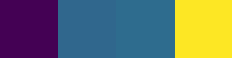

In [40]:
# cells_first_spike_times.all_cells_first_spike_time_df[cells_first_spike_times.all_cells_first_spike_time_df['lap_spike_lap'] > 3]

# cells_first_spike_times.all_cells_first_spike_time_df[cells_first_spike_times.all_cells_first_spike_time_df['lap_spike_lap'] > 3].aclu.unique()

# cells_first_spike_times.all_cells_first_spike_time_df[cells_first_spike_times.all_cells_first_spike_time_df['lap_spike_lap'] > 4].aclu.unique()
# cells_first_spike_times.all_cells_first_spike_time_df[cells_first_spike_times.all_cells_first_spike_time_df['lap_spike_lap'] > 2].aclu.unique()
cells_first_spike_times.all_cells_first_spike_time_df[cells_first_spike_times.all_cells_first_spike_time_df['lap_spike_lap'] > 4].aclu.unique()


# later_lap_appearing_aclus = [32, 33,34, 35, 62, 67]

Array 
 Chunk 
 
 
 
 
 
 Bytes 
 16 B 
 16 B 
 
 
 
 Shape 
 (4,) 
 (4,) 
 
 
 Dask graph 
 1 chunks in 1 graph layer 
 
 
 Data type 
 int32 numpy.ndarray 
 
 
 
 
 
 

 <!-- Horizontal lines -->
 
 

 <!-- Vertical lines -->
 
 

 <!-- Colored Rectangle -->
 

 <!-- Text -->
 4 
 1 
 
 
 
 
 
 
 
 
 [16 33 34 67]
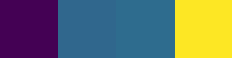

In [41]:
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import CellsFirstSpikeTimes
from pyphocorehelpers.DataStructure.RenderPlots.MatplotLibRenderPlots import MatplotlibRenderPlots
from pyphoplacecellanalysis.General.Batch.NonInteractiveProcessing import BatchPhoJonathanFiguresHelper

later_lap_appearing_aclus = cells_first_spike_times.all_cells_first_spike_time_df[cells_first_spike_times.all_cells_first_spike_time_df['lap_spike_lap'] > 4]['aclu'].unique()
# later_lap_appearing_aclus = [32, 33,34, 35, 62, 67]
# later_lap_appearing_aclus = [62]
filtered_cells_first_spike_times: CellsFirstSpikeTimes = cells_first_spike_times.sliced_by_neuron_id(later_lap_appearing_aclus)

later_lap_appearing_aclus_df = filtered_cells_first_spike_times.all_cells_first_spike_time_df ## find ones that appear only on later laps
# later_lap_appearing_aclus_df
later_lap_appearing_aclus = later_lap_appearing_aclus_df['aclu'].to_numpy() ## get the aclus that only appear on later laps
later_lap_appearing_aclus


Array 
 Chunk 
 
 
 
 
 
 Bytes 
 16 B 
 16 B 
 
 
 
 Shape 
 (4,) 
 (4,) 
 
 
 Dask graph 
 1 chunks in 1 graph layer 
 
 
 Data type 
 int32 numpy.ndarray 
 
 
 
 
 
 

 <!-- Horizontal lines -->
 
 

 <!-- Vertical lines -->
 
 

 <!-- Colored Rectangle -->
 

 <!-- Text -->
 4 
 1 
 
 
 
 
 
 
 
 
 [16 33 34 67]
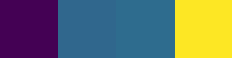

In [42]:
np.unique(later_lap_appearing_aclus)

In [43]:

later_lap_appearing_figures_dict = filtered_cells_first_spike_times.plot_PhoJonathan_plots_with_time_indicator_lines(curr_active_pipeline, included_neuron_ids=later_lap_appearing_aclus, write_vector_format=True, write_png=True)


include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

perfomring save...
	 saved C:\Users\pho\repos\Spike3DWorkEnv\Spike3D\EXTERNAL\Screenshots\ProgrammaticDisplayFunctionTesting\2024-11-12\kdiba\gor01\one\2006-6-09_1-22-43\BatchPhoJonathanReplayFRC_aclu_16_first_spike.pdf
	 saved C:\Users\pho\repos\Spike3DWorkEnv\Spike3D\EXTERNAL\Screenshots\ProgrammaticDisplayFunctionTesting\2024-11-12\kdiba\gor01\one\2006-6-09_1-22-43\BatchPhoJonathanReplayFRC_aclu_16_first_spike.png
	 saved C:\Users\pho\repos\Spike3DWorkEnv\Spike3D\EXTERNAL\Screenshots\ProgrammaticDisplayFunctionTesting\2024-11-12\kdiba\gor01\one\2006-6-09_1-22-43\BatchPhoJonathanReplayFRC_aclu_33_first_spike.pdf
	 saved C:\Users\pho\repos\Spike3DWorkEnv\Spike3D\EXTERNAL\Screenshots\ProgrammaticDisplayFunctionTesting\2024-11-12\kdiba\gor01\one\2006-6-09_1-22-43\BatchPhoJonathanReplayFRC_aclu_33_first_spike.png
	 saved C:\Users\pho\repos\Spike3DWorkEnv\Spike3D\EXTERNAL\Screenshots\ProgrammaticDisplayFunctionTesting\2024-11-12\kdiba\gor01\one\2006-6-09_1-22-43\BatchPhoJonathanReplayFRC_

In [44]:
from pyphoplacecellanalysis.General.Batch.BatchJobCompletion.UserCompletionHelpers.batch_user_completion_helpers import compute_and_export_cell_first_spikes_characteristics_completion_function
from pyphoplacecellanalysis.General.Batch.BatchJobCompletion.UserCompletionHelpers.batch_user_completion_helpers import SimpleBatchComputationDummy

a_dummy = SimpleBatchComputationDummy(BATCH_DATE_TO_USE, collected_outputs_path, True)

try:
    _across_session_results_extended_dict
except NameError as e:
    _across_session_results_extended_dict = {} # initialize

_across_session_results_extended_dict = _across_session_results_extended_dict | compute_and_export_cell_first_spikes_characteristics_completion_function(a_dummy, None,
                                                curr_session_context=curr_active_pipeline.get_session_context(), curr_session_basedir=curr_active_pipeline.sess.basepath.resolve(), curr_active_pipeline=curr_active_pipeline,
                                                across_session_results_extended_dict=_across_session_results_extended_dict,
                                                # # additional_session_context=additional_session_context,
                                                # additional_session_context=IdentifyingContext(custom_suffix=None)
                                                )

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
compute_and_export_cell_first_spikes_characteristics_completion_function(curr_session_context: kdiba_gor01_one_2006-6-09_1-22-43, curr_session_basedir: W:\Data\KDIBA\gor01\one\2006-6-09_1-22-43, ...)
collected_outputs: K:\scratch\collected_outputs
This used to be an assert but `_REQUIRE_NEURON_TYPE_COLUMN == False, so continuing at your own risk. Missing the 'neuron_type' column. obj.columns: ['t', 't_seconds', 't_rel_seconds', 'shank', 'cluster', 'aclu', 'qclu', 'x', 'y', 'speed', 'traj', 'lap', 'maze_relative_lap', 'maze_id', 'is_theta', 'is_ripple', 'theta_phase_radians', 'flat_spike_idx', 'x_loaded', 'y_loaded', 'lin_pos', 'fragile_linear_neuron_IDX', 'PBE_id', 'scISI', 'is_included_long_pf1D', 'is_included_short_pf1D', 'is_included_global_pf1D', 'is_included_PBE']
WARN: Used to require have unit id column 'aclu' and 'neuron_type' column. obj.columns: ['t', 't_seconds', 't_rel_seconds', 'shank', 'clust

In [45]:
from pyphoplacecellanalysis.General.Batch.BatchJobCompletion.UserCompletionHelpers.batch_user_completion_helpers import figures_plot_cell_first_spikes_characteristics_completion_function
from pyphoplacecellanalysis.General.Batch.BatchJobCompletion.UserCompletionHelpers.batch_user_completion_helpers import SimpleBatchComputationDummy

a_dummy = SimpleBatchComputationDummy(BATCH_DATE_TO_USE, collected_outputs_path, True)

try:
    _across_session_results_extended_dict
except NameError as e:
    _across_session_results_extended_dict = {} # initialize

_across_session_results_extended_dict = _across_session_results_extended_dict | figures_plot_cell_first_spikes_characteristics_completion_function(a_dummy, None,
                                                curr_session_context=curr_active_pipeline.get_session_context(), curr_session_basedir=curr_active_pipeline.sess.basepath.resolve(), curr_active_pipeline=curr_active_pipeline,
                                                across_session_results_extended_dict=_across_session_results_extended_dict,
                                                # # additional_session_context=additional_session_context,
                                                # additional_session_context=IdentifyingContext(custom_suffix=None),
                                                later_appearing_cell_lap_start_id=4,
                                                )

{'compute_and_export_cell_first_spikes_characteristics_completion_function': {'hdf5_out_path': WindowsPath('K:/scratch/collected_outputs/2024-11-12-kdiba-gor01-one-2006-6-09_1-22-43__withNormalComputedReplays-frateThresh_5.0-qclu_[1, 2, 4, 6, 7, 9]-(first_spike_activity_data).h5'),
  'was_write_good': True}}

CURR_BATCH_OUTPUT_PREFIX: 2024-11-12_Apogee-2006-6-09_1-22-43
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
figures_plot_cell_first_spikes_characteristics_completion_function(curr_session_context: kdiba_gor01_one_2006-6-09_1-22-43, curr_session_basedir: W:\Data\KDIBA\gor01\one\2006-6-09_1-22-43, ...)
This used to be an assert but `_REQUIRE_NEURON_TYPE_COLUMN == False, so continuing at your own risk. Missing the 'neuron_type' column. obj.columns: ['t', 't_seconds', 't_rel_seconds', 'shank', 'cluster', 'aclu', 'qclu', 'x', 'y', 'speed', 'traj', 'lap', 'maze_relative_lap', 'maze_id', 'is_theta', 'is_ripple', 'theta_phase_radians', 'flat_spike_idx', 'x_loaded', 'y_loaded', 'lin_pos', 'fragile_linear_neuron_IDX', 'PBE_id', 'scISI', 'is_included_long_pf1D', 'is_included_short_pf1D', 'is_included_global_pf1D', 'is_included_PBE']
WARN: Used to require have unit id column 'aclu' and 'neuron_type' column. obj.columns: ['t', 't_seconds', 't_rel_seconds', 'shank'

C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\SpecificResults\PendingNotebookCode.py:132: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()   # Redraw the current figure
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Batch\NonInteractiveProcessing.py:967: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  a_fig.savefig(fig_png_out_path, dpi=240)


perfomring save...
	 saved K:\scratch\collected_outputs\kdiba_gor01_one_2006-6-09_1-22-43_BatchPhoJonathanReplayFRC_shared_1of1_(16,33,34,67)_first_spike.png
	saved_file_paths: [WindowsPath('K:/scratch/collected_outputs/kdiba_gor01_one_2006-6-09_1-22-43_BatchPhoJonathanReplayFRC_shared_1of1_(16,33,34,67)_first_spike.png')]
>>	 done with kdiba_gor01_one_2006-6-09_1-22-43
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


In [ ]:
_across_session_results_extended_dict

In [ ]:
curr_active_pipeline.get_output_manager().figure_output_location

In [ ]:
curr_active_pipeline.get_complete_session_context()

In [ ]:
later_lap_appearing_aclus

In [46]:
## Plot the PhoJonathanPlots
separate_single_aclu_phojonathan_figures_dict: Dict[IdentifyingContext, MatplotlibRenderPlots] = BatchPhoJonathanFiguresHelper.perform_run(curr_active_pipeline, shared_aclus=track_templates.any_decoder_neuron_IDs, n_max_page_rows=1, disable_top_row=True,
                                                                                                                               write_png=True, write_vector_format=True, # progress_print=True, 
                                                                                                                               )


include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data


C:\Users\pho\repos\Spike3DWorkEnv\NeuroPy\neuropy\utils\matplotlib_helpers.py:737: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(active_fig_id, **({'dpi': None, 'clear': True} | kwargs)) # , 'tight_layout': False - had to remove 'tight_layout': False because it can't coexist with 'constrained_layout'
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.val

include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
include_includelist: ['maze1_odd', 'maze2_odd', 'maze_odd', 'maze1_even', 'maze2_even', 'maze_even', 'maze1_any', 'maze2_any', 'maze_any']
long_epoch_name: maze1_odd, short_epoch_name: maze2_odd, global_epoch_name: maze_any


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data
DEPRICATION WARNING: workaround to allow subscripting ComputationResult objects. Will be depricated. key: computed_data


C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:246: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all the way down to -1.0
C:\Users\pho\repos\Spike3DWorkEnv\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Mixins\CrossComputationComparisonHelpers.py:276: RuntimeWarning: invalid value encountered in divide
  _long_to_short_balances = (rdf.num_short_only_neuron_participating.values - rdf.num_long_only_neuron_participating.values) / (rdf.num_short_only_neuron_participating.values + rdf.num_long_only_neuron_participating.values) ## Working but (0, 1, 1) would clip to 0.5 despite (1, 13, 0) going all t

	 saved C:\Users\pho\repos\Spike3DWorkEnv\Spike3D\EXTERNAL\Screenshots\ProgrammaticDisplayFunctionTesting\2024-11-12\kdiba\gor01\one\2006-6-09_1-22-43\BatchPhoJonathanReplayFRC_aclu_2.pdf
	 saved C:\Users\pho\repos\Spike3DWorkEnv\Spike3D\EXTERNAL\Screenshots\ProgrammaticDisplayFunctionTesting\2024-11-12\kdiba\gor01\one\2006-6-09_1-22-43\BatchPhoJonathanReplayFRC_aclu_2.png
	 saved C:\Users\pho\repos\Spike3DWorkEnv\Spike3D\EXTERNAL\Screenshots\ProgrammaticDisplayFunctionTesting\2024-11-12\kdiba\gor01\one\2006-6-09_1-22-43\BatchPhoJonathanReplayFRC_aclu_4.pdf
	 saved C:\Users\pho\repos\Spike3DWorkEnv\Spike3D\EXTERNAL\Screenshots\ProgrammaticDisplayFunctionTesting\2024-11-12\kdiba\gor01\one\2006-6-09_1-22-43\BatchPhoJonathanReplayFRC_aclu_4.png
	 saved C:\Users\pho\repos\Spike3DWorkEnv\Spike3D\EXTERNAL\Screenshots\ProgrammaticDisplayFunctionTesting\2024-11-12\kdiba\gor01\one\2006-6-09_1-22-43\BatchPhoJonathanReplayFRC_aclu_5.pdf
	 saved C:\Users\pho\repos\Spike3DWorkEnv\Spike3D\EXTERNAL\S

In [ ]:
## plot each aclu in a separate figures
later_lap_appearing_figures_dict: Dict[IdentifyingContext, MatplotlibRenderPlots] = BatchPhoJonathanFiguresHelper.perform_run(curr_active_pipeline, shared_aclus=later_lap_appearing_aclus, n_max_page_rows=1, disable_top_row=True,
                                                                                                                            #    progress_print=True, write_png=True, write_vector_format=True,
                                                                                                                               )


In [ ]:
## Plot the PhoJonathanPlots
later_lap_appearing_figures_dict_single_fig: Dict[IdentifyingContext, MatplotlibRenderPlots] = BatchPhoJonathanFiguresHelper.perform_run(curr_active_pipeline, shared_aclus=later_lap_appearing_aclus, n_max_page_rows=10, disable_top_row=True)

# later_lap_appearing_figures_dict: Dict[IdentifyingContext, MatplotlibRenderPlots] = BatchPhoJonathanFiguresHelper.run(curr_active_pipeline, neuron_replay_stats_df, n_max_page_rows=10, included_unit_neuron_IDs=later_lap_appearing_aclus, disable_top_row=True, split_by_short_long_shared=False)


In [ ]:
cells_first_spike_times.global_spikes_dict

In [ ]:
plt.close('all')

In [ ]:
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import add_time_indicator_lines

## Inputs: later_lap_appearing_aclus_df
time_point_formatting_kwargs_dict = {'lap': dict(color='orange', alpha=0.8), 'PBE': dict(color='purple', alpha=0.8)}
later_lap_appearing_aclus_times_dict: Dict[types.aclu_index, Dict[str, float]] = {aclu_tuple.aclu:{'lap': aclu_tuple.first_spike_lap, 'PBE': aclu_tuple.first_spike_PBE} for aclu_tuple in later_lap_appearing_aclus_df.itertuples(index=False)}

# ## add the lines:
add_time_indicator_lines(later_lap_appearing_figures_dict, later_lap_appearing_aclus_times_dict=later_lap_appearing_aclus_times_dict, time_point_formatting_kwargs_dict=time_point_formatting_kwargs_dict, defer_draw=False)
# add_time_indicator_lines(later_lap_appearing_figures_dict_single_fig, later_lap_appearing_aclus_times_dict=later_lap_appearing_aclus_times_dict, time_point_formatting_kwargs_dict=time_point_formatting_kwargs_dict, defer_draw=False)



In [ ]:


_temp_df = later_lap_appearing_aclus_df[later_lap_appearing_aclus_df['aclu'] == aclu][['first_spike_lap', 'first_spike_PBE']]
lap_time_point = _temp_df['first_spike_lap'].to_numpy()[0]
pbe_time_point = _temp_df['first_spike_PBE'].to_numpy()[0]
time_point_dict = {'lap': lap_time_point, 'pbe': pbe_time_point}


In [ ]:
filtered_cells_first_spike_times.plot_first_lap_spike_relative_first_PBE_spike_scatter_figure()


In [ ]:
laps_spikes_aclu_ax_dict[aclu].remove(lap_first_spike_lines)


In [ ]:

lap_spikes_axs = 

# lap_spikes_axs[0].__dict__


In [ ]:

ax_aclu = 

# [{'firing_rate': None, 'lap_spikes': <Axes: label='ax_lap_spikes[16]'>, 'placefield': <Axes: label='ax_pf1D[16]'>, 'left_placefield': <Axes: >, 'labels': <Axes: label='ax_cell_label[16]'>},
#  {'firing_rate': None, 'lap_spikes': <Axes: label='ax_lap_spikes[28]'>, 'placefield': <Axes: label='ax_pf1D[28]'>, 'left_placefield': <Axes: >, 'labels': <Axes: label='ax_cell_label[28]'>},
#  {'firing_rate': None, 'lap_spikes': <Axes: label='ax_lap_spikes[32]'>, 'placefield': <Axes: label='ax_pf1D[32]'>, 'left_placefield': <Axes: >, 'labels': <Axes: label='ax_cell_label[32]'>},

# 'lap_spikes'

In [ ]:
filtered_cells_first_spike_times: CellsFirstSpikeTimes = CellsFirstSpikeTimes.init_from_pipeline(curr_active_pipeline, hdf_save_parent_path=collected_outputs_path, should_include_only_spikes_after_initial_laps=True)
filtered_cells_first_spike_times.all_cells_first_spike_time_df

In [ ]:
# cells_first_spike_times.global_spikes_df
print(list(cells_first_spike_times.global_spikes_df.columns))

['aclu', 'shank', 'cluster', 'qclu']
['x', 'y', 'lin_pos', 'speed', 'traj', 'lap', 'theta_phase_radians', 'maze_relative_lap', 'maze_id'] ## lap properties


In [ ]:
laps_spikes_df = deepcopy(cells_first_spike_times.global_spikes_dict['lap'])


laps_first_spikes_df = cells_first_spike_times._subfn_get_first_spikes(laps_spikes_df)
laps_first_spikes_df
later_lap_appearing_aclus_df = laps_first_spikes_df[laps_first_spikes_df['lap'] > 2] ## find ones that appear only on later laps
later_lap_appearing_aclus = later_lap_appearing_aclus_df['aclu'].to_numpy() ## get the aclus that only appear on later laps
later_lap_appearing_aclus # add this info to the first_spikes_df

cells_first_spike_times


## Find first lap spike time for each cell

## See which lap that time occured on
laps_spikes_df.all_cells_first_spike_time_df['first_appearing_lap']

In [ ]:
cells_first_spike_times.all_cells_first_spike_time_df[''

In [ ]:
## get cell colors
# active_config = deepcopy(curr_active_pipeline.config
active_config.plotting_config.pf_neuron_identities, active_config.plotting_config.pf_sort_ind, active_config.plotting_config.pf_colors, active_config.plotting_config.pf_colormap, active_config.plotting_config.pf_listed_colormap


In [ ]:
active_config.plotting_config.pf_neuron_identities

In [ ]:
active_config = deepcopy(curr_active_pipeline.active_configs[global_epoch_name])
# active_pf1D = deepcopy(global_pf1D)

## INPUTS: active_config
# type(active_config.plotting_config.pf_colormap)
aclu_to_color_map = {v.cell_uid:v.color.tolist() for v in active_config.plotting_config.pf_neuron_identities}
cells_first_spike_times.all_cells_first_spike_time_df['color'] = cells_first_spike_times.all_cells_first_spike_time_df['aclu'].map(lambda x: aclu_to_color_map.get(x, [1.0, 1.0, 0.0, 1.0]))
column_names = ['first_spike_any', 'first_spike_theta', 'first_spike_lap', 'first_spike_PBE']
interpolated_position_column_names = []
for a_col in column_names:	
    ## interpolate positions for each of these spike times
    cells_first_spike_times.all_cells_first_spike_time_df[f'interp_pos_{a_col}'] = np.interp(cells_first_spike_times.all_cells_first_spike_time_df[a_col], cells_first_spike_times.global_position_df.t, cells_first_spike_times.global_position_df.x)
    interpolated_position_column_names.append(f'interp_pos_{a_col}')

column_to_interpolated_position_column_name_dict = dict(zip(column_names, interpolated_position_column_names))
cells_first_spike_times.all_cells_first_spike_time_df
# global_session.config.plotting_config
active_config = deepcopy(curr_active_pipeline.active_configs[global_epoch_name])
active_pf1D = deepcopy(global_pf1D)
aclu_to_color_map = {v.cell_uid:v.color.tolist() for v in active_config.plotting_config.pf_neuron_identities}
fig, ax = cells_first_spike_times.plot_first_spike_scatter_figure(aclu_to_color_map=aclu_to_color_map)



In [ ]:
app, win, plots, plots_data = filtered_cells_first_spike_times.plot_first_lap_spike_relative_first_PBE_spike_scatter_figure()

In [ ]:
# partition_df(global_spikes_df, 'is_theta')
first_spikes_dict


neuron_ids = {k:v.aclu.unique() for k, v in global_spikes_dict.items()}
at_least_one_decoder_neuron_ids = union_of_arrays(*list(neuron_ids.values()))
at_least_one_decoder_neuron_ids

In [ ]:
from functools import reduce

# Assuming first_spikes_dict is already defined as per your data

# List to hold the dataframes for each category
dfs = []

# Iterate over each category and its dataframe
for category, df in first_spikes_dict.items():
    # Group by 'aclu' and get the minimum 't' (first spike time)
    df_grouped = df.groupby('aclu')['t_rel_seconds'].min().reset_index()
    # Rename the 't' column to include the category
    df_grouped.rename(columns={'t_rel_seconds': f'first_spike_{category}'}, inplace=True)
    # Append the grouped dataframe to the list
    dfs.append(df_grouped)

# Merge all dataframes on 'aclu'
df_final = reduce(lambda left, right: pd.merge(left, right, on='aclu', how='outer'), dfs)

# Display the final dataframe
print(df_final)

In [ ]:
from functools import reduce

# Assuming first_spikes_dict is already defined as per your data

# List to hold the dataframes for each category
dfs = []

# Iterate over each category and its dataframe
for category, df in first_spikes_dict.items():
    # Group by 'aclu' and get the minimum 't' (first spike time)
    df_grouped = df.groupby('aclu')['t_rel_seconds'].min().reset_index()
    # Rename the 't' column to include the category
    df_grouped.rename(columns={'t_rel_seconds': f'first_spike_{category}'}, inplace=True)
    # Append the grouped dataframe to the list
    dfs.append(df_grouped)

# Merge all dataframes on 'aclu'
df_final = reduce(lambda left, right: pd.merge(left, right, on='aclu', how='outer'), dfs)

# Display the final dataframe
print(df_final)

# Assuming df_final is your dataframe with 'aclu' and 'first_spike_*' columns

# Step 1: Get the list of columns that contain the first spike times, excluding 'any'
spike_time_columns = [col for col in df_final.columns if col.startswith('first_spike_') and col != 'first_spike_any']

# Step 2: For each row, find the category with the earliest spike time
def get_earliest_category(row):
    # Extract the spike times for this row, excluding 'any'
    spike_times = row[spike_time_columns]
    # Drop NaN values to avoid errors
    spike_times = spike_times.dropna()
    if spike_times.empty:
        return None  # No spike times available in categories excluding 'any'
    # Find the minimum spike time
    min_spike_time = spike_times.min()
    # Get all categories with the minimum spike time (in case of ties)
    min_spike_columns = spike_times[spike_times == min_spike_time].index.tolist()
    # Extract the category name(s) from the column names
    earliest_categories = [col.replace('first_spike_', '') for col in min_spike_columns]
    # Join multiple categories if there's a tie
    earliest_category = ', '.join(earliest_categories)
    return earliest_category

# Apply the function to each row to get the earliest spike category
df_final['earliest_spike_category'] = df_final.apply(get_earliest_category, axis=1)

# Display the final dataframe
print(df_final)


In [ ]:

laps = ensure_dataframe(deepcopy(curr_active_pipeline.sess.laps))

running_epochs = ensure_dataframe(deepcopy(global_laps))
pbe_epochs = ensure_dataframe(deepcopy(global_session.pbe)) ## less selective than replay, which has cell participation and other requirements
all_epoch = ensure_dataframe(deepcopy(global_session.epochs))


global_spikes_df: pd.DataFrame = deepcopy(get_proper_global_spikes_df(curr_active_pipeline)).drop(columns=['neuron_type'], inplace=False) ## already has columns ['lap', 'maze_id', 'PBE_id'
# global_spikes_df: pd.DataFrame = deepcopy(curr_active_pipeline.filtered_sessions[global_epoch_name].spikes_df).drop(columns=['neuron_type'], inplace=False) ## already has columns ['lap', 'maze_id', 'PBE_id'
# global_spikes_df


## find earliest spike for each cell
# Performed 1 aggregation grouped on column: 'aclu'
earliest_spike_df = global_spikes_df.groupby(['aclu']).agg(t_rel_seconds_idxmin=('t_rel_seconds', 'idxmin'), t_rel_seconds_min=('t_rel_seconds', 'min')).reset_index() # 't_rel_seconds_idxmin', 't_rel_seconds_min'

# earliest_spike_df['t_rel_seconds_idxmin']

# earliest_spike_df['t_rel_seconds_min']
# global_spikes_df.iloc[earliest_spike_df['t_rel_seconds_idxmin']]


first_aclu_spike_records_df: pd.DataFrame = global_spikes_df[np.isin(global_spikes_df['t_rel_seconds'], earliest_spike_df['t_rel_seconds_min'].values)]
# first_aclu_spike_records_df.aclu.unique()

first_aclu_spike_records_df

# running_epochs
# pbe_epochs
# all_epoch

In [ ]:
## Check whether the first
first_aclu_spike_records_df['is_theta']

first_aclu_spike_records_df['is_ripple']

In [ ]:
global_session.pbe

In [ ]:
global_session.replay

In [ ]:
global_replays

In [ ]:
global_epoch_context

# Old File Cleanup

In [ ]:
import sys
from copy import deepcopy
from typing import Dict, List, Tuple, Optional, Callable, Union, Any
from typing_extensions import TypeAlias
from neuropy.utils.result_context import IdentifyingContext
from nptyping import NDArray
import neuropy.utils.type_aliases as types
from collections import defaultdict

import numpy as np
import pandas as pd
import re
from pathlib import Path
from datetime import datetime
from pyphocorehelpers.Filesystem.path_helpers import find_first_extant_path
from pyphoplacecellanalysis.SpecificResults.AcrossSessionResults import find_csv_files, find_HDF5_files, find_most_recent_files, OldFileArchiver
from pyphoplacecellanalysis.General.Batch.runBatch import ConcreteSessionFolder, BackupMethods
from neuropy.core.user_annotations import UserAnnotationsManager

all_known_session_contexts: List[IdentifyingContext] = UserAnnotationsManager.get_all_known_sessions()
known_global_data_root_parent_paths = [Path('/Users/pho/data'), Path(r'/nfs/turbo/umms-kdiba/Data'), Path(r'/media/halechr/MAX/Data'), Path(r'W:/Data'), Path(r'/home/halechr/FastData'), Path(r'/Volumes/MoverNew/data')] # Path(r'/home/halechr/cloud/turbo/Data'), , Path(r'/nfs/turbo/umms-kdiba/Data'), Path(r'/home/halechr/turbo/Data'), 
global_data_root_parent_path = find_first_extant_path(known_global_data_root_parent_paths)
assert global_data_root_parent_path.exists(), f"global_data_root_parent_path: {global_data_root_parent_path} does not exist! Is the right computer's config commented out above?"
print(f'global_data_root_parent_path: {global_data_root_parent_path}')
all_known_session_concrete_folders = ConcreteSessionFolder.build_concrete_session_folders(global_data_root_parent_path, all_known_session_contexts)
known_collected_outputs_paths = [Path(v).resolve() for v in ['/Users/pho/data/collected_outputs',
                                                            '/Volumes/SwapSSD/Data/collected_outputs', r"K:/scratch/collected_outputs", '/Users/pho/Dropbox (University of Michigan)/MED-DibaLabDropbox/Data/Pho/Outputs/output/collected_outputs', r'C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output/collected_outputs',
                                                            '/home/halechr/FastData/collected_outputs/', '/home/halechr/cloud/turbo/Data/Output/collected_outputs']]
collected_outputs_directory = find_first_extant_path(known_collected_outputs_paths)
assert collected_outputs_directory.exists(), f"collected_outputs_directory: {collected_outputs_directory} does not exist! Is the right computer's config commented out above?"
# fullwidth_path_widget(scripts_output_path, file_name_label='Scripts Output Path:')
print(f'collected_outputs_directory: {collected_outputs_directory}')


known_scripts_output_paths = [Path(v).resolve() for v in ['/Users/pho/repo/Pho Secondary Workspace/Spike3DEnv/cloud/turbo/Data/Output/gen_scripts', '/home/halechr/cloud/turbo/Data/Output/gen_scripts/', '/Users/pho/University of Michigan Dropbox/MED-DibaLabDropbox/Data/Pho/Outputs/output/collected_outputs', '/home/halechr/FastData/gen_scripts/', 'output/gen_scripts/', "K:/scratch/gen_scripts"]]
scripts_output_path = find_first_extant_path(known_scripts_output_paths)
assert scripts_output_path.exists(), f"scripts_output_path: {scripts_output_path} does not exist! Is the right computer's config commented out above?"
# fullwidth_path_widget(scripts_output_path, file_name_label='Scripts Output Path:')
print(f'scripts_output_path: {scripts_output_path}')

# deleted_file_list = OldFileArchiver.remove_backup_files_from_session_data_folders(good_session_concrete_folders=all_known_session_concrete_folders, is_dryrun=True)
# always_delete_patterns = {
# 	'.pkltmp': '*.pkltmp',
# 	'.pkl.bak': '*.pkl.bak',
# }
always_delete_patterns = {} # disable non-conditional deletes while the pipeline is running in batch

# Define patterns to conditionally delete
conditional_delete_patterns = {
    # '.pkl': '*.pkl',
    'pipeline.pkl': '*loadedSessPickle*.pkl',
    'global.pkl': '*global_computation_results*.pkl',
}

# Define the cutoff date
# cutoff = datetime(2023, 9, 1)  # Example cutoff date
# cutoff = datetime(2024, 9, 1)
cutoff = datetime(2024, 7, 1)
# deleted_file_list = OldFileArchiver.remove_backup_files_from_session_data_folders(good_session_concrete_folders=all_known_session_concrete_folders, cutoff_date=cutoff, is_dryrun=True)
deleted_file_list = OldFileArchiver.remove_backup_files_from_session_data_folders(good_session_concrete_folders=all_known_session_concrete_folders,
                                                                                  always_delete_patterns=always_delete_patterns,
                                                                                  conditional_delete_patterns=conditional_delete_patterns,
                                                                                   cutoff_date=cutoff, is_dryrun=True)
deleted_file_list

In [ ]:


## INPUTS: collected_outputs_directory, excluded_or_outdated_files_list
archive_folder = OldFileArchiverarchive_old_files(collected_outputs_directory=collected_outputs_directory, excluded_or_outdated_files_list=excluded_or_outdated_files_list, is_dry_run=False)
archive_folder

# Stitch Pictures

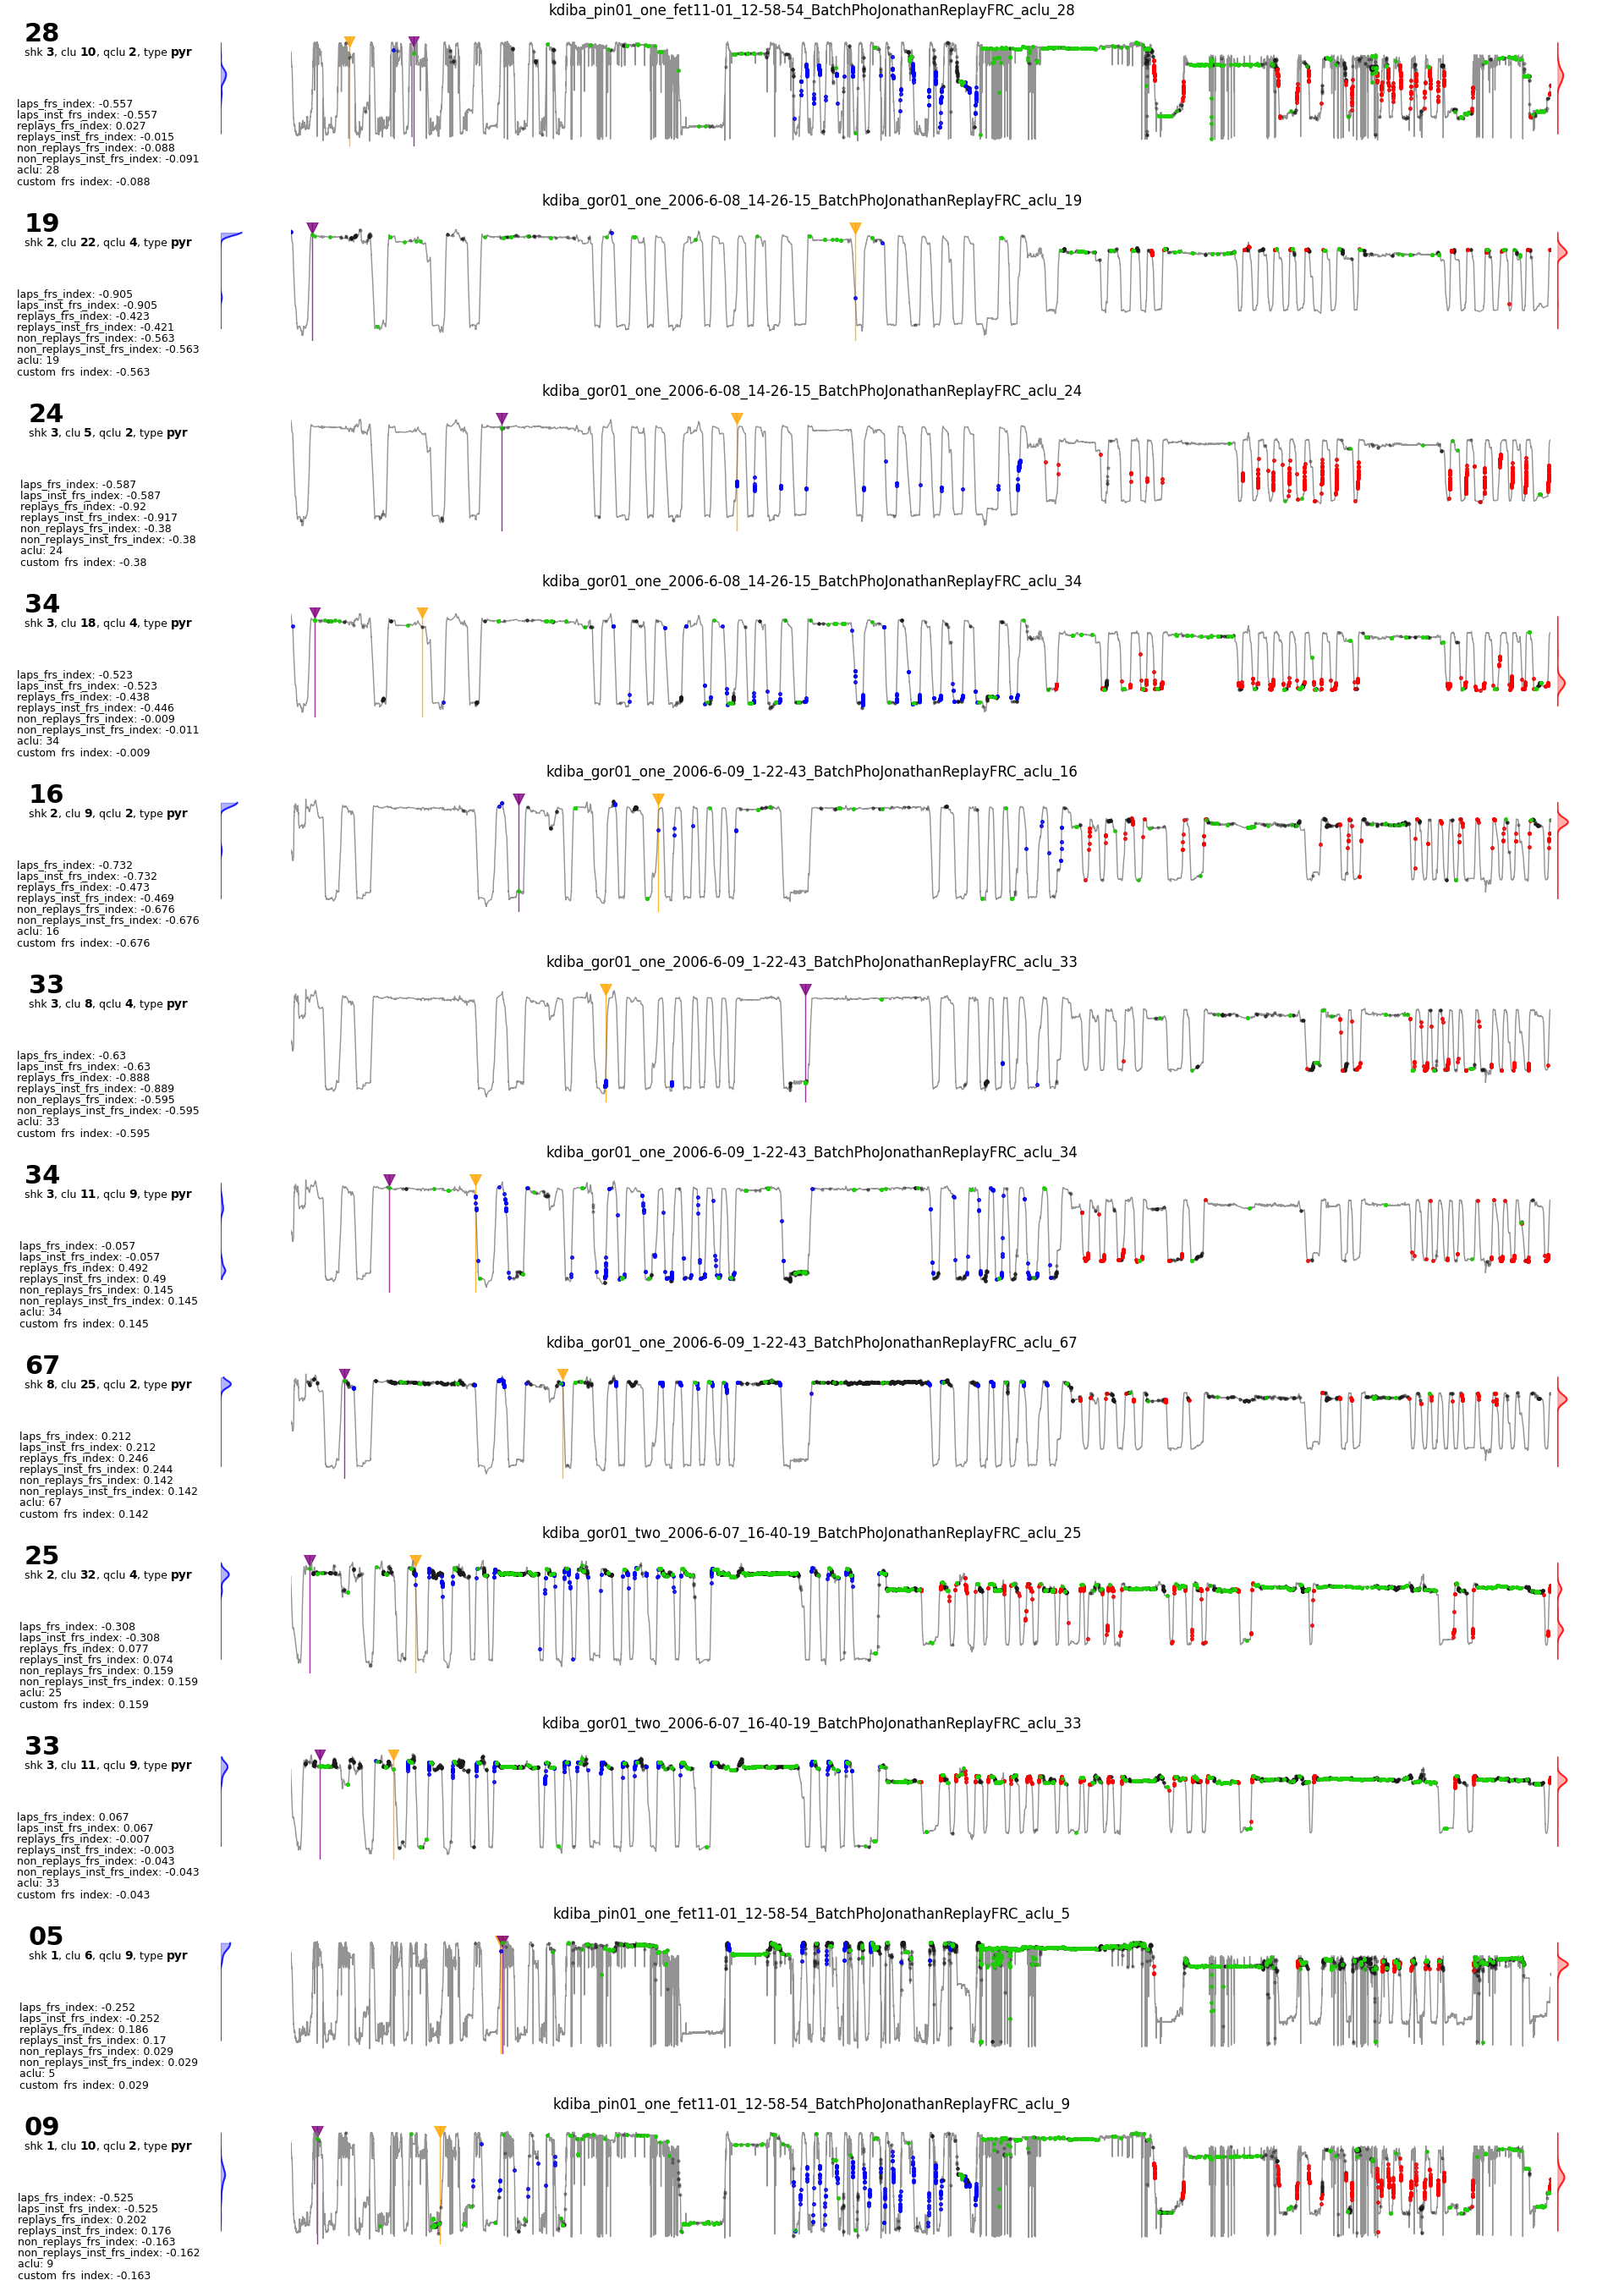

In [47]:
from PIL import Image
from pyphocorehelpers.plotting.media_output_helpers import vertical_image_stack, horizontal_image_stack, image_grid


figure_paths = ["K:/scratch/2024-11-08 - First-spikes/individual/kdiba_pin01_one_fet11-01_12-58-54_BatchPhoJonathanReplayFRC_aclu_28_first_spike.png",
"K:/scratch/2024-11-08 - First-spikes/individual/kdiba_gor01_one_2006-6-08_14-26-15_BatchPhoJonathanReplayFRC_aclu_19_first_spike.png",
"K:/scratch/2024-11-08 - First-spikes/individual/kdiba_gor01_one_2006-6-08_14-26-15_BatchPhoJonathanReplayFRC_aclu_24_first_spike.png",
"K:/scratch/2024-11-08 - First-spikes/individual/kdiba_gor01_one_2006-6-08_14-26-15_BatchPhoJonathanReplayFRC_aclu_34_first_spike.png",
"K:/scratch/2024-11-08 - First-spikes/individual/kdiba_gor01_one_2006-6-09_1-22-43_BatchPhoJonathanReplayFRC_aclu_16_first_spike.png",
"K:/scratch/2024-11-08 - First-spikes/individual/kdiba_gor01_one_2006-6-09_1-22-43_BatchPhoJonathanReplayFRC_aclu_33_first_spike.png",
"K:/scratch/2024-11-08 - First-spikes/individual/kdiba_gor01_one_2006-6-09_1-22-43_BatchPhoJonathanReplayFRC_aclu_34_first_spike.png",
"K:/scratch/2024-11-08 - First-spikes/individual/kdiba_gor01_one_2006-6-09_1-22-43_BatchPhoJonathanReplayFRC_aclu_67_first_spike.png",
"K:/scratch/2024-11-08 - First-spikes/individual/kdiba_gor01_two_2006-6-07_16-40-19_BatchPhoJonathanReplayFRC_aclu_25_first_spike.png",
"K:/scratch/2024-11-08 - First-spikes/individual/kdiba_gor01_two_2006-6-07_16-40-19_BatchPhoJonathanReplayFRC_aclu_33_first_spike.png",
"K:/scratch/2024-11-08 - First-spikes/individual/kdiba_pin01_one_fet11-01_12-58-54_BatchPhoJonathanReplayFRC_aclu_5_first_spike.png",
"K:/scratch/2024-11-08 - First-spikes/individual/kdiba_pin01_one_fet11-01_12-58-54_BatchPhoJonathanReplayFRC_aclu_9_first_spike.png",
]

figure_paths = [Path(v) for v in figure_paths]


# Open the images
_raster_imgs = [Image.open(i) for i in figure_paths]
_out_vstack = vertical_image_stack(_raster_imgs, padding=5)
_out_vstack


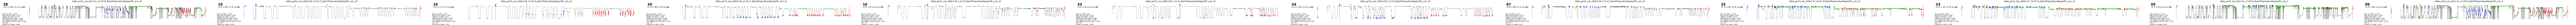

,P_LR,P_RL,P_Long,P_Short,ripple_idx,ripple_start_t
0,3.377521e-03,0.996622,0.968932,0.031068,0,42.658077
1,7.449444e-01,0.255056,0.437165,0.562835,1,55.723809
2,5.354488e-01,0.464551,0.609787,0.390213,2,73.681176
3,3.904791e-01,0.609521,0.560678,0.439322,3,92.642502
4,5.487383e-01,0.451262,0.439710,0.560290,4,93.027055
5,4.734573e-01,0.526543,0.259012,0.740988,5,93.925000
...,...,...,...,...,...,...
406,6.223742e-01,0.377626,0.372064,0.627936,406,1729.689083
407,2.506518e-01,0.749348,0.275994,0.724006,407,1731.111480
408,7.050154e-07,0.999999,0.580727,0.419273,408,1731.789992


In [48]:
_out_hstack = horizontal_image_stack(_raster_imgs, padding=5)
_out_hstack

directional_merged_decoders_result.perform_compute_marginals()
directional_merged_decoders_result.ripple_all_epoch_bins_marginals_df

# parent_array_as_image_output_folder = Path(r'E:\Dropbox (Personal)\Active\Kamran Diba Lab\Presentations\2024-05-30 - Pho iNAV Poster\Exports\array_as_image').resolve()
parent_array_as_image_output_folder = Path('output/Exports/array_as_image').resolve()
parent_array_as_image_output_folder.mkdir(parents=True, exist_ok=True)
assert parent_array_as_image_output_folder.exists()